# 커피지수 1안 데이터 분석 및 시각화

In [ ]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
import requests
import json
import folium

%matplotlib inline

## 커피매장 데이터 분석 및 시각화

In [ ]:
coffee = pd.read_csv("./MID/coffee/all_cafes.csv")

In [ ]:
coffee

브랜드명       지점명    시도명  시군구명  \
0      투썸플레이스     철원동송점    강원도   철원군   
1      투썸플레이스    수지동천역점    경기도   용인시   
2      투썸플레이스     광주오치점  광주광역시    북구   
3      투썸플레이스   철원주상절리점    강원도   철원군   
4      투썸플레이스   별내별가람역점    경기도  남양주시   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                                      주소  
0                    강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242  
1      경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에...  
2                                광주광역시 북구 설죽로  328 (오치동)  
3                                  강원 철원군 갈말읍 군탄리 1226-1  
4                       경기도 남양주시 덕송1로55번길 22 (별내동) 1층,2층  
...                                                  ...  
12911                           서울 동대문구 사가정로25길 42 (장안동)  
12912                             서울 동대문구 한천로2길 53 (장안동)  
12913                              서울 동대문구 답십리로 77 (전농동)  
12914                             서울 동대문구 사가정로 132 (전농동)  
12915                             서울 동대문구 왕산로 225 (청량리동)  

[12916 rows x 5 columns]

In [ ]:
df_sido = pd.crosstab(coffee['시도명'],coffee['브랜드명'],margins = True , margins_name = '합계')

In [ ]:
df_sido

브랜드명     메가커피   빽다방  스타벅스  엔제리너스   이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                          
강원도        72    33    31      4   128    1     51      60    14    0   15   
경기도       725   335   422     42   636   44    465     367    84   33  121   
경상남도       63    36    70     21   141    3    205      66    25    3   25   
경상북도       39    37    54     19    70    0     50      62    38    1   16   
광주광역시      99    22    62     25    77    3    111      46    27    3   15   
대구광역시      30    57    79     21    71    1     34      92    42    5   25   
대전광역시      45    77    61     12    45    1     17      66    26    4   20   
부산광역시      95    24   134     33   130    8    253      81    28    6   34   
서울특별시     512   260   601     60   708  167    308     366    58   62  128   
세종특별자치시    13    17    12      2    21    0      3      14     7    0    4   
울산광역시       8    11    34     11    81    0     39      31    30    1   15   
인천광역시     215   109    70      7    90    8    189      91    24    4   19   
전라남도       81    48    29     11    85    0     46      45    28    0   11   
전라북도       44    56    32      9    70    0     20      42    19    3   29   
제주특별자치도    33    32    26      8    20    2     25      22    20    2    3   
충청남도       64    73    43     11    83    1     34      58    22    0   22   
충청북도       68    36    27      9    63    1     16      51    29    2   18   
합계       2206  1263  1787    305  2519  240   1866    1560   521  129  520   

브랜드명        합계  
시도명             
강원도        409  
경기도       3274  
경상남도       658  
경상북도       386  
광주광역시      490  
대구광역시      457  
대전광역시      374  
부산광역시      826  
서울특별시     3230  
세종특별자치시     93  
울산광역시      261  
인천광역시      826  
전라남도       384  
전라북도       324  
제주특별자치도    193  
충청남도       411  
충청북도       320  
합계       12916

In [ ]:
df_sido.to_excel("시도별 카페.xlsx")

In [ ]:
df_seoul = coffee[coffee['시도명']=='서울특별시']

In [ ]:
df_seoul

브랜드명       지점명    시도명  시군구명  \
5      투썸플레이스   용산트윈시티점  서울특별시   용산구   
22     투썸플레이스    종로3가역점  서울특별시   종로구   
24     투썸플레이스     순화타워점  서울특별시    중구   
30     투썸플레이스  여의도광복회관점  서울특별시  영등포구   
38     투썸플레이스    송파장지역점  서울특별시   송파구   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                              주소  
5             서울특별시 용산구 한강대로 366 (동자동,트윈시티남산) 1층  
22                                서울 종로구 수표로 106  
24     서울특별시 중구 세종대로7길 43 (순화동, 순화타워) 43 순화타워 1층  
30          서울특별시 영등포구 국회대로62길 15 (여의도동) 광복회관 1층  
38                             서울 송파구 충민로 66, B1  
...                                          ...  
12911                   서울 동대문구 사가정로25길 42 (장안동)  
12912                     서울 동대문구 한천로2길 53 (장안동)  
12913                      서울 동대문구 답십리로 77 (전농동)  
12914                     서울 동대문구 사가정로 132 (전농동)  
12915                     서울 동대문구 왕산로 225 (청량리동)  

[3230 rows x 5 columns]

In [ ]:
df_seoul_gu  = pd.crosstab(df_seoul['시군구명'],df_seoul['브랜드명'])

In [ ]:
df_seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스
시군구명                                                                 
강남구     21   17    88      1   44   50     19      42    12   12   16
강동구     22   10    17      1   26    4     12      12     1    2    3
강북구     20    9     6      2   20    1      2       7     0    0    2
강서구     35   17    25      3   42    4     27      19     5    4    2
관악구     18   11    12      4   28    2     13       8     3    1    6
광진구     14   10    19      2   24    4     16      12     1    0    5
구로구     28   13    14      1   29    2     19      11     1    4    5
금천구     13    8    13      2   23    2     16      11     0    0    2
노원구     28   14    14      2   29    3      8      11     2    1    3
도봉구     16    6     4      0   24    0      9       7     1    0    0
동대문구    18    7    10      1   25    3     10       9     0    1    0
동작구     14    6    11      3   22    0      9       5     0    0    6
마포구     27   11    35      3   34    7     15      25     1    3   10
서대문구    17    6    22      2   20    2     12       9     5    0    8
서초구     12   12    48      1   29   20      8      28     7   10    9
성동구     16   12    15      0   22    0      9      11     2    0    3
성북구     27   16    15      0   31    2      8      10     0    0    1
송파구     32   17    34     10   39   14     19      30     1    4    6
양천구     26    6    17      0   26    2     18       9     3    0    5
영등포구    26   10    41      4   41   11     14      21     3    6    8
용산구      6    8    25      1   14    4      1       9     4    2    4
은평구     24   10    13      5   26    1     15       6     0    1    3
종로구     16    8    40      5   31   15      8      12     3    3   11
중구      17    6    55      6   30   13     11      32     3    8    9
중랑구     19   10     8      1   29    1     10      10     0    0    1

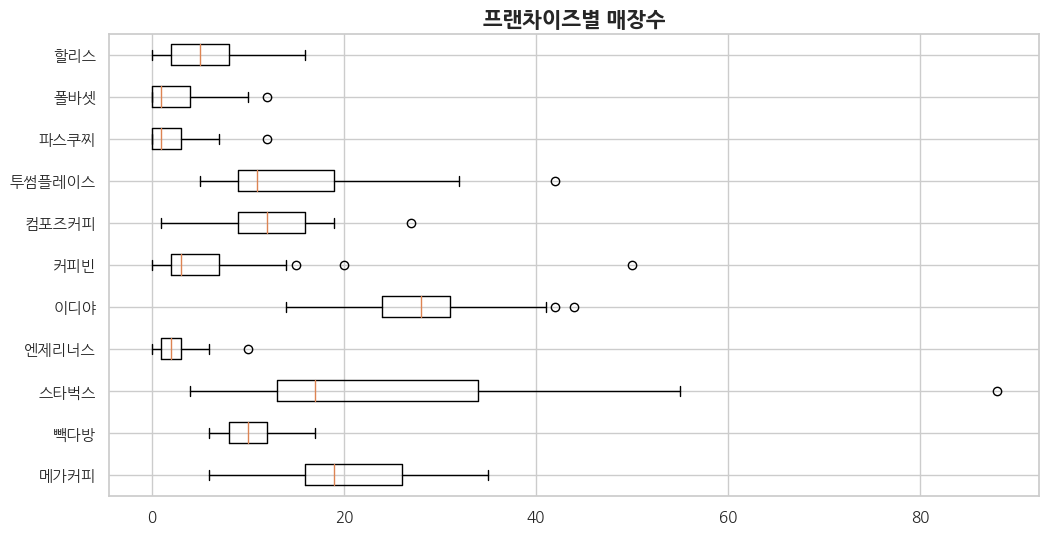

In [ ]:
# 이상치 boxplot으로 시각화 -> 강남구: 이상치
fig = plt.figure(figsize=(12,6))

plt.boxplot(x = [df_seoul_gu["메가커피"], 
               df_seoul_gu["빽다방"],df_seoul_gu["스타벅스"],df_seoul_gu["엔제리너스"],df_seoul_gu["이디야"],df_seoul_gu["커피빈"]
                ,df_seoul_gu["컴포즈커피"],df_seoul_gu["투썸플레이스"],df_seoul_gu["파스쿠찌"],df_seoul_gu["폴바셋"],df_seoul_gu["할리스"]],
           labels = ['메가커피','빽다방','스타벅스','엔제리너스','이디야','커피빈','컴포즈커피'
                    ,'투썸플레이스','파스쿠찌','폴바셋','할리스'],vert = False)
plt.title('프랜차이즈별 매장수', size = 15 , fontweight = 'bold')
plt.show()

 - 스타벅스는 강남구에 압도적으로 많이 입점해있다. 
 - 왜그럴까?

<AxesSubplot:xlabel='브랜드명', ylabel='시군구명'>

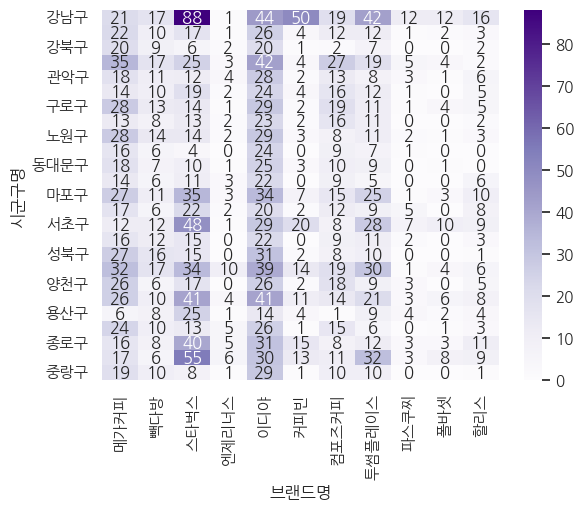

In [ ]:
sns.heatmap(df_seoul_gu, annot = True, cmap = 'Purples', fmt='.0f')

In [ ]:
seoul_coffee  = pd.crosstab(df_seoul['시군구명'],df_seoul['브랜드명'],margins = True , margins_name = '합계')
seoul_coffee

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계
시군구명                                                                       
강남구     21   17    88      1   44   50     19      42    12   12   16   322
강동구     22   10    17      1   26    4     12      12     1    2    3   110
강북구     20    9     6      2   20    1      2       7     0    0    2    69
강서구     35   17    25      3   42    4     27      19     5    4    2   183
관악구     18   11    12      4   28    2     13       8     3    1    6   106
광진구     14   10    19      2   24    4     16      12     1    0    5   107
구로구     28   13    14      1   29    2     19      11     1    4    5   127
금천구     13    8    13      2   23    2     16      11     0    0    2    90
노원구     28   14    14      2   29    3      8      11     2    1    3   115
도봉구     16    6     4      0   24    0      9       7     1    0    0    67
동대문구    18    7    10      1   25    3     10       9     0    1    0    84
동작구     14    6    11      3   22    0      9       5     0    0    6    76
마포구     27   11    35      3   34    7     15      25     1    3   10   171
서대문구    17    6    22      2   20    2     12       9     5    0    8   103
서초구     12   12    48      1   29   20      8      28     7   10    9   184
성동구     16   12    15      0   22    0      9      11     2    0    3    90
성북구     27   16    15      0   31    2      8      10     0    0    1   110
송파구     32   17    34     10   39   14     19      30     1    4    6   206
양천구     26    6    17      0   26    2     18       9     3    0    5   112
영등포구    26   10    41      4   41   11     14      21     3    6    8   185
용산구      6    8    25      1   14    4      1       9     4    2    4    78
은평구     24   10    13      5   26    1     15       6     0    1    3   104
종로구     16    8    40      5   31   15      8      12     3    3   11   152
중구      17    6    55      6   30   13     11      32     3    8    9   190
중랑구     19   10     8      1   29    1     10      10     0    0    1    89
합계     512  260   601     60  708  167    308     366    58   62  128  3230

In [ ]:
pd.crosstab(df_seoul['시군구명'],df_seoul['브랜드명'],normalize='columns').style.background_gradient(cmap='YlOrRd')

In [ ]:
df_seoul

브랜드명       지점명    시도명  시군구명  \
5      투썸플레이스   용산트윈시티점  서울특별시   용산구   
22     투썸플레이스    종로3가역점  서울특별시   종로구   
24     투썸플레이스     순화타워점  서울특별시    중구   
30     투썸플레이스  여의도광복회관점  서울특별시  영등포구   
38     투썸플레이스    송파장지역점  서울특별시   송파구   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                              주소  
5             서울특별시 용산구 한강대로 366 (동자동,트윈시티남산) 1층  
22                                서울 종로구 수표로 106  
24     서울특별시 중구 세종대로7길 43 (순화동, 순화타워) 43 순화타워 1층  
30          서울특별시 영등포구 국회대로62길 15 (여의도동) 광복회관 1층  
38                             서울 송파구 충민로 66, B1  
...                                          ...  
12911                   서울 동대문구 사가정로25길 42 (장안동)  
12912                     서울 동대문구 한천로2길 53 (장안동)  
12913                      서울 동대문구 답십리로 77 (전농동)  
12914                     서울 동대문구 사가정로 132 (전농동)  
12915                     서울 동대문구 왕산로 225 (청량리동)  

[3230 rows x 5 columns]

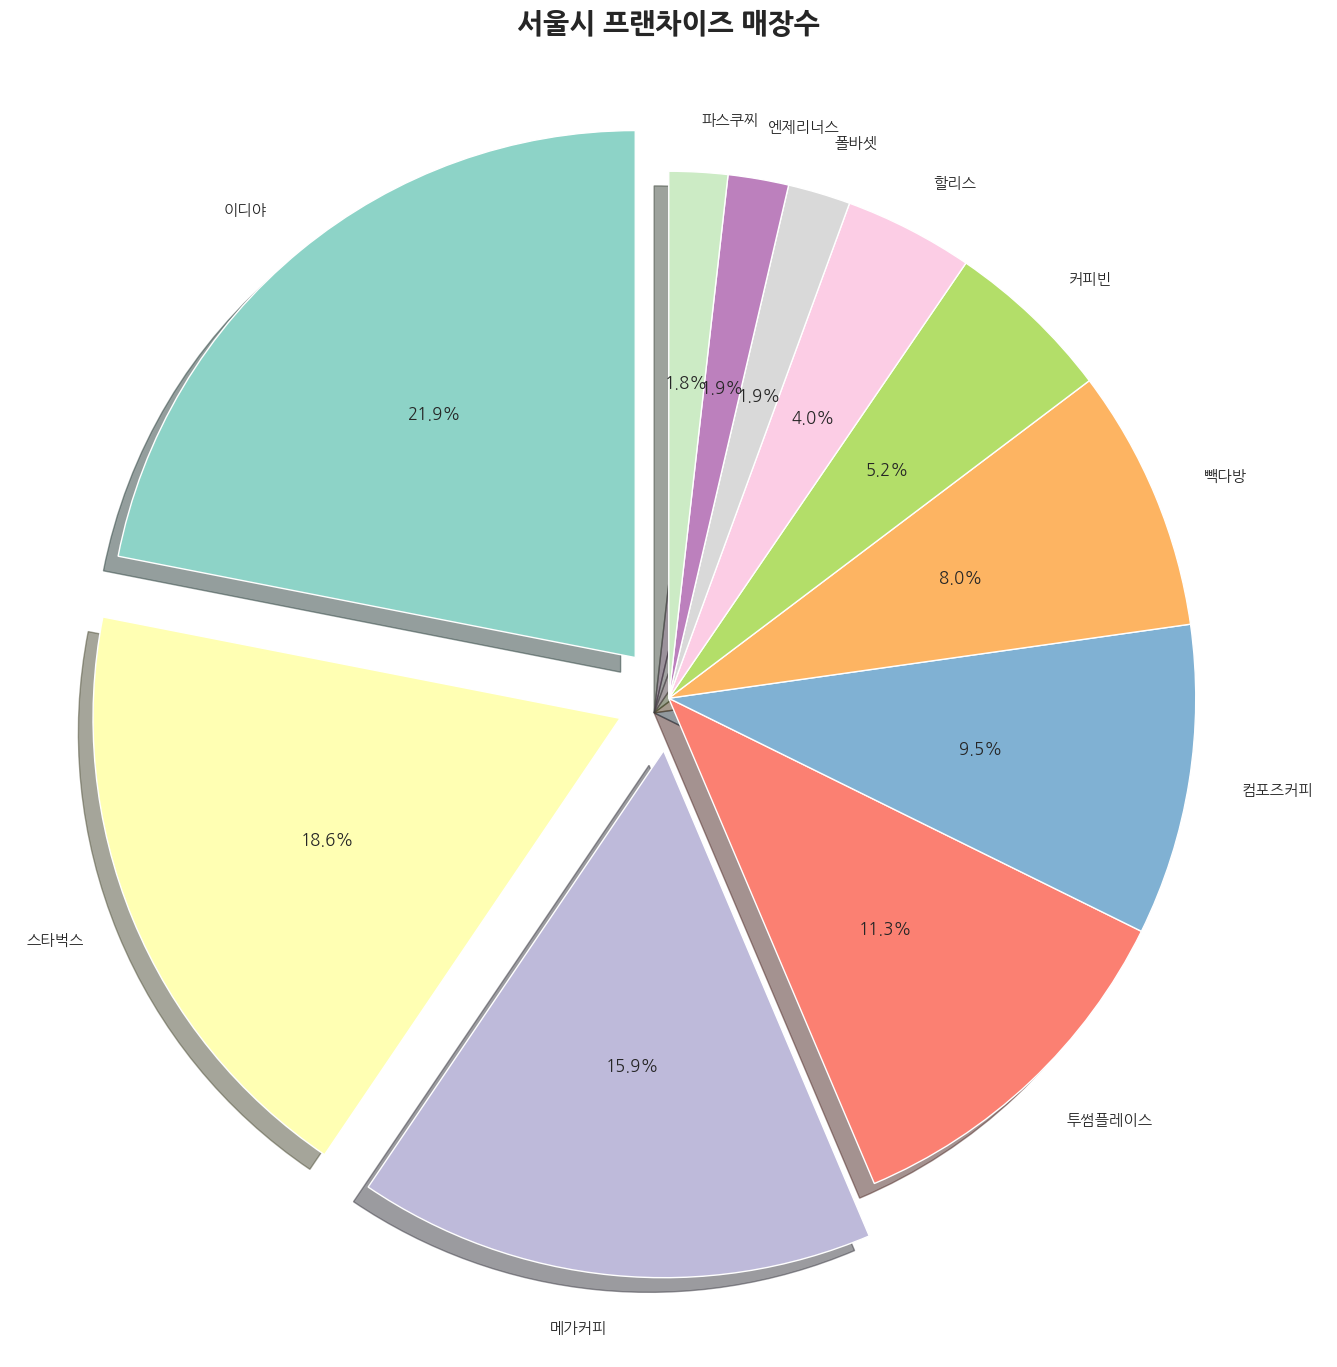

In [ ]:
#지역구별 매장 비율
labels = df_seoul['브랜드명'].value_counts().index.tolist()
ratio = df_seoul['브랜드명'].value_counts().values.tolist()

plt.figure(figsize=(17,20))

#색상 선택
cmap = plt.get_cmap("Set3")
colors= cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

#중심에서 떨어진 정도
explode =[0.1,0.1,0.1,0,0,0,0,0,0,0,0]

plt.title('서울시 프랜차이즈 매장수' , size = 20 , fontweight = 'bold')
plt.pie(ratio,explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90 )

plt.show()

## 커피지수 구하기


In [ ]:
coffee = pd.read_csv("./MID/coffee/all_cafes.csv")
df_seoul = coffee[coffee['시도명']=='서울특별시']

In [ ]:
df_seoul_gu  = pd.crosstab(df_seoul['시군구명'],df_seoul['브랜드명'],margins = True , margins_name = '합계')
df_seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계
시군구명                                                                       
강남구     21   17    88      1   44   50     19      42    12   12   16   322
강동구     22   10    17      1   26    4     12      12     1    2    3   110
강북구     20    9     6      2   20    1      2       7     0    0    2    69
강서구     35   17    25      3   42    4     27      19     5    4    2   183
관악구     18   11    12      4   28    2     13       8     3    1    6   106
광진구     14   10    19      2   24    4     16      12     1    0    5   107
구로구     28   13    14      1   29    2     19      11     1    4    5   127
금천구     13    8    13      2   23    2     16      11     0    0    2    90
노원구     28   14    14      2   29    3      8      11     2    1    3   115
도봉구     16    6     4      0   24    0      9       7     1    0    0    67
동대문구    18    7    10      1   25    3     10       9     0    1    0    84
동작구     14    6    11      3   22    0      9       5     0    0    6    76
마포구     27   11    35      3   34    7     15      25     1    3   10   171
서대문구    17    6    22      2   20    2     12       9     5    0    8   103
서초구     12   12    48      1   29   20      8      28     7   10    9   184
성동구     16   12    15      0   22    0      9      11     2    0    3    90
성북구     27   16    15      0   31    2      8      10     0    0    1   110
송파구     32   17    34     10   39   14     19      30     1    4    6   206
양천구     26    6    17      0   26    2     18       9     3    0    5   112
영등포구    26   10    41      4   41   11     14      21     3    6    8   185
용산구      6    8    25      1   14    4      1       9     4    2    4    78
은평구     24   10    13      5   26    1     15       6     0    1    3   104
종로구     16    8    40      5   31   15      8      12     3    3   11   152
중구      17    6    55      6   30   13     11      32     3    8    9   190
중랑구     19   10     8      1   29    1     10      10     0    0    1    89
합계     512  260   601     60  708  167    308     366    58   62  128  3230

#### 서울시 평균 1ml당 단가를 이용해서 구해보기

In [ ]:
# 분자에 해당하는 지역구별평균1𝑚𝑙당단가를 구하고 서울시 평균 1ml당 단가로 나눠주기
df_seoul_gu['커피지수'] = ((df_seoul_gu['커피빈'] * 14.085 + df_seoul_gu['폴바셋'] * 13.056 + df_seoul_gu['파스쿠찌'] * 11.688
                        + df_seoul_gu['이디야'] * 8.333 + df_seoul_gu['빽다방'] * 3.750
                        + df_seoul_gu['컴포즈커피'] * 2.646 + df_seoul_gu['메가커피'] * 2.646
                        + df_seoul_gu['할리스'] * 12.712 + df_seoul_gu['투썸플레이스'] *12.676 + df_seoul_gu['스타벅스'] *12.676 + df_seoul_gu['엔제리너스'] *12.676) / df_seoul_gu['합계'])/8.523

In [ ]:
df_seoul_gu.sort_values(by='커피지수',ascending = False)

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계  \
시군구명                                                                          
강남구     21   17    88      1   44   50     19      42    12   12   16   322   
서초구     12   12    48      1   29   20      8      28     7   10    9   184   
중구      17    6    55      6   30   13     11      32     3    8    9   190   
용산구      6    8    25      1   14    4      1       9     4    2    4    78   
종로구     16    8    40      5   31   15      8      12     3    3   11   152   
영등포구    26   10    41      4   41   11     14      21     3    6    8   185   
마포구     27   11    35      3   34    7     15      25     1    3   10   171   
송파구     32   17    34     10   39   14     19      30     1    4    6   206   
합계     512  260   601     60  708  167    308     366    58   62  128  3230   
서대문구    17    6    22      2   20    2     12       9     5    0    8   103   
광진구     14   10    19      2   24    4     16      12     1    0    5   107   
강동구     22   10    17      1   26    4     12      12     1    2    3   110   
동작구     14    6    11      3   22    0      9       5     0    0    6    76   
관악구     18   11    12      4   28    2     13       8     3    1    6   106   
성동구     16   12    15      0   22    0      9      11     2    0    3    90   
금천구     13    8    13      2   23    2     16      11     0    0    2    90   
강서구     35   17    25      3   42    4     27      19     5    4    2   183   
노원구     28   14    14      2   29    3      8      11     2    1    3   115   
동대문구    18    7    10      1   25    3     10       9     0    1    0    84   
양천구     26    6    17      0   26    2     18       9     3    0    5   112   
구로구     28   13    14      1   29    2     19      11     1    4    5   127   
강북구     20    9     6      2   20    1      2       7     0    0    2    69   
중랑구     19   10     8      1   29    1     10      10     0    0    1    89   
은평구     24   10    13      5   26    1     15       6     0    1    3   104   
성북구     27   16    15      0   31    2      8      10     0    0    1   110   
도봉구     16    6     4      0   24    0      9       7     1    0    0    67   

브랜드명      커피지수  
시군구명            
강남구   1.239382  
서초구   1.226931  
중구    1.211873  
용산구   1.186677  
종로구   1.157625  
영등포구  1.072862  
마포구   1.036660  
송파구   1.024686  
합계    1.000006  
서대문구  0.993893  
광진구   0.950444  
강동구   0.913761  
동작구   0.901276  
관악구   0.900323  
성동구   0.893744  
금천구   0.888528  
강서구   0.875797  
노원구   0.865676  
동대문구  0.862504  
양천구   0.850589  
구로구   0.831457  
강북구   0.830270  
중랑구   0.822008  
은평구   0.820013  
성북구   0.819936  
도봉구   0.770113

In [ ]:
df_coffee_index= pd.read_excel("seoul_coffee_byprice.xlsx")
df_coffee_index = df_coffee_index[['시군구명','커피지수']]
df_coffee_index[:25].sort_values(by='커피지수',ascending = False).style.background_gradient(cmap='YlOrRd')

**서울시 지역구별 커피지수 비교**
- top 5 : 강남구, 서초구, 중구, 용산구, 영등포구
- bottom 5 : 강북구, 중랑구, 은형구, 성북구, 도봉구


In [ ]:
# 전체 데이터프레임 합치기 위해 정리해두기
# 합계 열, 행 제거
df_seoul_gu = df_seoul_gu.drop('합계', axis=0)
df_seoul_gu = df_seoul_gu.drop('합계', axis=1)

#### 프랜차이즈 브랜드 매장 수 비율 비교

In [ ]:
 df_seoul_gu.T['강남구'].index.tolist()[:11]

['메가커피',
 '빽다방',
 '스타벅스',
 '엔제리너스',
 '이디야',
 '커피빈',
 '컴포즈커피',
 '투썸플레이스',
 '파스쿠찌',
 '폴바셋',
 '할리스']

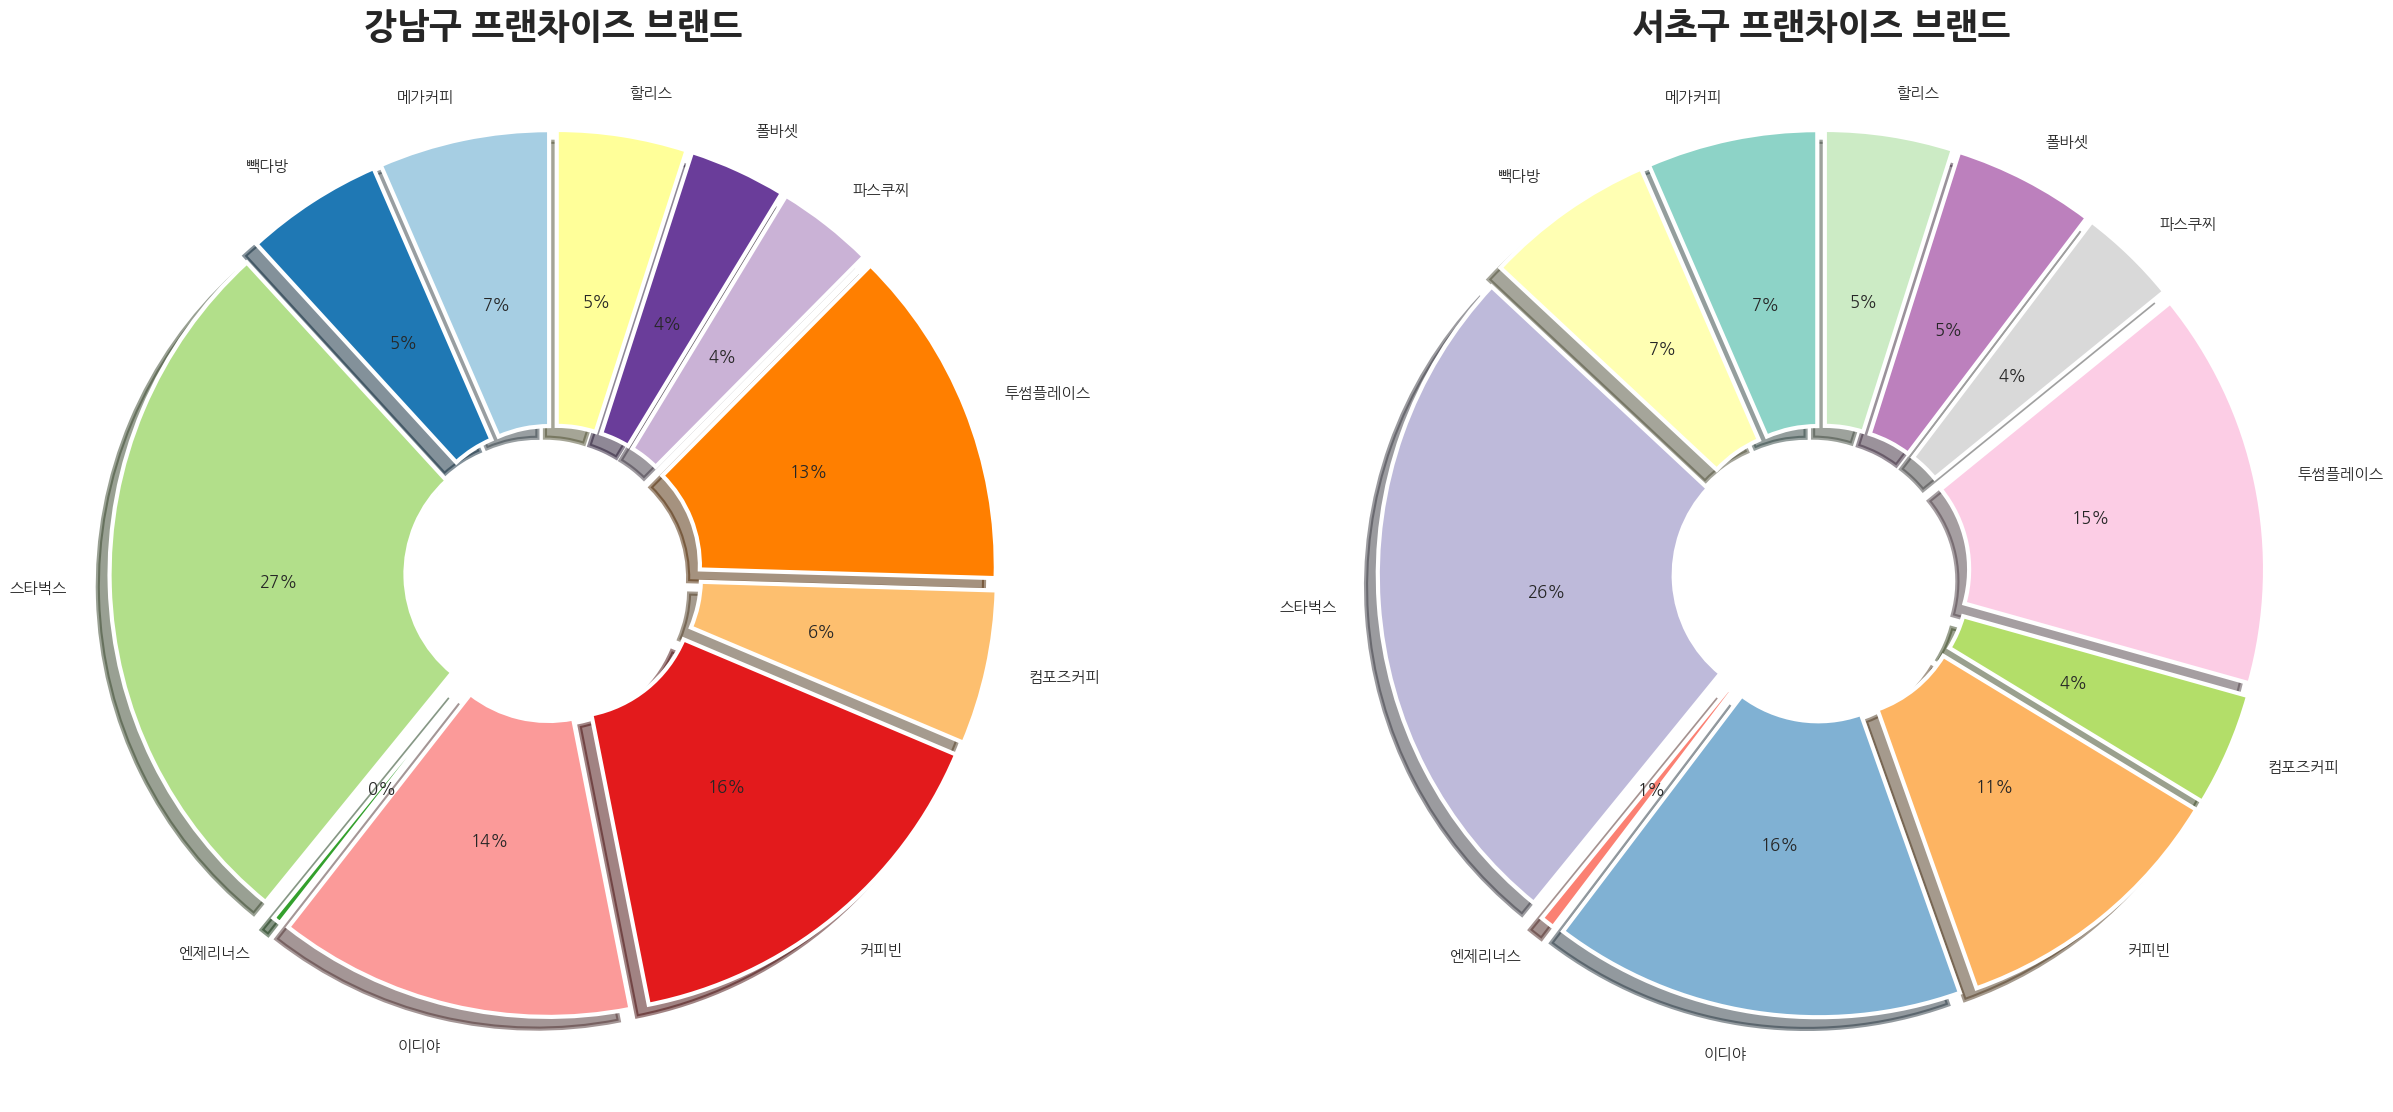

<Figure size 1700x2000 with 0 Axes>

<Figure size 1700x2000 with 0 Axes>

In [ ]:
# 커피지수 1, 2위 시구 시각화
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#강남구 프랜차이즈 브랜드
labels = df_seoul_gu.T['강남구'].index.tolist()[:11]
ratio = df_seoul_gu.T['강남구'].values.tolist()[:11]

#색상 선택
cmap = plt.get_cmap("Paired")
colors= cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

plt.figure(figsize=(17,20))
ax1.pie(ratio, 
        labels=labels,
        autopct='%.0f%%',
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors= colors,
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax1.set_title('강남구 프랜차이즈 브랜드' , size = 25 , fontweight = 'bold')


#서초구 프랜차이즈 브랜드
labels = df_seoul_gu.T['서초구'].index.tolist()[:11]
ratio = df_seoul_gu.T['서초구'].values.tolist()[:11]

#색상 선택
cmap = plt.get_cmap("Set3")
colors= cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

plt.figure(figsize=(17,20))
ax2.pie(ratio, 
        labels=labels,
        autopct='%.0f%%',
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors= colors,
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax2.set_title('서초구 프랜차이즈 브랜드' , size = 25 , fontweight = 'bold')
plt.show()

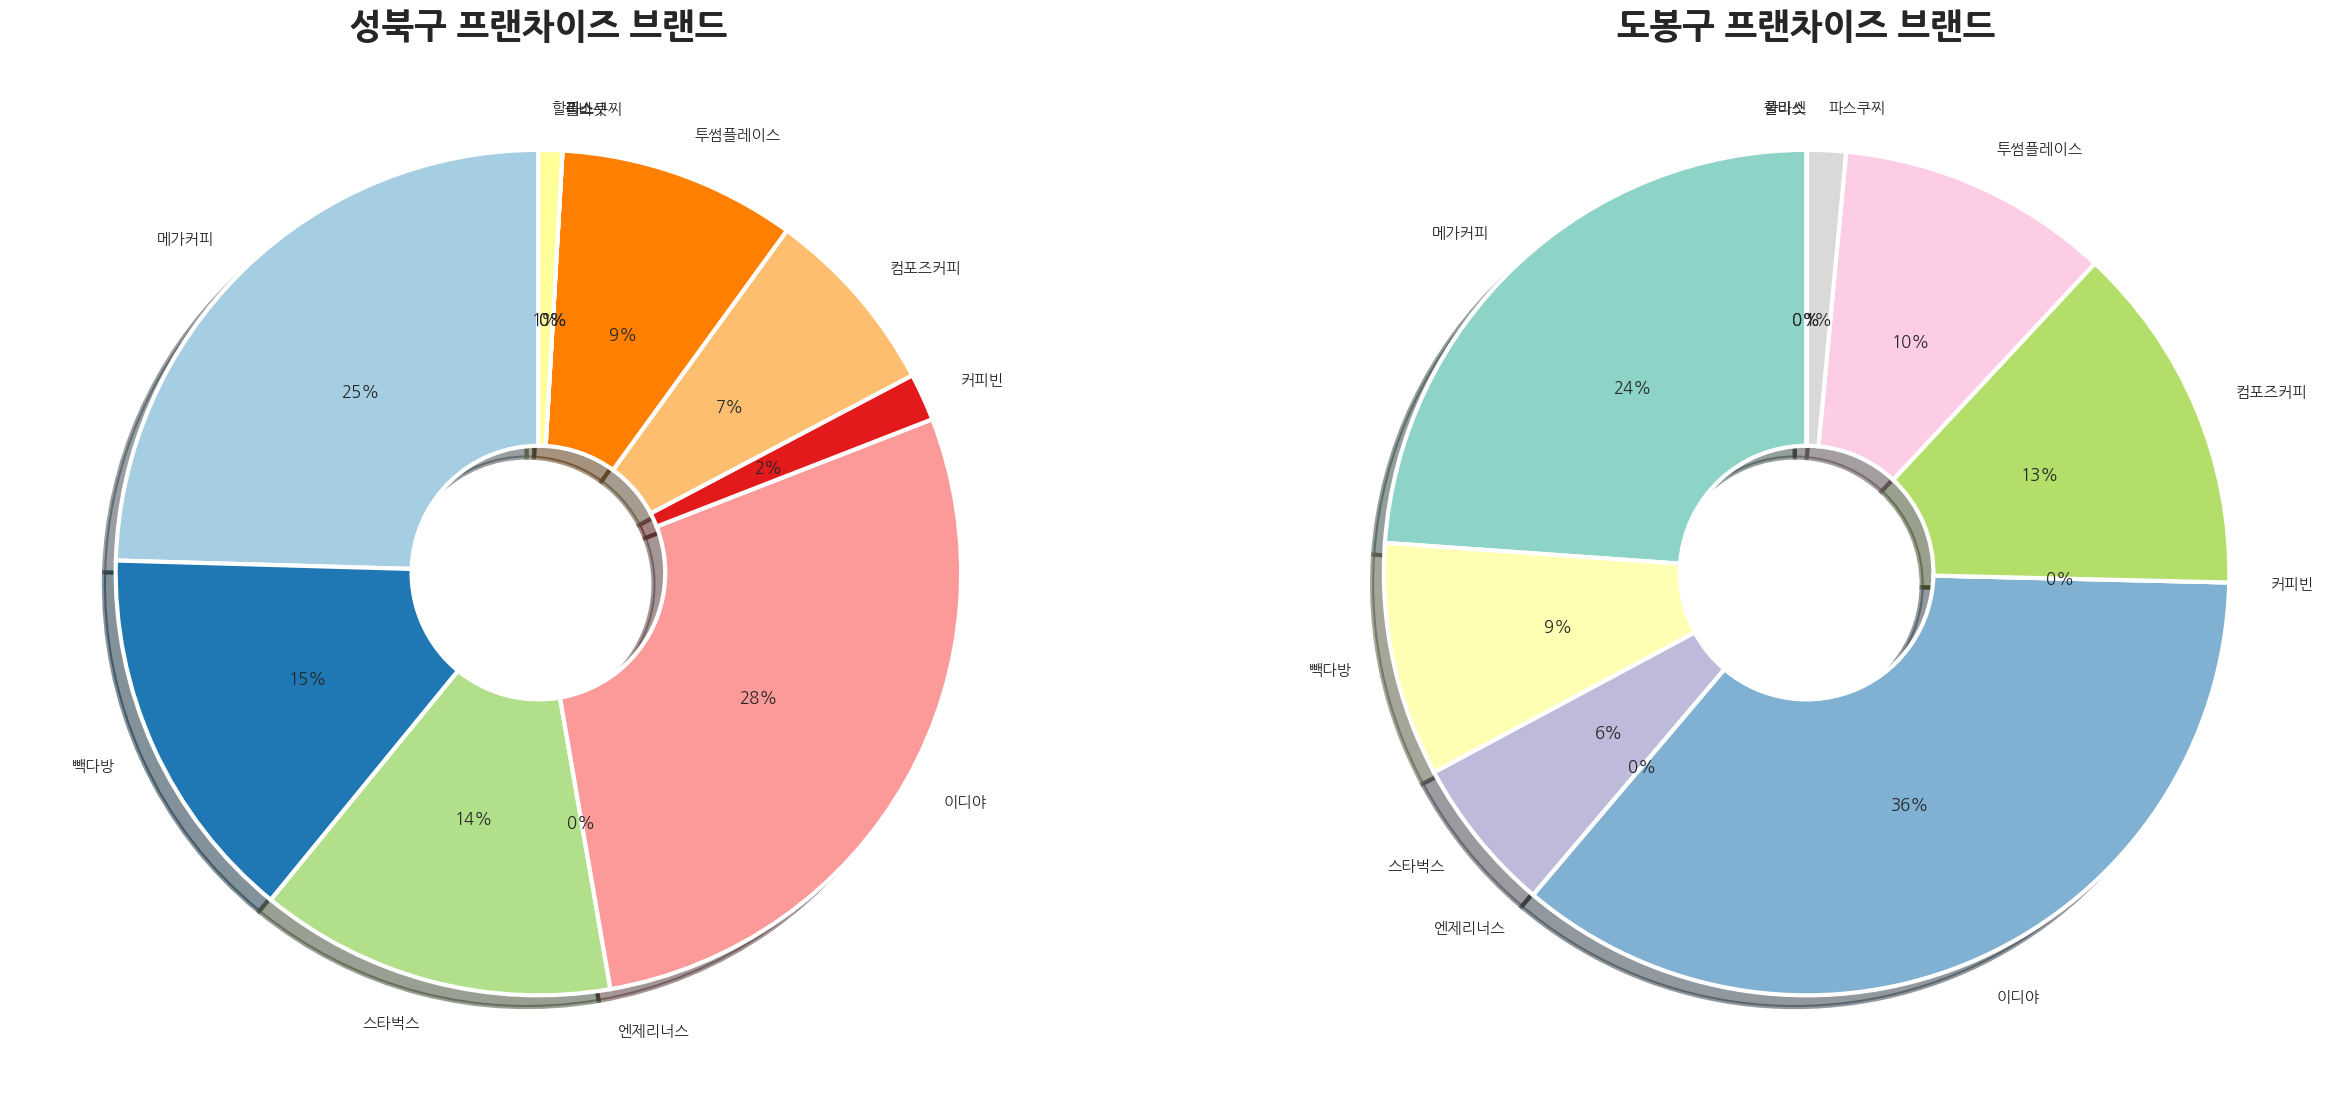

<Figure size 1700x2000 with 0 Axes>

<Figure size 1700x2000 with 0 Axes>

In [ ]:
# 커피지수 24, 25위 시구 시각화
fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#성북구 프랜차이즈 브랜드
labels = df_seoul_gu.T['성북구'].index.tolist()[:11]
ratio = df_seoul_gu.T['성북구'].values.tolist()[:11]

#색상 선택
cmap = plt.get_cmap("Paired")
colors= cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

plt.figure(figsize=(17,20))
ax1.pie(ratio, 
        labels=labels,
        autopct='%.0f%%',
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순 , False:반시계방향순
        explode=[0,0,0,0,0,0,0,0,0,0,0], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors= colors,
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax1.set_title('성북구 프랜차이즈 브랜드' , size = 25 , fontweight = 'bold')


#도봉구 프랜차이즈 브랜드
labels = df_seoul_gu.T['도봉구'].index.tolist()[:11]
ratio = df_seoul_gu.T['도봉구'].values.tolist()[:11]

#색상 선택
cmap = plt.get_cmap("Set3")
colors= cmap(np.array([0,1,2,3,4,5,6,7,8,9,10,11]))

plt.figure(figsize=(17,20))
ax2.pie(ratio, 
        labels=labels,
        autopct='%.0f%%',
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순 , False:반시계방향순
        explode=[0,0,0,0,0,0,0,0,0,0,0], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors= colors,
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        ) #width: 부채꼴 영역 너비,edgecolor: 테두리 색 , linewidth : 라인 두께
ax2.set_title('도봉구 프랜차이즈 브랜드' , size = 25 , fontweight = 'bold')
plt.show()

 - 커피지수 낮은 구 : 메가커피, 이디야가 절반 이상 차지
 - 커피 단가 높은 커피빈(성북구 2개) ,폴바셋이 입점해있지 않음


## 생활인구

In [ ]:
living = pd.read_csv("./MID/seoul/서울생활인구.csv")

In [ ]:
living.head()

내국인생활인구수   단기체류외국인인구수  동일자치구행정동간이동인구수      서울외유입인구수 시군구명  야간인구수(19~08)  \
0  1.049373e+07  142220.7039    2.028706e+06  1.519685e+06  서울시  1.081284e+07   
1  2.952944e+05    9800.4689    3.141458e+04  7.087107e+04  종로구  2.648282e+05   
2  2.944152e+05   29914.4163    3.041326e+04  9.501220e+04   중구  2.616953e+05   
3  2.863970e+05    6314.3007    4.381241e+04  5.321226e+04  용산구  2.904741e+05   
4  3.502608e+05    3722.9048    5.848175e+04  4.461970e+04  성동구  3.564460e+05   

       일최대이동인구수        일최대인구수        일최소인구수     자치구간이동인구수   장기체류외국인인구수  \
0  6.162669e+06  1.139891e+07  1.067543e+07  2.614278e+06  396219.5290   
1  2.750918e+05  4.353437e+05  2.346647e+05  1.728061e+05   19204.5016   
2  3.429648e+05  4.942753e+05  2.200687e+05  2.175393e+05   20494.3788   
3  1.934431e+05  3.392370e+05  2.765431e+05  9.641840e+04   15853.6815   
4  2.225381e+05  3.953874e+05  3.443025e+05  1.194367e+05   17087.5947   

   주간인구수(09~18)        총생활인구수  
0  1.133922e+07  1.103217e+07  
1  4.075589e+05  3.242993e+05  
2  4.612043e+05  3.448240e+05  
3  3.338922e+05  3.085650e+05  
4  3.915466e+05  3.710713e+05

In [ ]:
living = living[['총생활인구수','일최대이동인구수','시군구명']]

In [ ]:
living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총생활인구수    26 non-null     float64
 1   일최대이동인구수  26 non-null     float64
 2   시군구명      26 non-null     object 
dtypes: float64(2), object(1)
memory usage: 752.0+ bytes


In [ ]:
#e 자연상수로 표시된거 풀기
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
living.head()

총생활인구수      일최대이동인구수 시군구명
0 11032166.48270 6162669.30910  서울시
1   324299.33990  275091.77080  종로구
2   344824.03440  342964.81130   중구
3   308564.96360  193443.07140  용산구
4   371071.28290  222538.12580  성동구

 - 2022년 12월 기준 자료
 - 서울시의 생활인구:1,103만명(11,032,166명)
 - 서울시의 주민등록인구: 966만명(9,667,669명)
 - 하루 평균 서울시에서 생활하는 사람들은 등록된 인구보다 약 137만 명이 많다고 볼 수 있음

### folium을 이용해 지역구별 생활인구 시각화(단계구분도)

In [ ]:
# 첫행인 서울시 데이터 빼기
living2 = living.loc[1:]

In [ ]:
# 서울 행정구역 json raw파일
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [ ]:
# 지역구명 이름 적을 수 있는 지 확인해보기
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=living2,
             columns=['시군구명', '총생활인구수'],
             fill_color='RdPu',  
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="서울시 생활인구 지역구 분포"
            )
m

In [ ]:
# 지역구명 이름 적을 수 있는 지 확인해보기
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=living2,
             columns=['시군구명', '일최대이동인구수'],
             fill_color='YlOrRd',  
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="서울시 유동인구 지역구 분포"
            )
m

In [ ]:
df_seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    커피지수
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16 1.23938
강동구     22   10    17      1   26    4     12      12     1    2    3 0.91376
강북구     20    9     6      2   20    1      2       7     0    0    2 0.83027
강서구     35   17    25      3   42    4     27      19     5    4    2 0.87580
관악구     18   11    12      4   28    2     13       8     3    1    6 0.90032
광진구     14   10    19      2   24    4     16      12     1    0    5 0.95044
구로구     28   13    14      1   29    2     19      11     1    4    5 0.83146
금천구     13    8    13      2   23    2     16      11     0    0    2 0.88853
노원구     28   14    14      2   29    3      8      11     2    1    3 0.86568
도봉구     16    6     4      0   24    0      9       7     1    0    0 0.77011
동대문구    18    7    10      1   25    3     10       9     0    1    0 0.86250
동작구     14    6    11      3   22    0      9       5     0    0    6 0.90128
마포구     27   11    35      3   34    7     15      25     1    3   10 1.03666
서대문구    17    6    22      2   20    2     12       9     5    0    8 0.99389
서초구     12   12    48      1   29   20      8      28     7   10    9 1.22693
성동구     16   12    15      0   22    0      9      11     2    0    3 0.89374
성북구     27   16    15      0   31    2      8      10     0    0    1 0.81994
송파구     32   17    34     10   39   14     19      30     1    4    6 1.02469
양천구     26    6    17      0   26    2     18       9     3    0    5 0.85059
영등포구    26   10    41      4   41   11     14      21     3    6    8 1.07286
용산구      6    8    25      1   14    4      1       9     4    2    4 1.18668
은평구     24   10    13      5   26    1     15       6     0    1    3 0.82001
종로구     16    8    40      5   31   15      8      12     3    3   11 1.15762
중구      17    6    55      6   30   13     11      32     3    8    9 1.21187
중랑구     19   10     8      1   29    1     10      10     0    0    1 0.82201

### 커피지수는 생활인구와 상관관계가 있을까? + 생활인구와 유동인구

In [ ]:
df_seoul_gu1 = df_seoul_gu.reset_index()

In [ ]:
data1 = pd.merge(living2,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')

In [ ]:
data1.head()

총생활인구수     일최대이동인구수 시군구명    커피지수
0 324299.33990 275091.77080  종로구 1.15762
1 344824.03440 342964.81130   중구 1.21187
2 308564.96360 193443.07140  용산구 1.18668
3 371071.28290 222538.12580  성동구 0.89374
4 383557.06880 175551.09730  광진구 0.95044

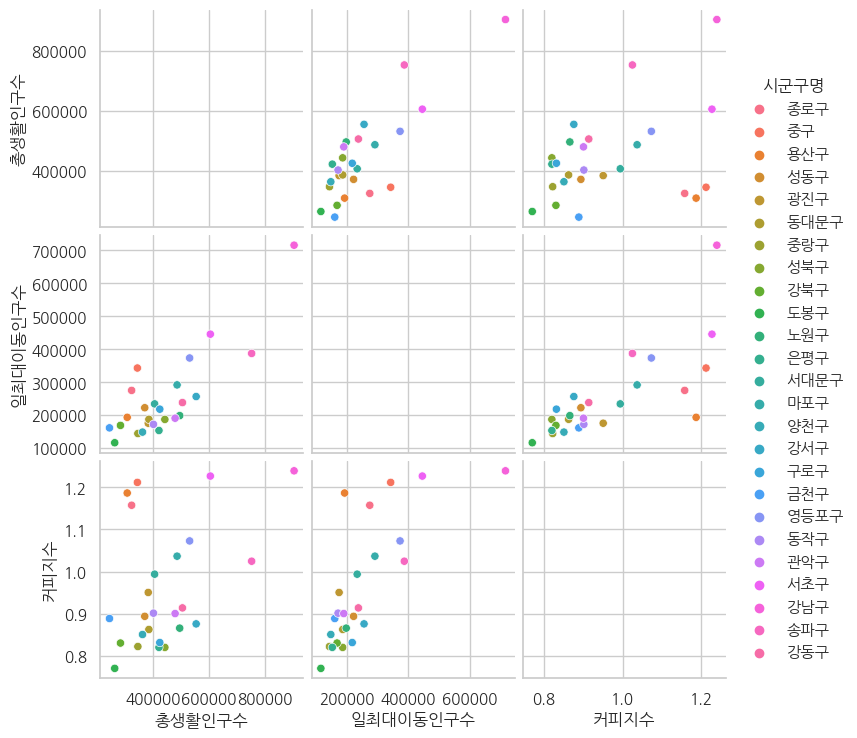

In [ ]:
# 산점도
sns.pairplot(data1,hue='시군구명')
plt.show()

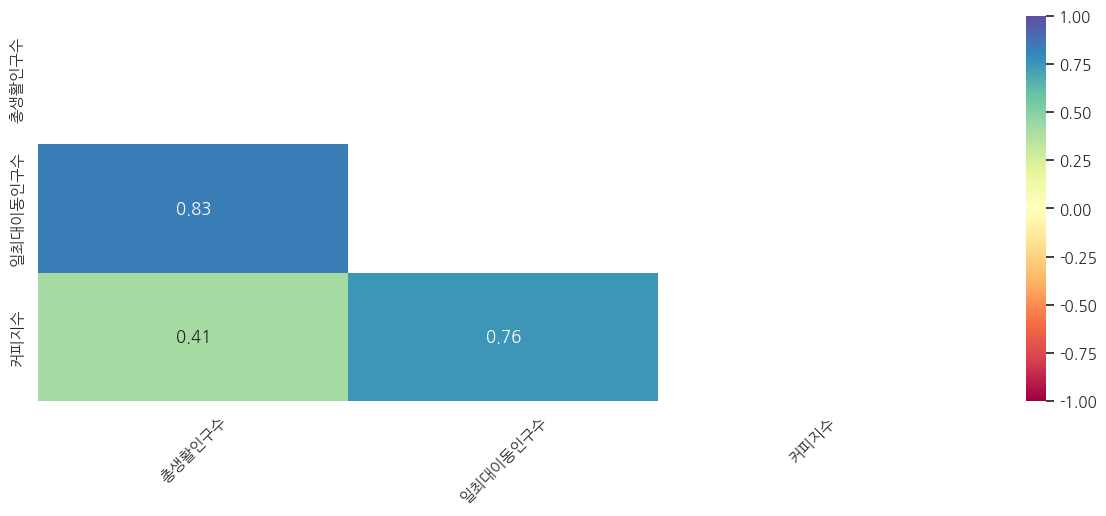

In [ ]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(data1.corr()))
sns.heatmap(data1.corr(), annot=True, mask=mask, cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation= 45);

In [ ]:
living = pd.read_csv("./MID/seoul/서울생활인구.csv")

In [ ]:
df123 = pd.merge(living,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')
df123.head()

내국인생활인구수  단기체류외국인인구수  동일자치구행정동간이동인구수    서울외유입인구수 시군구명  야간인구수(19~08)  \
0 295294.36940  9800.46890     31414.58030 70871.07400  종로구  264828.21520   
1 294415.23930 29914.41630     30413.25900 95012.20280   중구  261695.28570   
2 286396.98140  6314.30070     43812.40670 53212.26460  용산구  290474.11440   
3 350260.78350  3722.90480     58481.74590 44619.69950  성동구  356446.04410   
4 357632.29150  3790.89450     75815.52370 33295.06460  광진구  396901.02450   

      일최대이동인구수       일최대인구수       일최소인구수    자치구간이동인구수  장기체류외국인인구수  \
0 275091.77080 435343.69020 234664.67760 172806.11650 19204.50160   
1 342964.81130 494275.29620 220068.72990 217539.34950 20494.37880   
2 193443.07140 339236.99880 276543.09160  96418.40010 15853.68150   
3 222538.12580 395387.40620 344302.53190 119436.68040 17087.59470   
4 175551.09730 401763.01310 356817.84350  66440.50900 22133.88280   

   주간인구수(09~18)       총생활인구수    커피지수  
0  407558.91450 324299.33990 1.15762  
1  461204.28250 344824.03440 1.21187  
2  333892.15260 308564.96360 1.18668  
3  391546.61730 371071.28290 0.89374  
4  364875.53090 383557.06880 0.95044

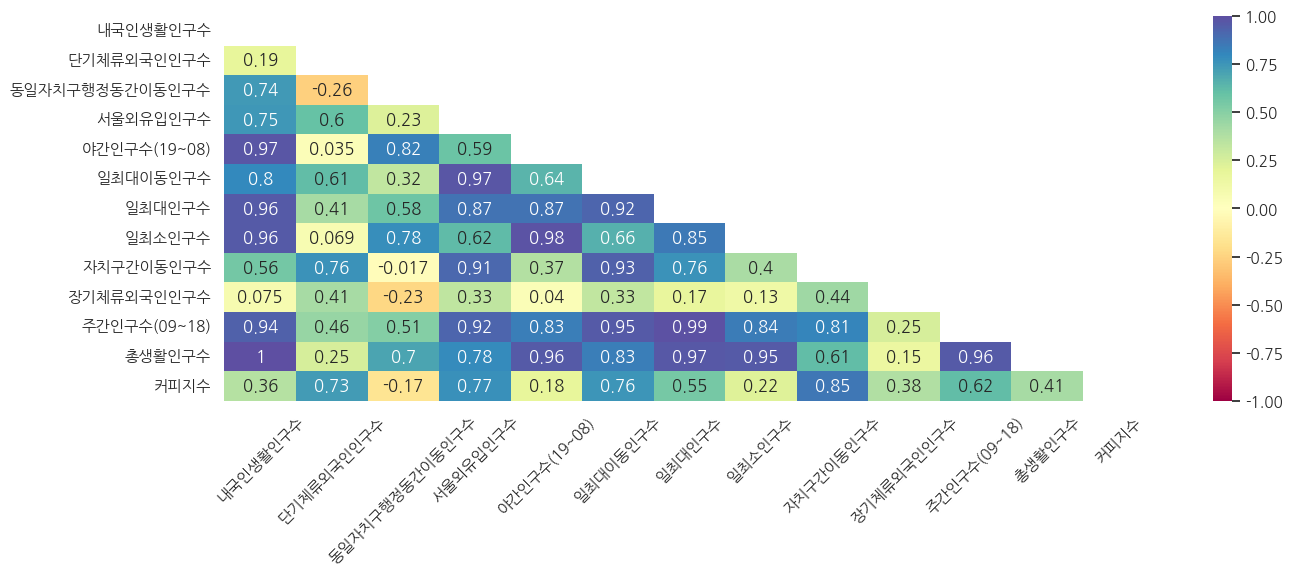

In [ ]:
plt.figure(figsize=(15,5))
mask = np.triu(np.ones_like(df123.corr()))
sns.heatmap(df123.corr(), annot=True, mask=mask, cmap='Spectral', vmin=-1, vmax=1)
plt.xticks(rotation= 45);

- 주민등록인구수와는 다르게 생활인구가 커피지수와 더 강한 상관관계를 보인다
- 여러 생활인구 항목들 중에 자치구간이동인구수는 엄청 강한 상관관계를 보인다.
- 그 외에도 단기체류외국인인구수, 동일자치구행정동간이동인구수,일최대이동인구수, 주간인구수(09-18시)도 강한 상관관계를 보인다
- 흔히 카페를 차릴 때 고려해야할 사항인 유동인구와 연관성 ↑ 

- 커피지수를 구할 때 제일 문제가 되었던 인구 비례특성을 해결하려고 ml당 평균 단가를 이용하여 구해봄
- 커피지수가 유동인구랑 상관관계가 있다 -> 커피지수가 이 부분을 잘 설명하는가?로 연결될 수 있나 -> 확인해볼 필요 있음


## 사업체수

In [ ]:
company = pd.read_csv("./MID/Final_data/사업체_종사자수_현황_2021.csv")
company.head()

시군구명   사업체수  전체종사자수  남자종사자수  여자종사자수
0  종로구  48361  275063  153210  121853
1   중구  70308  386564  213782  172782
2  용산구  29680  152605   84314   68291
3  성동구  41665  203221  116978   86243
4  광진구  33706  129707   71124   58583

### 그래프로 시각화

In [ ]:
import koreanize_matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
big_store = pd.read_csv('big_store.csv')
big_store

사업장명    시도명  시군구명       업태구분명
0                동화상가  서울특별시    중구  그 밖의 대규모점포
1        롯데쇼핑㈜롯데슈퍼길동점  서울특별시   강동구        구분없음
2            상계역전종합상가  서울특별시   노원구        쇼핑센터
3        이랜드리테일 NC구로점  서울특별시   구로구         백화점
4          롯데백화점 영등포점  서울특별시  영등포구         백화점
..                ...    ...   ...         ...
685      롯데마켓999 하월곡점  서울특별시   성북구        구분없음
686        롯데마이슈퍼 장위점  서울특별시   성북구        구분없음
687        롯데마이슈퍼 정릉점  서울특별시   성북구        구분없음
688  롯데쇼핑(주) 롯데슈퍼 역촌점  서울특별시   은평구  그 밖의 대규모점포
689     롯데백화점 건대스타시티점  서울특별시   광진구         백화점

[690 rows x 4 columns]

In [ ]:
seoul_big_store_count = big_store.groupby('업태구분명')['사업장명'].count().sort_values(ascending=False)
seoul_big_store_count

업태구분명
그 밖의 대규모점포    286
구분없음          149
대형마트           69
시장             62
쇼핑센터           43
백화점            30
복합쇼핑몰          25
전문점            25
Name: 사업장명, dtype: int64

In [ ]:
seoul_big_store_count.values

array([286, 149,  69,  62,  43,  30,  25,  25], dtype=int64)

Text(0.5, 1.0, '서울시 업태구분별 대규모 사업장 수')

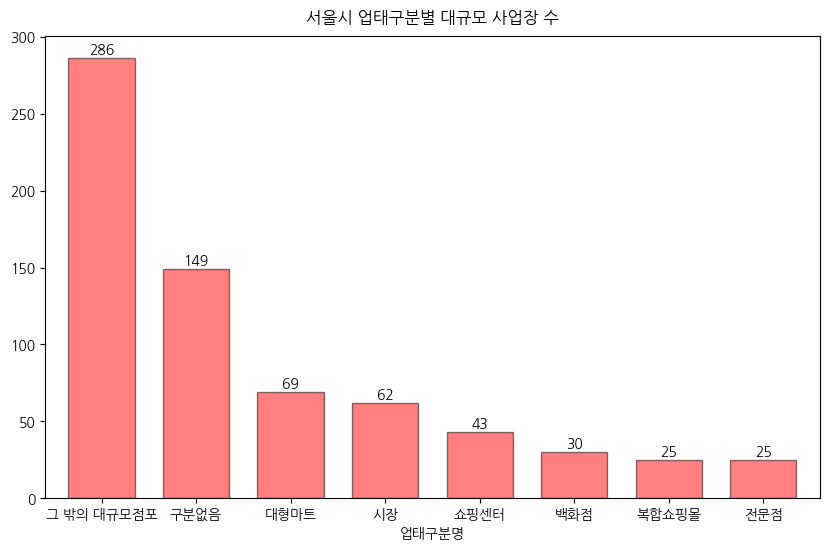

In [ ]:
plt.figure(figsize=(10,6))
bar = seoul_big_store_count.plot(kind='bar', color='r', edgecolor='black', width=0.7, alpha=0.5, rot=0)

for index, value in enumerate(seoul_big_store_count.values):
    plt.text(index, value+3, str(value), horizontalalignment='center') # x 좌표, y 좌표, text, 중앙정렬
    
plt.title('서울시 업태구분별 대규모 사업장 수', pad=10)

In [ ]:
seoul_gu_big_store_count = big_store.groupby(['시군구명', '업태구분명'])['사업장명'].count().unstack().fillna(0)
seoul_gu_big_store_count

업태구분명  구분없음  그 밖의 대규모점포  대형마트  백화점  복합쇼핑몰  쇼핑센터   시장  전문점
시군구명                                                     
강남구    15.0        23.0   1.0  6.0    2.0   3.0  0.0  0.0
강동구    10.0         7.0   5.0  1.0    0.0   0.0  2.0  0.0
강북구     0.0         8.0   4.0  0.0    4.0   1.0  4.0  0.0
강서구     6.0        14.0   2.0  1.0    0.0   1.0  1.0  0.0
관악구     4.0         7.0   2.0  1.0    3.0   1.0  4.0  0.0
광진구     7.0        16.0   1.0  1.0    1.0   0.0  0.0  0.0
구로구     4.0        20.0   4.0  2.0    1.0   2.0  1.0  0.0
금천구     1.0        10.0   4.0  0.0    0.0   7.0  0.0  0.0
노원구     7.0         6.0   1.0  2.0    2.0   2.0  0.0  0.0
도봉구     6.0         6.0   2.0  0.0    0.0   0.0  0.0  0.0
동대문구    6.0        10.0   3.0  1.0    1.0   0.0  8.0  3.0
동작구     4.0         7.0   0.0  0.0    3.0   0.0  1.0  0.0
마포구     5.0         6.0   3.0  0.0    0.0   2.0  9.0  2.0
서대문구   12.0         2.0   0.0  1.0    0.0   0.0  4.0  0.0
서초구     0.0        16.0   5.0  2.0    0.0   0.0  0.0  4.0
성동구     6.0         6.0   2.0  0.0    1.0   0.0  4.0  1.0
성북구     9.0        13.0   4.0  1.0    0.0   1.0  9.0  0.0
송파구    21.0        11.0   4.0  2.0    0.0   3.0  0.0  2.0
양천구    10.0         5.0   1.0  2.0    0.0   1.0  6.0  0.0
영등포구    6.0        22.0   6.0  3.0    1.0   2.0  0.0  2.0
용산구     5.0         3.0   1.0  1.0    0.0   4.0  3.0  8.0
은평구     0.0        15.0   4.0  0.0    1.0   5.0  1.0  0.0
종로구     1.0         9.0   3.0  0.0    2.0   0.0  3.0  1.0
중구      2.0        41.0   2.0  3.0    0.0   8.0  0.0  2.0
중랑구     2.0         3.0   5.0  0.0    3.0   0.0  2.0  0.0

Text(0.5, 1.0, '서울시 자치구별 업태구분별 사업장 수')

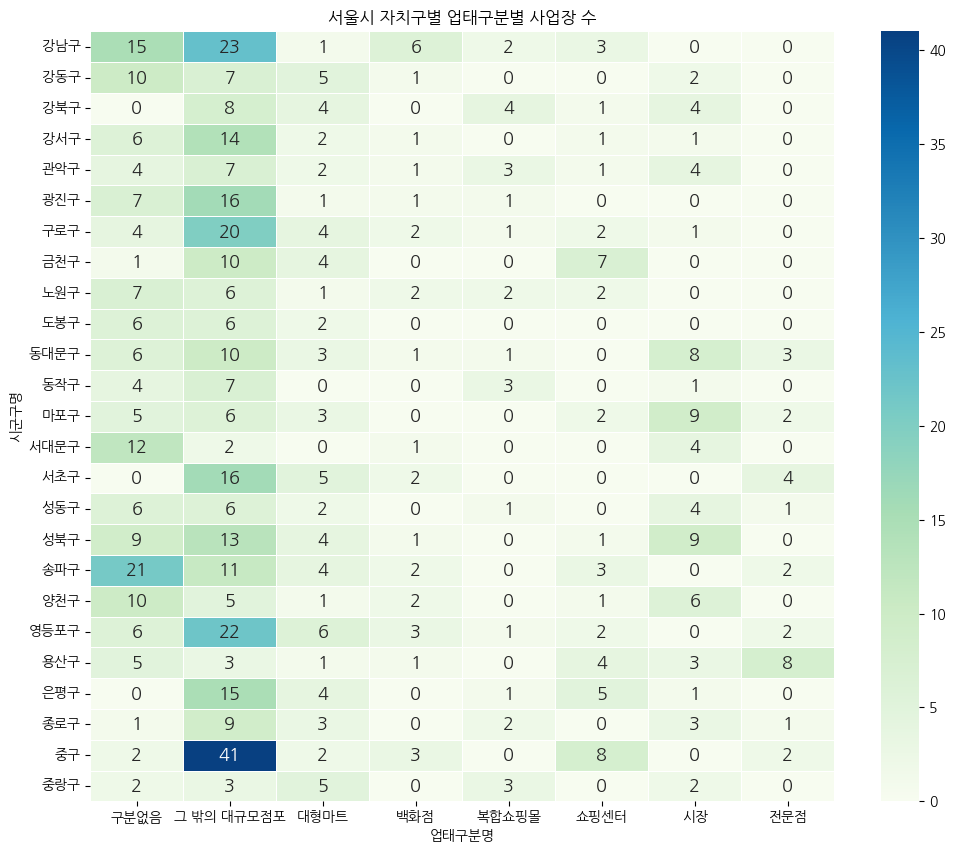

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(seoul_gu_big_store_count, annot=True, annot_kws={'size':13}, cmap='GnBu', linewidth=0.7)
plt.title('서울시 자치구별 업태구분별 사업장 수')

In [ ]:
seoul_gu_big_store_count = big_store.groupby('시군구명')['사업장명'].count().sort_values(ascending=False)
seoul_gu_big_store_count

시군구명
중구      58
강남구     50
송파구     43
영등포구    42
성북구     38
구로구     34
동대문구    32
서초구     27
마포구     27
광진구     26
은평구     26
강동구     25
양천구     25
강서구     25
용산구     25
금천구     22
관악구     22
강북구     21
노원구     20
성동구     20
서대문구    19
종로구     19
동작구     15
중랑구     15
도봉구     14
Name: 사업장명, dtype: int64

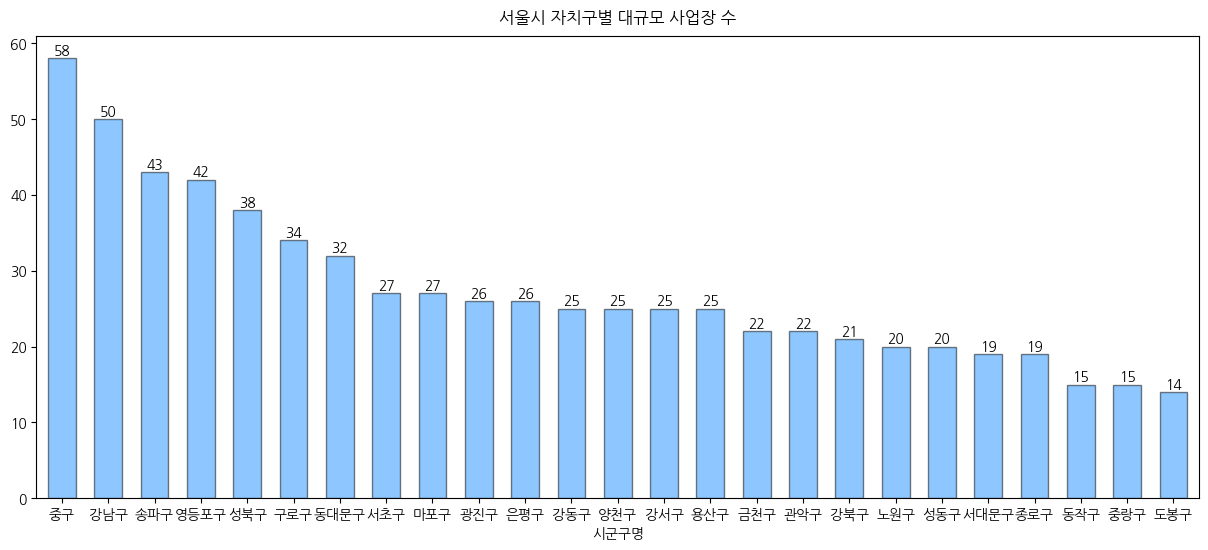

In [ ]:
plt.figure(figsize=(15,6))
bar2 = seoul_gu_big_store_count.plot(kind='bar', color='dodgerblue', edgecolor='black', alpha=0.5, rot=0, width=0.6)

for index, value in enumerate(seoul_gu_big_store_count.values):
    plt.text(index, value+0.5, str(value), horizontalalignment='center')  # x 좌표, y 좌표, text
    
plt.title('서울시 자치구별 대규모 사업장 수', pad=10)
plt.show()

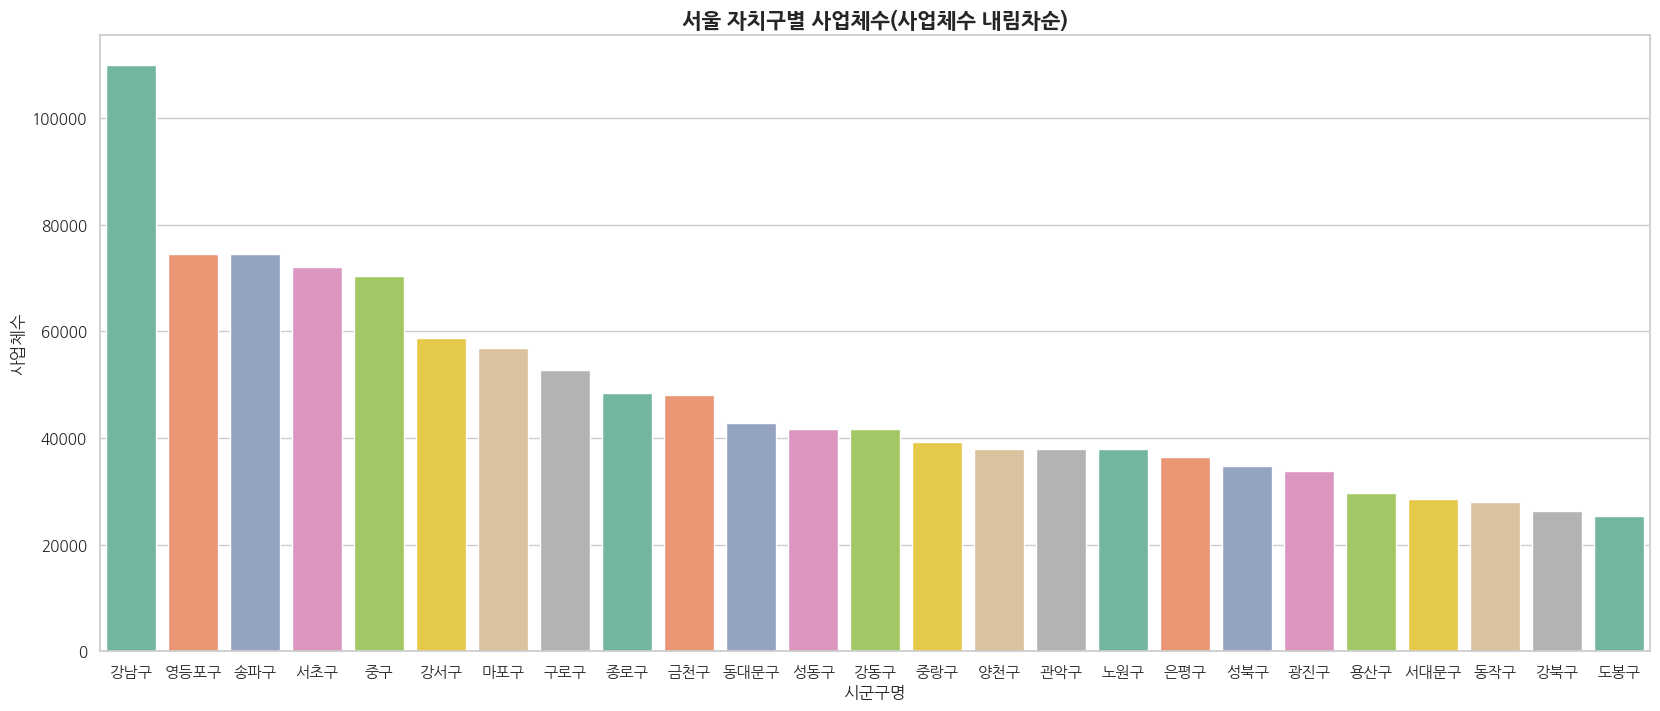

In [ ]:
# 사업체수 시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

company = company.sort_values(by='사업체수', ascending = False)
sns.barplot(data=company, x="시군구명" , y ='사업체수', palette='Set2')
plt.title('서울 자치구별 사업체수(사업체수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

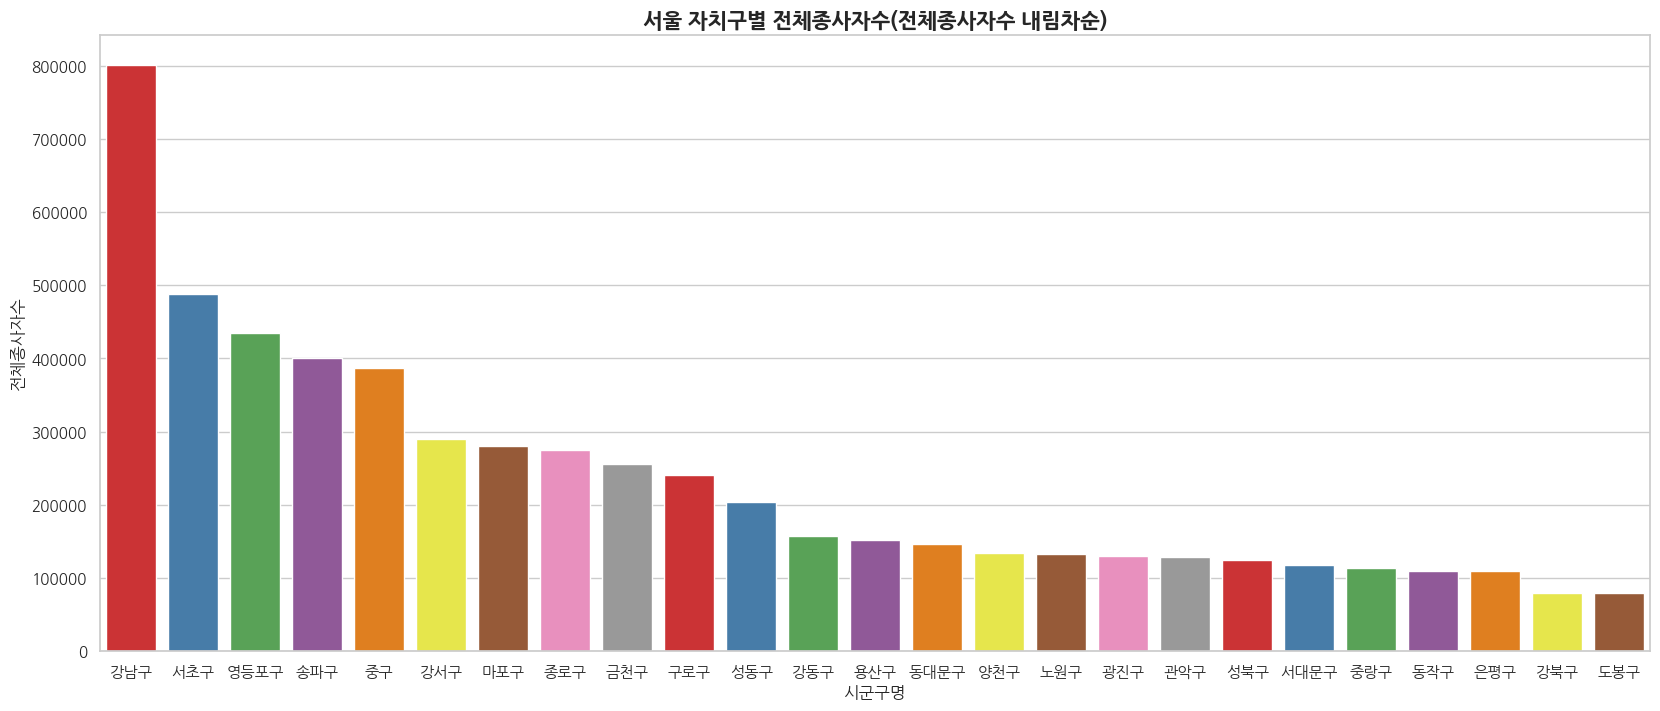

In [ ]:
# 종사자수 시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

company = company.sort_values(by='전체종사자수', ascending = False)
sns.barplot(data=company, x="시군구명" , y ='전체종사자수', palette='Set1')
plt.title('서울 자치구별 전체종사자수(전체종사자수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

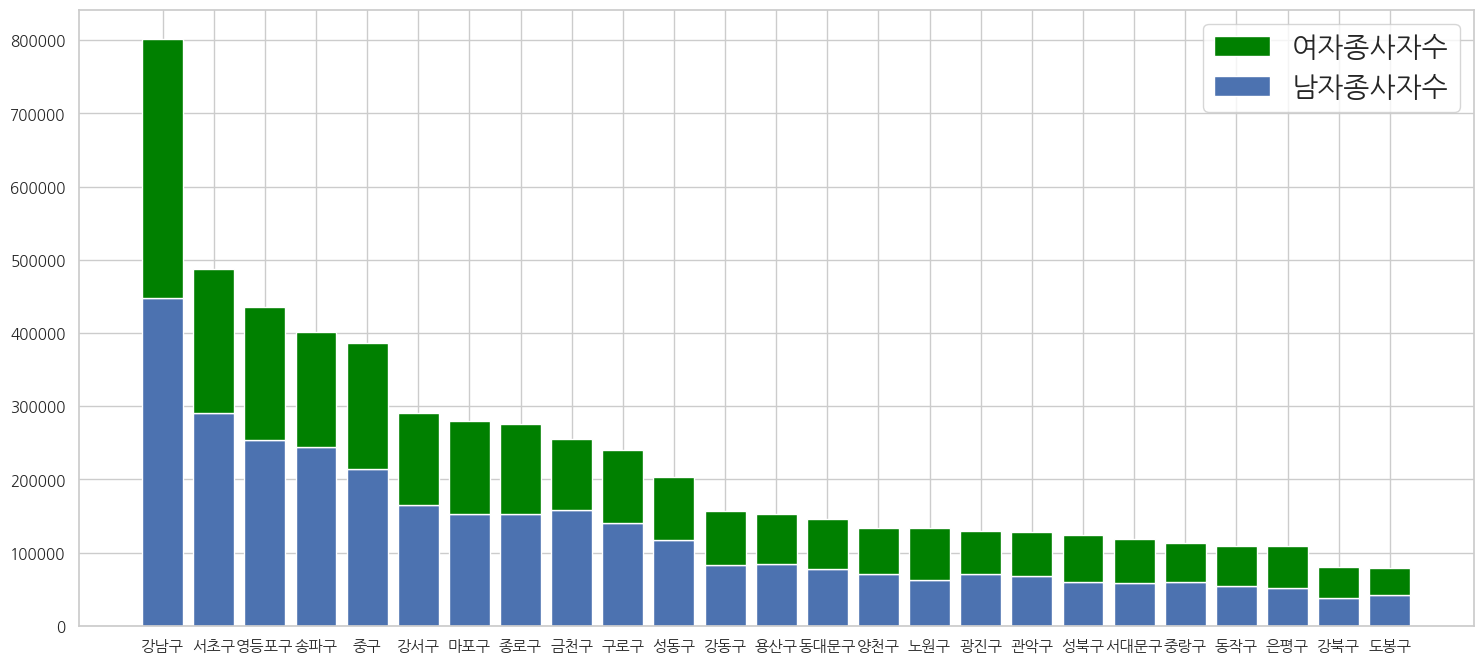

In [ ]:
plt.figure(figsize=(18,8))
p1 = plt.bar(company ['시군구명'], company ['남자종사자수'], color = 'b')
p2 = plt.bar(company ['시군구명'], company ['여자종사자수'], bottom=company ['남자종사자수'], color = 'green')

plt.legend((p2[0], p1[0]), ('여자종사자수', '남자종사자수') , fontsize = 20)
plt.show()

In [ ]:
data2 = pd.merge(company,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')

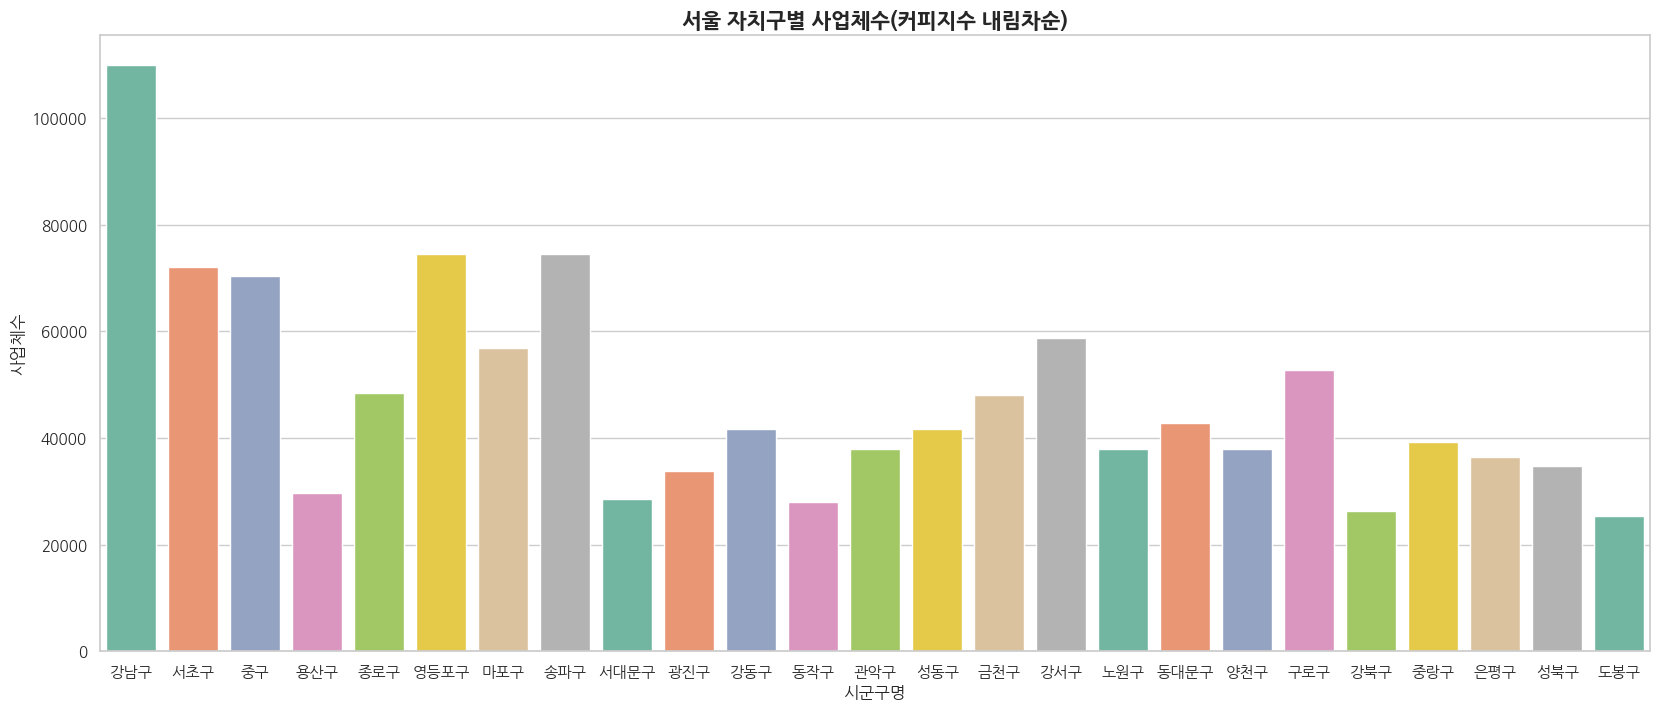

In [ ]:
# 사업체수 시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data2 = data2.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data2, x="시군구명" , y ='사업체수', palette='Set2')
plt.title('서울 자치구별 사업체수(커피지수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

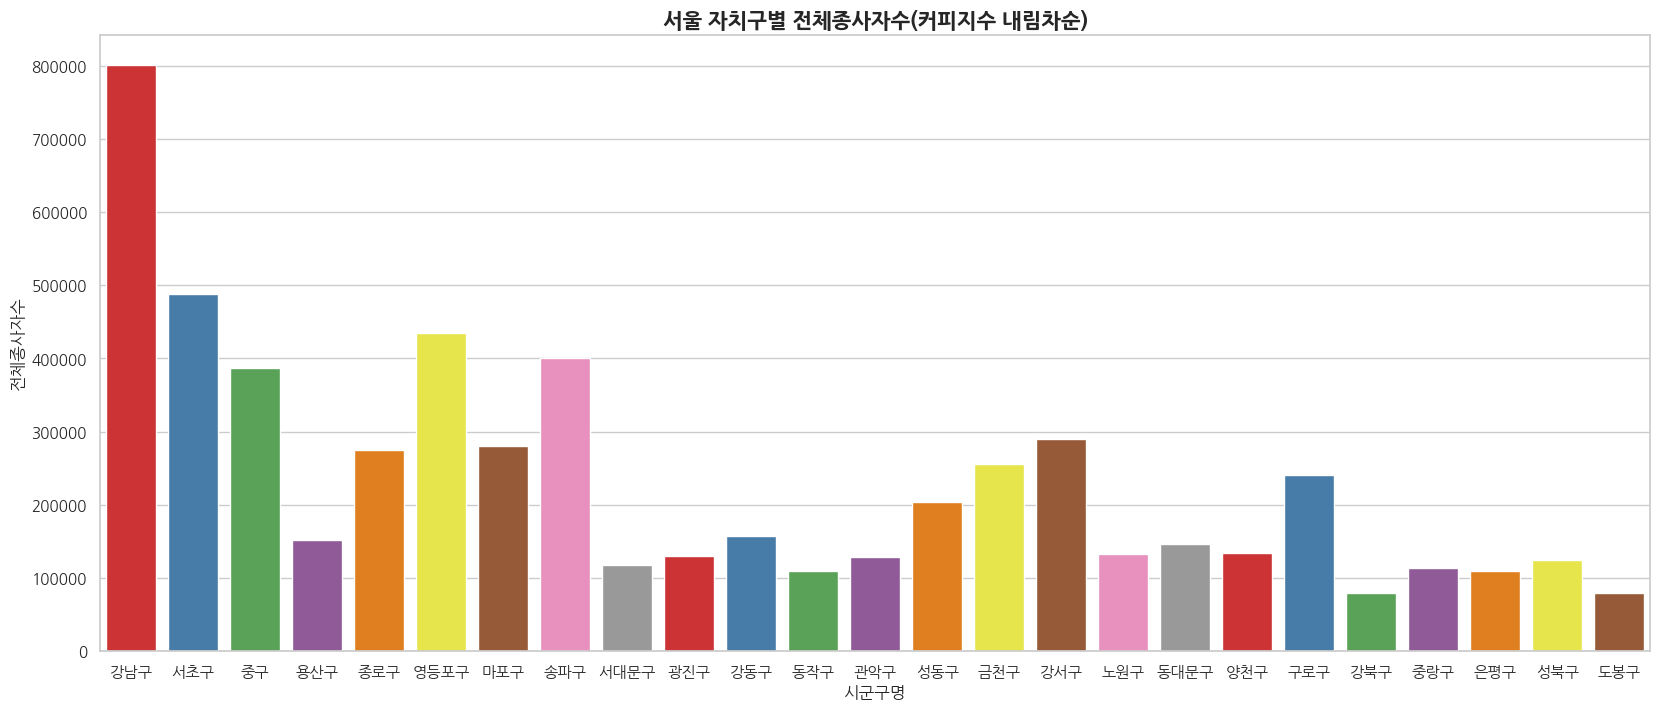

In [ ]:
# 종사자수 시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data2 = data2.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data2, x="시군구명" , y ='전체종사자수', palette='Set1')
plt.title('서울 자치구별 전체종사자수(커피지수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

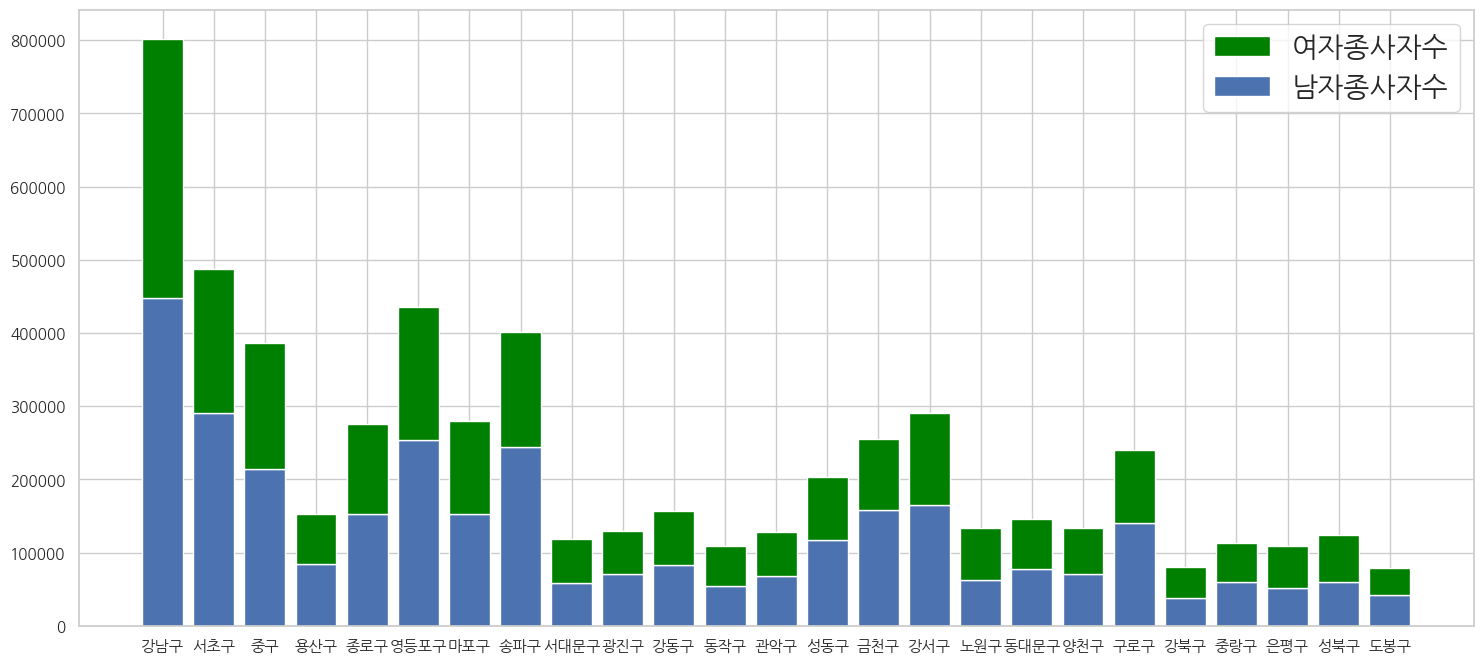

In [ ]:
plt.figure(figsize=(18,8))
data2 = data2.sort_values(by='커피지수', ascending = False)
p1 = plt.bar(data2['시군구명'], data2['남자종사자수'], color = 'b')
p2 = plt.bar(data2['시군구명'], data2['여자종사자수'], bottom=data2['남자종사자수'], color = 'green')

plt.legend((p2[0], p1[0]), ('여자종사자수', '남자종사자수') , fontsize = 20)
plt.show()

### 커피지수는 사업체수 종사자수와 상관관계가 있을까?

In [ ]:
# 커피지수 가져오기
coffeeidx = pd.read_excel('seoul_coffee_byprice.xlsx')
coffeeidx

시군구명      커피지수
0    강남구  1.239382
1    강동구  0.913761
2    강북구  0.830270
3    강서구  0.875797
4    관악구  0.900323
5    광진구  0.950444
6    구로구  0.831457
7    금천구  0.888528
8    노원구  0.865676
9    도봉구  0.770113
10  동대문구  0.862504
11   동작구  0.901276
12   마포구  1.036660
13  서대문구  0.993893
14   서초구  1.226931
15   성동구  0.893744
16   성북구  0.819936
17   송파구  1.024686
18   양천구  0.850589
19  영등포구  1.072862
20   용산구  1.186677
21   은평구  0.820013
22   종로구  1.157625
23    중구  1.211873
24   중랑구  0.822008

In [ ]:
seoul_gu_big_store_count['커피지수'] = coffeeidx['커피지수'].to_list()

In [ ]:
seoul_gu_big_store_count

업태구분명  구분없음  그 밖의 대규모점포  대형마트  백화점  복합쇼핑몰  쇼핑센터   시장  전문점      커피지수
시군구명                                                               
강남구    15.0        23.0   1.0  6.0    2.0   3.0  0.0  0.0  1.239382
강동구    10.0         7.0   5.0  1.0    0.0   0.0  2.0  0.0  0.913761
강북구     0.0         8.0   4.0  0.0    4.0   1.0  4.0  0.0  0.830270
강서구     6.0        14.0   2.0  1.0    0.0   1.0  1.0  0.0  0.875797
관악구     4.0         7.0   2.0  1.0    3.0   1.0  4.0  0.0  0.900323
광진구     7.0        16.0   1.0  1.0    1.0   0.0  0.0  0.0  0.950444
구로구     4.0        20.0   4.0  2.0    1.0   2.0  1.0  0.0  0.831457
금천구     1.0        10.0   4.0  0.0    0.0   7.0  0.0  0.0  0.888528
노원구     7.0         6.0   1.0  2.0    2.0   2.0  0.0  0.0  0.865676
도봉구     6.0         6.0   2.0  0.0    0.0   0.0  0.0  0.0  0.770113
동대문구    6.0        10.0   3.0  1.0    1.0   0.0  8.0  3.0  0.862504
동작구     4.0         7.0   0.0  0.0    3.0   0.0  1.0  0.0  0.901276
마포구     5.0         6.0   3.0  0.0    0.0   2.0  9.0  2.0  1.036660
서대문구   12.0         2.0   0.0  1.0    0.0   0.0  4.0  0.0  0.993893
서초구     0.0        16.0   5.0  2.0    0.0   0.0  0.0  4.0  1.226931
성동구     6.0         6.0   2.0  0.0    1.0   0.0  4.0  1.0  0.893744
성북구     9.0        13.0   4.0  1.0    0.0   1.0  9.0  0.0  0.819936
송파구    21.0        11.0   4.0  2.0    0.0   3.0  0.0  2.0  1.024686
양천구    10.0         5.0   1.0  2.0    0.0   1.0  6.0  0.0  0.850589
영등포구    6.0        22.0   6.0  3.0    1.0   2.0  0.0  2.0  1.072862
용산구     5.0         3.0   1.0  1.0    0.0   4.0  3.0  8.0  1.186677
은평구     0.0        15.0   4.0  0.0    1.0   5.0  1.0  0.0  0.820013
종로구     1.0         9.0   3.0  0.0    2.0   0.0  3.0  1.0  1.157625
중구      2.0        41.0   2.0  3.0    0.0   8.0  0.0  2.0  1.211873
중랑구     2.0         3.0   5.0  0.0    3.0   0.0  2.0  0.0  0.822008

Text(0.5, 1.0, '서울시 자치구별 업태구분별 사업장 수')

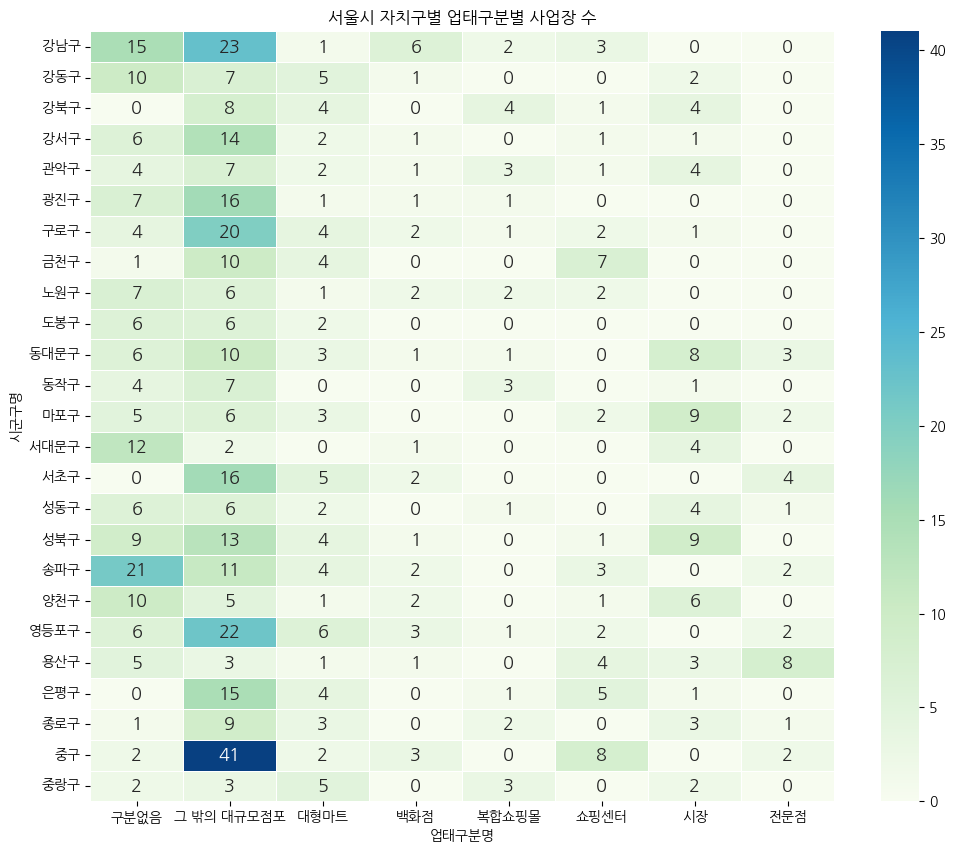

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(seoul_gu_big_store_count.iloc[:, :-1], annot=True, annot_kws={'size':13}, cmap='GnBu', linewidth=0.7)
plt.title('서울시 자치구별 업태구분별 사업장 수')

In [ ]:
seoul_gu_big_store_count.corr()[['커피지수']].sort_values('커피지수', ascending=False)

업태구분명           커피지수
업태구분명               
커피지수        1.000000
전문점         0.584810
백화점         0.547898
그 밖의 대규모점포  0.438969
쇼핑센터        0.289159
구분없음        0.095714
대형마트       -0.070414
복합쇼핑몰      -0.186247
시장         -0.223301

In [ ]:
ylabels = seoul_gu_big_store_count.corr()[['커피지수']].sort_values('커피지수', ascending=False).index.to_list()

In [ ]:
ylabels

['커피지수', '전문점', '백화점', '그 밖의 대규모점포', '쇼핑센터', '구분없음', '대형마트', '복합쇼핑몰', '시장']

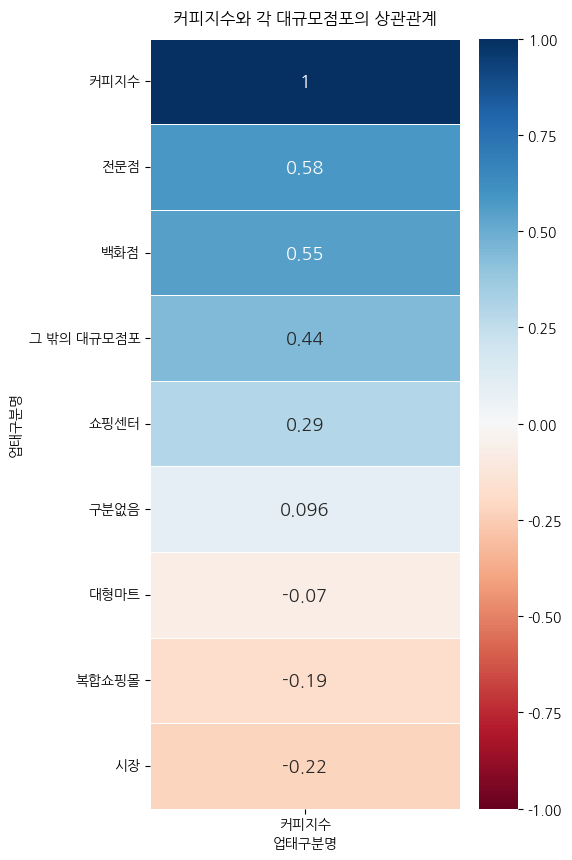

In [ ]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(seoul_gu_big_store_count.corr()[['커피지수']].sort_values('커피지수', ascending=False), 
            vmin = -1, vmax = 1, annot=True, annot_kws={'size':13}, cmap='RdBu', linewidth=0.7)
ax.set_title('커피지수와 각 대규모점포의 상관관계', pad = 12)
ax.set_yticklabels(ylabels, rotation=0)
plt.show()

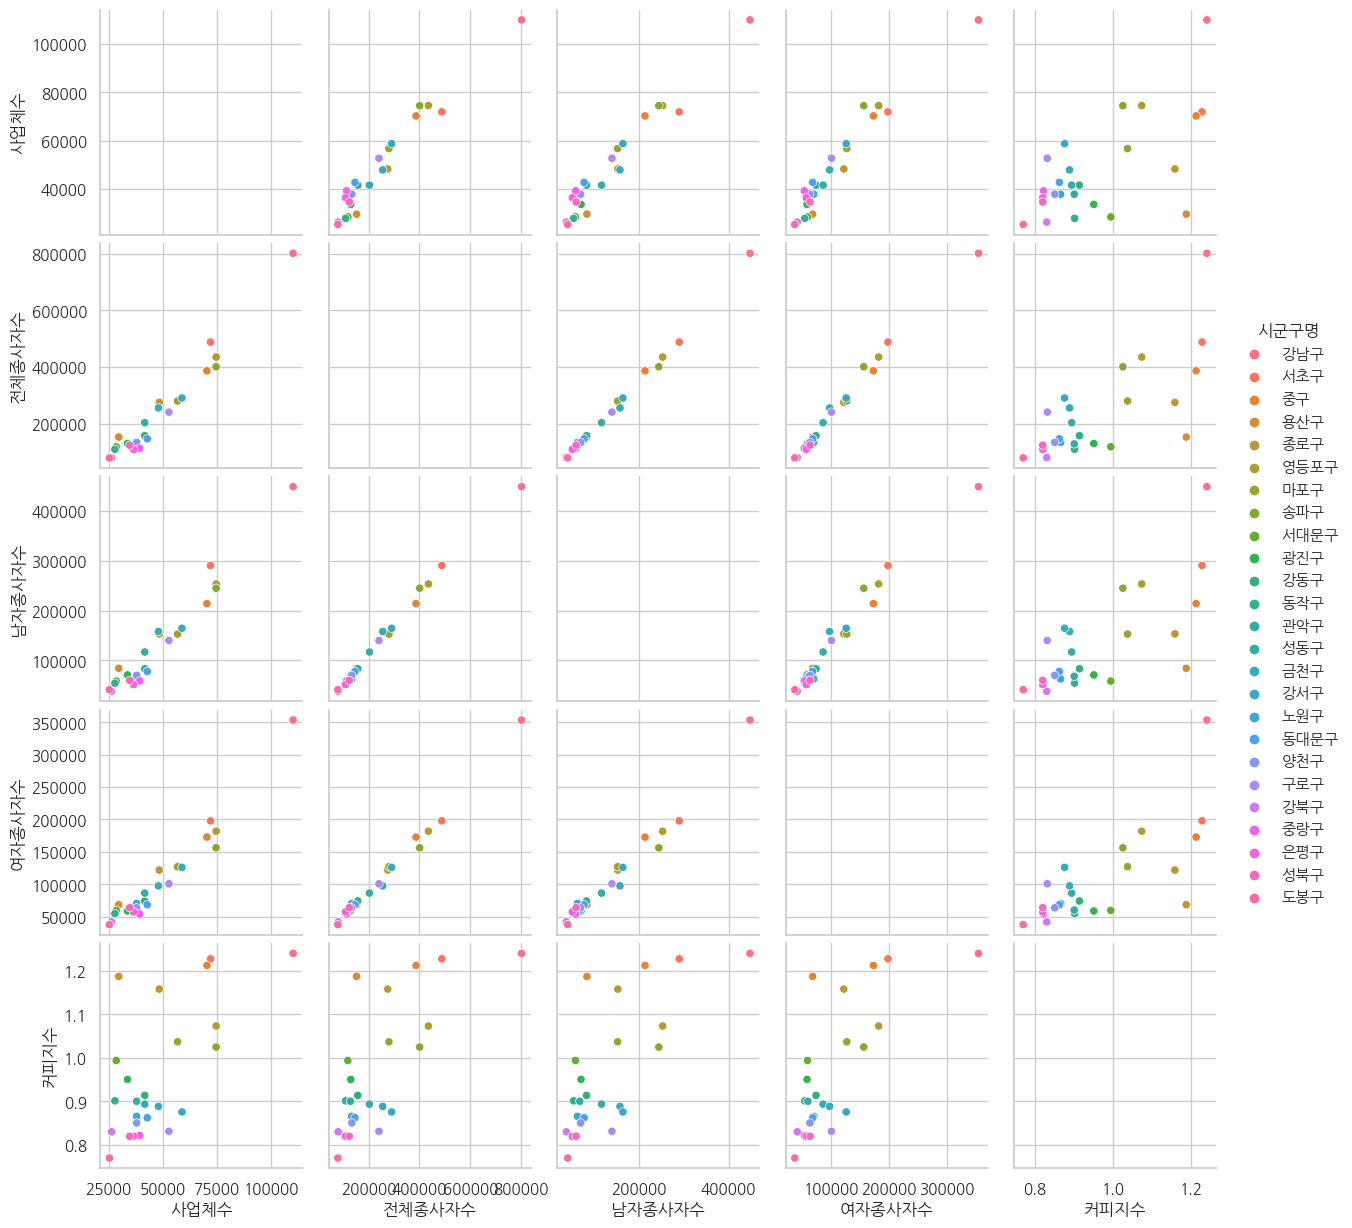

In [ ]:
# 산점도
sns.pairplot(data2,hue='시군구명')
plt.show()

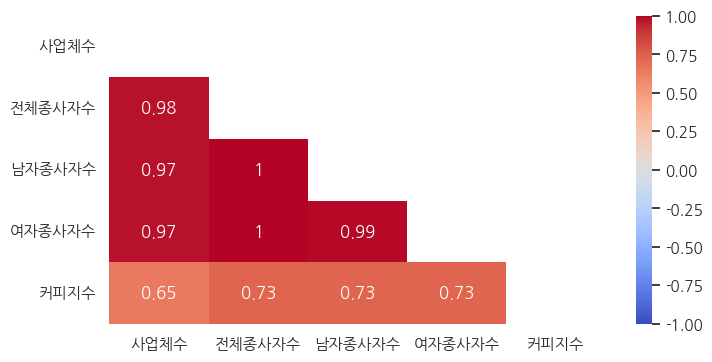

In [ ]:
plt.figure(figsize=(8,4))
mask = np.triu(np.ones_like(data2.corr()))
sns.heatmap(data2.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation= 0);

## 대규모점포 수

### 그래프로 시각화

In [ ]:
store = pd.read_csv("./MID/Final_data/서울시 대규모점포.csv")
store

사업장명    시도명  시군구명       업태구분명
0                동화상가  서울특별시    중구  그 밖의 대규모점포
1        롯데쇼핑㈜롯데슈퍼길동점  서울특별시   강동구        구분없음
2            상계역전종합상가  서울특별시   노원구        쇼핑센터
3        이랜드리테일 NC구로점  서울특별시   구로구         백화점
4          롯데백화점 영등포점  서울특별시  영등포구         백화점
..                ...    ...   ...         ...
685      롯데마켓999 하월곡점  서울특별시   성북구        구분없음
686        롯데마이슈퍼 장위점  서울특별시   성북구        구분없음
687        롯데마이슈퍼 정릉점  서울특별시   성북구        구분없음
688  롯데쇼핑(주) 롯데슈퍼 역촌점  서울특별시   은평구  그 밖의 대규모점포
689     롯데백화점 건대스타시티점  서울특별시   광진구         백화점

[690 rows x 4 columns]

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사업장명    690 non-null    object
 1   시도명     690 non-null    object
 2   시군구명    690 non-null    object
 3   업태구분명   689 non-null    object
dtypes: object(4)
memory usage: 21.7+ KB


In [ ]:
# 비율 옵션 사용: normalize='columns'
# 해석) 강남구를 보면 다른 구들에 비해 백화점의 비율이 높은 편, 강동구는 대형마트의 비중이 높은 편 
pd.crosstab(store['시군구명'],store['업태구분명'],normalize='columns').style.background_gradient(cmap='BrBG_r')

In [ ]:
data3 = pd.merge(pd.crosstab(store['시군구명'],store['업태구분명']),df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')
data3 = data3.sort_values(by='커피지수', ascending= False)
data3.style.background_gradient(cmap='YlOrRd')

In [ ]:
data4 = pd.merge(pd.crosstab(store['시군구명'],store['업태구분명'],normalize='columns'),df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')
data4 = data4.sort_values(by='커피지수', ascending= False)
data4.style.background_gradient(cmap='YlGnBu')

###  커피지수는 대규모점포 수와 상관관계가 있을까?

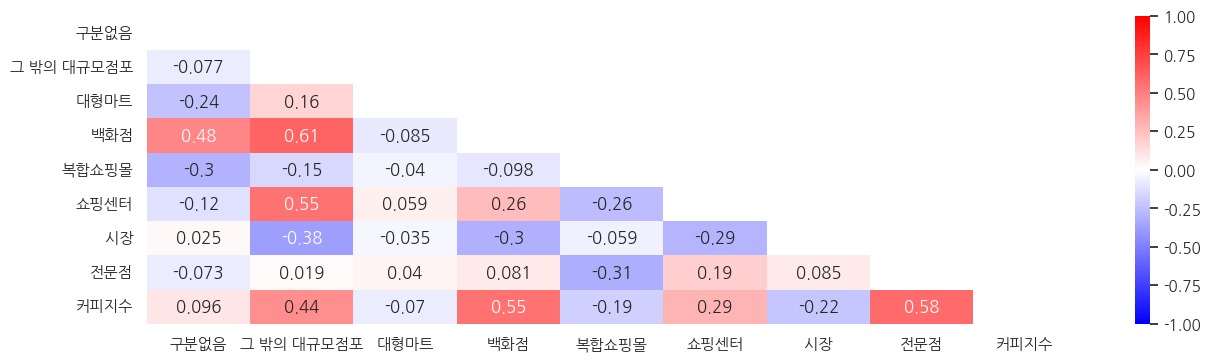

In [ ]:
plt.figure(figsize=(15,4))
mask = np.triu(np.ones_like(data3.corr()))
sns.heatmap(data3.corr(), annot=True, mask=mask, cmap='bwr', vmin=-1, vmax=1)
plt.xticks(rotation= 0);

<AxesSubplot:xlabel='전문점', ylabel='커피지수'>

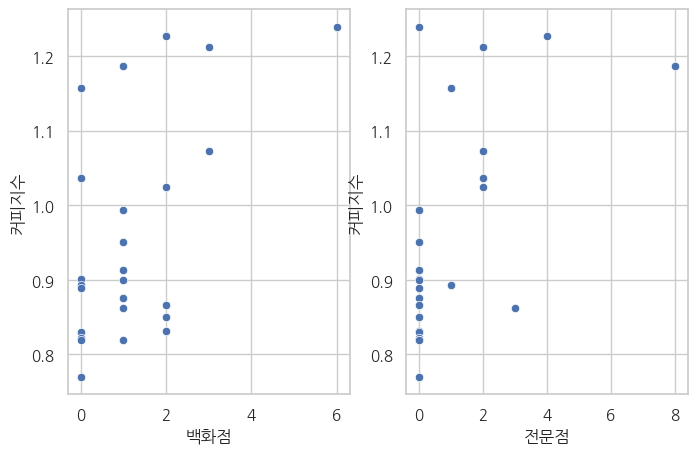

In [ ]:
# 산점도
plt.figure(figsize=(8,5))
plt.subplot(121)
sns.scatterplot(x = '백화점' , y = '커피지수', data = data3)
plt.subplot(122)
sns.scatterplot(x = '전문점' , y = '커피지수', data = data3)


## 재정자립도

In [ ]:
money = pd.read_csv("./MID/Final_data/seoul_tax.csv")
money = money[1:]

In [ ]:
data4 = pd.merge(money,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')

In [ ]:
data4

시도명  시군구명  재정자립도(세입과목개편전)  재정자립도(세입과목개편후)    커피지수
0   서울특별시   강남구        69.40000        58.90000 1.23938
1   서울특별시    중구        65.60000        55.30000 1.21187
2   서울특별시   서초구        63.50000        57.80000 1.22693
3   서울특별시   종로구        51.20000        47.50000 1.15762
4   서울특별시   용산구        47.70000        41.90000 1.18668
5   서울특별시   송파구        46.90000        40.00000 1.02469
6   서울특별시  영등포구        42.90000        37.30000 1.07286
7   서울특별시   성동구        40.60000        34.20000 0.89374
8   서울특별시   마포구        38.30000        32.60000 1.03666
9   서울특별시   광진구        34.00000        25.00000 0.95044
10  서울특별시  서대문구        31.70000        25.10000 0.99389
11  서울특별시   동작구        31.50000        28.10000 0.90128
12  서울특별시   강동구        30.40000        25.40000 0.91376
13  서울특별시   금천구        29.80000        25.10000 0.88853
14  서울특별시   양천구        29.60000        25.40000 0.85059
15  서울특별시  동대문구        27.80000        23.70000 0.86250
16  서울특별시   성북구        27.30000        19.90000 0.81994
17  서울특별시   구로구        26.80000        21.90000 0.83146
18  서울특별시   강서구        26.40000        20.80000 0.87580
19  서울특별시   도봉구        24.80000        19.40000 0.77011
20  서울특별시   관악구        23.80000        19.60000 0.90032
21  서울특별시   강북구        23.70000        17.10000 0.83027
22  서울특별시   은평구        23.50000        18.00000 0.82001
23  서울특별시   중랑구        22.50000        18.20000 0.82201
24  서울특별시   노원구        22.00000        16.70000 0.86568

In [ ]:
data4 = data4.sort_values(by='커피지수',ascending=False)

In [ ]:
data4

시도명  시군구명  재정자립도(세입과목개편전)  재정자립도(세입과목개편후)    커피지수
0   서울특별시   강남구        69.40000        58.90000 1.23938
2   서울특별시   서초구        63.50000        57.80000 1.22693
1   서울특별시    중구        65.60000        55.30000 1.21187
4   서울특별시   용산구        47.70000        41.90000 1.18668
3   서울특별시   종로구        51.20000        47.50000 1.15762
6   서울특별시  영등포구        42.90000        37.30000 1.07286
8   서울특별시   마포구        38.30000        32.60000 1.03666
5   서울특별시   송파구        46.90000        40.00000 1.02469
10  서울특별시  서대문구        31.70000        25.10000 0.99389
9   서울특별시   광진구        34.00000        25.00000 0.95044
12  서울특별시   강동구        30.40000        25.40000 0.91376
11  서울특별시   동작구        31.50000        28.10000 0.90128
20  서울특별시   관악구        23.80000        19.60000 0.90032
7   서울특별시   성동구        40.60000        34.20000 0.89374
13  서울특별시   금천구        29.80000        25.10000 0.88853
18  서울특별시   강서구        26.40000        20.80000 0.87580
24  서울특별시   노원구        22.00000        16.70000 0.86568
15  서울특별시  동대문구        27.80000        23.70000 0.86250
14  서울특별시   양천구        29.60000        25.40000 0.85059
17  서울특별시   구로구        26.80000        21.90000 0.83146
21  서울특별시   강북구        23.70000        17.10000 0.83027
23  서울특별시   중랑구        22.50000        18.20000 0.82201
22  서울특별시   은평구        23.50000        18.00000 0.82001
16  서울특별시   성북구        27.30000        19.90000 0.81994
19  서울특별시   도봉구        24.80000        19.40000 0.77011

In [ ]:
label = data4['시군구명'].unique()
label = sorted(label)
index = np.arange(len(label))

In [ ]:
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

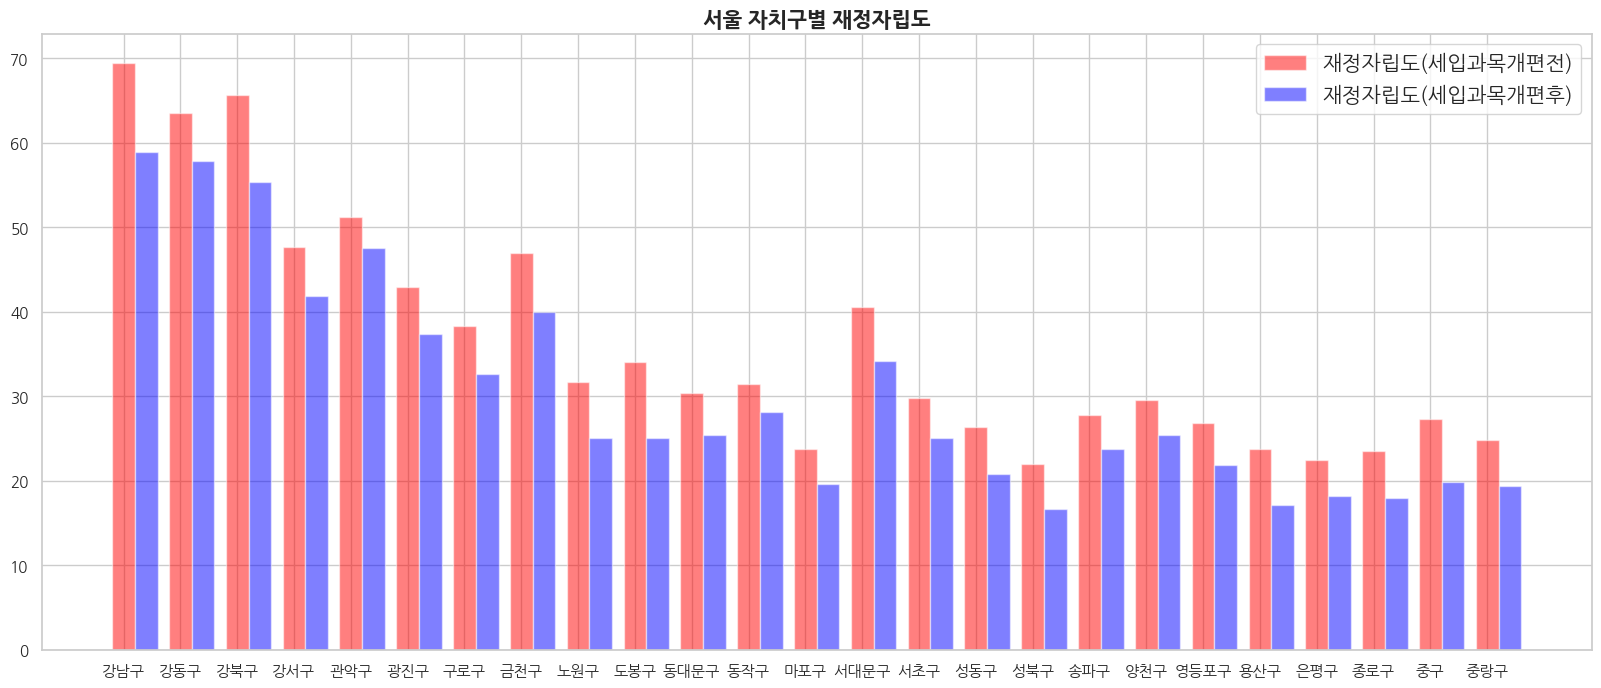

In [ ]:
plt.figure(figsize=(20,8))
p1 = plt.bar(index,data4['재정자립도(세입과목개편전)'], color='red', alpha=0.5,
             width=0.4)
p2 = plt.bar(index+0.4,data4['재정자립도(세입과목개편후)'], color='blue', alpha=0.5,
             width=0.4)
plt.xticks(index,label)
plt.legend((p1[0], p2[0]), ('재정자립도(세입과목개편전)', '재정자립도(세입과목개편후)'), fontsize=15)
plt.title('서울 자치구별 재정자립도' , size = 15 , fontweight = 'bold');

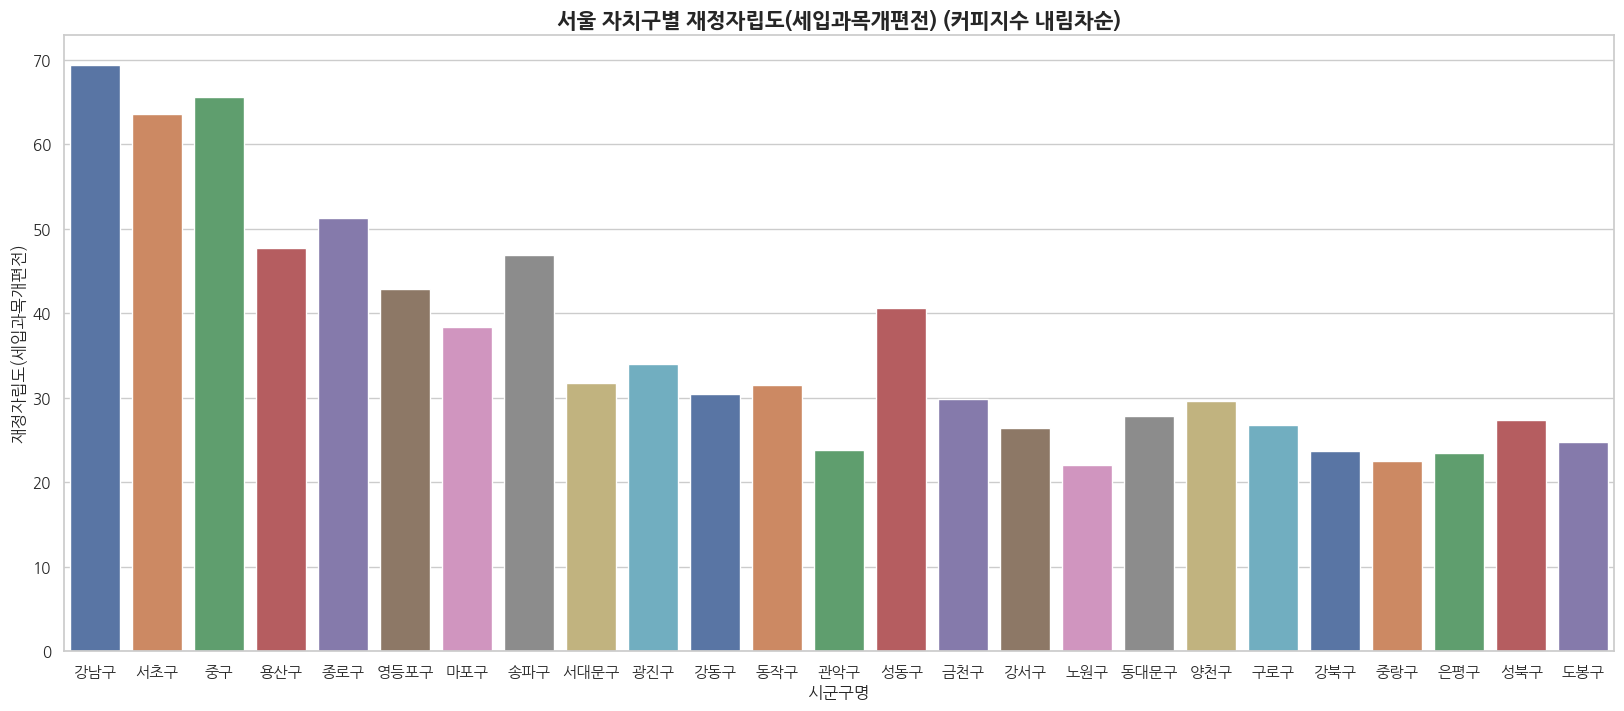

In [ ]:
#  시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data4 = data4.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data4, x="시군구명" , y ='재정자립도(세입과목개편전)', palette='deep')
plt.title('서울 자치구별 재정자립도(세입과목개편전) (커피지수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

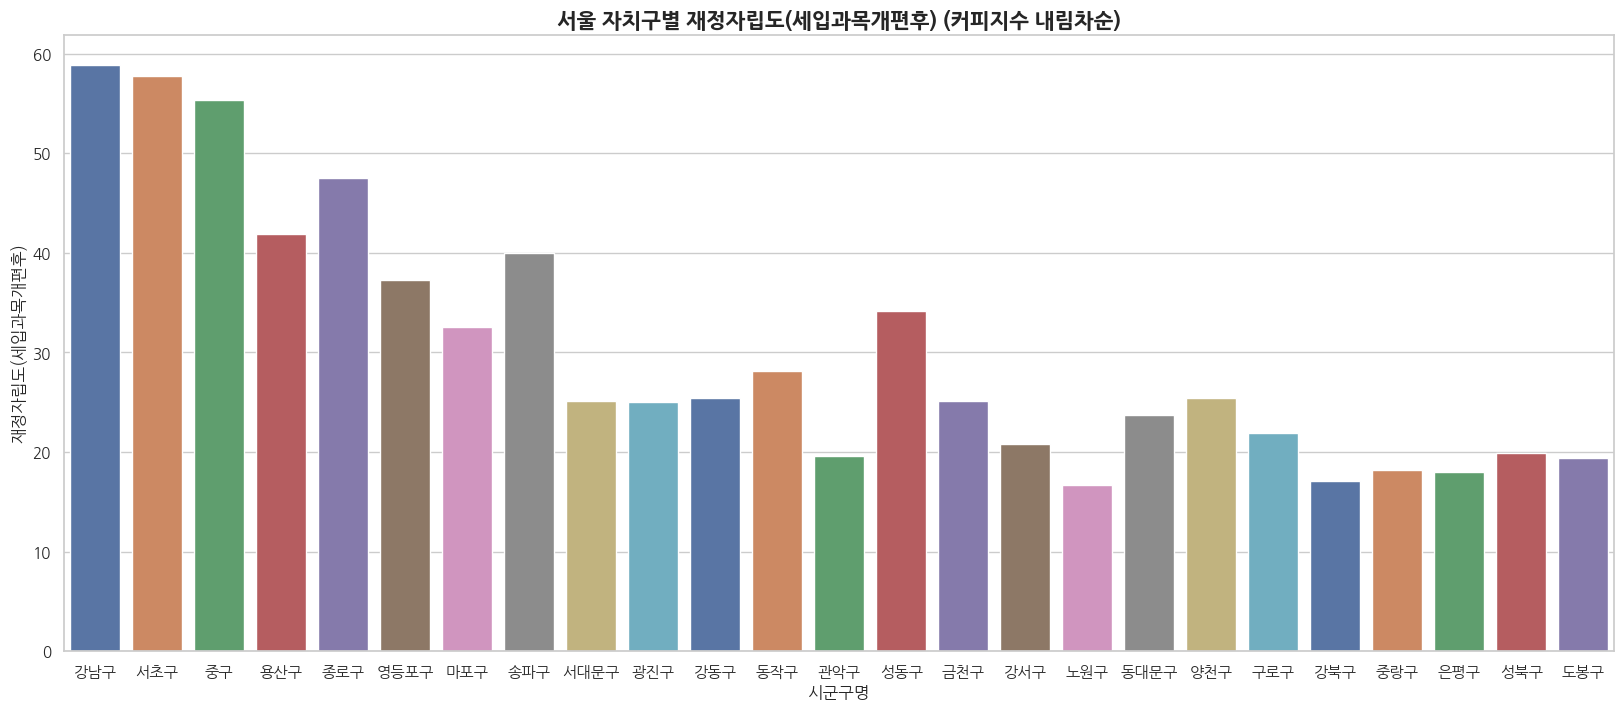

In [ ]:
#  시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data4 = data4.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data4, x="시군구명" , y ='재정자립도(세입과목개편후)', palette='deep')
plt.title('서울 자치구별 재정자립도(세입과목개편후) (커피지수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=data4,
             columns=['시군구명', '재정자립도(세입과목개편후)'],
             fill_color='Greens',  
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 재정자립도"
            )

m

### 커피지수는 재정자립도와 상관관계가 있을까?

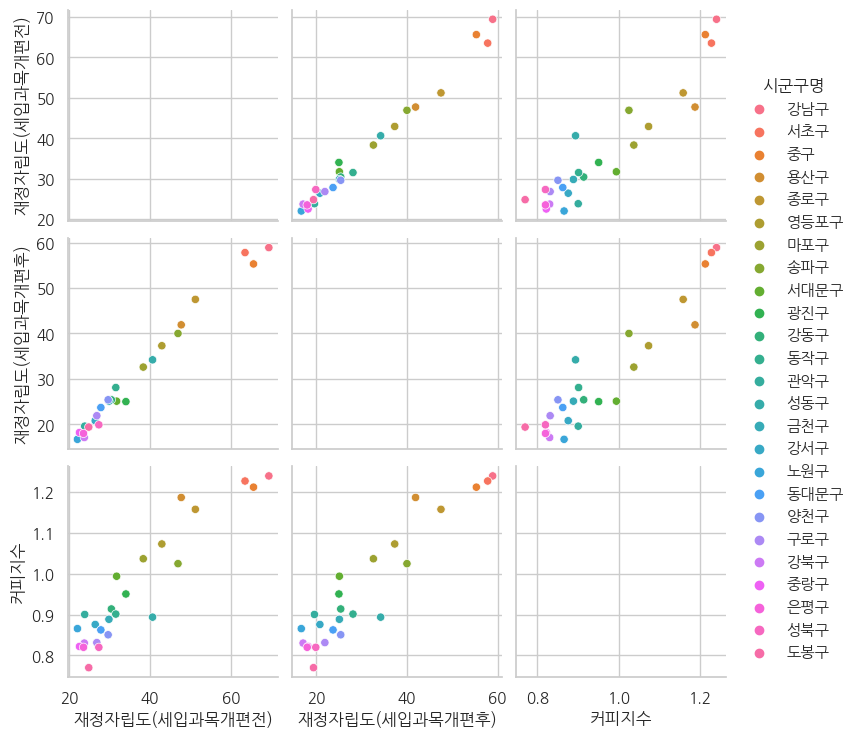

In [ ]:
# 산점도
sns.pairplot(data4,hue='시군구명')
plt.show()

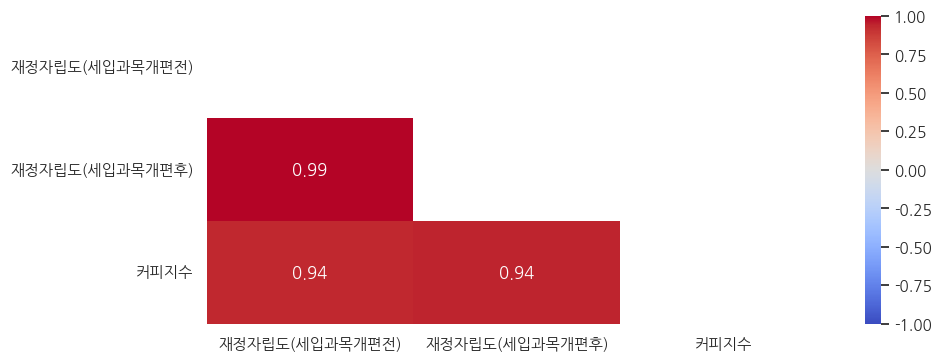

In [ ]:
plt.figure(figsize=(10,4))
mask = np.triu(np.ones_like(data4.corr()))
sns.heatmap(data4.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation= 0);

### 커피지수가 재정자립도를 얼마나 설명하는 지 확인하기 위해 회귀분석 실시

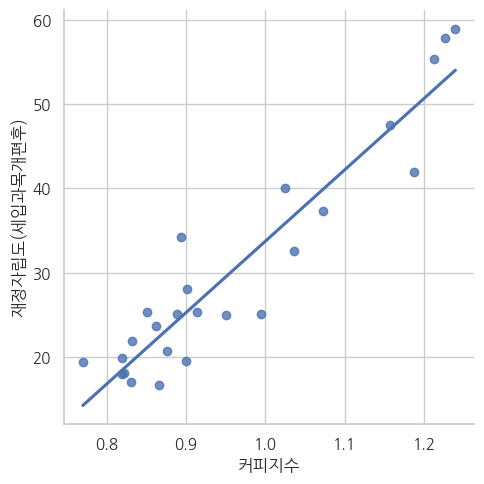

In [ ]:
sns.lmplot(x = '커피지수' ,y = '재정자립도(세입과목개편후)', data =data4 ,ci= None )

In [ ]:
from statsmodels.formula.api import ols
y = data4['재정자립도(세입과목개편후)']
x = data4['커피지수']

ols('y ~ x' , data = data4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     175.8
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.94e-12
Time:                        18:38:32   Log-Likelihood:                -72.355
No. Observations:                  25   AIC:                             148.7
Df Residuals:                      23   BIC:                             151.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.7996      6.176     -8.225      0.000     -63.577     -38.023
x             84.5571      6.377     13.259      0.000      71.364      97.750
==============================================================================
Omnibus:                        0.288   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.467
Skew:                          -0.067   Prob(JB):                        0.792
Kurtosis:                       2.344   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coffee_result = ols('y ~ x' , data = data4).fit()

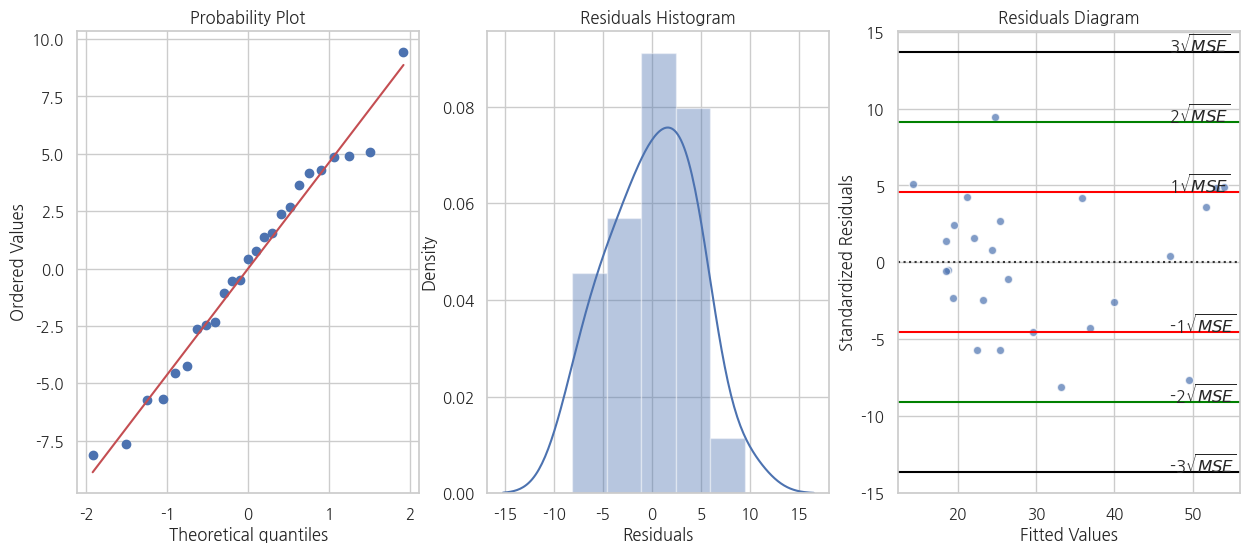

In [ ]:
# 오차의 정규성

import scipy as sp

figure, axs = plt.subplots(1,3, figsize = (15,6))

# 잔차 Q-Q  plot
# sm.ProbPlot(fit1.resid).qqplot(line="s",ax=axs[0])
sp.stats.probplot(coffee_result.resid, dist='norm', fit=True, plot=axs[0])

# 잔차의 히스토그램
sns.distplot(x = coffee_result.resid , ax = axs[1])
axs[1].set_xlabel("Residuals")
axs[1].set_title("Residuals Histogram")

# 잔차도
yhat = coffee_result.fittedvalues
temp = pd.concat( [ yhat, y ], axis = 1)
temp.columns = [ "yhat", "MEDV" ]

sns.residplot(x = "yhat", y = "MEDV", 
              data = temp, 
              scatter_kws = {'edgecolor':"white", "alpha":0.7},
              line_kws = {"color":"red"},
              ax = axs[2])

MSE_sq = np.sqrt(coffee_result.mse_resid)

# 잔차도 MSE line
for i, c in enumerate(["red", "green", "black"]):
    axs[2].axhline( (i+1) * MSE_sq, color = c)
    axs[2].axhline( -(i+1) * MSE_sq, color = c)
    
    axs[2].text(47, (i+1) * MSE_sq, f"{i+1}"r'${}\sqrt{MSE}$')
    axs[2].text(47, -(i+1) * MSE_sq, f"-{i+1}"r'${}\sqrt{MSE}$')

axs[2].set_xlabel("Fitted Values")
axs[2].set_ylabel("Standardized Residuals")
axs[2].set_title("Residuals Diagram")


plt.show()

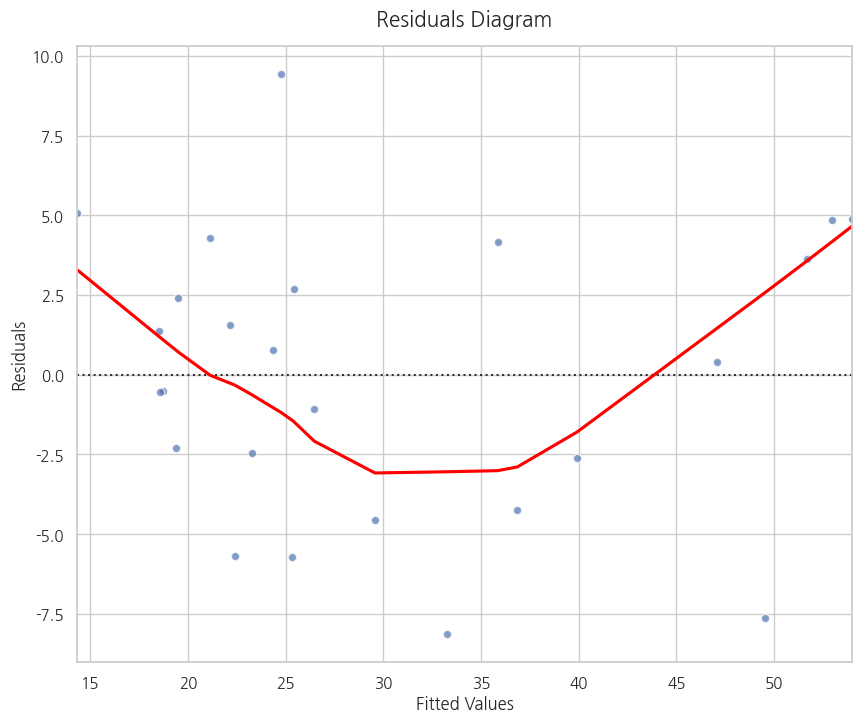

In [ ]:
fig = plt.figure(figsize= (10,8))

p = sns.residplot(x = "yhat", y = "MEDV", 
                  data = temp, 
                  scatter_kws = {'edgecolor':"white", "alpha":0.7},
                  lowess = True,
                  line_kws = {"color":"red"})

p.set_title("Residuals Diagram", fontsize=15, y=1.02)
p.set(xlabel= "Fitted Values", ylabel = "Residuals")

plt.show()

## 공시지가

### 시각화

In [ ]:
land = pd.read_csv("./MID/Final_data/공시지가.csv",encoding='cp949')
land = land[['시군구명','공시지가(원/㎡)']]
land.head()

시군구명  공시지가(원/㎡)
0  성북구    4837000
1  성북구    5544000
2  성북구    3605000
3  성북구    3136000
4  성북구    3245000

In [ ]:
df_land = land.groupby('시군구명').mean()

In [ ]:
data5 = pd.merge(df_land,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')

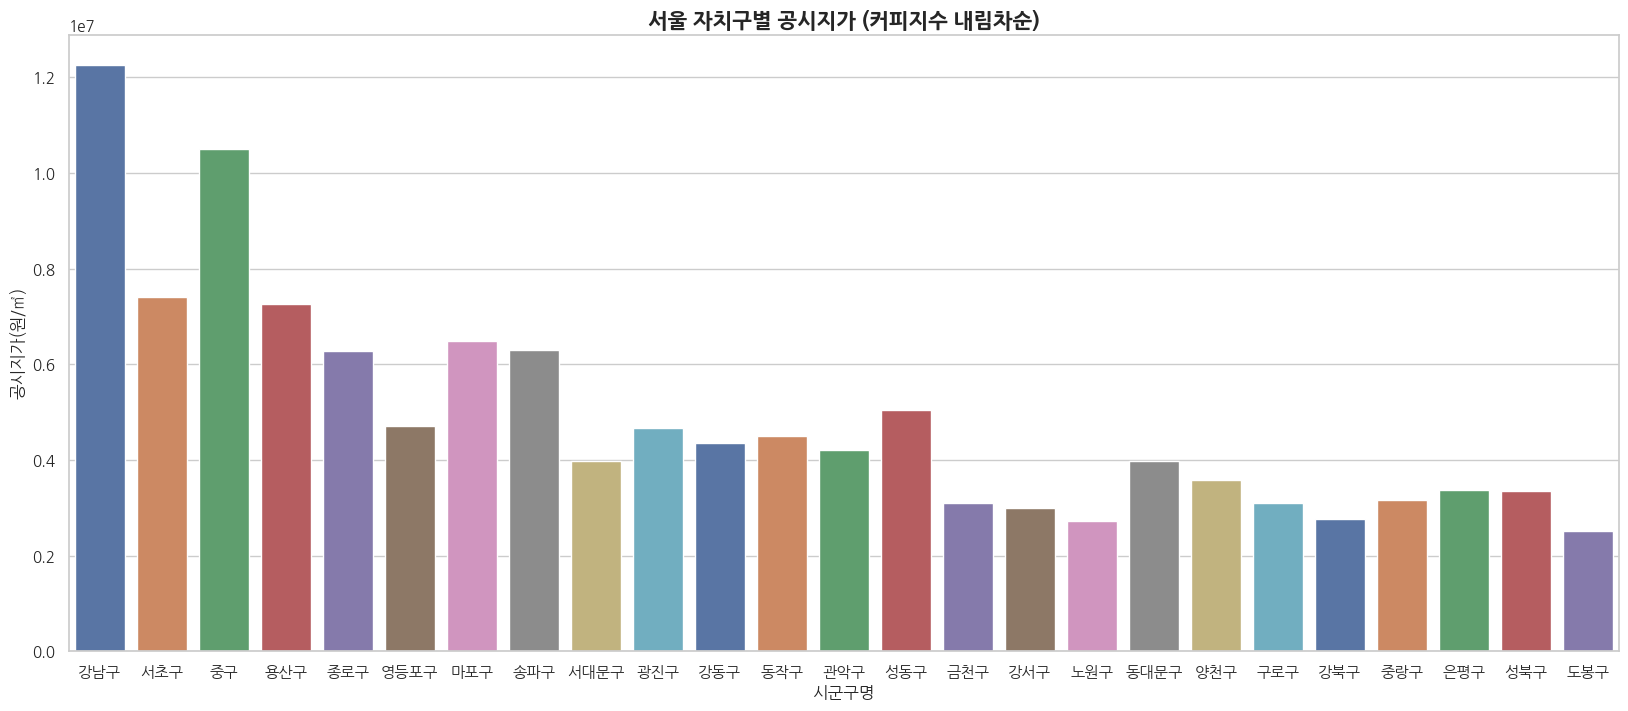

In [ ]:
#  시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data5 = data5.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data5, x="시군구명" , y ='공시지가(원/㎡)', palette='deep')
plt.title('서울 자치구별 공시지가 (커피지수 내림차순)' , size = 15 , fontweight = 'bold')
plt.show;

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geo,
             data=data5,
             columns=['시군구명', '공시지가(원/㎡)'],
             fill_color='RdPu',  
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 평균 공시지가"
            )

m

### 커피지수와의 상관관계는?

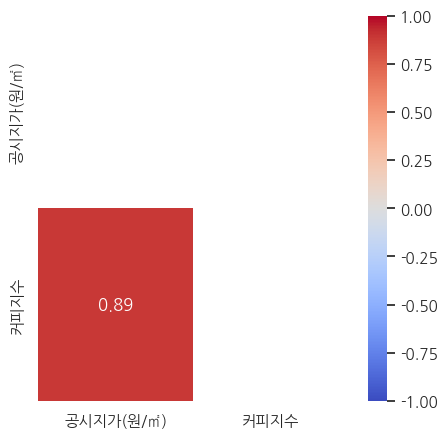

In [ ]:
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(data5.corr()))
sns.heatmap(data5.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation= 0);

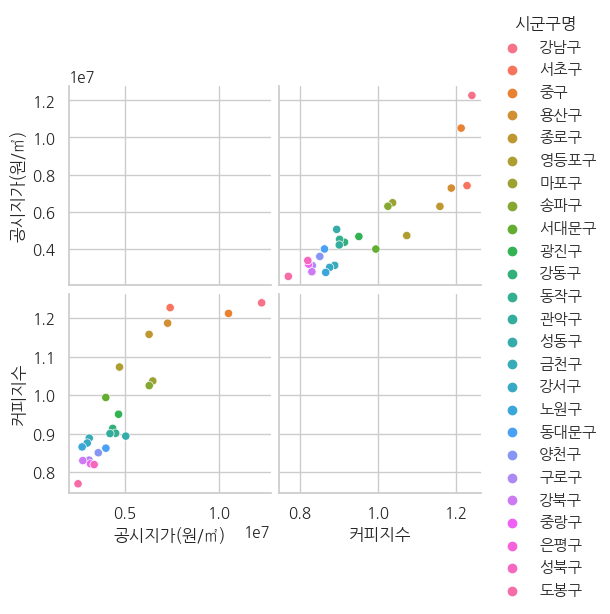

In [ ]:
# 산점도
sns.pairplot(data5,hue='시군구명')
plt.show()

### 커피지수가 공시지가를 얼마나 설명하는 지 확인하기 위해 회귀분석 실시

In [ ]:
from statsmodels.formula.api import ols
y = data5['공시지가(원/㎡)']
x = data5['커피지수']

ols('y ~ x' , data = data5).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     86.48
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.96e-09
Time:                        18:40:22   Log-Likelihood:                -383.01
No. Observations:                  25   AIC:                             770.0
Df Residuals:                      23   BIC:                             772.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.253e+06   1.54e+06     -6.011      0.000   -1.24e+07   -6.07e+06
x           1.478e+07   1.59e+06      9.299      0.000    1.15e+07    1.81e+07
==============================================================================
Omnibus:                        5.371   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                3.443
Skew:                           0.671   Prob(JB):                        0.179
Kurtosis:                       4.226   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coffee_result = ols('y ~ x' , data = data5).fit()

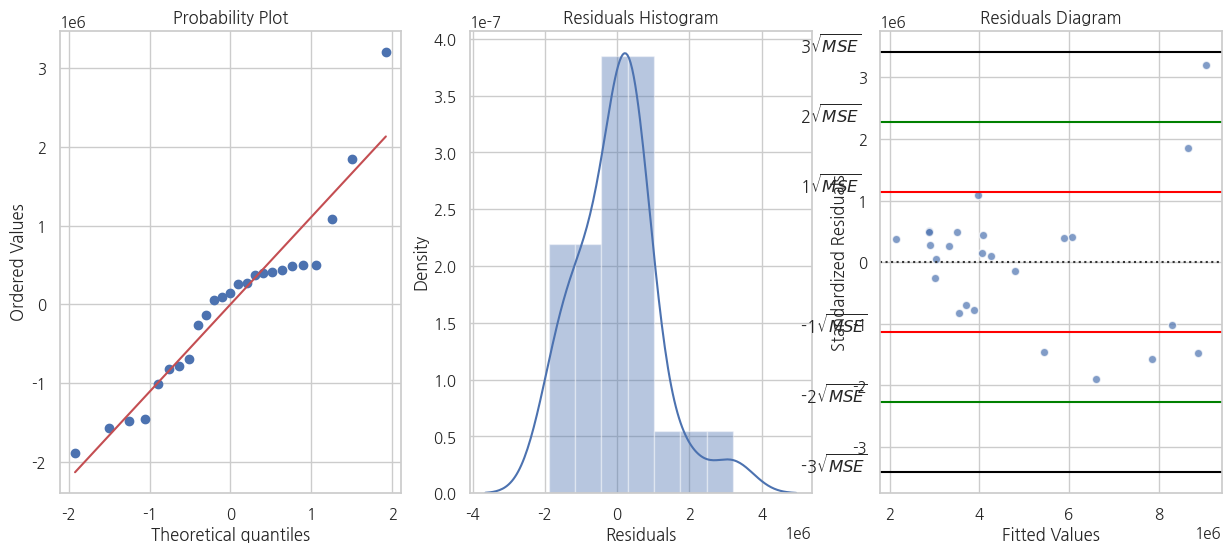

In [ ]:
# 오차의 정규성

import scipy as sp

figure, axs = plt.subplots(1,3, figsize = (15,6))

# 잔차 Q-Q  plot
# sm.ProbPlot(fit1.resid).qqplot(line="s",ax=axs[0])
sp.stats.probplot(coffee_result.resid, dist='norm', fit=True, plot=axs[0])

# 잔차의 히스토그램
sns.distplot(x = coffee_result.resid , ax = axs[1])
axs[1].set_xlabel("Residuals")
axs[1].set_title("Residuals Histogram")

# 잔차도
yhat = coffee_result.fittedvalues
temp = pd.concat( [ yhat, y ], axis = 1)
temp.columns = [ "yhat", "MEDV" ]

sns.residplot(x = "yhat", y = "MEDV", 
              data = temp, 
              scatter_kws = {'edgecolor':"white", "alpha":0.7},
              line_kws = {"color":"red"},
              ax = axs[2])

MSE_sq = np.sqrt(coffee_result.mse_resid)

# 잔차도 MSE line
for i, c in enumerate(["red", "green", "black"]):
    axs[2].axhline( (i+1) * MSE_sq, color = c)
    axs[2].axhline( -(i+1) * MSE_sq, color = c)
    
    axs[2].text(47, (i+1) * MSE_sq, f"{i+1}"r'${}\sqrt{MSE}$')
    axs[2].text(47, -(i+1) * MSE_sq, f"-{i+1}"r'${}\sqrt{MSE}$')

axs[2].set_xlabel("Fitted Values")
axs[2].set_ylabel("Standardized Residuals")
axs[2].set_title("Residuals Diagram")


plt.show()

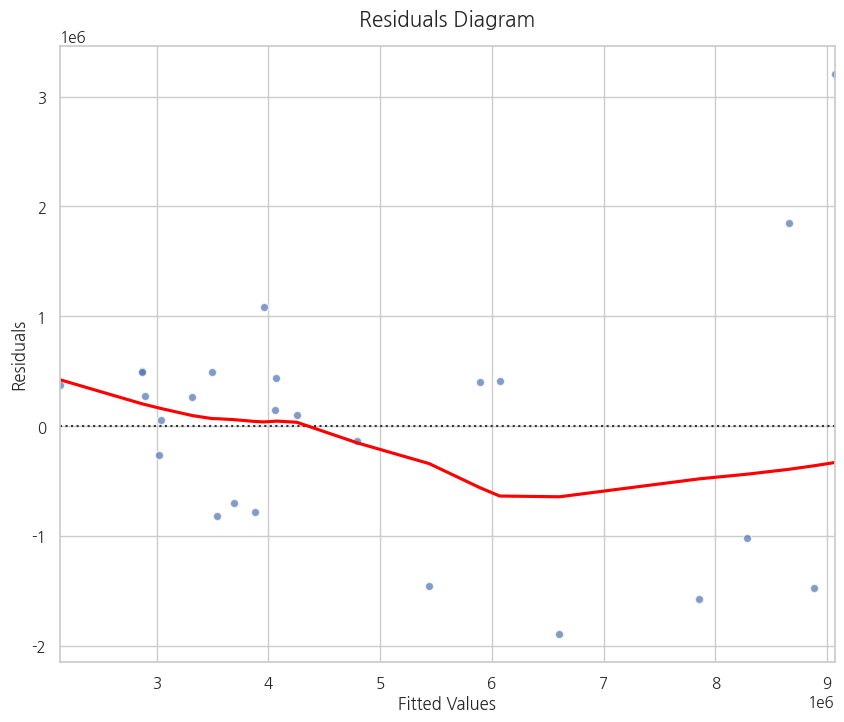

In [ ]:
fig = plt.figure(figsize= (10,8))

p = sns.residplot(x = "yhat", y = "MEDV", 
                  data = temp, 
                  scatter_kws = {'edgecolor':"white", "alpha":0.7},
                  lowess = True,
                  line_kws = {"color":"red"})

p.set_title("Residuals Diagram", fontsize=15, y=1.02)
p.set(xlabel= "Fitted Values", ylabel = "Residuals")

plt.show()

## 총부가가치

In [ ]:
buga = pd.read_excel("./MID/seoul_VA_5years.xlsx")

In [ ]:
buga = buga[['자치구(1)','2020']][2:]
buga.columns = ['시군구명','지역내 총부가가치']
buga['지역내 총부가가치']= buga['지역내 총부가가치'].astype('int')

In [ ]:
buga

시군구명  지역내 총부가가치
2    종로구   30006285
3     중구   49217070
4    용산구   11729287
5    성동구   11272209
6    광진구    5959124
7   동대문구    6767289
8    중랑구    4367195
9    성북구    5772190
10   강북구    3074364
11   도봉구    3231378
12   노원구    5977652
13   은평구    4681499
14  서대문구    7857484
15   마포구   18770337
16   양천구    6485414
17   강서구   15550220
18   구로구   12814107
19   금천구   15822501
20  영등포구   34464003
21   동작구    6125708
22   관악구    5714406
23   서초구   33237223
24   강남구   67336899
25   송파구   27853859
26   강동구    8528269

In [ ]:
data6 = pd.merge(buga,df_seoul_gu1[['시군구명','커피지수']] ,on='시군구명')
data6

시군구명  지역내 총부가가치    커피지수
0    종로구   30006285 1.15762
1     중구   49217070 1.21187
2    용산구   11729287 1.18668
3    성동구   11272209 0.89374
4    광진구    5959124 0.95044
5   동대문구    6767289 0.86250
6    중랑구    4367195 0.82201
7    성북구    5772190 0.81994
8    강북구    3074364 0.83027
9    도봉구    3231378 0.77011
10   노원구    5977652 0.86568
11   은평구    4681499 0.82001
12  서대문구    7857484 0.99389
13   마포구   18770337 1.03666
14   양천구    6485414 0.85059
15   강서구   15550220 0.87580
16   구로구   12814107 0.83146
17   금천구   15822501 0.88853
18  영등포구   34464003 1.07286
19   동작구    6125708 0.90128
20   관악구    5714406 0.90032
21   서초구   33237223 1.22693
22   강남구   67336899 1.23938
23   송파구   27853859 1.02469
24   강동구    8528269 0.91376

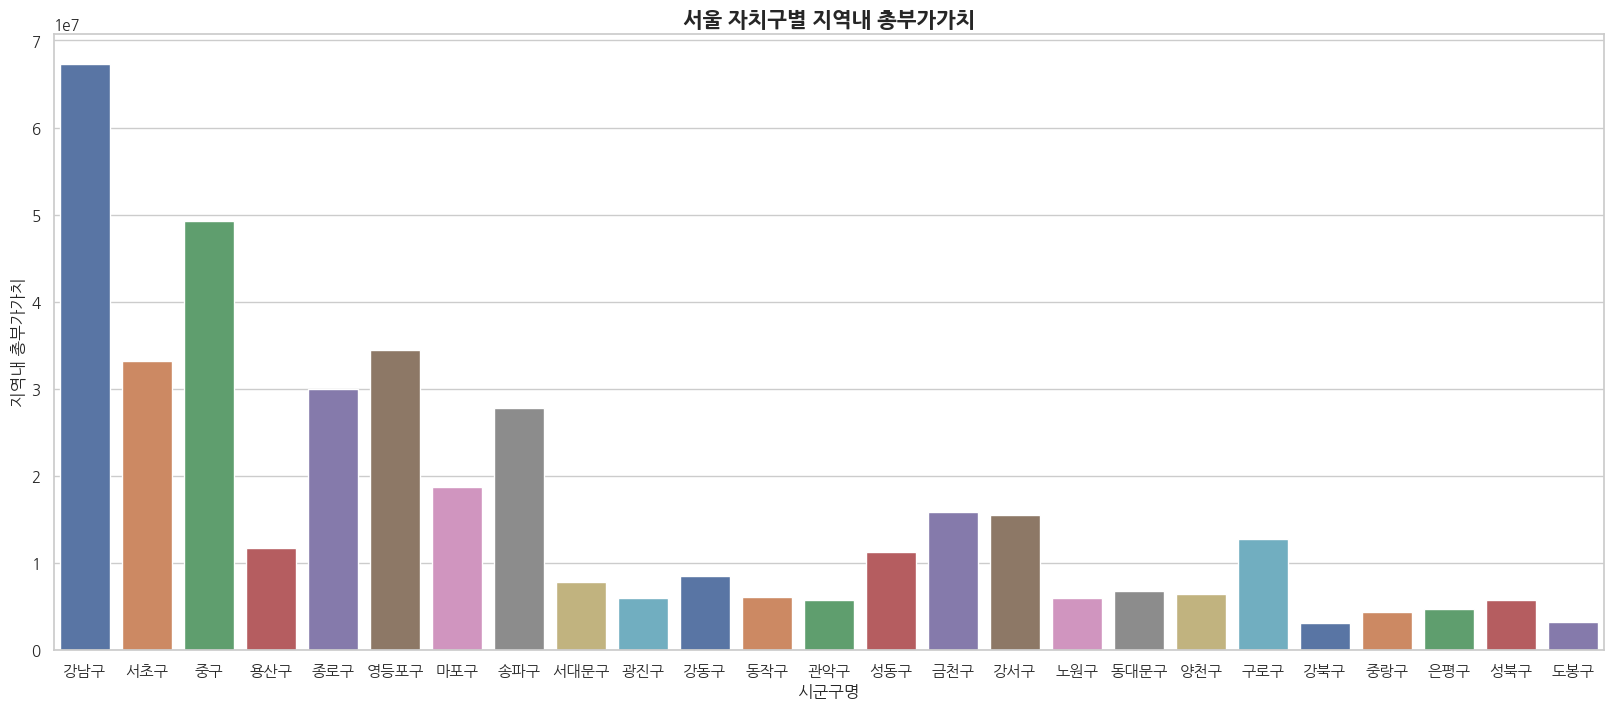

In [ ]:
#  시각화
plt.figure(figsize=(20,8))

plt.rc('font', family='Nanumgothic')

data6 = data6.sort_values(by='커피지수', ascending = False)
sns.barplot(data=data6, x="시군구명" , y ='지역내 총부가가치', palette='deep')
plt.title('서울 자치구별 지역내 총부가가치' , size = 15 , fontweight = 'bold')
plt.show;

### 상관분석

<Figure size 500x500 with 0 Axes>

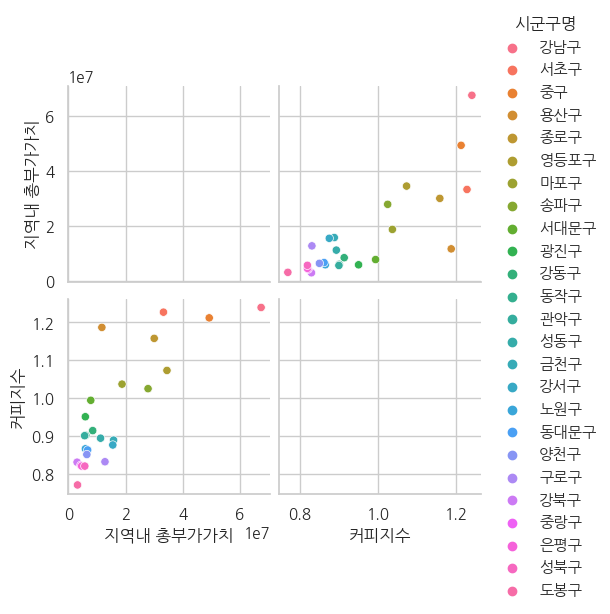

In [ ]:
# 산점도
plt.figure(figsize=(5,5))
sns.pairplot(data6,hue='시군구명')
plt.show()

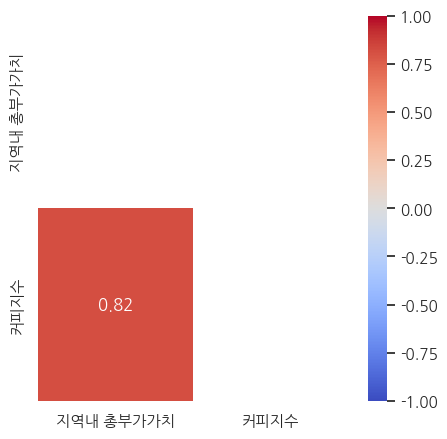

In [ ]:
plt.figure(figsize=(5,5))
mask = np.triu(np.ones_like(data6.corr()))
sns.heatmap(data6.corr(), annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(rotation= 0);

### 회귀분석

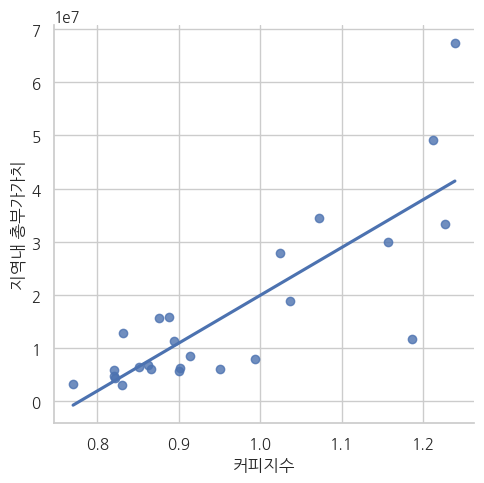

In [ ]:
sns.lmplot(x = '커피지수' ,y = '지역내 총부가가치', data =data6 ,ci= None )

In [ ]:
#e 자연상수로 표시된거 풀기
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
89890000.000

In [ ]:
from statsmodels.formula.api import ols
y = data6['지역내 총부가가치']
x = data6['커피지수']

ols('y ~ x' , data = data6).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     46.43
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           6.00e-07
Time:                        20:31:12   Log-Likelihood:                -435.91
No. Observations:                  25   AIC:                             875.8
Df Residuals:                      23   BIC:                             878.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      -7e+07   1.28e+07     -5.479      0.000   -9.64e+07   -4.36e+07
x           8.989e+07   1.32e+07      6.814      0.000    6.26e+07    1.17e+08
==============================================================================
Omnibus:                        5.634   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                5.744
Skew:                           0.090   Prob(JB):                       0.0566
Kurtosis:                       5.341   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
coffee_result = ols('y ~ x' , data = data6).fit()

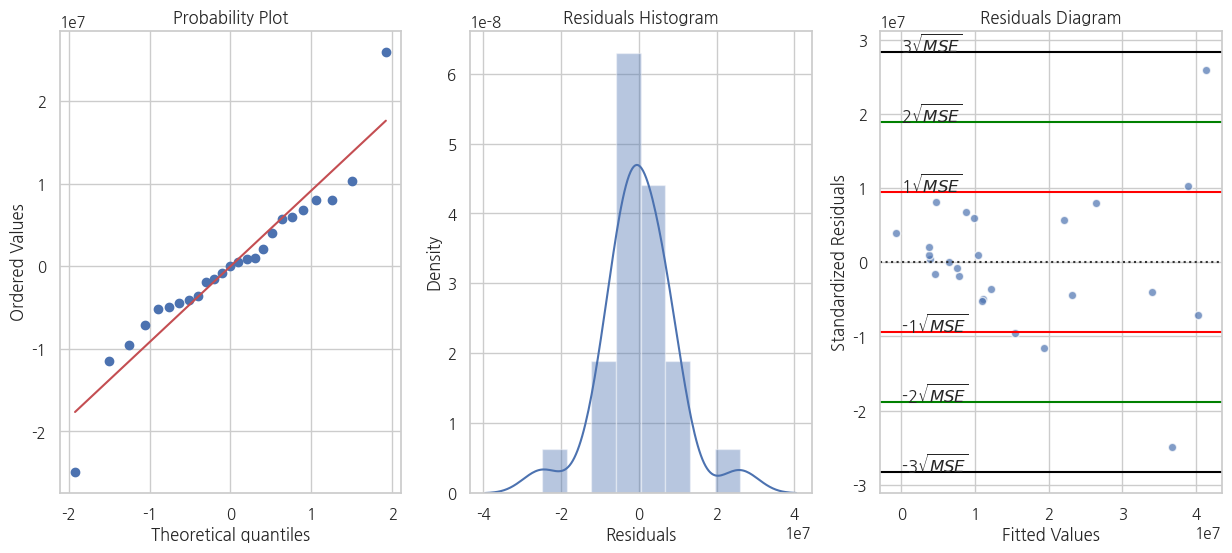

In [ ]:
# 오차의 정규성

import scipy as sp

figure, axs = plt.subplots(1,3, figsize = (15,6))

# 잔차 Q-Q  plot
# sm.ProbPlot(fit1.resid).qqplot(line="s",ax=axs[0])
sp.stats.probplot(coffee_result.resid, dist='norm', fit=True, plot=axs[0])

# 잔차의 히스토그램
sns.distplot(x = coffee_result.resid , ax = axs[1])
axs[1].set_xlabel("Residuals")
axs[1].set_title("Residuals Histogram")

# 잔차도
yhat = coffee_result.fittedvalues
temp = pd.concat( [ yhat, y ], axis = 1)
temp.columns = [ "yhat", "MEDV" ]

sns.residplot(x = "yhat", y = "MEDV", 
              data = temp, 
              scatter_kws = {'edgecolor':"white", "alpha":0.7},
              line_kws = {"color":"red"},
              ax = axs[2])

MSE_sq = np.sqrt(coffee_result.mse_resid)

# 잔차도 MSE line
for i, c in enumerate(["red", "green", "black"]):
    axs[2].axhline( (i+1) * MSE_sq, color = c)
    axs[2].axhline( -(i+1) * MSE_sq, color = c)
    
    axs[2].text(47, (i+1) * MSE_sq, f"{i+1}"r'${}\sqrt{MSE}$')
    axs[2].text(47, -(i+1) * MSE_sq, f"-{i+1}"r'${}\sqrt{MSE}$')

axs[2].set_xlabel("Fitted Values")
axs[2].set_ylabel("Standardized Residuals")
axs[2].set_title("Residuals Diagram")


plt.show()

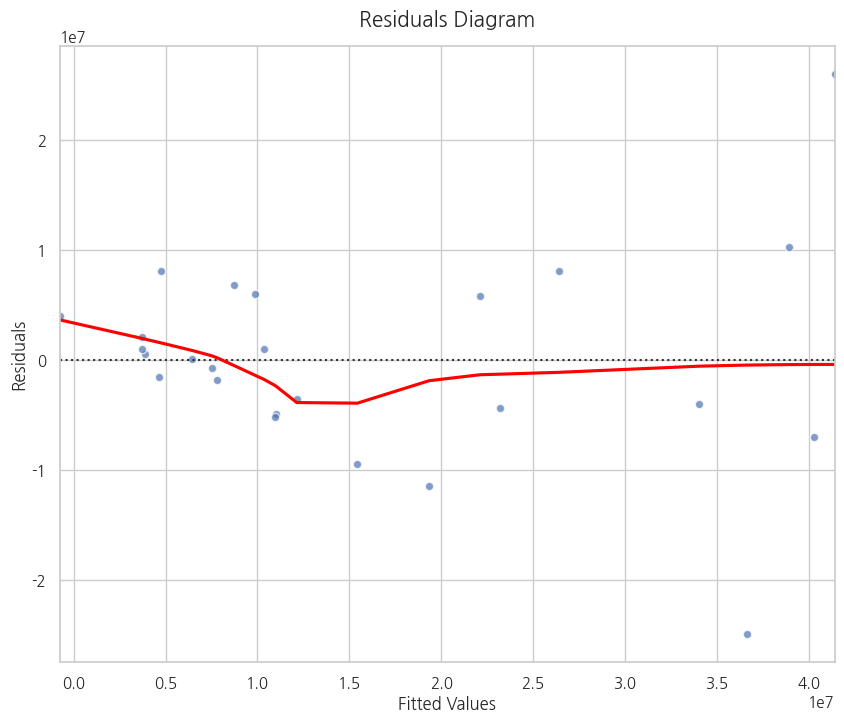

In [ ]:
fig = plt.figure(figsize= (10,8))

p = sns.residplot(x = "yhat", y = "MEDV", 
                  data = temp, 
                  scatter_kws = {'edgecolor':"white", "alpha":0.7},
                  lowess = True,
                  line_kws = {"color":"red"})

p.set_title("Residuals Diagram", fontsize=15, y=1.02)
p.set(xlabel= "Fitted Values", ylabel = "Residuals")

plt.show()

## 경제활동인구

In [ ]:
population = pd.read_csv('시도별_경제활동인구.csv', encoding='cp949')
population

Unnamed: 0  15세이상인구 (천명)  경제활동인구 (천명)  취업자 (천명)  실업자 (천명)  비경제활동인구 (천명)  \
0       서울특별시          8454         5235      5057       178          3219   
1       부산광역시          2935         1737      1677        60          1198   
2       대구광역시          2075         1250      1196        54           824   
3       인천광역시          2600         1675      1597        77           926   
4       광주광역시          1280          773       753        20           507   
5       대전광역시          1290          816       789        27           475   
6       울산광역시           957          585       559        26           372   
7     세종특별자치시           319          204       200         5           114   
8         경기도         11939         7626      7403       222          4314   
9         강원도          1325          798       741        58           527   
10       충청북도          1431          911       875        36           520   
11       충청남도          1918         1190      1151        39           728   
12       전라북도          1556          960       929        30           596   
13       전라남도          1525         1023       980        43           502   
14       경상북도          2322         1438      1386        52           884   
15       경상남도          2848         1763      1680        83          1085   
16        제주도           578          404       391        12           174   

    경제활동참가율 (%)  실업률 (%)  고용률 (%)  15-64세 고용률 (%)  
0          61.9      3.4     59.8            68.3  
1          59.2      3.5     57.1            66.5  
2          60.3      4.3     57.6            66.5  
3          64.4      4.6     61.4            68.6  
4          60.4      2.6     58.8            65.1  
5          63.2      3.3     61.2            67.8  
6          61.2      4.4     58.5            64.6  
7          64.1      2.3     62.6            67.0  
8          63.9      2.9     62.0            69.0  
9          60.3      7.3     55.9            65.6  
10         63.6      4.0     61.1            68.8  
11         62.0      3.3     60.0            67.6  
12         61.7      3.2     59.7            66.0  
13         67.1      4.2     64.2            71.2  
14         61.9      3.6     59.7            66.1  
15         61.9      4.7     59.0            65.8  
16         69.9      3.1     67.7            73.1

In [ ]:
population.loc[:, :'15세이상인구 (천명)']

Unnamed: 0  15세이상인구 (천명)
0       서울특별시          8454
1       부산광역시          2935
2       대구광역시          2075
3       인천광역시          2600
4       광주광역시          1280
5       대전광역시          1290
6       울산광역시           957
7     세종특별자치시           319
8         경기도         11939
9         강원도          1325
10       충청북도          1431
11       충청남도          1918
12       전라북도          1556
13       전라남도          1525
14       경상북도          2322
15       경상남도          2848
16        제주도           578

In [ ]:
df_sido

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

브랜드명       합계      커피지수  
시도명                      
강원도       409  0.969846  
경기도      3274  0.934005  
경상남도      658  0.917522  
경상북도      386  1.107809  
광주광역시     490  0.931391  
대구광역시     457  1.207517  
대전광역시     374  1.103787  
부산광역시     826  0.962215  
서울특별시    3230  1.094663  
세종특별자치시    93  1.061557  
울산광역시     261  1.160516  
인천광역시     826  0.784331  
전라남도      384  0.926109  
전라북도      324  1.048356  
제주특별자치도   193  0.982341  
충청남도      411  0.998515  
충청북도      320  1.040738

In [ ]:
a =  population.sort_values('Unnamed: 0')[['15세이상인구 (천명)', '경제활동인구 (천명)']] * 1000

In [ ]:
a

15세이상인구 (천명)  경제활동인구 (천명)
9        1325000       798000
8       11939000      7626000
15       2848000      1763000
14       2322000      1438000
4        1280000       773000
2        2075000      1250000
5        1290000       816000
1        2935000      1737000
0        8454000      5235000
7         319000       204000
6         957000       585000
3        2600000      1675000
13       1525000      1023000
12       1556000       960000
16        578000       404000
11       1918000      1190000
10       1431000       911000

In [ ]:
age15 = a['15세이상인구 (천명)'].to_list()

In [ ]:
df_sido['15세이상인구'] = age15

In [ ]:
eco = a['경제활동인구 (천명)'].to_list()

In [ ]:
df_sido['경제활동인구'] = eco

In [ ]:
df_sido

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

브랜드명       합계      커피지수   15세이상인구   경제활동인구  
시도명                                         
강원도       409  0.969846   1325000   798000  
경기도      3274  0.934005  11939000  7626000  
경상남도      658  0.917522   2848000  1763000  
경상북도      386  1.107809   2322000  1438000  
광주광역시     490  0.931391   1280000   773000  
대구광역시     457  1.207517   2075000  1250000  
대전광역시     374  1.103787   1290000   816000  
부산광역시     826  0.962215   2935000  1737000  
서울특별시    3230  1.094663   8454000  5235000  
세종특별자치시    93  1.061557    319000   204000  
울산광역시     261  1.160516    957000   585000  
인천광역시     826  0.784331   2600000  1675000  
전라남도      384  0.926109   1525000  1023000  
전라북도      324  1.048356   1556000   960000  
제주특별자치도   193  0.982341    578000   404000  
충청남도      411  0.998515   1918000  1190000  
충청북도      320  1.040738   1431000   911000

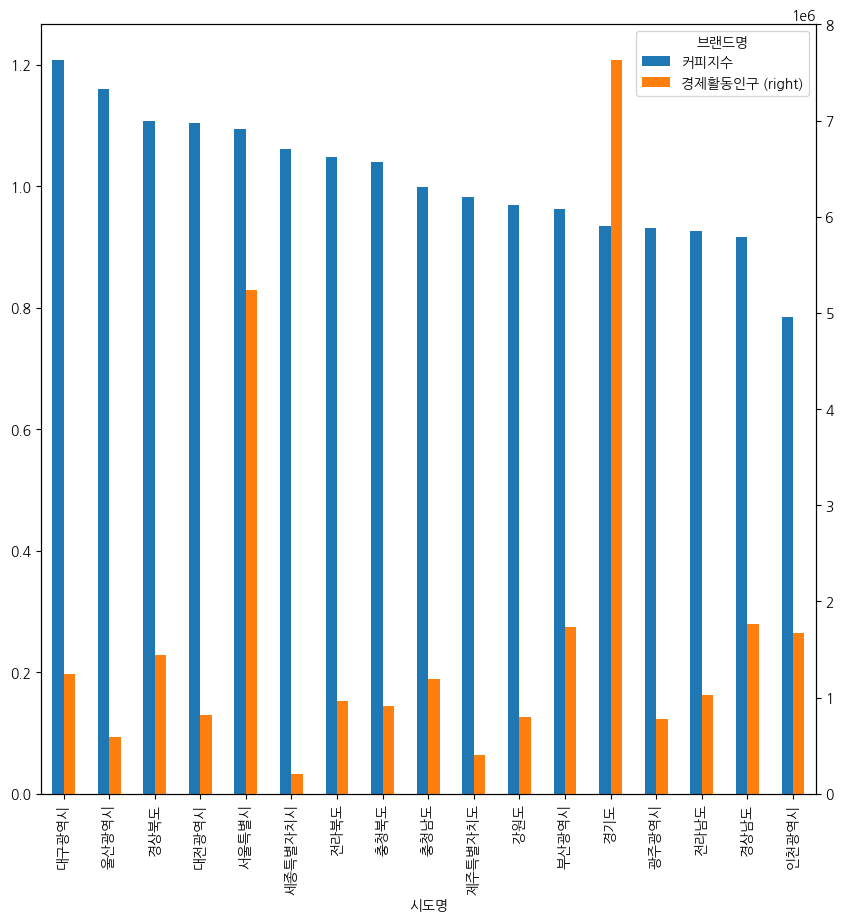

In [ ]:
# 경제활동 인구와 커피지수는 상관이 없다
df_sido.iloc[:, [-3,-1]].sort_values('커피지수', ascending=False).plot(kind='bar', secondary_y='경제활동인구', figsize=(10,10));

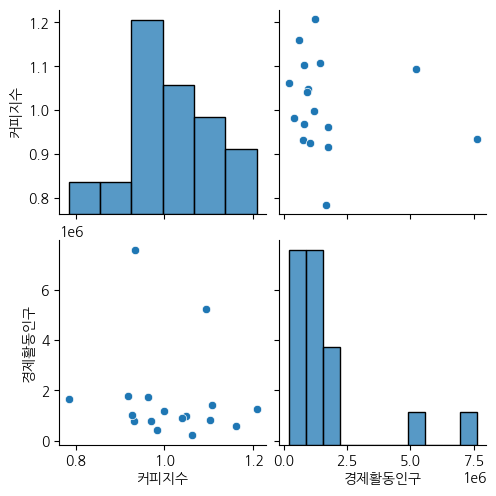

In [ ]:
sns.pairplot(df_sido.iloc[:, [-3,-1]])

In [ ]:
df_sido.iloc[:, [-3,-1]].corr()

브랜드명        커피지수    경제활동인구
브랜드명                      
커피지수    1.000000 -0.138283
경제활동인구 -0.138283  1.000000

In [ ]:
df_sido

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

브랜드명       합계      커피지수   15세이상인구   경제활동인구  
시도명                                         
강원도       409  0.969846   1325000   798000  
경기도      3274  0.934005  11939000  7626000  
경상남도      658  0.917522   2848000  1763000  
경상북도      386  1.107809   2322000  1438000  
광주광역시     490  0.931391   1280000   773000  
대구광역시     457  1.207517   2075000  1250000  
대전광역시     374  1.103787   1290000   816000  
부산광역시     826  0.962215   2935000  1737000  
서울특별시    3230  1.094663   8454000  5235000  
세종특별자치시    93  1.061557    319000   204000  
울산광역시     261  1.160516    957000   585000  
인천광역시     826  0.784331   2600000  1675000  
전라남도      384  0.926109   1525000  1023000  
전라북도      324  1.048356   1556000   960000  
제주특별자치도   193  0.982341    578000   404000  
충청남도      411  0.998515   1918000  1190000  
충청북도      320  1.040738   1431000   911000

In [ ]:
sido_population = pd.read_csv('전국_시도별_인구.csv', encoding='cp949')
sido_population

Unnamed: 0     남자인구     여자인구       총인구
0       서울특별시  4567739  4857134   9424873
1       부산광역시  1618749  1697358   3316107
2       대구광역시  1162217  1200663   2362880
3       인천광역시  1486300  1483202   2969502
4       광주광역시   706724   723092   1429816
5       대전광역시   721037   724769   1445806
6       울산광역시   570113   539961   1110074
7     세종특별자치시   191769   192727    384496
8         경기도  6842226  6753865  13596091
9         강원도   772297   763076   1535373
10       충청북도   810740   783719   1594459
11       충청남도  1086686  1036227   2122913
12       전라북도   879922   888307   1768229
13       전라남도   914811   901896   1816707
14       경상북도  1310583  1286944   2597527
15       경상남도  1650300  1627372   3277672
16    제주특별자치도   339325   338168    677493

In [ ]:
sido_population = sido_population.set_index('Unnamed: 0')

In [ ]:
sido_population

남자인구     여자인구       총인구
Unnamed: 0                            
서울특별시       4567739  4857134   9424873
부산광역시       1618749  1697358   3316107
대구광역시       1162217  1200663   2362880
인천광역시       1486300  1483202   2969502
광주광역시        706724   723092   1429816
대전광역시        721037   724769   1445806
울산광역시        570113   539961   1110074
세종특별자치시      191769   192727    384496
경기도         6842226  6753865  13596091
강원도          772297   763076   1535373
충청북도         810740   783719   1594459
충청남도        1086686  1036227   2122913
전라북도         879922   888307   1768229
전라남도         914811   901896   1816707
경상북도        1310583  1286944   2597527
경상남도        1650300  1627372   3277672
제주특별자치도      339325   338168    677493

In [ ]:
sido_population.index.name = '시도명'

In [ ]:
sido_population

남자인구     여자인구       총인구
시도명                                
서울특별시    4567739  4857134   9424873
부산광역시    1618749  1697358   3316107
대구광역시    1162217  1200663   2362880
인천광역시    1486300  1483202   2969502
광주광역시     706724   723092   1429816
대전광역시     721037   724769   1445806
울산광역시     570113   539961   1110074
세종특별자치시   191769   192727    384496
경기도      6842226  6753865  13596091
강원도       772297   763076   1535373
충청북도      810740   783719   1594459
충청남도     1086686  1036227   2122913
전라북도      879922   888307   1768229
전라남도      914811   901896   1816707
경상북도     1310583  1286944   2597527
경상남도     1650300  1627372   3277672
제주특별자치도   339325   338168    677493

In [ ]:
nation = df_sido.merge(sido_population, how='inner', on='시도명')

In [ ]:
nation

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

           합계      커피지수   15세이상인구   경제활동인구     남자인구     여자인구       총인구  
시도명                                                                     
강원도       409  0.969846   1325000   798000   772297   763076   1535373  
경기도      3274  0.934005  11939000  7626000  6842226  6753865  13596091  
경상남도      658  0.917522   2848000  1763000  1650300  1627372   3277672  
경상북도      386  1.107809   2322000  1438000  1310583  1286944   2597527  
광주광역시     490  0.931391   1280000   773000   706724   723092   1429816  
대구광역시     457  1.207517   2075000  1250000  1162217  1200663   2362880  
대전광역시     374  1.103787   1290000   816000   721037   724769   1445806  
부산광역시     826  0.962215   2935000  1737000  1618749  1697358   3316107  
서울특별시    3230  1.094663   8454000  5235000  4567739  4857134   9424873  
세종특별자치시    93  1.061557    319000   204000   191769   192727    384496  
울산광역시     261  1.160516    957000   585000   570113   539961   1110074  
인천광역시     826  0.784331   2600000  1675000  1486300  1483202   2969502  
전라남도      384  0.926109   1525000  1023000   914811   901896   1816707  
전라북도      324  1.048356   1556000   960000   879922   888307   1768229  
제주특별자치도   193  0.982341    578000   404000   339325   338168    677493  
충청남도      411  0.998515   1918000  1190000  1086686  1036227   2122913  
충청북도      320  1.040738   1431000   911000   810740   783719   1594459

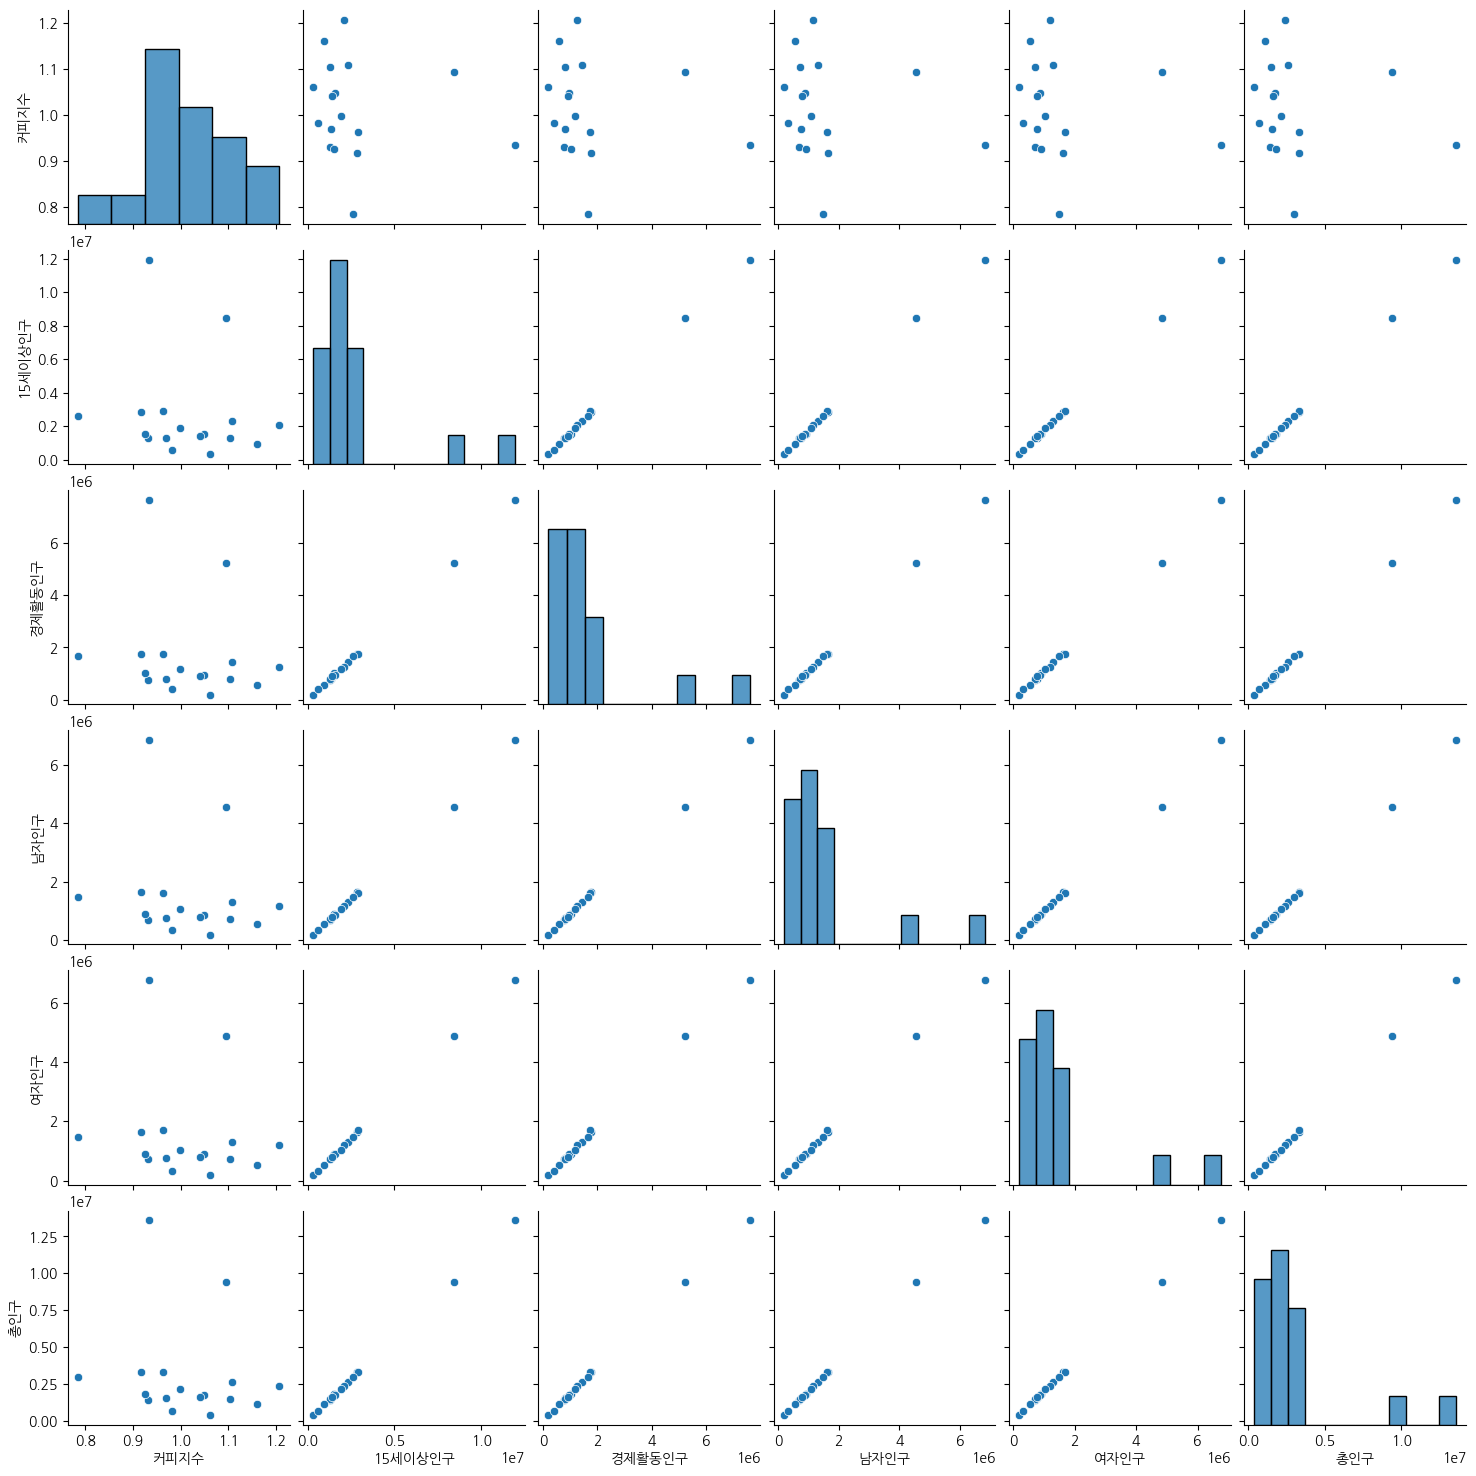

In [ ]:
sns.pairplot(nation.iloc[:, -6:])

In [ ]:
nation.iloc[:, -7:].corr()

합계      커피지수   15세이상인구    경제활동인구      남자인구      여자인구       총인구
합계       1.000000 -0.109932  0.973306  0.970209  0.965736  0.975462  0.970885
커피지수    -0.109932  1.000000 -0.128363 -0.138283 -0.140810 -0.128286 -0.134548
15세이상인구  0.973306 -0.128363  1.000000  0.999618  0.999337  0.999874  0.999874
경제활동인구   0.970209 -0.138283  0.999618  1.000000  0.999701  0.999326  0.999779
남자인구     0.965736 -0.140810  0.999337  0.999701  1.000000  0.998934  0.999730
여자인구     0.975462 -0.128286  0.999874  0.999326  0.998934  1.000000  0.999737
총인구      0.970885 -0.134548  0.999874  0.999779  0.999730  0.999737  1.000000

In [ ]:
nation['총인구대비경제활동인구'] = nation['경제활동인구'] / nation['총인구']

In [ ]:
nation.sort_values('총인구대비경제활동인구', ascending=False)

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청북도       68   36    27      9   63    1     16      51    29    2   18   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
경기도       725  335   422     42  636   44    465     367    84   33  121   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
강원도        72   33    31      4  128    1     51      60    14    0   15   

           합계      커피지수   15세이상인구   경제활동인구     남자인구     여자인구       총인구  \
시도명                                                                      
제주특별자치도   193  0.982341    578000   404000   339325   338168    677493   
충청북도      320  1.040738   1431000   911000   810740   783719   1594459   
대전광역시     374  1.103787   1290000   816000   721037   724769   1445806   
인천광역시     826  0.784331   2600000  1675000  1486300  1483202   2969502   
전라남도      384  0.926109   1525000  1023000   914811   901896   1816707   
경기도      3274  0.934005  11939000  7626000  6842226  6753865  13596091   
충청남도      411  0.998515   1918000  1190000  1086686  1036227   2122913   
서울특별시    3230  1.094663   8454000  5235000  4567739  4857134   9424873   
경상북도      386  1.107809   2322000  1438000  1310583  1286944   2597527   
전라북도      324  1.048356   1556000   960000   879922   888307   1768229   
광주광역시     490  0.931391   1280000   773000   706724   723092   1429816   
경상남도      658  0.917522   2848000  1763000  1650300  1627372   3277672   
세종특별자치시    93  1.061557    319000   204000   191769   192727    384496   
대구광역시     457  1.207517   2075000  1250000  1162217  1200663   2362880   
울산광역시     261  1.160516    957000   585000   570113   539961   1110074   
부산광역시     826  0.962215   2935000  1737000  1618749  1697358   3316107   
강원도       409  0.969846   1325000   798000   772297   763076   1535373   

         총인구대비경제활동인구  
시도명                   
제주특별자치도     0.596316  
충청북도        0.571354  
대전광역시       0.564391  
인천광역시       0.564068  
전라남도        0.563107  
경기도         0.560897  
충청남도        0.560551  
서울특별시       0.555445  
경상북도        0.553603  
전라북도        0.542916  
광주광역시       0.540629  
경상남도        0.537882  
세종특별자치시     0.530565  
대구광역시       0.529015  
울산광역시       0.526992  
부산광역시       0.523807  
강원도         0.519743

array([<AxesSubplot: title={'center': '커피지수'}, xlabel='시도명'>,
       <AxesSubplot: title={'center': '총인구대비경제활동인구'}, xlabel='시도명'>],
      dtype=object)

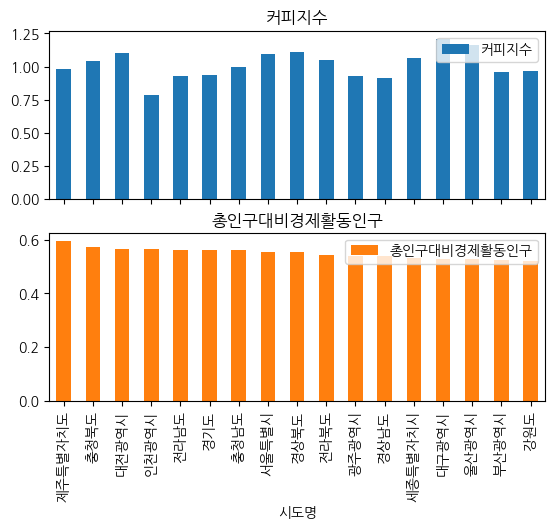

In [ ]:
nation.loc[:, ['커피지수', '총인구대비경제활동인구']].sort_values('총인구대비경제활동인구', ascending=False).plot(kind='bar', subplots=True)

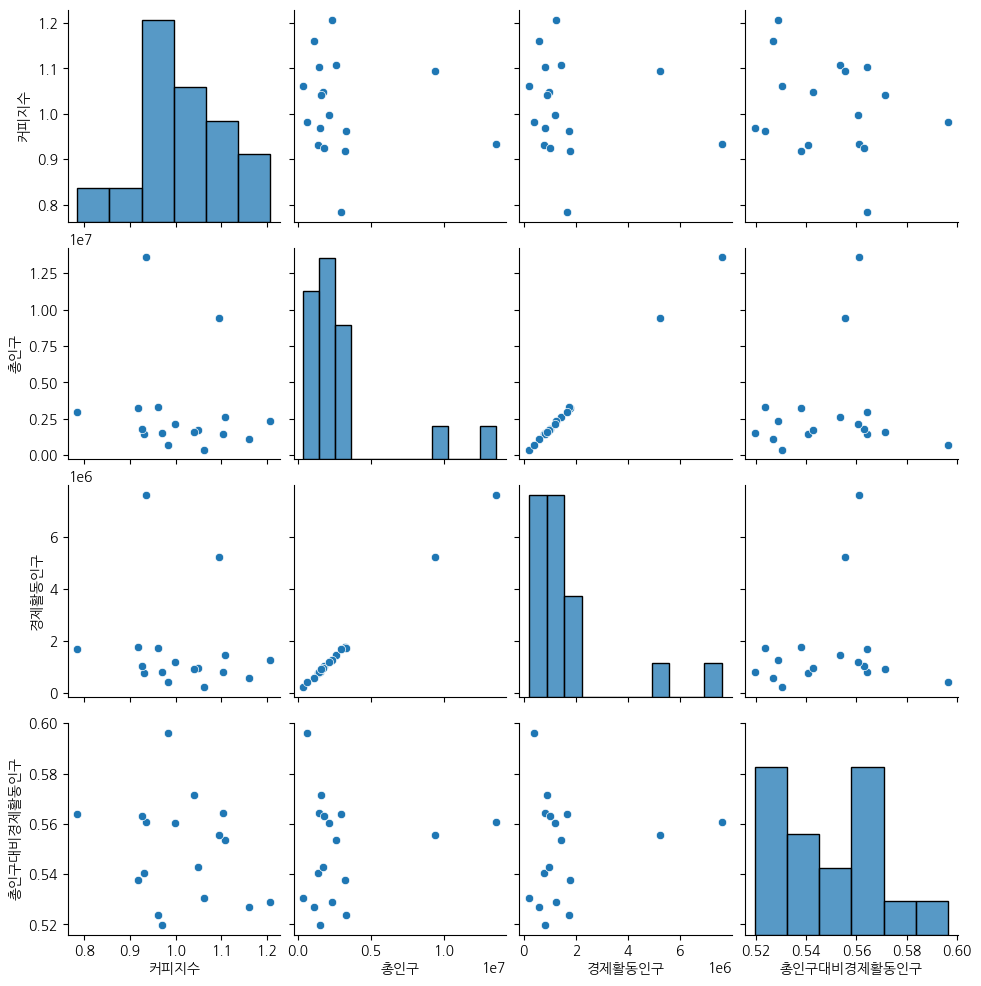

In [ ]:
# 커피지수와 인구
sns.pairplot(nation.loc[:, ['커피지수', '총인구', '경제활동인구', '총인구대비경제활동인구']])

In [ ]:
tmp = nation.loc[:, ['커피지수', '총인구대비경제활동인구']]
tmp

커피지수  총인구대비경제활동인구
시도명                           
강원도      0.969846     0.519743
경기도      0.934005     0.560897
경상남도     0.917522     0.537882
경상북도     1.107809     0.553603
광주광역시    0.931391     0.540629
대구광역시    1.207517     0.529015
대전광역시    1.103787     0.564391
부산광역시    0.962215     0.523807
서울특별시    1.094663     0.555445
세종특별자치시  1.061557     0.530565
울산광역시    1.160516     0.526992
인천광역시    0.784331     0.564068
전라남도     0.926109     0.563107
전라북도     1.048356     0.542916
제주특별자치도  0.982341     0.596316
충청남도     0.998515     0.560551
충청북도     1.040738     0.571354

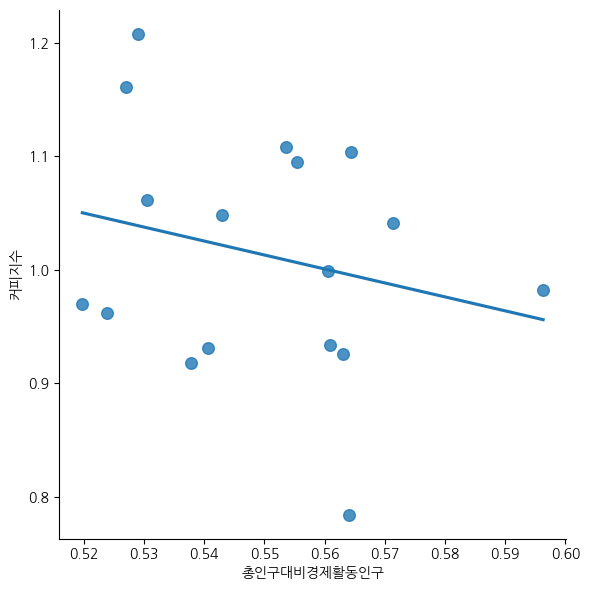

In [ ]:
sns.lmplot(x="총인구대비경제활동인구", y="커피지수", data=tmp, ci=None, scatter_kws={'s':70}, height=6)

In [ ]:
nation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원도 to 충청북도
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   메가커피         17 non-null     int32  
 1   빽다방          17 non-null     int32  
 2   스타벅스         17 non-null     int32  
 3   엔제리너스        17 non-null     int32  
 4   이디야          17 non-null     int32  
 5   커피빈          17 non-null     int32  
 6   컴포즈커피        17 non-null     int32  
 7   투썸플레이스       17 non-null     int32  
 8   파스쿠찌         17 non-null     int32  
 9   폴바셋          17 non-null     int32  
 10  할리스          17 non-null     int32  
 11  합계           17 non-null     int64  
 12  커피지수         17 non-null     float64
 13  15세이상인구      17 non-null     int64  
 14  경제활동인구       17 non-null     int64  
 15  남자인구         17 non-null     int64  
 16  여자인구         17 non-null     int64  
 17  총인구          17 non-null     int64  
 18  총인구대비경제활동인구  17 non-null     float64
dtypes: float64(

## 전체대비체인점

In [ ]:
coffeeshop = pd.read_csv('coffeeshop.csv')
coffeeshop

매장명    시도명 시군구명
0                     미엔  대구광역시  달서구
1       메종188(MAISON188)  서울특별시  관악구
2              커스텀커피 금호점  서울특별시  성동구
3                (주)맨케이브  서울특별시  마포구
4                     벤티   전라남도  곡성군
...                  ...    ...  ...
95094        스타벅스동대구터미널점  대구광역시   동구
95095  메가엠지씨커피 광주봉선유안공원점  광주광역시   남구
95096           파운데이 염주점  광주광역시   서구
95097            벌크커피봉선점  광주광역시   남구
95098           파운데이 풍암점  광주광역시   서구

[95099 rows x 3 columns]

In [ ]:
nation

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

           합계      커피지수   15세이상인구   경제활동인구     남자인구     여자인구       총인구  \
시도명                                                                      
강원도       409  0.969846   1325000   798000   772297   763076   1535373   
경기도      3274  0.934005  11939000  7626000  6842226  6753865  13596091   
경상남도      658  0.917522   2848000  1763000  1650300  1627372   3277672   
경상북도      386  1.107809   2322000  1438000  1310583  1286944   2597527   
광주광역시     490  0.931391   1280000   773000   706724   723092   1429816   
대구광역시     457  1.207517   2075000  1250000  1162217  1200663   2362880   
대전광역시     374  1.103787   1290000   816000   721037   724769   1445806   
부산광역시     826  0.962215   2935000  1737000  1618749  1697358   3316107   
서울특별시    3230  1.094663   8454000  5235000  4567739  4857134   9424873   
세종특별자치시    93  1.061557    319000   204000   191769   192727    384496   
울산광역시     261  1.160516    957000   585000   570113   539961   1110074   
인천광역시     826  0.784331   2600000  1675000  1486300  1483202   2969502   
전라남도      384  0.926109   1525000  1023000   914811   901896   1816707   
전라북도      324  1.048356   1556000   960000   879922   888307   1768229   
제주특별자치도   193  0.982341    578000   404000   339325   338168    677493   
충청남도      411  0.998515   1918000  1190000  1086686  1036227   2122913   
충청북도      320  1.040738   1431000   911000   810740   783719   1594459   

         총인구대비경제활동인구  
시도명                   
강원도         0.519743  
경기도         0.560897  
경상남도        0.537882  
경상북도        0.553603  
광주광역시       0.540629  
대구광역시       0.529015  
대전광역시       0.564391  
부산광역시       0.523807  
서울특별시       0.555445  
세종특별자치시     0.530565  
울산광역시       0.526992  
인천광역시       0.564068  
전라남도        0.563107  
전라북도        0.542916  
제주특별자치도     0.596316  
충청남도        0.560551  
충청북도        0.571354

In [ ]:
# 시도별 전체 커피전문점 개수
coffeeshop.groupby('시도명')['매장명'].count().to_list()

[3262,
 20663,
 6761,
 6666,
 2315,
 4777,
 2597,
 5590,
 18267,
 675,
 2075,
 4971,
 3492,
 3470,
 2247,
 4185,
 3086]

In [ ]:
nation['커피전문점개수'] = coffeeshop.groupby('시도명')['매장명'].count().to_list()

In [ ]:
nation

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
강원도        72   33    31      4  128    1     51      60    14    0   15   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
충청북도       68   36    27      9   63    1     16      51    29    2   18   

           합계      커피지수   15세이상인구   경제활동인구     남자인구     여자인구       총인구  \
시도명                                                                      
강원도       409  0.969846   1325000   798000   772297   763076   1535373   
경기도      3274  0.934005  11939000  7626000  6842226  6753865  13596091   
경상남도      658  0.917522   2848000  1763000  1650300  1627372   3277672   
경상북도      386  1.107809   2322000  1438000  1310583  1286944   2597527   
광주광역시     490  0.931391   1280000   773000   706724   723092   1429816   
대구광역시     457  1.207517   2075000  1250000  1162217  1200663   2362880   
대전광역시     374  1.103787   1290000   816000   721037   724769   1445806   
부산광역시     826  0.962215   2935000  1737000  1618749  1697358   3316107   
서울특별시    3230  1.094663   8454000  5235000  4567739  4857134   9424873   
세종특별자치시    93  1.061557    319000   204000   191769   192727    384496   
울산광역시     261  1.160516    957000   585000   570113   539961   1110074   
인천광역시     826  0.784331   2600000  1675000  1486300  1483202   2969502   
전라남도      384  0.926109   1525000  1023000   914811   901896   1816707   
전라북도      324  1.048356   1556000   960000   879922   888307   1768229   
제주특별자치도   193  0.982341    578000   404000   339325   338168    677493   
충청남도      411  0.998515   1918000  1190000  1086686  1036227   2122913   
충청북도      320  1.040738   1431000   911000   810740   783719   1594459   

         총인구대비경제활동인구  커피전문점개수  
시도명                            
강원도         0.519743     3262  
경기도         0.560897    20663  
경상남도        0.537882     6761  
경상북도        0.553603     6666  
광주광역시       0.540629     2315  
대구광역시       0.529015     4777  
대전광역시       0.564391     2597  
부산광역시       0.523807     5590  
서울특별시       0.555445    18267  
세종특별자치시     0.530565      675  
울산광역시       0.526992     2075  
인천광역시       0.564068     4971  
전라남도        0.563107     3492  
전라북도        0.542916     3470  
제주특별자치도     0.596316     2247  
충청남도        0.560551     4185  
충청북도        0.571354     3086

In [ ]:
nation['전체대비체인점'] = nation['합계'] / nation['커피전문점개수']
nation.head()

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  ...    합계  \
시도명                                                                ...         
강원도      72   33    31      4  128    1     51      60    14    0  ...   409   
경기도     725  335   422     42  636   44    465     367    84   33  ...  3274   
경상남도     63   36    70     21  141    3    205      66    25    3  ...   658   
경상북도     39   37    54     19   70    0     50      62    38    1  ...   386   
광주광역시    99   22    62     25   77    3    111      46    27    3  ...   490   

           커피지수   15세이상인구   경제활동인구     남자인구     여자인구       총인구  총인구대비경제활동인구  \
시도명                                                                           
강원도    0.969846   1325000   798000   772297   763076   1535373     0.519743   
경기도    0.934005  11939000  7626000  6842226  6753865  13596091     0.560897   
경상남도   0.917522   2848000  1763000  1650300  1627372   3277672     0.537882   
경상북도   1.107809   2322000  1438000  1310583  1286944   2597527     0.553603   
광주광역시  0.931391   1280000   773000   706724   723092   1429816     0.540629   

       커피전문점개수   전체대비체인점  
시도명                       
강원도       3262  0.125383  
경기도      20663  0.158447  
경상남도      6761  0.097323  
경상북도      6666  0.057906  
광주광역시     2315  0.211663  

[5 rows x 21 columns]

<AxesSubplot: xlabel='시도명'>

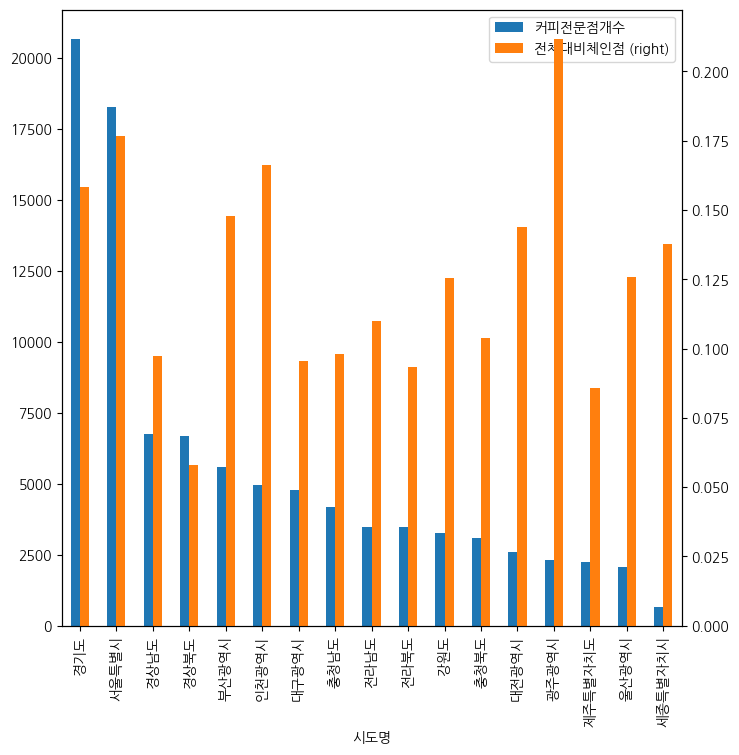

In [ ]:
nation.loc[:, ['커피전문점개수', '전체대비체인점']].sort_values('커피전문점개수', ascending=False).plot(kind='bar', secondary_y='전체대비체인점', figsize=(8,8))

In [ ]:
nation.loc[:, ['커피전문점개수', '전체대비체인점']].corr()

커피전문점개수   전체대비체인점
커피전문점개수  1.000000  0.284173
전체대비체인점  0.284173  1.000000

<AxesSubplot: xlabel='시도명'>

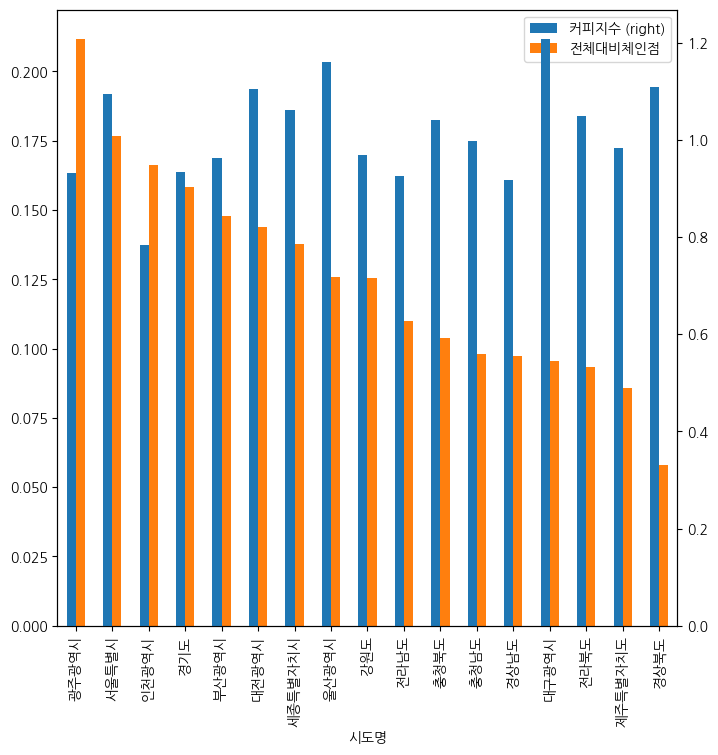

In [ ]:
nation.loc[:, ['커피지수', '전체대비체인점']].sort_values('전체대비체인점', ascending=False).plot(kind='bar', secondary_y='커피지수', figsize=(8,8))

<AxesSubplot: xlabel='시도명'>

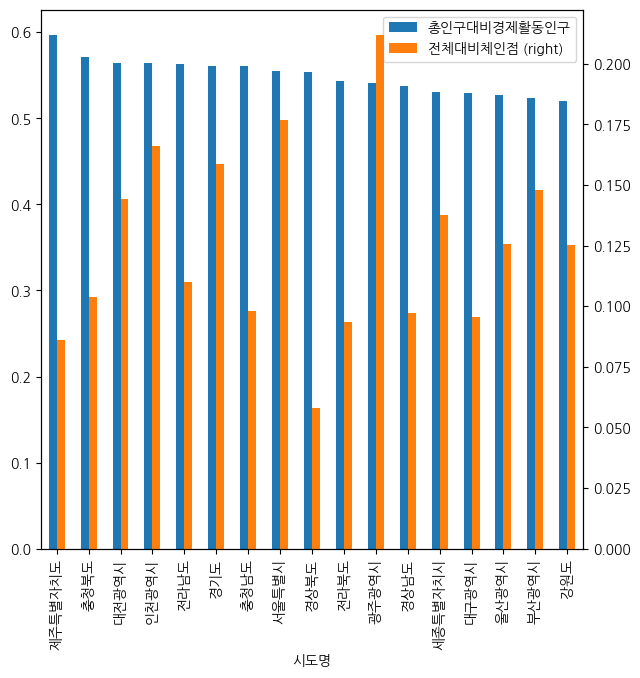

In [ ]:
nation.loc[:, ['총인구대비경제활동인구', '전체대비체인점']].sort_values('총인구대비경제활동인구', ascending=False).plot(kind='bar', secondary_y='전체대비체인점', figsize=(7,7))

In [ ]:
nation.loc[:, ['커피지수', '총인구', '총인구대비경제활동인구', '커피전문점개수', '전체대비체인점']]

커피지수       총인구  총인구대비경제활동인구  커피전문점개수   전체대비체인점
시도명                                                        
강원도      0.969846   1535373     0.519743     3262  0.125383
경기도      0.934005  13596091     0.560897    20663  0.158447
경상남도     0.917522   3277672     0.537882     6761  0.097323
경상북도     1.107809   2597527     0.553603     6666  0.057906
광주광역시    0.931391   1429816     0.540629     2315  0.211663
대구광역시    1.207517   2362880     0.529015     4777  0.095667
대전광역시    1.103787   1445806     0.564391     2597  0.144012
부산광역시    0.962215   3316107     0.523807     5590  0.147764
서울특별시    1.094663   9424873     0.555445    18267  0.176822
세종특별자치시  1.061557    384496     0.530565      675  0.137778
울산광역시    1.160516   1110074     0.526992     2075  0.125783
인천광역시    0.784331   2969502     0.564068     4971  0.166164
전라남도     0.926109   1816707     0.563107     3492  0.109966
전라북도     1.048356   1768229     0.542916     3470  0.093372
제주특별자치도  0.982341    677493     0.596316     2247  0.085892
충청남도     0.998515   2122913     0.560551     4185  0.098208
충청북도     1.040738   1594459     0.571354     3086  0.103694

In [ ]:
cor = nation.loc[:, ['커피지수', '총인구', '총인구대비경제활동인구', '커피전문점개수', '전체대비체인점']].corr()
cor

커피지수       총인구  총인구대비경제활동인구   커피전문점개수   전체대비체인점
커피지수         1.000000 -0.134548    -0.239946 -0.074270 -0.336183
총인구         -0.134548  1.000000     0.115720  0.984033  0.348260
총인구대비경제활동인구 -0.239946  0.115720     1.000000  0.128364 -0.157167
커피전문점개수     -0.074270  0.984033     0.128364  1.000000  0.284173
전체대비체인점     -0.336183  0.348260    -0.157167  0.284173  1.000000

<AxesSubplot: >

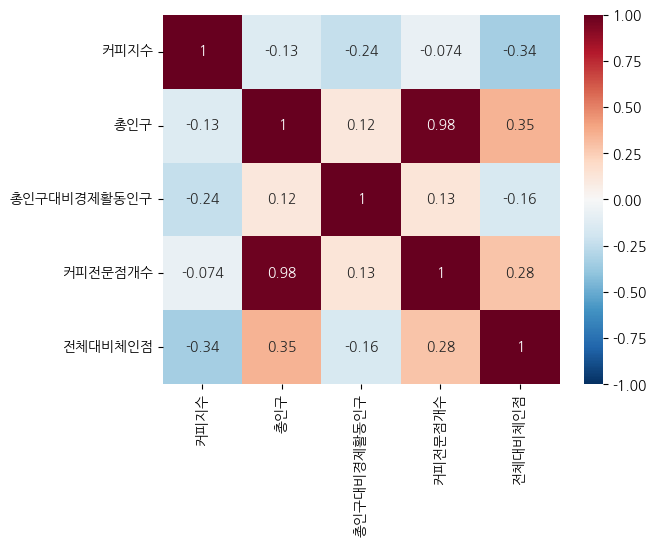

In [ ]:
sns.heatmap(cor, annot=True, vmin=-1, cmap='RdBu_r')

In [ ]:
df_seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   
광진구     14   10    19      2   24    4     16      12     1    0    5  107   
구로구     28   13    14      1   29    2     19      11     1    4    5  127   
금천구     13    8    13      2   23    2     16      11     0    0    2   90   
노원구     28   14    14      2   29    3      8      11     2    1    3  115   
도봉구     16    6     4      0   24    0      9       7     1    0    0   67   
동대문구    18    7    10      1   25    3     10       9     0    1    0   84   
동작구     14    6    11      3   22    0      9       5     0    0    6   76   
마포구     27   11    35      3   34    7     15      25     1    3   10  171   
서대문구    17    6    22      2   20    2     12       9     5    0    8  103   
서초구     12   12    48      1   29   20      8      28     7   10    9  184   
성동구     16   12    15      0   22    0      9      11     2    0    3   90   
성북구     27   16    15      0   31    2      8      10     0    0    1  110   
송파구     32   17    34     10   39   14     19      30     1    4    6  206   
양천구     26    6    17      0   26    2     18       9     3    0    5  112   
영등포구    26   10    41      4   41   11     14      21     3    6    8  185   
용산구      6    8    25      1   14    4      1       9     4    2    4   78   
은평구     24   10    13      5   26    1     15       6     0    1    3  104   
종로구     16    8    40      5   31   15      8      12     3    3   11  152   
중구      17    6    55      6   30   13     11      32     3    8    9  190   
중랑구     19   10     8      1   29    1     10      10     0    0    1   89   

브랜드명      커피지수  
시군구명            
강남구   1.239382  
강동구   0.913761  
강북구   0.830270  
강서구   0.875797  
관악구   0.900323  
광진구   0.950444  
구로구   0.831457  
금천구   0.888528  
노원구   0.865676  
도봉구   0.770113  
동대문구  0.862504  
동작구   0.901276  
마포구   1.036660  
서대문구  0.993893  
서초구   1.226931  
성동구   0.893744  
성북구   0.819936  
송파구   1.024686  
양천구   0.850589  
영등포구  1.072862  
용산구   1.186677  
은평구   0.820013  
종로구   1.157625  
중구    1.211873  
중랑구   0.822008

In [ ]:
coffeeshop_seoul = coffeeshop[coffeeshop['시도명']=='서울특별시']
coffeeshop_seoul

매장명    시도명 시군구명
1      메종188(MAISON188)  서울특별시  관악구
2             커스텀커피 금호점  서울특별시  성동구
3               (주)맨케이브  서울특별시  마포구
6                    딤플  서울특별시  성동구
10                  몰타르  서울특별시   중구
...                 ...    ...  ...
90532         굿애프터눈 합정점  서울특별시  마포구
90533         보노보나마포합정점  서울특별시  마포구
90534    셀렉토커피상암누리꿈스퀘어점  서울특별시  마포구
90535                로벤  서울특별시  마포구
91351            카페it수다  서울특별시  서초구

[18267 rows x 3 columns]

In [ ]:
# 서울시 각 구별 커피전문점 수
coffeeshop_seoul.groupby('시군구명')['매장명'].count()

시군구명
강남구     1992
강동구      642
강북구      313
강서구     1017
관악구      639
광진구      707
구로구      515
금천구      444
노원구      590
도봉구      299
동대문구     430
동작구      512
마포구     1311
서대문구     555
서초구     1145
성동구      490
성북구      644
송파구      872
양천구      495
영등포구     988
용산구      581
은평구      399
종로구      958
중구      1315
중랑구      414
Name: 매장명, dtype: int64

In [ ]:
df_seoul_gu['커피전문점개수'] = coffeeshop_seoul.groupby('시군구명')['매장명'].count()

In [ ]:
df_seoul_gu.sort_values('커피지수', ascending=False)

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
서초구     12   12    48      1   29   20      8      28     7   10    9  184   
중구      17    6    55      6   30   13     11      32     3    8    9  190   
용산구      6    8    25      1   14    4      1       9     4    2    4   78   
종로구     16    8    40      5   31   15      8      12     3    3   11  152   
영등포구    26   10    41      4   41   11     14      21     3    6    8  185   
마포구     27   11    35      3   34    7     15      25     1    3   10  171   
송파구     32   17    34     10   39   14     19      30     1    4    6  206   
서대문구    17    6    22      2   20    2     12       9     5    0    8  103   
광진구     14   10    19      2   24    4     16      12     1    0    5  107   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
동작구     14    6    11      3   22    0      9       5     0    0    6   76   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   
성동구     16   12    15      0   22    0      9      11     2    0    3   90   
금천구     13    8    13      2   23    2     16      11     0    0    2   90   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
노원구     28   14    14      2   29    3      8      11     2    1    3  115   
동대문구    18    7    10      1   25    3     10       9     0    1    0   84   
양천구     26    6    17      0   26    2     18       9     3    0    5  112   
구로구     28   13    14      1   29    2     19      11     1    4    5  127   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
중랑구     19   10     8      1   29    1     10      10     0    0    1   89   
은평구     24   10    13      5   26    1     15       6     0    1    3  104   
성북구     27   16    15      0   31    2      8      10     0    0    1  110   
도봉구     16    6     4      0   24    0      9       7     1    0    0   67   

브랜드명      커피지수  커피전문점개수  
시군구명                     
강남구   1.239382     1992  
서초구   1.226931     1145  
중구    1.211873     1315  
용산구   1.186677      581  
종로구   1.157625      958  
영등포구  1.072862      988  
마포구   1.036660     1311  
송파구   1.024686      872  
서대문구  0.993893      555  
광진구   0.950444      707  
강동구   0.913761      642  
동작구   0.901276      512  
관악구   0.900323      639  
성동구   0.893744      490  
금천구   0.888528      444  
강서구   0.875797     1017  
노원구   0.865676      590  
동대문구  0.862504      430  
양천구   0.850589      495  
구로구   0.831457      515  
강북구   0.830270      313  
중랑구   0.822008      414  
은평구   0.820013      399  
성북구   0.819936      644  
도봉구   0.770113      299

In [ ]:
tmp2 = df_seoul_gu.sort_values('커피전문점개수', ascending=False)
tmp2

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
중구      17    6    55      6   30   13     11      32     3    8    9  190   
마포구     27   11    35      3   34    7     15      25     1    3   10  171   
서초구     12   12    48      1   29   20      8      28     7   10    9  184   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
영등포구    26   10    41      4   41   11     14      21     3    6    8  185   
종로구     16    8    40      5   31   15      8      12     3    3   11  152   
송파구     32   17    34     10   39   14     19      30     1    4    6  206   
광진구     14   10    19      2   24    4     16      12     1    0    5  107   
성북구     27   16    15      0   31    2      8      10     0    0    1  110   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   
노원구     28   14    14      2   29    3      8      11     2    1    3  115   
용산구      6    8    25      1   14    4      1       9     4    2    4   78   
서대문구    17    6    22      2   20    2     12       9     5    0    8  103   
구로구     28   13    14      1   29    2     19      11     1    4    5  127   
동작구     14    6    11      3   22    0      9       5     0    0    6   76   
양천구     26    6    17      0   26    2     18       9     3    0    5  112   
성동구     16   12    15      0   22    0      9      11     2    0    3   90   
금천구     13    8    13      2   23    2     16      11     0    0    2   90   
동대문구    18    7    10      1   25    3     10       9     0    1    0   84   
중랑구     19   10     8      1   29    1     10      10     0    0    1   89   
은평구     24   10    13      5   26    1     15       6     0    1    3  104   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
도봉구     16    6     4      0   24    0      9       7     1    0    0   67   

브랜드명      커피지수  커피전문점개수   전체대비체인점  
시군구명                               
강남구   1.239382     1992  0.161647  
중구    1.211873     1315  0.144487  
마포구   1.036660     1311  0.130435  
서초구   1.226931     1145  0.160699  
강서구   0.875797     1017  0.179941  
영등포구  1.072862      988  0.187247  
종로구   1.157625      958  0.158664  
송파구   1.024686      872  0.236239  
광진구   0.950444      707  0.151344  
성북구   0.819936      644  0.170807  
강동구   0.913761      642  0.171340  
관악구   0.900323      639  0.165884  
노원구   0.865676      590  0.194915  
용산구   1.186677      581  0.134251  
서대문구  0.993893      555  0.185586  
구로구   0.831457      515  0.246602  
동작구   0.901276      512  0.148438  
양천구   0.850589      495  0.226263  
성동구   0.893744      490  0.183673  
금천구   0.888528      444  0.202703  
동대문구  0.862504      430  0.195349  
중랑구   0.822008      414  0.214976  
은평구   0.820013      399  0.260652  
강북구   0.830270      313  0.220447  
도봉구   0.770113      299  0.224080

In [ ]:
tmp2.index

Index(['강남구', '중구', '마포구', '서초구', '강서구', '영등포구', '종로구', '송파구', '광진구', '성북구',
       '강동구', '관악구', '노원구', '용산구', '서대문구', '구로구', '동작구', '양천구', '성동구', '금천구',
       '동대문구', '중랑구', '은평구', '강북구', '도봉구'],
      dtype='object', name='시군구명')

<AxesSubplot: xlabel='커피전문점개수', ylabel='시군구명'>

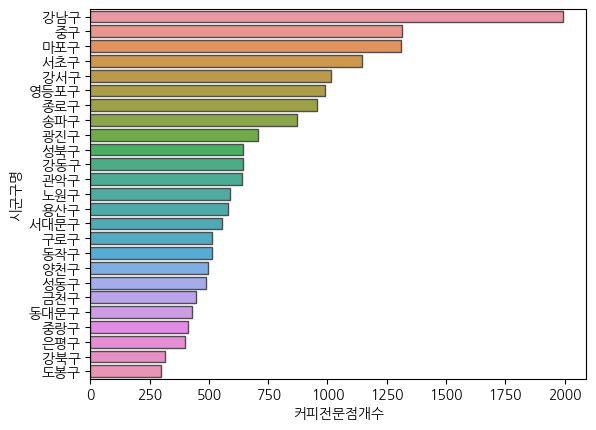

In [ ]:
# 서울시 구별 커피전문점 개수
sns.barplot(data=tmp2, x='커피전문점개수', y=tmp2.index, linewidth=1, edgecolor="0.3")

In [ ]:
df_seoul_gu['전체대비체인점'] = df_seoul_gu['합계'] / df_seoul_gu['커피전문점개수']
df_seoul_gu.head()

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   

브랜드명      커피지수  커피전문점개수   전체대비체인점  
시군구명                               
강남구   1.239382     1992  0.161647  
강동구   0.913761      642  0.171340  
강북구   0.830270      313  0.220447  
강서구   0.875797     1017  0.179941  
관악구   0.900323      639  0.165884

In [ ]:
tmp3 = df_seoul_gu.sort_values('전체대비체인점', ascending=False)
tmp3

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
은평구     24   10    13      5   26    1     15       6     0    1    3  104   
구로구     28   13    14      1   29    2     19      11     1    4    5  127   
송파구     32   17    34     10   39   14     19      30     1    4    6  206   
양천구     26    6    17      0   26    2     18       9     3    0    5  112   
도봉구     16    6     4      0   24    0      9       7     1    0    0   67   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
중랑구     19   10     8      1   29    1     10      10     0    0    1   89   
금천구     13    8    13      2   23    2     16      11     0    0    2   90   
동대문구    18    7    10      1   25    3     10       9     0    1    0   84   
노원구     28   14    14      2   29    3      8      11     2    1    3  115   
영등포구    26   10    41      4   41   11     14      21     3    6    8  185   
서대문구    17    6    22      2   20    2     12       9     5    0    8  103   
성동구     16   12    15      0   22    0      9      11     2    0    3   90   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
성북구     27   16    15      0   31    2      8      10     0    0    1  110   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
서초구     12   12    48      1   29   20      8      28     7   10    9  184   
종로구     16    8    40      5   31   15      8      12     3    3   11  152   
광진구     14   10    19      2   24    4     16      12     1    0    5  107   
동작구     14    6    11      3   22    0      9       5     0    0    6   76   
중구      17    6    55      6   30   13     11      32     3    8    9  190   
용산구      6    8    25      1   14    4      1       9     4    2    4   78   
마포구     27   11    35      3   34    7     15      25     1    3   10  171   

브랜드명      커피지수  커피전문점개수   전체대비체인점  
시군구명                               
은평구   0.820013      399  0.260652  
구로구   0.831457      515  0.246602  
송파구   1.024686      872  0.236239  
양천구   0.850589      495  0.226263  
도봉구   0.770113      299  0.224080  
강북구   0.830270      313  0.220447  
중랑구   0.822008      414  0.214976  
금천구   0.888528      444  0.202703  
동대문구  0.862504      430  0.195349  
노원구   0.865676      590  0.194915  
영등포구  1.072862      988  0.187247  
서대문구  0.993893      555  0.185586  
성동구   0.893744      490  0.183673  
강서구   0.875797     1017  0.179941  
강동구   0.913761      642  0.171340  
성북구   0.819936      644  0.170807  
관악구   0.900323      639  0.165884  
강남구   1.239382     1992  0.161647  
서초구   1.226931     1145  0.160699  
종로구   1.157625      958  0.158664  
광진구   0.950444      707  0.151344  
동작구   0.901276      512  0.148438  
중구    1.211873     1315  0.144487  
용산구   1.186677      581  0.134251  
마포구   1.036660     1311  0.130435

<AxesSubplot: xlabel='전체대비체인점', ylabel='시군구명'>

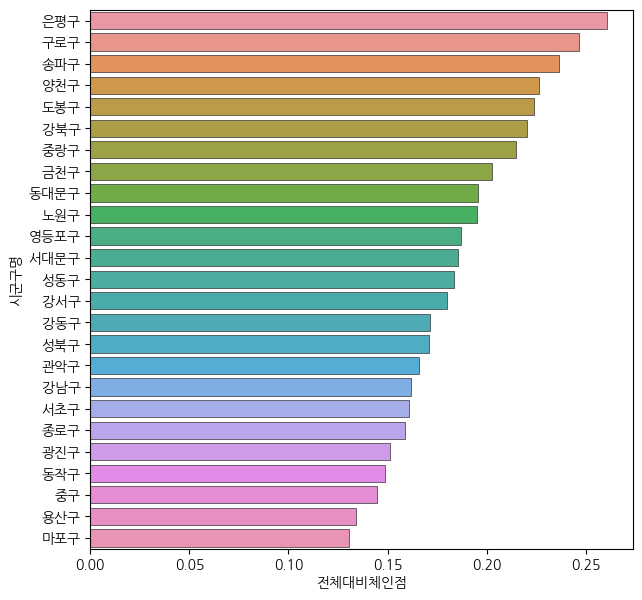

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data=tmp3, x='전체대비체인점', y=tmp3.index, linewidth=0.5, edgecolor="0.2")

In [ ]:
# 서울은 좀 유의미한 수치가 나오는 듯
df_seoul_gu.loc[:, ['합계', '커피지수', '커피전문점개수', '전체대비체인점']].corr()

브랜드명           합계      커피지수   커피전문점개수   전체대비체인점
브랜드명                                           
합계       1.000000  0.667561  0.938180 -0.219822
커피지수     0.667561  1.000000  0.775333 -0.611765
커피전문점개수  0.938180  0.775333  1.000000 -0.514741
전체대비체인점 -0.219822 -0.611765 -0.514741  1.000000

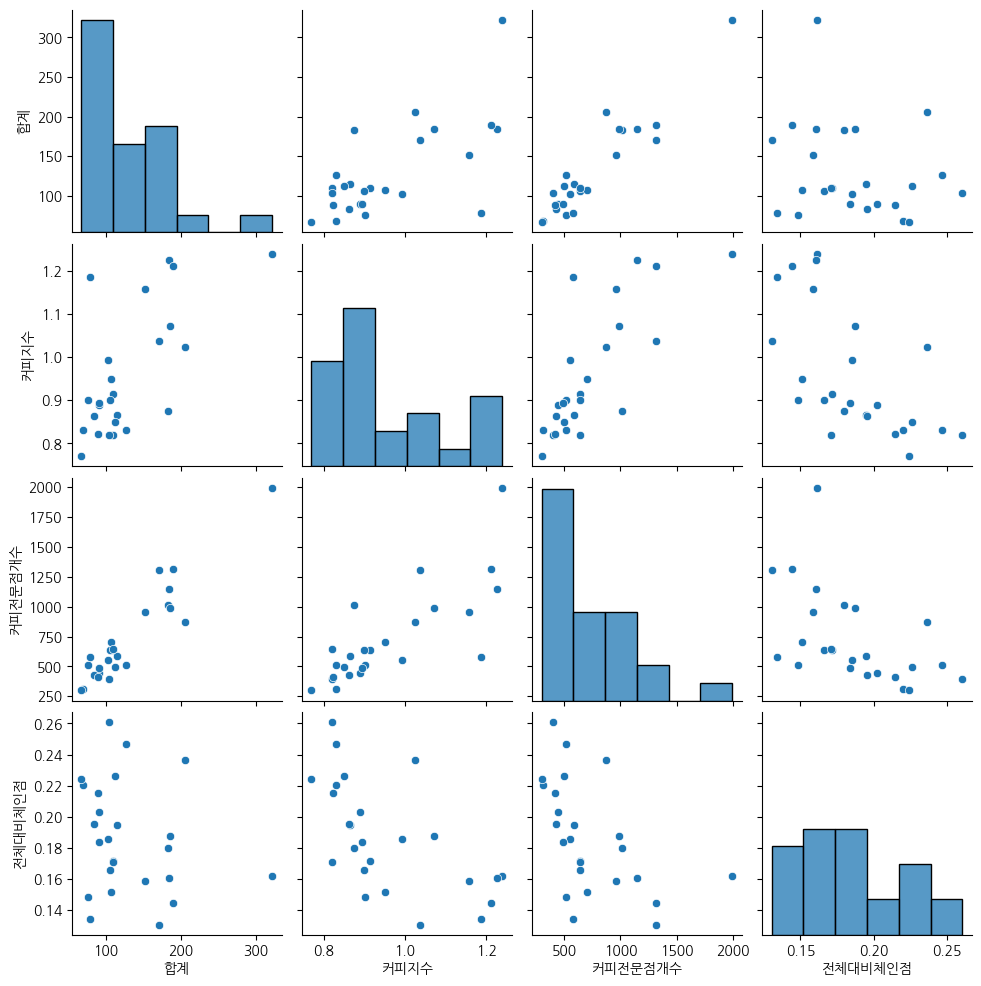

In [ ]:
sns.pairplot(df_seoul_gu.loc[:, ['합계', '커피지수', '커피전문점개수', '전체대비체인점']])

In [ ]:
df_seoul_gu.columns.name

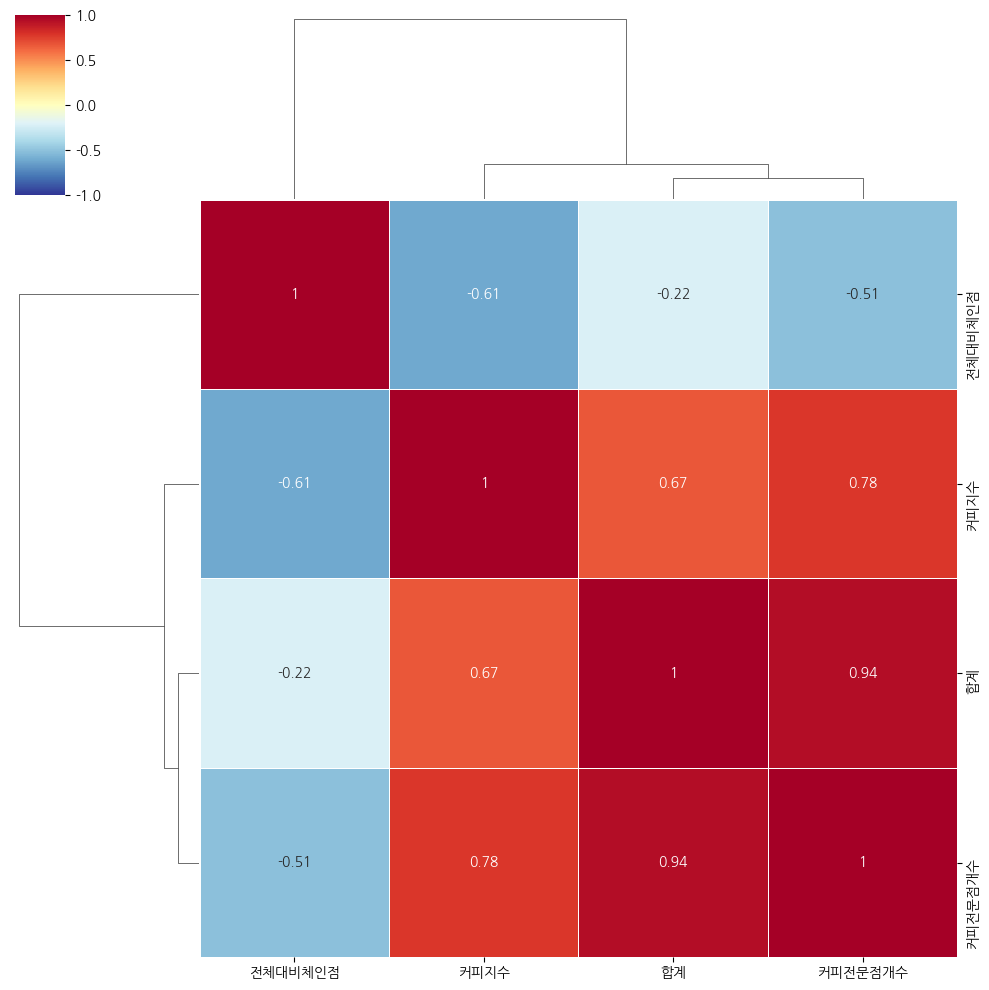

In [ ]:
h = df_seoul_gu.loc[:, ['합계', '커피지수', '커피전문점개수', '전체대비체인점']].corr()

sns.clustermap(h, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               linewidths = 0.7,
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              );

C:\Users\kseob\AppData\Local\Temp\ipykernel_22948\1223245333.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(h, dtype=np.bool))


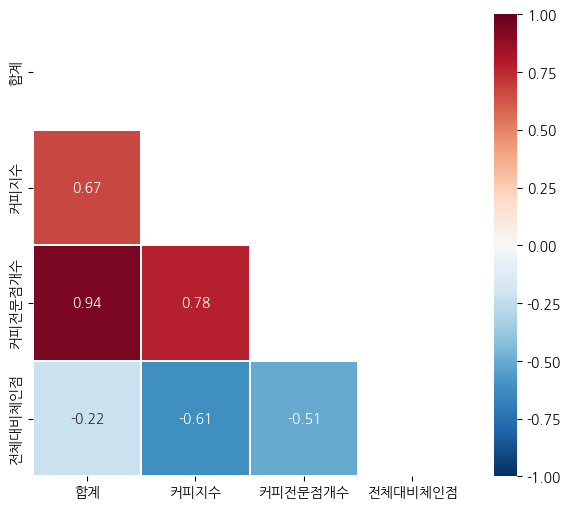

In [ ]:
mask = np.triu(np.ones_like(h, dtype=np.bool))

plt.figure(figsize=(7, 6))
heatmap = sns.heatmap(h, mask=mask, vmin=-1, vmax=1, annot=True, linewidth=0.3, cmap='RdBu_r')

# 커피지수 2안 데이터 분석 및 시각화

## 커피지수 구하기

In [ ]:
fn = glob("datasets/*")
fn

['datasets/compose_cleaning.csv',
 'datasets/pascucci.csv',
 'datasets/angelinus_cleaning.csv',
 'datasets/hollys_list.csv',
 'datasets/ediya_final_ver.csv',
 'datasets/paikscoffee.csv',
 'datasets/paulbassett_cleaning_last.csv',
 'datasets/starbucks_final.csv',
 'datasets/CoffeeBean_list.csv',
 'datasets/TwoSome_cleaning.csv',
 'datasets/mega_cleaning.csv']

In [ ]:
df_list = []
df_list = [pd.read_csv(f, low_memory=False) for f in fn[:]]
df_list

[       브랜드명        지점명      시도명  시군구명  \
 0     컴포즈커피    서산호수공원점     충청남도   서산시   
 1     컴포즈커피      서산석림점     충청남도   서산시   
 2     컴포즈커피  인천영종메가타워점    인천광역시    중구   
 3     컴포즈커피      당진송악점     충청남도   당진시   
 4     컴포즈커피     송도인천대점    인천광역시   연수구   
 ...     ...        ...      ...   ...   
 1861  컴포즈커피     서귀포하효점  제주특별자치도  서귀포시   
 1862  컴포즈커피     서귀포성산점  제주특별자치도  서귀포시   
 1863  컴포즈커피   서귀포올레시장점  제주특별자치도  서귀포시   
 1864  컴포즈커피     서귀포대정점  제주특별자치도  서귀포시   
 1865  컴포즈커피      울릉도동점     경상북도   울릉군   
 
                                             주소  
 0           충청남도 서산시 예천동 1261-3 컴포즈커피(서산호수공원점)  
 1                충청남도 서산시 석림1로 68 컴포즈커피(서산석림점)  
 2         인천광역시 중구 흰바위로 236 1층119호(운남동,영종메가타워)  
 3                  충청남도 당진시 송악읍 신복운로3길 23-1 1층  
 4                  인천광역시 연수구 하모니로 271 제1동 102호  
 ...                                        ...  
 1861              제주특별자치도 서귀포시 효돈순환로 246 컴포즈커피  
 1862  제주특별자치도 서귀포시 성산읍 일주동로 4229 컴포즈커피(서귀포성산점)  
 1863     제주특별자치도 서귀포시 중정로 66-1 컴포즈커피(서귀포올레시

In [ ]:
df = pd.concat(df_list, ignore_index=True)
df.tail(2)

브랜드명      지점명      시도명  시군구명                               주소
13990  메가커피  제주동홍중앙점  제주특별자치도  서귀포시       제주특별자치도 서귀포시 태평로 488 (동홍동)
13991  메가커피   제주송악산점  제주특별자치도  서귀포시  제주특별자치도 서귀포시 대정읍 송악관광로 421-1 1층

In [ ]:
df.shape

(13992, 5)

In [ ]:
df['브랜드명'].unique()

array(['컴포즈커피', '파스쿠찌', '엔제리너스', '할리스', '이디야', '빽다방', '폴바셋', '스타벅스',
       '커피빈', '투썸플레이스', '메가커피'], dtype=object)

In [ ]:
df['시도명'].unique()

array(['충청남도', '인천광역시', '경기도', '서울특별시', '세종특별자치시', '전라북도', '충청북도',
       '대전광역시', '강원도', '전라남도', '경상북도', '광주광역시', '경상남도', '대구광역시', '울산광역시',
       '부산광역시', '제주특별자치도'], dtype=object)

In [ ]:
df.nunique()

브랜드명       11
지점명      9867
시도명        17
시군구명      203
주소      12570
dtype: int64

In [ ]:
df['시군구명'].unique()

array(['서산시', '중구', '당진시', '연수구', '예산군', '홍성군', '화성시', '시흥시', '안산시',
       '미추홀구', '남동구', '동구', '서구', '부평구', '평택시', '김포시', '부천시', '계양구',
       '아산시', '수원시', '군포시', '구로구', '보령시', '용인시', '광명시', '의왕시', '안양시',
       '강화군', '성남시', '양천구', '금천구', '오산시', '강서구', '관악구', '동작구', '영등포구',
       '고양시', '천안시', '과천시', '파주시', '마포구', '서초구', '남양주시', '은평구', '서대문구',
       '용산구', '종로구', '강남구', '성동구', '광주시', '송파구', '성북구', '광진구', '안성시',
       '동대문구', '강북구', '도봉구', '중랑구', '하남시', '강동구', '공주시', '노원구', '구리시',
       '의정부시', '이천시', '세종특별자치시', '군산시', '양주시', '청주시', '논산시', '유성구', '포천시',
       '음성군', '익산시', '연천군', '여주시', '옥천군', '완주군', '전주시', '가평군', '원주시',
       '충주시', '철원군', '정읍시', '화천군', '춘천시', '홍천군', '횡성군', '고창군', '제천시',
       '영광군', '장성군', '상주시', '북구', '광산구', '남원시', '영월군', '남구', '예천군', '거창군',
       '구미시', '나주시', '무안군', '인제군', '화순군', '칠곡군', '영주시', '성주군', '산청군',
       '안동시', '목포시', '달성군', '양양군', '달서구', '속초시', '순천시', '보성군', '수성구',
       '강릉시', '광양시', '장흥군', '진주시', '해남군', '창녕군', '경산시', '동해시', '사천시',
       '

In [ ]:
df["브랜드명"].value_counts()

이디야       3592
메가커피      2206
컴포즈커피     1866
스타벅스      1787
투썸플레이스    1562
빽다방       1263
파스쿠찌       521
할리스        520
엔제리너스      306
커피빈        240
폴바셋        129
Name: 브랜드명, dtype: int64

In [ ]:
df[df['시군구명'] == '진구']

Empty DataFrame
Columns: [브랜드명, 지점명, 시도명, 시군구명, 주소]
Index: []

In [ ]:
# 시도명이 "도"인데 시군구명이 "시"나 "군"이 아닌 경우
df[(df['시도명'].str[-1]=='도') & ~(df['시군구명'].str[-1].isin(['시','군']))]

Empty DataFrame
Columns: [브랜드명, 지점명, 시도명, 시군구명, 주소]
Index: []

In [ ]:
# 시도명이 "시"인데 시군구명이 "구"가 아닌 경우
df[((df['시도명'].str[-1]=='시') & ~(df['시군구명'].str[-1]=='구'))]

브랜드명      지점명      시도명     시군구명                                     주소
342    컴포즈커피    인천강화점    인천광역시      강화군  인천광역시 강화군 강화읍 강화대로 423-1 컴포즈커피(인천강화점)
948    컴포즈커피    세종아름점  세종특별자치시  세종특별자치시      세종특별자치시 보듬3로 100, 109 컴포즈커피 세종아름점
958    컴포즈커피    세종새롬점  세종특별자치시  세종특별자치시    세종특별자치시 새롬중앙로 47 1층 108호(새롬동, 세움빌딩)
968    컴포즈커피    세종시청점  세종특별자치시  세종특별자치시                세종특별자치시 한누리대로 2143 113호
1237   컴포즈커피    대구서재점    대구광역시      달성군     대구광역시 달성군 다사읍 궁산2길 12 301동 1층 102호
...      ...      ...      ...      ...                                    ...
13677   메가커피    대구다사점    대구광역시      달성군           대구광역시 달성군 다사읍 달구벌대로 881 107호
13686   메가커피    대구화원점    대구광역시      달성군              대구광역시 달성군 화원읍 비슬로 2572 1층
13921   메가커피    울산온산점    울산광역시      울주군              울산광역시 울주군 온산읍 덕남로 45 메가커피
13946   메가커피  부산일광골드점    부산광역시      기장군                  부산광역시 기장군 일광읍 해빛1로 74
13947   메가커피    기장시장점    부산광역시      기장군                  부산광역시 기장군 기장읍 차성동로 63

[254 rows x 5 columns]

In [ ]:
#데이터 경로확인
fn_2 = glob('datasets/*')
len(fn_2)

12

In [ ]:
#데이터프레임 만들기
df = pd.read_csv(fn_2[11])
df.head()

브랜드명      지점명    시도명  시군구명  \
0  투썸플레이스    철원동송점    강원도   철원군   
1  투썸플레이스   수지동천역점    경기도   용인시   
2  투썸플레이스    광주오치점  광주광역시    북구   
3  투썸플레이스  철원주상절리점    강원도   철원군   
4  투썸플레이스  별내별가람역점    경기도  남양주시   

                                                  주소  
0                강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242  
1  경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에...  
2                            광주광역시 북구 설죽로  328 (오치동)  
3                              강원 철원군 갈말읍 군탄리 1226-1  
4                   경기도 남양주시 덕송1로55번길 22 (별내동) 1층,2층

In [ ]:
ed_seoul = pd.read_csv('ediya_seoul_add.csv')
df = pd.concat([df, ed_seoul])
df.tail()

브랜드명     지점명    시도명 시군구명                           주소
132  이디야  중랑교차로점  서울특별시  중랑구         서울 중랑구 동일로 683 (면목동)
133  이디야    중랑역점  서울특별시  중랑구         서울 중랑구 망우로 198 (상봉동)
134  이디야    중화동점  서울특별시  중랑구       서울 중랑구 동일로129길 1 (중화동)
135  이디야    중화역점  서울특별시  중랑구           서울 중랑구 동일로 815, 1층
136  이디야   화랑대역점  서울특별시  중랑구  서울 중랑구 신내로25가길 2 (묵동, 현동학당)

In [ ]:
ed_seoul2 = pd.read_csv('ediya_seoul_add2.csv')
df = pd.concat([df, ed_seoul2])
df.tail()

브랜드명       지점명    시도명  시군구명                        주소
167  이디야     장안중앙점  서울특별시  동대문구  서울 동대문구 사가정로25길 42 (장안동)
168  이디야  장한평군자초교점  서울특별시  동대문구    서울 동대문구 한천로2길 53 (장안동)
169  이디야    전농뉴타운점  서울특별시  동대문구     서울 동대문구 답십리로 77 (전농동)
170  이디야    전농사거리점  서울특별시  동대문구    서울 동대문구 사가정로 132 (전농동)
171  이디야      청량리점  서울특별시  동대문구    서울 동대문구 왕산로 225 (청량리동)

In [ ]:
#시도별 브랜드 수
df_brand = pd.pivot_table(data=df, index="시도명", columns="브랜드명", values="지점명", 
                         aggfunc ="count", fill_value=0, margins=True, margins_name='합계')
df_brand.head()

브랜드명   메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계
시도명                                                                         
강원도      72   33    31      4  128    1     51      60    14    0   15   409
경기도     725  335   422     42  636   44    465     367    84   33  121  3274
경상남도     63   36    70     21  141    3    205      66    25    3   25   658
경상북도     39   37    54     19   70    0     50      62    38    1   16   386
광주광역시    99   22    62     25   77    3    111      46    27    3   15   490

<AxesSubplot:xlabel='브랜드명', ylabel='시도명'>

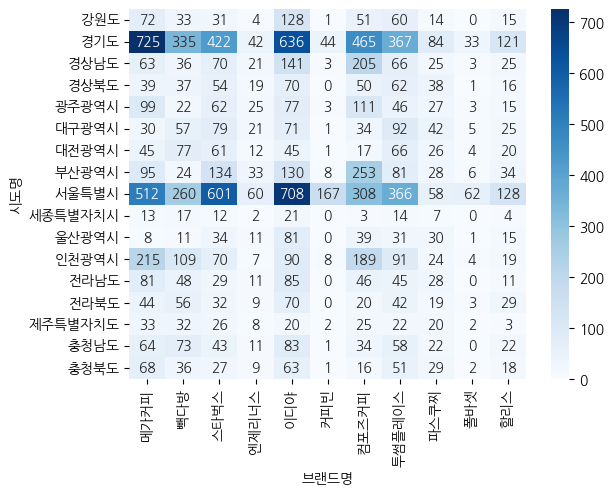

In [ ]:
sns.heatmap(df_brand.iloc[:17, :11], annot=True, cmap="Blues", fmt=".0f")

In [ ]:
df_gungu = df.pivot_table(index=["시도명", "시군구명"],
                                columns=["브랜드명"],
                                values="지점명",
                                aggfunc="count",
                                fill_value=0,
                                margins=True, margins_name="합계")
df_gungu

브랜드명       메가커피   빽다방  스타벅스  엔제리너스   이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스     합계
시도명  시군구명                                                                          
강원도  강릉시     14     6     6      0    22    0      7       5     2    0    1     63
     고성군      0     0     1      0     1    0      0       4     1    0    0      7
     동해시      4     1     2      0     4    0      2       3     1    0    2     19
     삼척시      2     1     0      0     5    0      1       5     1    0    0     15
     속초시      4     2     4      1    10    0      5       5     3    0    3     37
...         ...   ...   ...    ...   ...  ...    ...     ...   ...  ...  ...    ...
충청북도 증평군      2     1     1      0     3    0      0       2     1    0    0     10
     진천군      3     2     0      0     4    0      0       3     0    0    1     13
     청주시     41    27    19      3    39    1      8      31    21    2   13    205
     충주시     10     2     5      3     0    0      5       5     3    0    0     33
합계         2206  1263  1787    305  2519  240   1866    1560   521  129  520  12916

[229 rows x 12 columns]

In [ ]:
# 서울시 구별
df_s = df_gungu.loc["서울특별시"]
df_s = df_s.iloc[: , :12]
df_s.sort_values(by='합계', ascending=False) #합계 기준으로 정렬이 안됨.
df_s

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계
시군구명                                                                      
강남구     21   17    88      1   44   50     19      42    12   12   16  322
강동구     22   10    17      1   26    4     12      12     1    2    3  110
강북구     20    9     6      2   20    1      2       7     0    0    2   69
강서구     35   17    25      3   42    4     27      19     5    4    2  183
관악구     18   11    12      4   28    2     13       8     3    1    6  106
광진구     14   10    19      2   24    4     16      12     1    0    5  107
구로구     28   13    14      1   29    2     19      11     1    4    5  127
금천구     13    8    13      2   23    2     16      11     0    0    2   90
노원구     28   14    14      2   29    3      8      11     2    1    3  115
도봉구     16    6     4      0   24    0      9       7     1    0    0   67
동대문구    18    7    10      1   25    3     10       9     0    1    0   84
동작구     14    6    11      3   22    0      9       5     0    0    6   76
마포구     27   11    35      3   34    7     15      25     1    3   10  171
서대문구    17    6    22      2   20    2     12       9     5    0    8  103
서초구     12   12    48      1   29   20      8      28     7   10    9  184
성동구     16   12    15      0   22    0      9      11     2    0    3   90
성북구     27   16    15      0   31    2      8      10     0    0    1  110
송파구     32   17    34     10   39   14     19      30     1    4    6  206
양천구     26    6    17      0   26    2     18       9     3    0    5  112
영등포구    26   10    41      4   41   11     14      21     3    6    8  185
용산구      6    8    25      1   14    4      1       9     4    2    4   78
은평구     24   10    13      5   26    1     15       6     0    1    3  104
종로구     16    8    40      5   31   15      8      12     3    3   11  152
중구      17    6    55      6   30   13     11      32     3    8    9  190
중랑구     19   10     8      1   29    1     10      10     0    0    1   89

In [ ]:
#인덱스를 리셋하고 다시 정렬해보기
df_s = df_s.reset_index()
df_s = df_s.sort_values(by='합계', ascending=False) 
df_s

브랜드명  시군구명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계
0      강남구    21   17    88      1   44   50     19      42    12   12   16  322
17     송파구    32   17    34     10   39   14     19      30     1    4    6  206
23      중구    17    6    55      6   30   13     11      32     3    8    9  190
19    영등포구    26   10    41      4   41   11     14      21     3    6    8  185
14     서초구    12   12    48      1   29   20      8      28     7   10    9  184
3      강서구    35   17    25      3   42    4     27      19     5    4    2  183
12     마포구    27   11    35      3   34    7     15      25     1    3   10  171
22     종로구    16    8    40      5   31   15      8      12     3    3   11  152
6      구로구    28   13    14      1   29    2     19      11     1    4    5  127
8      노원구    28   14    14      2   29    3      8      11     2    1    3  115
18     양천구    26    6    17      0   26    2     18       9     3    0    5  112
16     성북구    27   16    15      0   31    2      8      10     0    0    1  110
1      강동구    22   10    17      1   26    4     12      12     1    2    3  110
5      광진구    14   10    19      2   24    4     16      12     1    0    5  107
4      관악구    18   11    12      4   28    2     13       8     3    1    6  106
21     은평구    24   10    13      5   26    1     15       6     0    1    3  104
13    서대문구    17    6    22      2   20    2     12       9     5    0    8  103
7      금천구    13    8    13      2   23    2     16      11     0    0    2   90
15     성동구    16   12    15      0   22    0      9      11     2    0    3   90
24     중랑구    19   10     8      1   29    1     10      10     0    0    1   89
10    동대문구    18    7    10      1   25    3     10       9     0    1    0   84
20     용산구     6    8    25      1   14    4      1       9     4    2    4   78
11     동작구    14    6    11      3   22    0      9       5     0    0    6   76
2      강북구    20    9     6      2   20    1      2       7     0    0    2   69
9      도봉구    16    6     4      0   24    0      9       7     1    0    0   67

In [ ]:
df_s.to_csv('seoul_coffee_0224.csv', index=False)

In [ ]:
df_s['시군구명'].to_list()

['강남구',
 '송파구',
 '중구',
 '영등포구',
 '서초구',
 '강서구',
 '마포구',
 '종로구',
 '구로구',
 '노원구',
 '양천구',
 '성북구',
 '강동구',
 '광진구',
 '관악구',
 '은평구',
 '서대문구',
 '금천구',
 '성동구',
 '중랑구',
 '동대문구',
 '용산구',
 '동작구',
 '강북구',
 '도봉구']

### 자치구 내에서 브랜드 비율 구하기

In [ ]:
brand_sum = df_s['합계'].to_list()
df_brand_sum = pd.DataFrame(brand_sum)
df_brand_sum

0
0   322
1   206
2   190
3   185
4   184
5   183
6   171
7   152
8   127
9   115
10  112
11  110
12  110
13  107
14  106
15  104
16  103
17   90
18   90
19   89
20   84
21   78
22   76
23   69
24   67

In [ ]:
a = []
b = df_s['합계'].to_list()

i = 0
while True:
    a.append(b)
    i += 1
    if i >= 12:
        break
a

[[322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,
  67],
 [322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,
  67],
 [322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,
  67],
 [322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,
  67],
 [322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,
  67],
 [322,
  206,
  190,
  185,
  184,
  183,
  171,
  152,
  127,
  115,
  112,
  110,
  110,
  107,
  106,
  104,
  103,
  90,
  90,
  89,
  84,
  78,
  76,
  69,

In [ ]:
df_s.columns

Index(['시군구명', '메가커피', '빽다방', '스타벅스', '엔제리너스', '이디야', '커피빈', '컴포즈커피', '투썸플레이스',
       '파스쿠찌', '폴바셋', '할리스', '합계'],
      dtype='object', name='브랜드명')

In [ ]:
df_sum = pd.DataFrame(a).T
#컬럼명 통일시키기
df_sum.columns = ['메가커피', '빽다방', '스타벅스', '엔제리너스', '이디야', '커피빈', '컴포즈커피', '투썸플레이스',
       '파스쿠찌', '폴바셋', '할리스', '합계']

In [ ]:
df_sum

메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계
0    322  322   322    322  322  322    322     322   322  322  322  322
1    206  206   206    206  206  206    206     206   206  206  206  206
2    190  190   190    190  190  190    190     190   190  190  190  190
3    185  185   185    185  185  185    185     185   185  185  185  185
4    184  184   184    184  184  184    184     184   184  184  184  184
5    183  183   183    183  183  183    183     183   183  183  183  183
6    171  171   171    171  171  171    171     171   171  171  171  171
7    152  152   152    152  152  152    152     152   152  152  152  152
8    127  127   127    127  127  127    127     127   127  127  127  127
9    115  115   115    115  115  115    115     115   115  115  115  115
10   112  112   112    112  112  112    112     112   112  112  112  112
11   110  110   110    110  110  110    110     110   110  110  110  110
12   110  110   110    110  110  110    110     110   110  110  110  110
13   107  107   107    107  107  107    107     107   107  107  107  107
14   106  106   106    106  106  106    106     106   106  106  106  106
15   104  104   104    104  104  104    104     104   104  104  104  104
16   103  103   103    103  103  103    103     103   103  103  103  103
17    90   90    90     90   90   90     90      90    90   90   90   90
18    90   90    90     90   90   90     90      90    90   90   90   90
19    89   89    89     89   89   89     89      89    89   89   89   89
20    84   84    84     84   84   84     84      84    84   84   84   84
21    78   78    78     78   78   78     78      78    78   78   78   78
22    76   76    76     76   76   76     76      76    76   76   76   76
23    69   69    69     69   69   69     69      69    69   69   69   69
24    67   67    67     67   67   67     67      67    67   67   67   67

In [ ]:
ratio = df_s.iloc[: , 1:13].reset_index(drop=True)
ratio = round(ratio.div(df_sum),3)
ratio

브랜드명   메가커피    빽다방   스타벅스  엔제리너스    이디야    커피빈  컴포즈커피  투썸플레이스   파스쿠찌    폴바셋    할리스   합계
0     0.065  0.053  0.273  0.003  0.137  0.155  0.059   0.130  0.037  0.037  0.050  1.0
1     0.155  0.083  0.165  0.049  0.189  0.068  0.092   0.146  0.005  0.019  0.029  1.0
2     0.089  0.032  0.289  0.032  0.158  0.068  0.058   0.168  0.016  0.042  0.047  1.0
3     0.141  0.054  0.222  0.022  0.222  0.059  0.076   0.114  0.016  0.032  0.043  1.0
4     0.065  0.065  0.261  0.005  0.158  0.109  0.043   0.152  0.038  0.054  0.049  1.0
5     0.191  0.093  0.137  0.016  0.230  0.022  0.148   0.104  0.027  0.022  0.011  1.0
6     0.158  0.064  0.205  0.018  0.199  0.041  0.088   0.146  0.006  0.018  0.058  1.0
7     0.105  0.053  0.263  0.033  0.204  0.099  0.053   0.079  0.020  0.020  0.072  1.0
8     0.220  0.102  0.110  0.008  0.228  0.016  0.150   0.087  0.008  0.031  0.039  1.0
9     0.243  0.122  0.122  0.017  0.252  0.026  0.070   0.096  0.017  0.009  0.026  1.0
10    0.232  0.054  0.152  0.000  0.232  0.018  0.161   0.080  0.027  0.000  0.045  1.0
11    0.245  0.145  0.136  0.000  0.282  0.018  0.073   0.091  0.000  0.000  0.009  1.0
12    0.200  0.091  0.155  0.009  0.236  0.036  0.109   0.109  0.009  0.018  0.027  1.0
13    0.131  0.093  0.178  0.019  0.224  0.037  0.150   0.112  0.009  0.000  0.047  1.0
14    0.170  0.104  0.113  0.038  0.264  0.019  0.123   0.075  0.028  0.009  0.057  1.0
15    0.231  0.096  0.125  0.048  0.250  0.010  0.144   0.058  0.000  0.010  0.029  1.0
16    0.165  0.058  0.214  0.019  0.194  0.019  0.117   0.087  0.049  0.000  0.078  1.0
17    0.144  0.089  0.144  0.022  0.256  0.022  0.178   0.122  0.000  0.000  0.022  1.0
18    0.178  0.133  0.167  0.000  0.244  0.000  0.100   0.122  0.022  0.000  0.033  1.0
19    0.213  0.112  0.090  0.011  0.326  0.011  0.112   0.112  0.000  0.000  0.011  1.0
20    0.214  0.083  0.119  0.012  0.298  0.036  0.119   0.107  0.000  0.012  0.000  1.0
21    0.077  0.103  0.321  0.013  0.179  0.051  0.013   0.115  0.051  0.026  0.051  1.0
22    0.184  0.079  0.145  0.039  0.289  0.000  0.118   0.066  0.000  0.000  0.079  1.0
23    0.290  0.130  0.087  0.029  0.290  0.014  0.029   0.101  0.000  0.000  0.029  1.0
24    0.239  0.090  0.060  0.000  0.358  0.000  0.134   0.104  0.015  0.000  0.000  1.0

In [ ]:
#가중치 반영 
#중위값인 엔제리너스를 1로 놓고
# ['커피빈'] * 1.11 + df_gungu['폴바셋'] * 1.03+ df_gungu["스타벅스"]+ df_gungu['투썸플레이스']+ df_gungu['엔제리너스']
# + df_gungu['할리스']+ df_gungu['파스쿠찌'] * 0.92+ df_gungu['이디야'] * 0.66+ df_gungu['빽다방'] * 0.3
#+ df_gungu["메가커피"] * 0.21+ df_gungu['컴포즈커피'] * 0.21]

l = []
m = [0.21, 0.3, 1, 1, 0.66, 1.11, 0.21, 1, 0.92, 1.03, 1, 1]
    

i = 0
while True:
    l.append(m)
    i += 1
    if i >= 25:
        break
        
r = pd.DataFrame(l)

#컬럼명 통일시키기
r.columns = ['메가커피', '빽다방', '스타벅스', '엔제리너스', '이디야', '커피빈', '컴포즈커피', '투썸플레이스',
       '파스쿠찌', '폴바셋', '할리스', '합계']
r

메가커피  빽다방  스타벅스  엔제리너스   이디야   커피빈  컴포즈커피  투썸플레이스  파스쿠찌   폴바셋  할리스  합계
0   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
1   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
2   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
3   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
4   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
5   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
6   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
7   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
8   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
9   0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
10  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
11  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
12  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
13  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
14  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
15  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
16  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
17  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
18  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
19  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
20  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
21  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
22  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
23  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1
24  0.21  0.3     1      1  0.66  1.11   0.21       1  0.92  1.03    1   1

In [ ]:
cff_index_s = round(ratio.mul(r),3)
cff_index_s['합계'] = cff_index_s.sum(axis=1) -1
cff_index_s['시군구명'] = ['강남구', '송파구', '중구','영등포구','서초구', '강서구', '마포구', '종로구', '구로구',
                       '노원구','양천구','성북구', '강동구','광진구', '관악구','은평구','서대문구','금천구','성동구',
                       '중랑구','동대문구','용산구','동작구','강북구','도봉구']
cff_index_s = cff_index_s[['시군구명','메가커피', '빽다방', '스타벅스', '엔제리너스', '이디야', '커피빈', '컴포즈커피', '투썸플레이스',
                          '파스쿠찌', '폴바셋', '할리스', '합계']]
cff_index_s = cff_index_s.sort_values('합계', ascending=False)
cff_index_s

브랜드명  시군구명   메가커피    빽다방   스타벅스  엔제리너스    이디야    커피빈  컴포즈커피  투썸플레이스   파스쿠찌    폴바셋    할리스     합계
0      강남구  0.014  0.016  0.273  0.003  0.090  0.172  0.012   0.130  0.034  0.038  0.050  0.832
4      서초구  0.014  0.020  0.261  0.005  0.104  0.121  0.009   0.152  0.035  0.056  0.049  0.826
2       중구  0.019  0.010  0.289  0.032  0.104  0.075  0.012   0.168  0.015  0.043  0.047  0.814
21     용산구  0.016  0.031  0.321  0.013  0.118  0.057  0.003   0.115  0.047  0.027  0.051  0.799
7      종로구  0.022  0.016  0.263  0.033  0.135  0.110  0.011   0.079  0.018  0.021  0.072  0.780
3     영등포구  0.030  0.016  0.222  0.022  0.147  0.065  0.016   0.114  0.015  0.033  0.043  0.723
6      마포구  0.033  0.019  0.205  0.018  0.131  0.046  0.018   0.146  0.006  0.019  0.058  0.699
1      송파구  0.033  0.025  0.165  0.049  0.125  0.075  0.019   0.146  0.005  0.020  0.029  0.691
16    서대문구  0.035  0.017  0.214  0.019  0.128  0.021  0.025   0.087  0.045  0.000  0.078  0.669
13     광진구  0.028  0.028  0.178  0.019  0.148  0.041  0.032   0.112  0.008  0.000  0.047  0.641
12     강동구  0.042  0.027  0.155  0.009  0.156  0.040  0.023   0.109  0.008  0.019  0.027  0.615
22     동작구  0.039  0.024  0.145  0.039  0.191  0.000  0.025   0.066  0.000  0.000  0.079  0.608
14     관악구  0.036  0.031  0.113  0.038  0.174  0.021  0.026   0.075  0.026  0.009  0.057  0.606
18     성동구  0.037  0.040  0.167  0.000  0.161  0.000  0.021   0.122  0.020  0.000  0.033  0.601
17     금천구  0.030  0.027  0.144  0.022  0.169  0.024  0.037   0.122  0.000  0.000  0.022  0.597
5      강서구  0.040  0.028  0.137  0.016  0.152  0.024  0.031   0.104  0.025  0.023  0.011  0.591
9      노원구  0.051  0.037  0.122  0.017  0.166  0.029  0.015   0.096  0.016  0.009  0.026  0.584
20    동대문구  0.045  0.025  0.119  0.012  0.197  0.040  0.025   0.107  0.000  0.012  0.000  0.582
10     양천구  0.049  0.016  0.152  0.000  0.153  0.020  0.034   0.080  0.025  0.000  0.045  0.574
8      구로구  0.046  0.031  0.110  0.008  0.150  0.018  0.032   0.087  0.007  0.032  0.039  0.560
23     강북구  0.061  0.039  0.087  0.029  0.191  0.016  0.006   0.101  0.000  0.000  0.029  0.559
15     은평구  0.049  0.029  0.125  0.048  0.165  0.011  0.030   0.058  0.000  0.010  0.029  0.554
19     중랑구  0.045  0.034  0.090  0.011  0.215  0.012  0.024   0.112  0.000  0.000  0.011  0.554
11     성북구  0.051  0.044  0.136  0.000  0.186  0.020  0.015   0.091  0.000  0.000  0.009  0.552
24     도봉구  0.050  0.027  0.060  0.000  0.236  0.000  0.028   0.104  0.014  0.000  0.000  0.519

In [ ]:
cf_s = cff_index_s.loc[: , ['시군구명','합계']].reset_index(drop=True)
cf_s.set_index('시군구명', inplace=True)
cf_s

브랜드명     합계
시군구명       
강남구   0.832
서초구   0.826
중구    0.814
용산구   0.799
종로구   0.780
영등포구  0.723
마포구   0.699
송파구   0.691
서대문구  0.669
광진구   0.641
강동구   0.615
동작구   0.608
관악구   0.606
성동구   0.601
금천구   0.597
강서구   0.591
노원구   0.584
동대문구  0.582
양천구   0.574
구로구   0.560
강북구   0.559
은평구   0.554
중랑구   0.554
성북구   0.552
도봉구   0.519

In [ ]:
## ㅋ히트맵 그려보기

In [ ]:
ratio.index = ['강남구', '송파구', '중구','영등포구','서초구', '강서구', '마포구', '종로구', '구로구',
                       '노원구','양천구','성북구', '강동구','광진구', '관악구','은평구','서대문구','금천구','성동구',
                       '중랑구','동대문구','용산구','동작구','강북구','도봉구']
ratio

브랜드명   메가커피    빽다방   스타벅스  엔제리너스    이디야    커피빈  컴포즈커피  투썸플레이스   파스쿠찌    폴바셋    할리스   합계
강남구   0.065  0.053  0.273  0.003  0.137  0.155  0.059   0.130  0.037  0.037  0.050  1.0
송파구   0.155  0.083  0.165  0.049  0.189  0.068  0.092   0.146  0.005  0.019  0.029  1.0
중구    0.089  0.032  0.289  0.032  0.158  0.068  0.058   0.168  0.016  0.042  0.047  1.0
영등포구  0.141  0.054  0.222  0.022  0.222  0.059  0.076   0.114  0.016  0.032  0.043  1.0
서초구   0.065  0.065  0.261  0.005  0.158  0.109  0.043   0.152  0.038  0.054  0.049  1.0
강서구   0.191  0.093  0.137  0.016  0.230  0.022  0.148   0.104  0.027  0.022  0.011  1.0
마포구   0.158  0.064  0.205  0.018  0.199  0.041  0.088   0.146  0.006  0.018  0.058  1.0
종로구   0.105  0.053  0.263  0.033  0.204  0.099  0.053   0.079  0.020  0.020  0.072  1.0
구로구   0.220  0.102  0.110  0.008  0.228  0.016  0.150   0.087  0.008  0.031  0.039  1.0
노원구   0.243  0.122  0.122  0.017  0.252  0.026  0.070   0.096  0.017  0.009  0.026  1.0
양천구   0.232  0.054  0.152  0.000  0.232  0.018  0.161   0.080  0.027  0.000  0.045  1.0
성북구   0.245  0.145  0.136  0.000  0.282  0.018  0.073   0.091  0.000  0.000  0.009  1.0
강동구   0.200  0.091  0.155  0.009  0.236  0.036  0.109   0.109  0.009  0.018  0.027  1.0
광진구   0.131  0.093  0.178  0.019  0.224  0.037  0.150   0.112  0.009  0.000  0.047  1.0
관악구   0.170  0.104  0.113  0.038  0.264  0.019  0.123   0.075  0.028  0.009  0.057  1.0
은평구   0.231  0.096  0.125  0.048  0.250  0.010  0.144   0.058  0.000  0.010  0.029  1.0
서대문구  0.165  0.058  0.214  0.019  0.194  0.019  0.117   0.087  0.049  0.000  0.078  1.0
금천구   0.144  0.089  0.144  0.022  0.256  0.022  0.178   0.122  0.000  0.000  0.022  1.0
성동구   0.178  0.133  0.167  0.000  0.244  0.000  0.100   0.122  0.022  0.000  0.033  1.0
중랑구   0.213  0.112  0.090  0.011  0.326  0.011  0.112   0.112  0.000  0.000  0.011  1.0
동대문구  0.214  0.083  0.119  0.012  0.298  0.036  0.119   0.107  0.000  0.012  0.000  1.0
용산구   0.077  0.103  0.321  0.013  0.179  0.051  0.013   0.115  0.051  0.026  0.051  1.0
동작구   0.184  0.079  0.145  0.039  0.289  0.000  0.118   0.066  0.000  0.000  0.079  1.0
강북구   0.290  0.130  0.087  0.029  0.290  0.014  0.029   0.101  0.000  0.000  0.029  1.0
도봉구   0.239  0.090  0.060  0.000  0.358  0.000  0.134   0.104  0.015  0.000  0.000  1.0

<AxesSubplot:ylabel='브랜드명'>

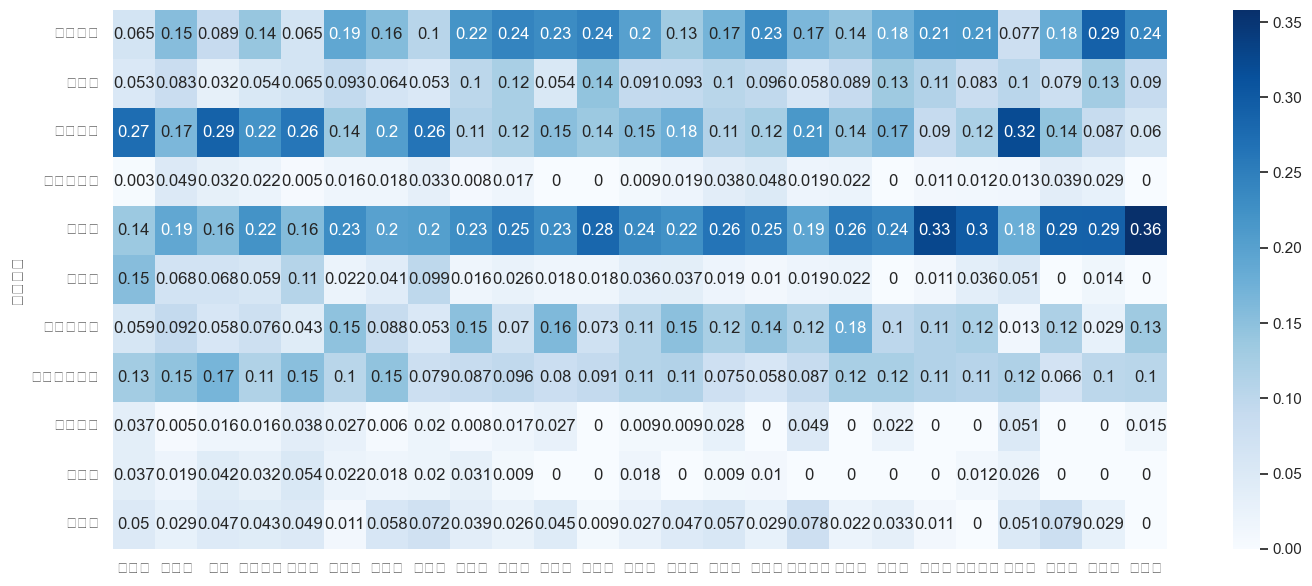

In [ ]:
fig = plt.figure(figsize=(17, 7))
sns.heatmap(ratio.iloc[:, :11].T, annot=True, cmap="Blues")

In [ ]:
ratio.iloc[:, :11].style.background_gradient(cmap='YlOrRd')

<AxesSubplot:xlabel='브랜드명', ylabel='시군구명'>

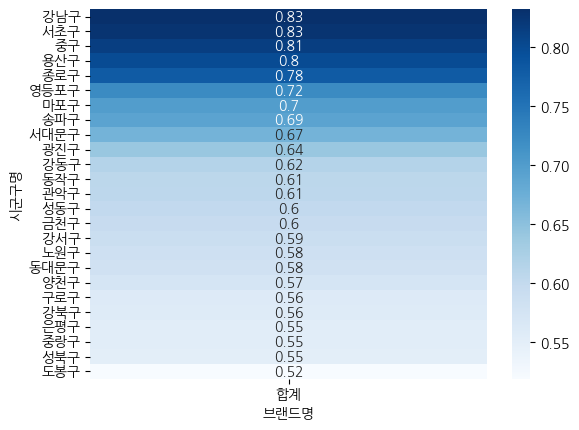

In [ ]:
sns.heatmap(cf_s, annot=True, cmap="Blues")

### 커피지수는 간단한 시각화
- 엑셀파일을 Dataframe으로 가져와서 서울 구별로 시각화를 해보기
- 지도에 구별로 지수 나타내기

In [ ]:
ratio = glob('seoul*.xlsx')
ratio

['seoul_coffee_ratio.xlsx', 'seoul_coffee_ratio2.xlsx']

In [ ]:
cf_index = pd.read_excel(ratio[0]).sort_values('합계', ascending=False)
cf_index

시군구   메가커피    빽다방   스타벅스  엔제리너스    이디야    커피빈  컴포즈커피  투썸플레이스   파스쿠찌    폴바셋    할리스     합계
0    강남구  0.014  0.016  0.273  0.003  0.090  0.172  0.012   0.130  0.034  0.038  0.050  0.832
1    서초구  0.014  0.020  0.261  0.005  0.104  0.121  0.009   0.152  0.035  0.056  0.049  0.826
2     중구  0.019  0.010  0.289  0.032  0.104  0.075  0.012   0.168  0.015  0.043  0.047  0.814
3    용산구  0.016  0.031  0.321  0.013  0.118  0.057  0.003   0.115  0.047  0.027  0.051  0.799
4    종로구  0.022  0.016  0.263  0.033  0.135  0.110  0.011   0.079  0.018  0.021  0.072  0.780
5   영등포구  0.030  0.016  0.222  0.022  0.147  0.065  0.016   0.114  0.015  0.033  0.043  0.723
6    마포구  0.033  0.019  0.205  0.018  0.131  0.046  0.018   0.146  0.006  0.019  0.058  0.699
7    송파구  0.033  0.025  0.165  0.049  0.125  0.075  0.019   0.146  0.005  0.020  0.029  0.691
8   서대문구  0.035  0.017  0.214  0.019  0.128  0.021  0.025   0.087  0.045  0.000  0.078  0.669
9     평균  0.036  0.026  0.170  0.018  0.156  0.042  0.021   0.107  0.015  0.015  0.038  0.644
10   광진구  0.028  0.028  0.178  0.019  0.148  0.041  0.032   0.112  0.008  0.000  0.047  0.641
11   강동구  0.042  0.027  0.155  0.009  0.156  0.040  0.023   0.109  0.008  0.019  0.027  0.615
12   동작구  0.039  0.024  0.145  0.039  0.191  0.000  0.025   0.066  0.000  0.000  0.079  0.608
13   관악구  0.036  0.031  0.113  0.038  0.174  0.021  0.026   0.075  0.026  0.009  0.057  0.606
14   성동구  0.037  0.040  0.167  0.000  0.161  0.000  0.021   0.122  0.020  0.000  0.033  0.601
15   금천구  0.030  0.027  0.144  0.022  0.169  0.024  0.037   0.122  0.000  0.000  0.022  0.597
16   강서구  0.040  0.028  0.137  0.016  0.152  0.024  0.031   0.104  0.025  0.023  0.011  0.591
17   노원구  0.051  0.037  0.122  0.017  0.166  0.029  0.015   0.096  0.016  0.009  0.026  0.584
18  동대문구  0.045  0.025  0.119  0.012  0.197  0.040  0.025   0.107  0.000  0.012  0.000  0.582
19   양천구  0.049  0.016  0.152  0.000  0.153  0.020  0.034   0.080  0.025  0.000  0.045  0.574
20   구로구  0.046  0.031  0.110  0.008  0.150  0.018  0.032   0.087  0.007  0.032  0.039  0.560
21   강북구  0.061  0.039  0.087  0.029  0.191  0.016  0.006   0.101  0.000  0.000  0.029  0.559
22   은평구  0.049  0.029  0.125  0.048  0.165  0.011  0.030   0.058  0.000  0.010  0.029  0.554
23   중랑구  0.045  0.034  0.090  0.011  0.215  0.012  0.024   0.112  0.000  0.000  0.011  0.554
24   성북구  0.051  0.044  0.136  0.000  0.186  0.020  0.015   0.091  0.000  0.000  0.009  0.552
25   도봉구  0.050  0.027  0.060  0.000  0.236  0.000  0.028   0.104  0.014  0.000  0.000  0.519

In [ ]:
#행정구역 나누는 정보가 하나하나 필요함
south_korea_url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json"
seoul_geo_url = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
print(south_korea_url)
print(seoul_geo_url)

https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json
https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json


In [ ]:
# 전국 시도 GeoJSON 
with urlopen(south_korea_url) as response:
    ko_geojson = json.load(response)

ko_geojson["features"][0]["properties"] #행정구역 위,경도 값의 메타정보

{'name': '서울특별시', 'base_year': '2018', 'name_eng': 'Seoul', 'code': '11'}

In [ ]:
# 서울 시도 GeoJSON 
with urlopen(seoul_geo_url) as response:
    seoul_geojson = json.load(response)

seoul_geojson["features"][0]["properties"]

{'code': '11250',
 'name': '강동구',
 'name_eng': 'Gangdong-gu',
 'base_year': '2013'}

In [ ]:
latlong = [37.559819, 126.963895]
f_map = folium.Map(latlong, zoom_start=11)

folium.Choropleth(
    geo_data=seoul_geojson,
    name='choropleth',
    data=cf_index,
    columns=['시군구', '합계'],
    key_on='feature.properties.name',
    fill_color='Greys',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='커피지수'
).add_to(f_map)

f_map

In [ ]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geojson,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=seoul_geojson,
             data=cf_index,
             columns=['시군구', '합계'],
             fill_color='Blues',  
             fill_opacity=0.7,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="커피지수"
            )
m

## 커피지수

In [ ]:
cf = pd.read_excel('seoul_coffee_ratio.xlsx')
cf = cf.drop(9)
cf

시군구명   커피지수
0    강남구  0.832
1    서초구  0.826
2     중구  0.814
3    용산구  0.799
4    종로구  0.780
5   영등포구  0.723
6    마포구  0.699
7    송파구  0.691
8   서대문구  0.669
10   광진구  0.641
11   강동구  0.615
12   동작구  0.608
13   관악구  0.606
14   성동구  0.601
15   금천구  0.597
16   강서구  0.591
17   노원구  0.584
18  동대문구  0.582
19   양천구  0.574
20   구로구  0.560
21   강북구  0.559
22   은평구  0.554
23   중랑구  0.554
24   성북구  0.552
25   도봉구  0.519

In [ ]:
cf_barh = cf.sort_values('커피지수')
cf_barh.head()

시군구명   커피지수
25  도봉구  0.519
24  성북구  0.552
23  중랑구  0.554
22  은평구  0.554
21  강북구  0.559

### 그래프

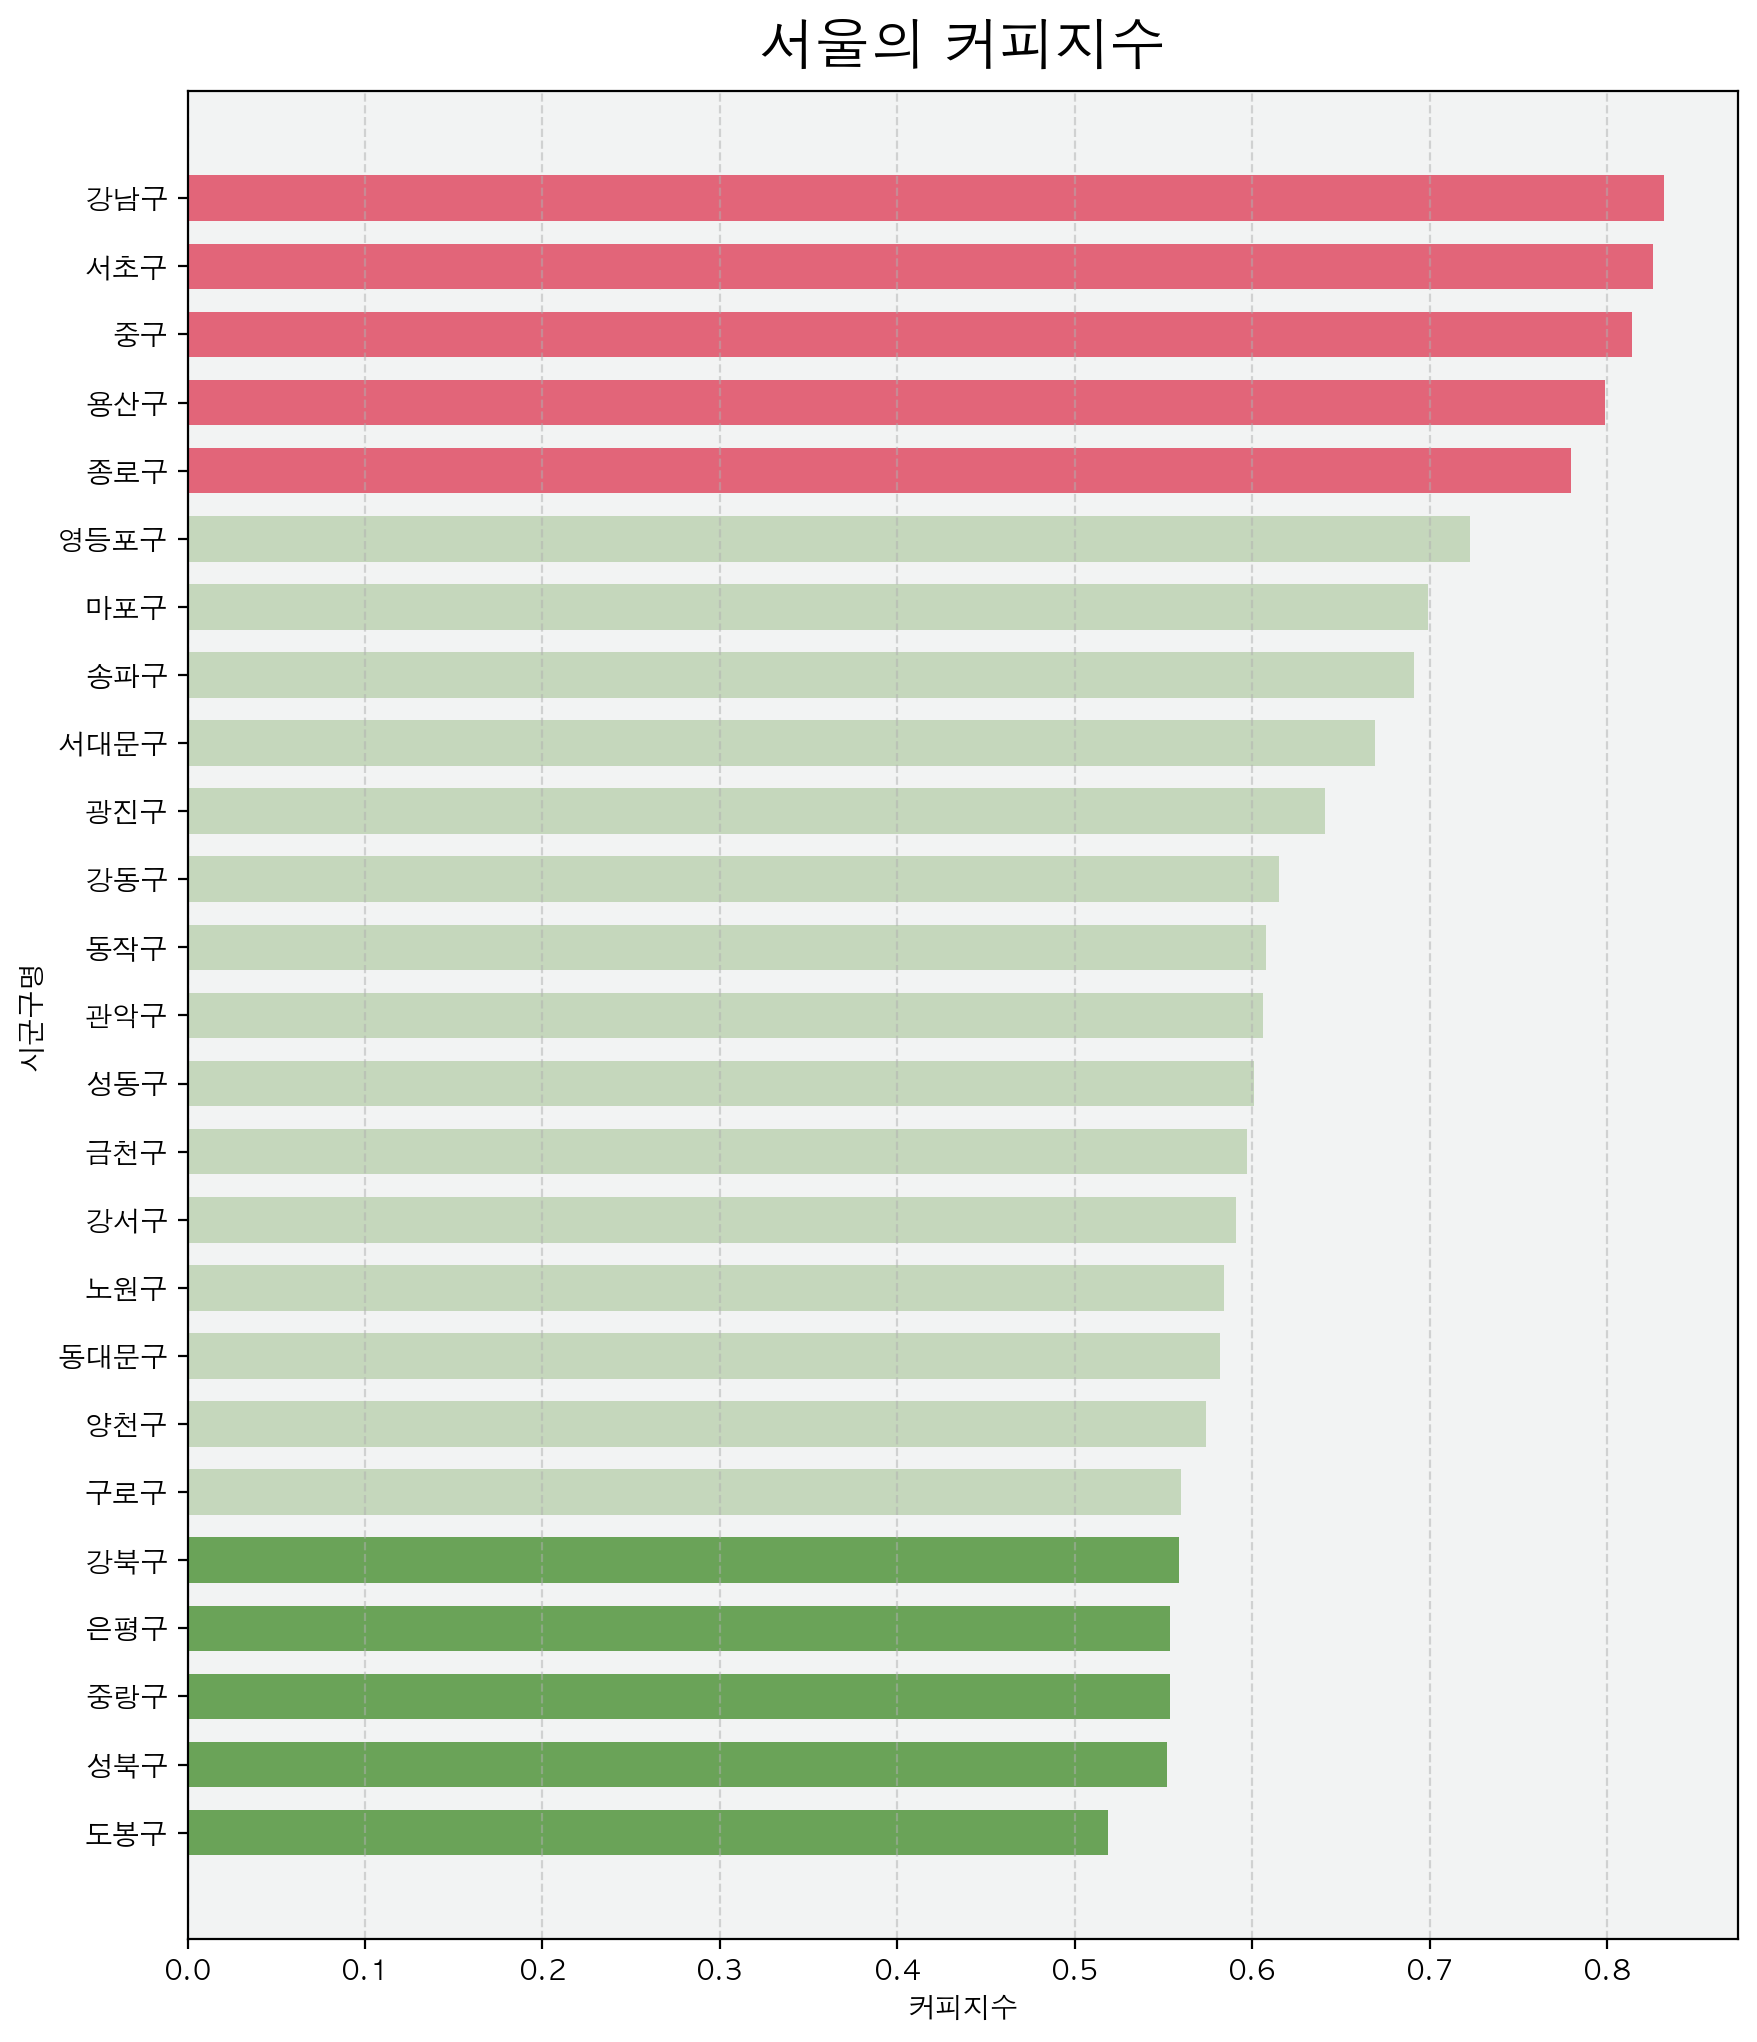

In [ ]:
#barh
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#488f31', '#488f31', '#488f31', '#488f31', '#488f31','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#de425b','#de425b','#de425b','#de425b','#de425b']
plt.barh(cf_barh['시군구명'], cf_barh['커피지수'], color=colors, alpha=0.8, height=0.67)

plt.xlabel("커피지수")
plt.ylabel("시군구명")
plt.title('서울의 커피지수', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='x', alpha=0.5, linestyle='--')
plt.show()

In [ ]:
colors = ['#bad0af' for i in range(15)]
colors

['#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af',
 '#bad0af']

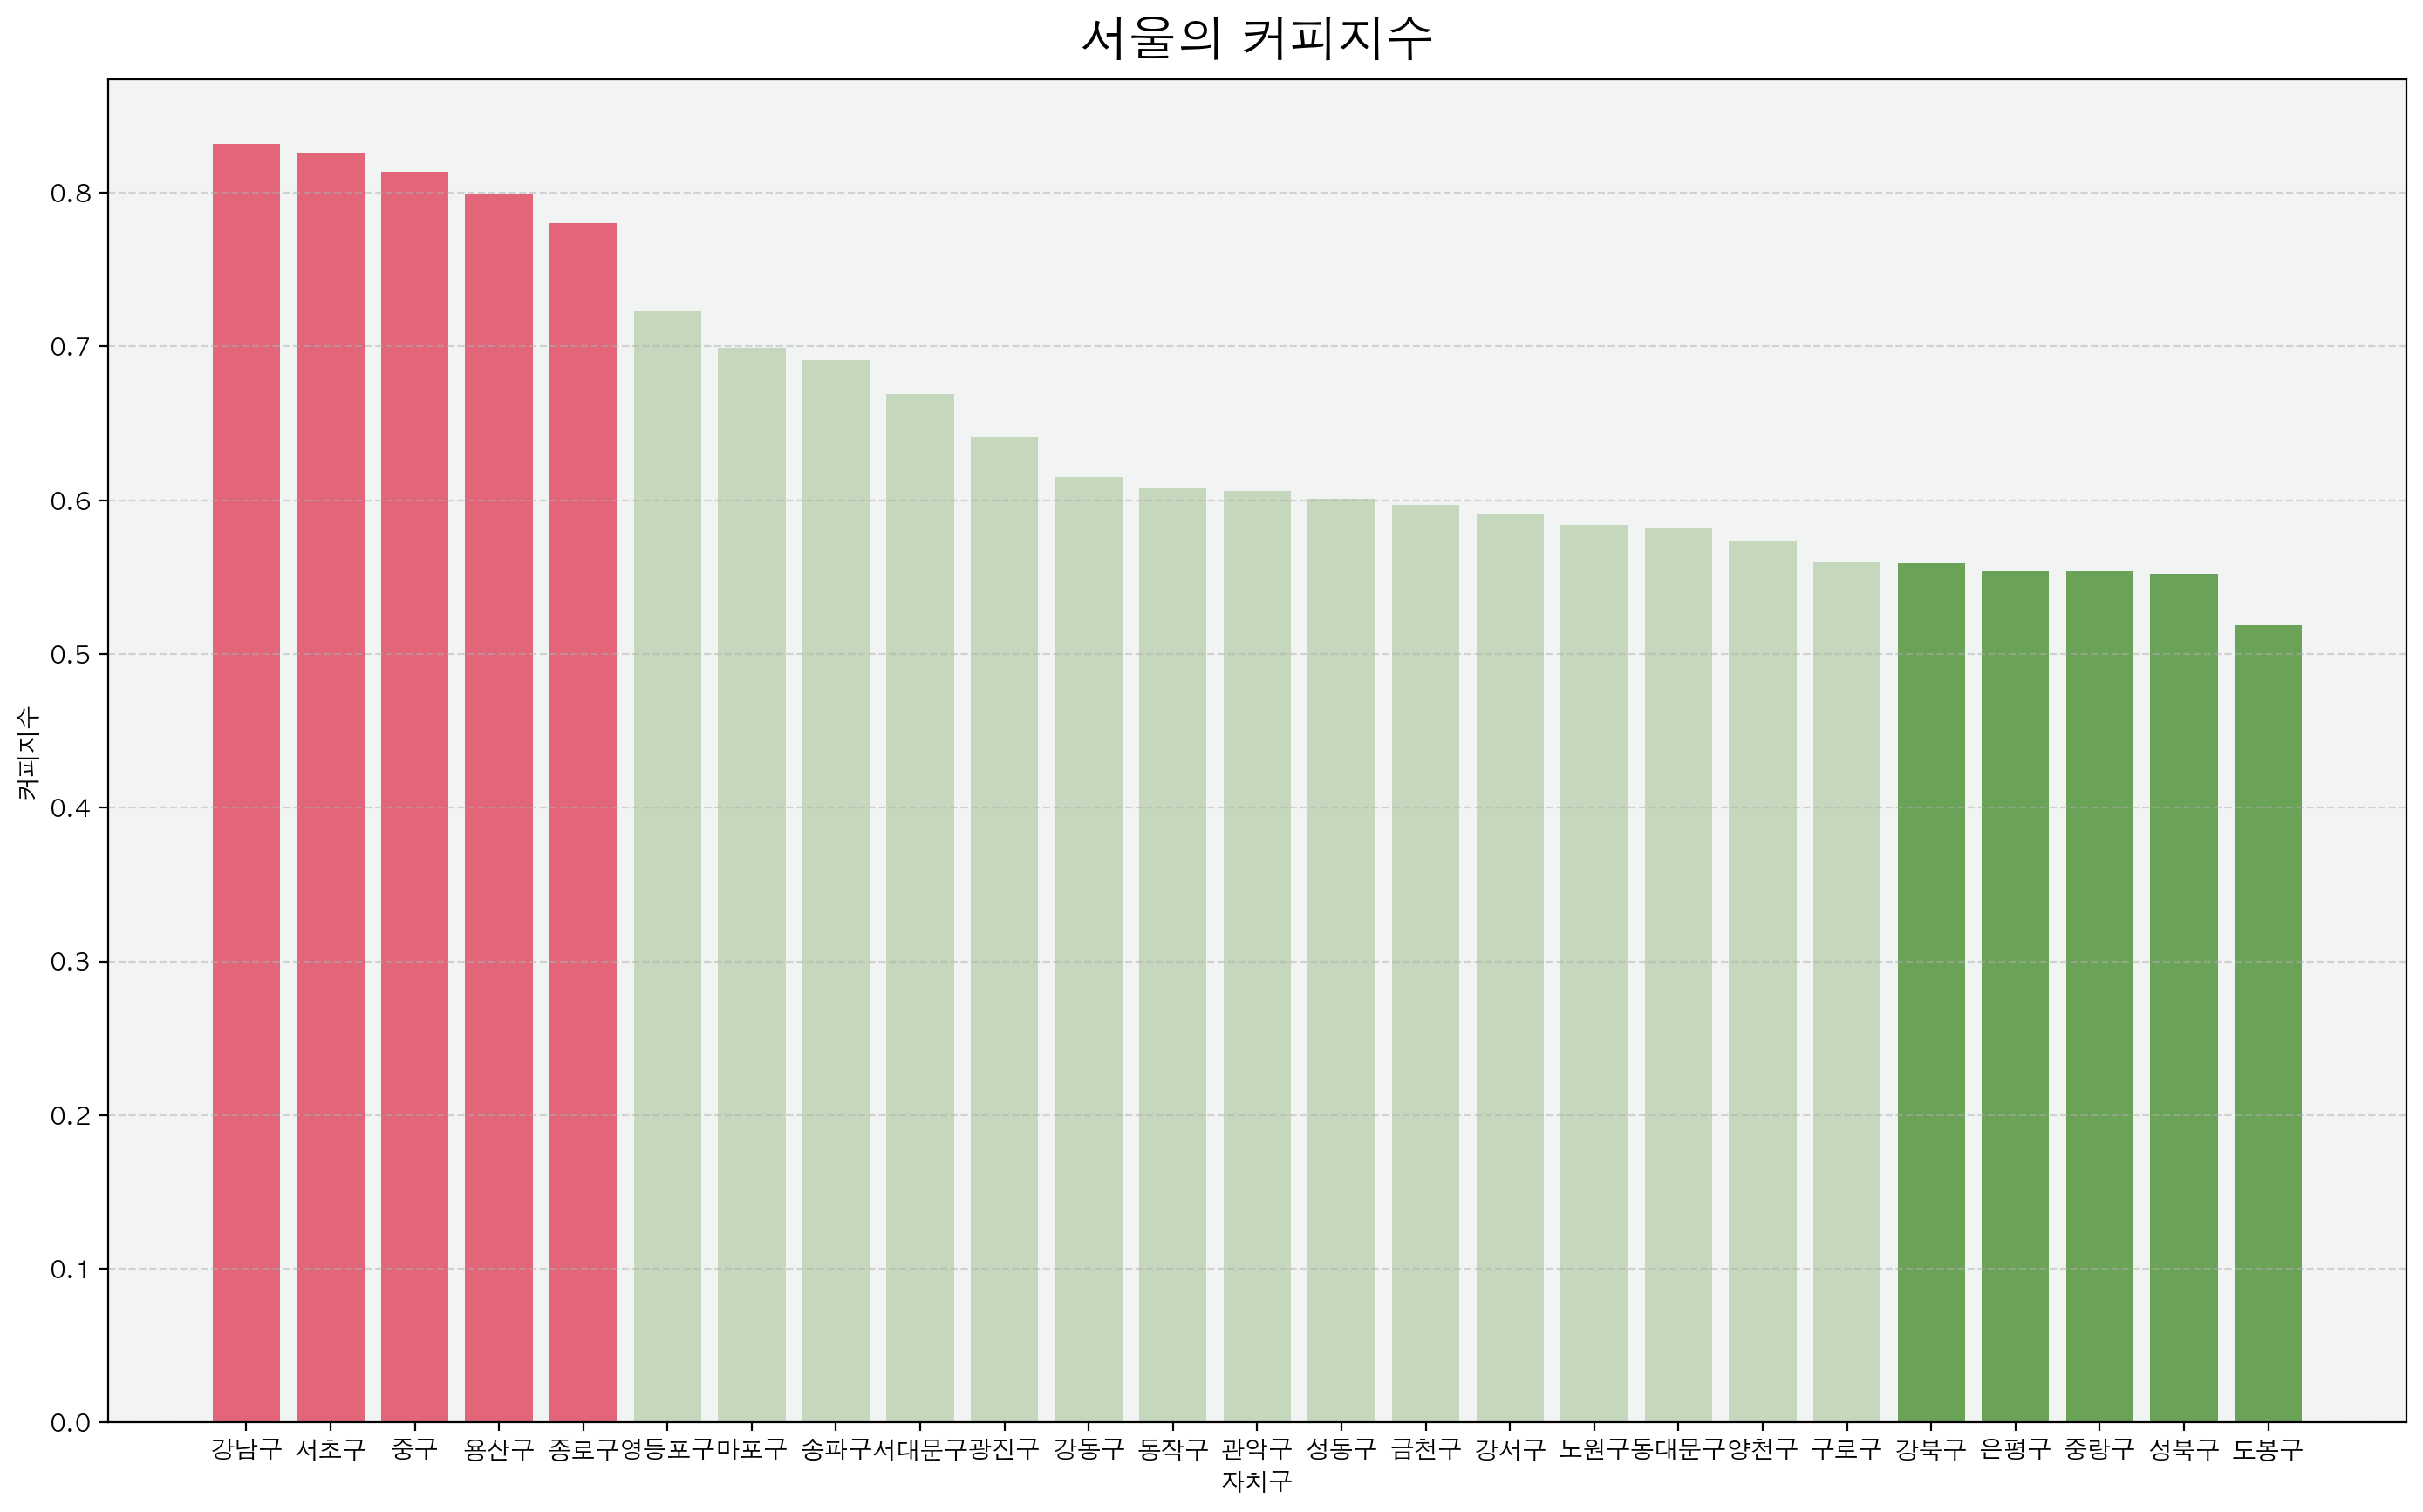

In [ ]:
#bar
#color='#de425b'
#color='#488f31'
#color='#bad0af'
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#de425b','#de425b','#de425b','#de425b','#de425b','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#488f31', '#488f31', '#488f31', '#488f31', '#488f31']
plt.bar(cf['시군구명'], cf['커피지수'], color=colors, alpha=0.8)

plt.xlabel("자치구")
plt.ylabel("커피지수")
plt.title('서울의 커피지수', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

## 부가가치

In [ ]:
va = pd.read_csv('seoul_VA_5years.csv')
va.columns = ['시군구명', '2020', '2019', '2018', '2017', '2016']
va['2020'] = va['2020'].str.replace(",", "").astype('int')
va['2019'] = va['2019'].str.replace(",", "").astype('int')
va['2018'] = va['2018'].str.replace(",", "").astype('int')
va['2017'] = va['2017'].str.replace(",", "").astype('int')
va['2016'] = va['2016'].str.replace(",", "").astype('int')
va = va.loc[1:]
va

시군구명      2020      2019      2018      2017      2016
1    종로구  30006285  30808612  28813966  28597810  27557346
2     중구  49217070  48960286  48713496  46311293  47766901
3    용산구  11729287  11652457  11258567  10738075   9632663
4    성동구  11272209  11101959  10652839   9819340   9780132
5    광진구   5959124   6099745   5870178   5662708   5647054
6   동대문구   6767289    359582   6719840   6612208   6609557
7    중랑구   4367195   4366141   4102403   3938464   3803053
8    성북구   5772190   5742356   5655401   5525404   5382719
9    강북구   3074364   3039338   2958494   2817683   2726714
10   도봉구   3231378   3158453   3106159   3071379   2880584
11   노원구   5977652   6188770   5959440   5814727   5521741
12   은평구   4681499   4553978   4392345   4163529   3978106
13  서대문구   7857484   8001568   7712929   7589397   7294336
14   마포구  18770337  18567745  18061295  17361845  17631257
15   양천구   6485414   6620684   6443097   6189215   5968686
16   강서구  15550220  16129479  16215932  15388675  10503866
17   구로구  12814107  13011941  12737398  12235065  11537223
18   금천구  15822501  16215064  15880763  15159199  14643145
19  영등포구  34464003  32529971  30597561  28759947  27621324
20   동작구   6125708   6069330   5896433   5795657   5540291
21   관악구   5714406   5561824   5432640   5351735   5241288
22   서초구  33237223  32761926  32324277  31019659  29798650
23   강남구  67336899  65295935  62657810  59141893  58098767
24   송파구  27853859  27663368  26315325  24613200  22805171
25   강동구   8528269   8541950   8064467   7510737   7235494

In [ ]:
va_2020 = va.iloc[: , :2]
va_2020 = va_2020.sort_values('2020', ascending=False)
va_2020.columns = ['시군구명', '총부가가치']
va_2020.head()

시군구명     총부가가치
23   강남구  67336899
2     중구  49217070
19  영등포구  34464003
22   서초구  33237223
1    종로구  30006285

In [ ]:
va_barh = va_2020.sort_values('총부가가치')
va_barh.head()

시군구명    총부가가치
9   강북구  3074364
10  도봉구  3231378
7   중랑구  4367195
12  은평구  4681499
21  관악구  5714406

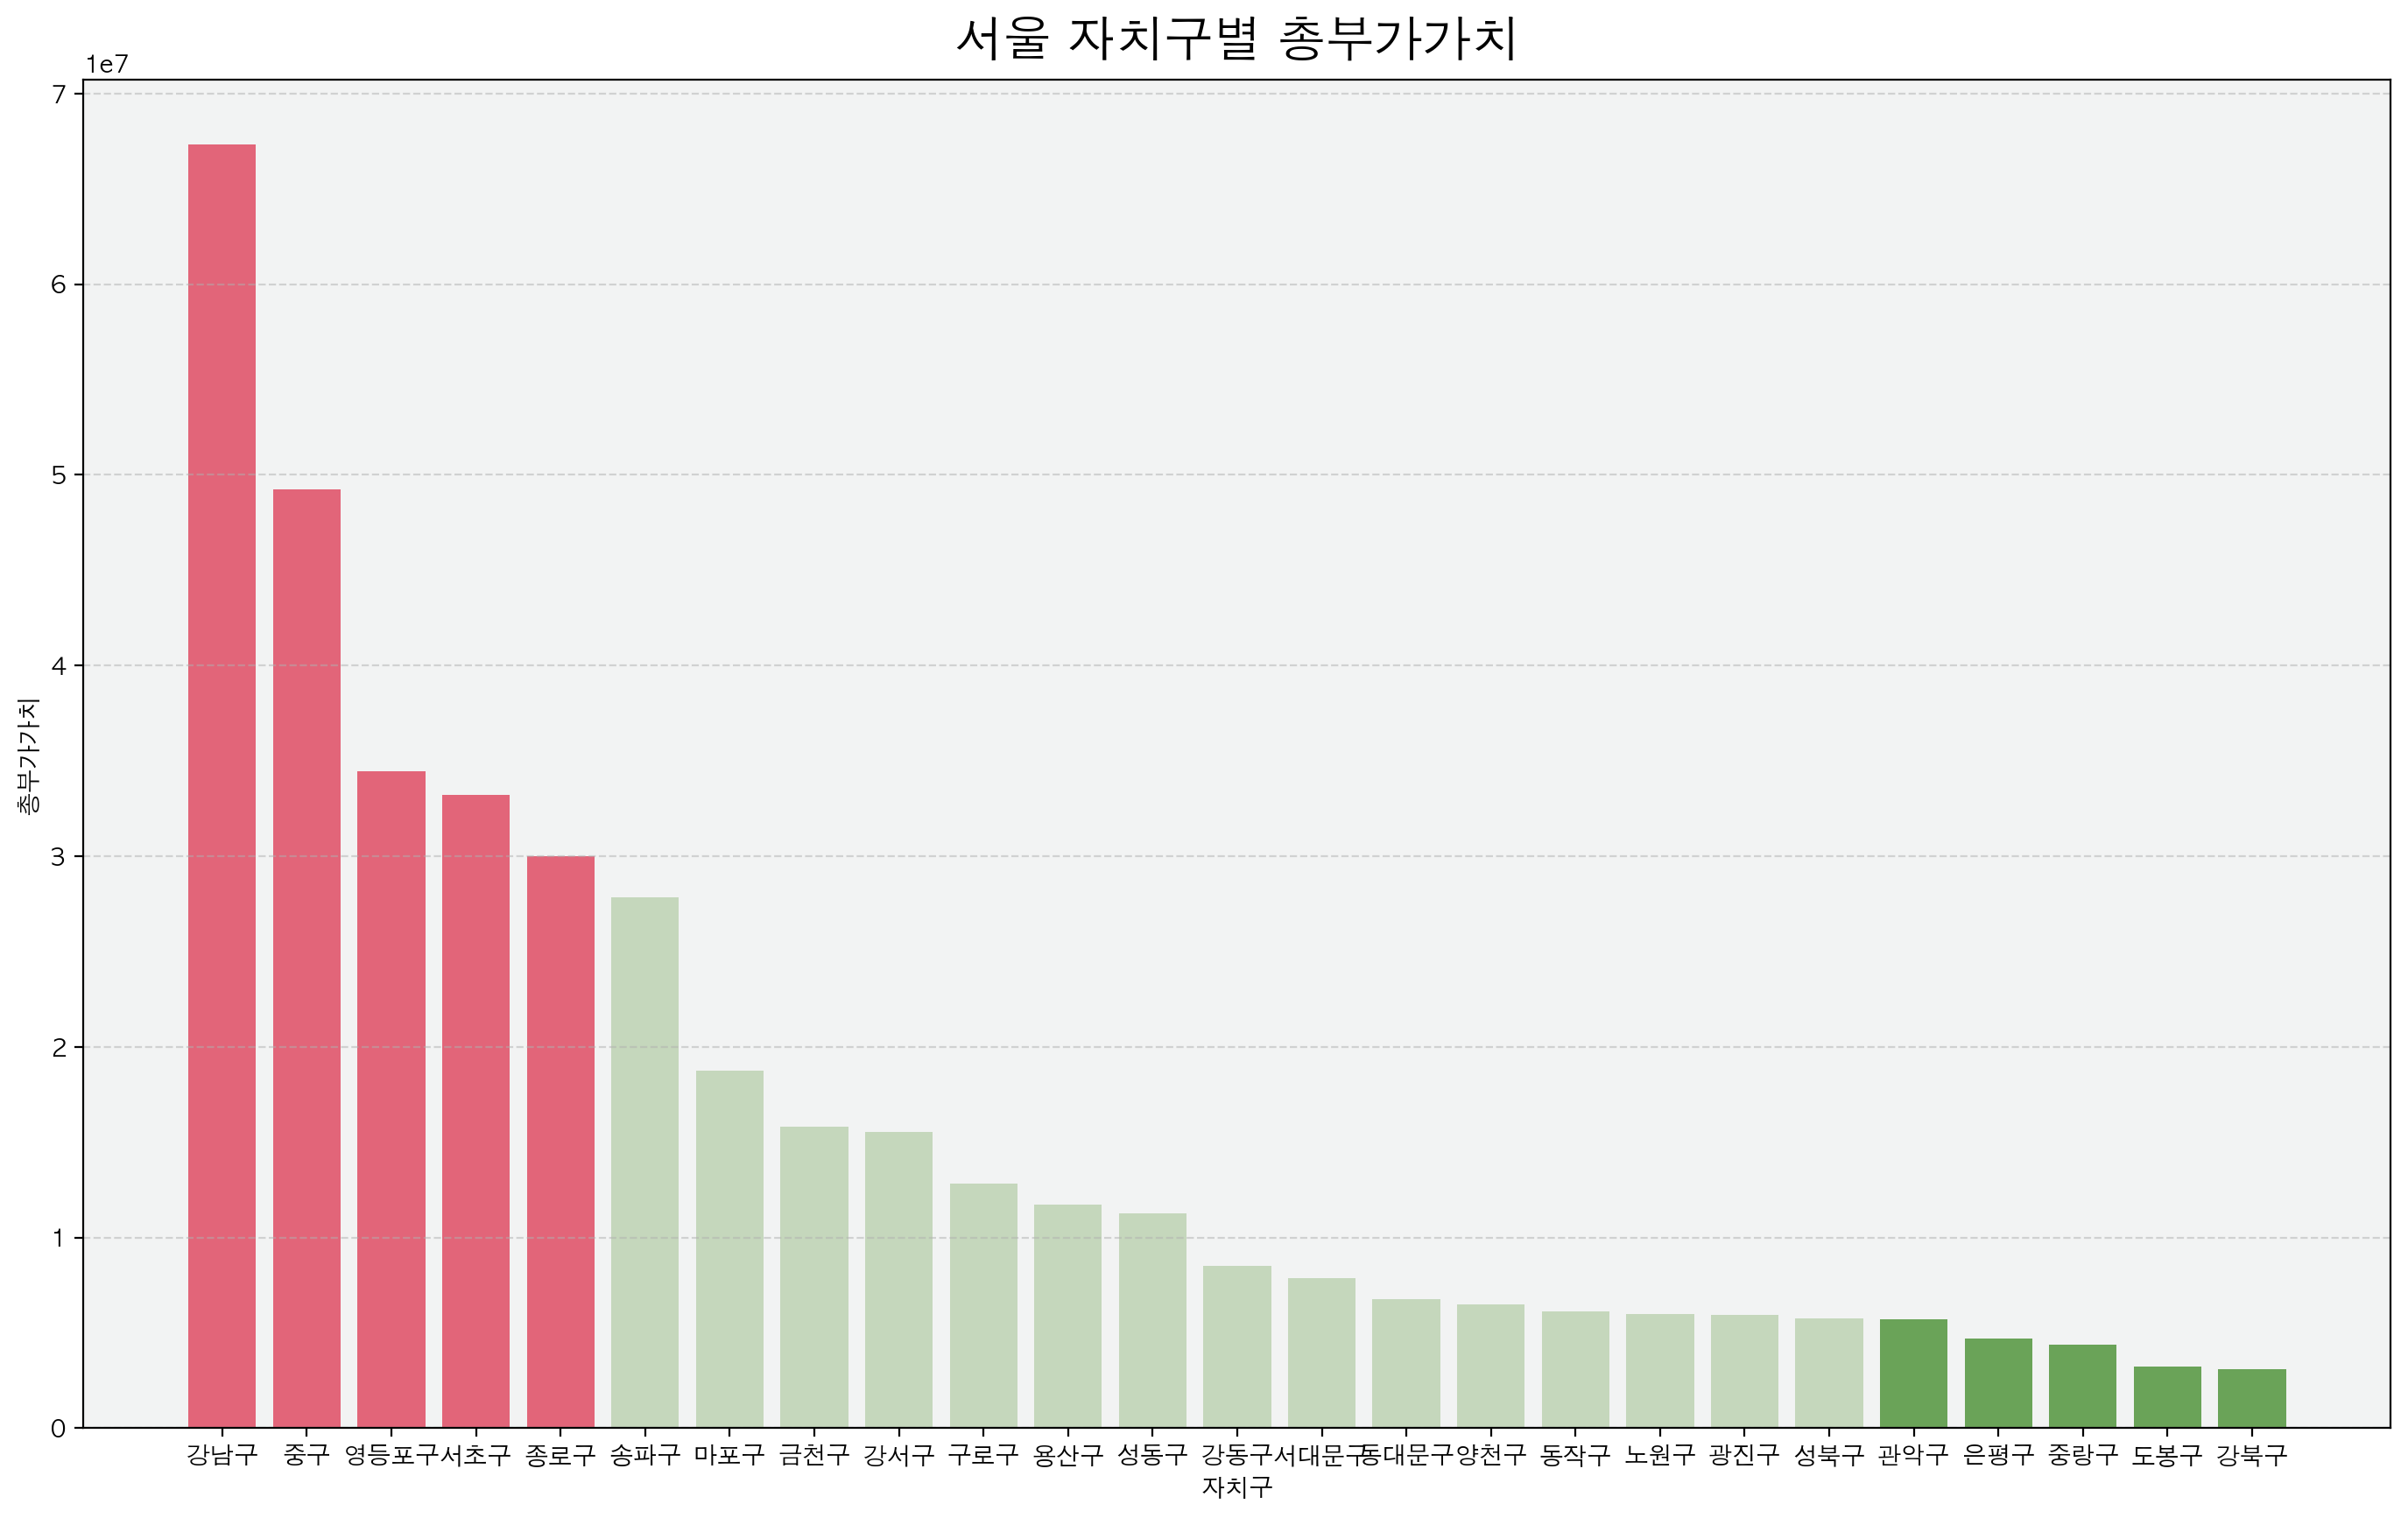

In [ ]:
fig = plt.figure(figsize=(17, 10))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#de425b','#de425b','#de425b','#de425b','#de425b','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#488f31', '#488f31', '#488f31', '#488f31', '#488f31']
plt.bar(va_2020['시군구명'], va_2020['총부가가치'], color=colors, alpha=0.8)

plt.xlabel("자치구")
plt.ylabel("총부가가치")
plt.title('서울 자치구별 총부가가치', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.show()

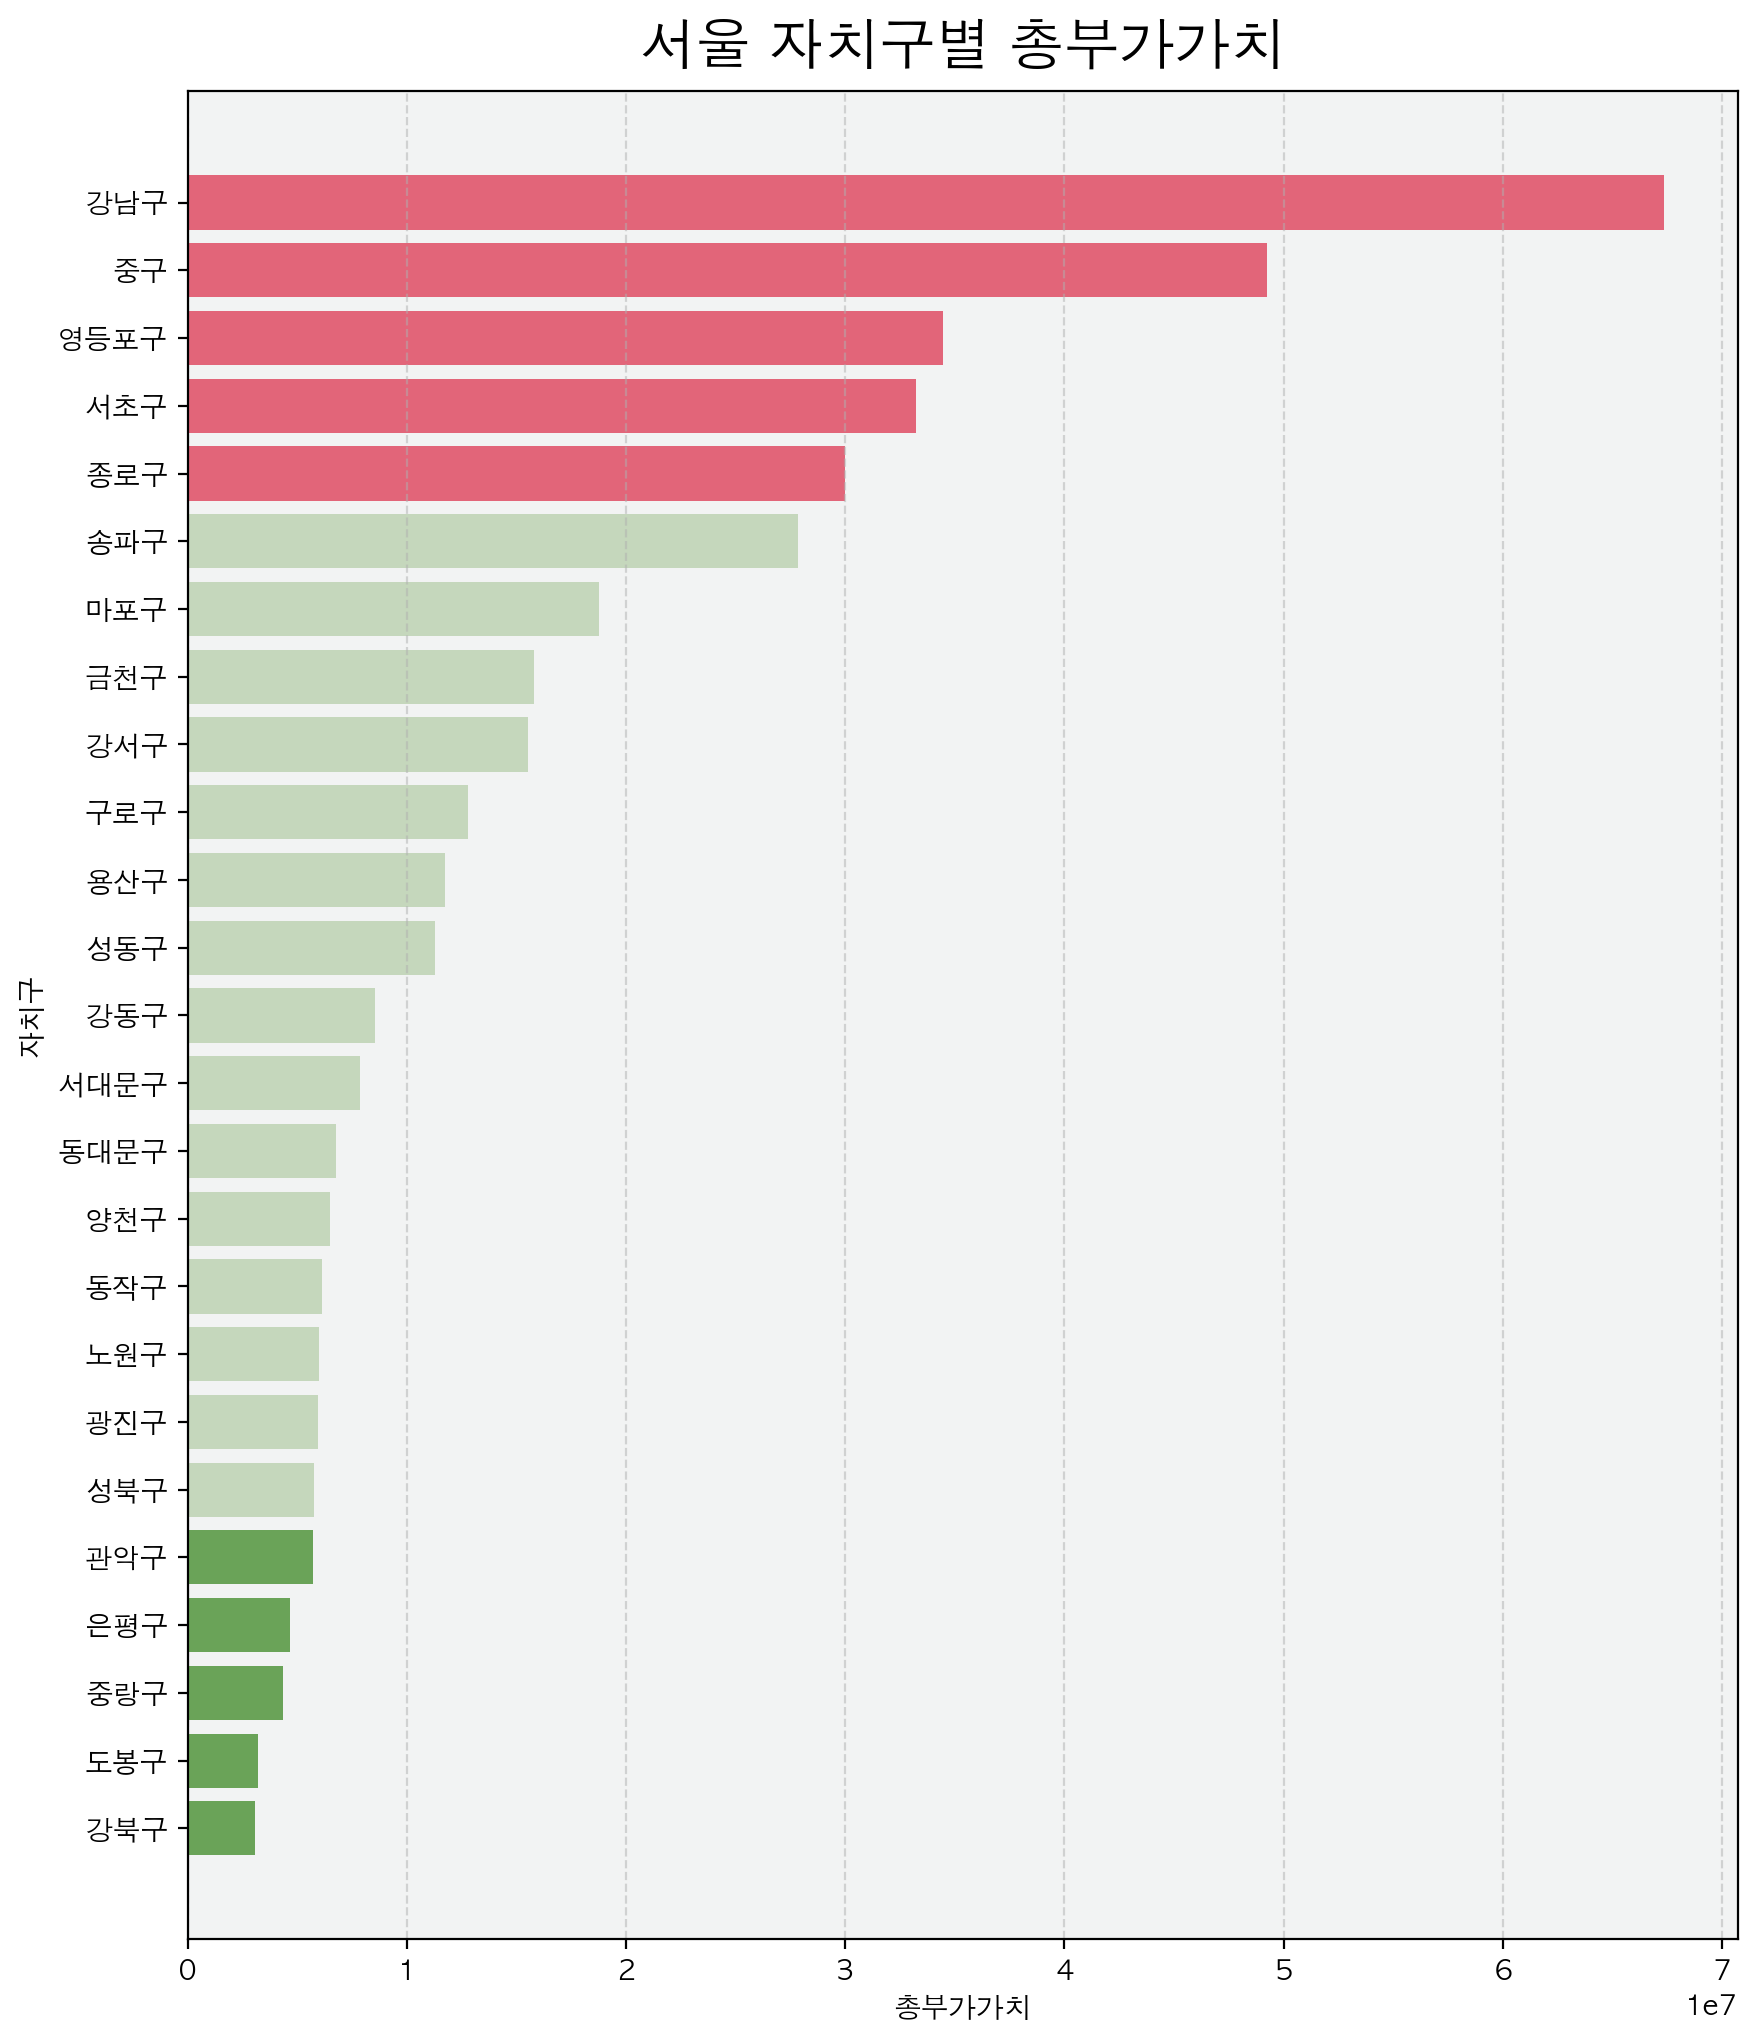

In [ ]:
#barh
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

colors = ['#488f31', '#488f31', '#488f31', '#488f31', '#488f31','#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af', '#bad0af','#bad0af','#bad0af','#bad0af','#bad0af',
          '#de425b','#de425b','#de425b','#de425b','#de425b']
plt.barh(va_barh['시군구명'], va_barh['총부가가치'], color=colors, alpha=0.8)

plt.xlabel("총부가가치")
plt.ylabel("자치구")
plt.title('서울 자치구별 총부가가치', size = 20 , weight = 'bold', pad='10')

plt.grid(True, axis='x', alpha=0.5, linestyle='--')
plt.show()

In [ ]:
merged_df = pd.merge(cf, va_2020, how='inner', on='시군구명')
merged_df

시군구명   커피지수     총부가가치
0    강남구  0.832  67336899
1    서초구  0.826  33237223
2     중구  0.814  49217070
3    용산구  0.799  11729287
4    종로구  0.780  30006285
5   영등포구  0.723  34464003
6    마포구  0.699  18770337
7    송파구  0.691  27853859
8   서대문구  0.669   7857484
9    광진구  0.641   5959124
10   강동구  0.615   8528269
11   동작구  0.608   6125708
12   관악구  0.606   5714406
13   성동구  0.601  11272209
14   금천구  0.597  15822501
15   강서구  0.591  15550220
16   노원구  0.584   5977652
17  동대문구  0.582   6767289
18   양천구  0.574   6485414
19   구로구  0.560  12814107
20   강북구  0.559   3074364
21   은평구  0.554   4681499
22   중랑구  0.554   4367195
23   성북구  0.552   5772190
24   도봉구  0.519   3231378

In [ ]:
merged_df.corr()

커피지수     총부가가치
커피지수   1.000000  0.815374
총부가가치  0.815374  1.000000

In [ ]:
merged_df.describe()

커피지수         총부가가치
count  25.000000  2.500000e+01
mean    0.645200  1.610464e+07
std     0.097751  1.603715e+07
min     0.519000  3.074364e+06
25%     0.574000  5.959124e+06
50%     0.606000  8.528269e+06
75%     0.699000  1.877034e+07
max     0.832000  6.733690e+07

## 재정자립도

In [ ]:
tx = pd.read_excel('seoul_tax.xlsx')
tx = tx.loc[2:]
tx.columns = ['시도명','시군구명','재정자립도(세입과목개편전)','재정자립도(세입과목개편후)']
tx = tx.iloc[:, 1:]
tx.head()

/Users/kmr/opt/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


시군구명 재정자립도(세입과목개편전) 재정자립도(세입과목개편후)
2  강남구           69.4           58.9
3   중구           65.6           55.3
4  서초구           63.5           57.8
5  종로구           51.2           47.5
6  용산구           47.7           41.9

In [ ]:
mg_2 = pd.merge(merged_df, tx, how='inner', on='시군구명')
mg_2['재정자립도(세입과목개편전)'] = mg_2['재정자립도(세입과목개편전)'].astype('float')
mg_2['재정자립도(세입과목개편후)'] = mg_2['재정자립도(세입과목개편전)'].astype('float')
mg_2

시군구명   커피지수     총부가가치  재정자립도(세입과목개편전)  재정자립도(세입과목개편후)
0    강남구  0.832  67336899            69.4            69.4
1    서초구  0.826  33237223            63.5            63.5
2     중구  0.814  49217070            65.6            65.6
3    용산구  0.799  11729287            47.7            47.7
4    종로구  0.780  30006285            51.2            51.2
5   영등포구  0.723  34464003            42.9            42.9
6    마포구  0.699  18770337            38.3            38.3
7    송파구  0.691  27853859            46.9            46.9
8   서대문구  0.669   7857484            31.7            31.7
9    광진구  0.641   5959124            34.0            34.0
10   강동구  0.615   8528269            30.4            30.4
11   동작구  0.608   6125708            31.5            31.5
12   관악구  0.606   5714406            23.8            23.8
13   성동구  0.601  11272209            40.6            40.6
14   금천구  0.597  15822501            29.8            29.8
15   강서구  0.591  15550220            26.4            26.4
16   노원구  0.584   5977652            22.0            22.0
17  동대문구  0.582   6767289            27.8            27.8
18   양천구  0.574   6485414            29.6            29.6
19   구로구  0.560  12814107            26.8            26.8
20   강북구  0.559   3074364            23.7            23.7
21   은평구  0.554   4681499            23.5            23.5
22   중랑구  0.554   4367195            22.5            22.5
23   성북구  0.552   5772190            27.3            27.3
24   도봉구  0.519   3231378            24.8            24.8

In [ ]:
mg_2.describe()

커피지수         총부가가치  재정자립도(세입과목개편전)  재정자립도(세입과목개편후)
count  25.000000  2.500000e+01       25.000000       25.000000
mean    0.645200  1.610464e+07       36.068000       36.068000
std     0.097751  1.603715e+07       14.056366       14.056366
min     0.519000  3.074364e+06       22.000000       22.000000
25%     0.574000  5.959124e+06       26.400000       26.400000
50%     0.606000  8.528269e+06       30.400000       30.400000
75%     0.699000  1.877034e+07       42.900000       42.900000
max     0.832000  6.733690e+07       69.400000       69.400000

In [ ]:
ct = mg_2[['커피지수', '재정자립도(세입과목개편후)']]
ct.columns = ['커피지수', '재정자립도']
ct.head()

커피지수  재정자립도
0  0.832   69.4
1  0.826   63.5
2  0.814   65.6
3  0.799   47.7
4  0.780   51.2

In [ ]:
mg_2.columns

Index(['시군구명', '커피지수', '총부가가치', '재정자립도(세입과목개편전)', '재정자립도(세입과목개편후)'], dtype='object')

## 통계 검정

In [ ]:
import pingouin as pg
from statsmodels.formula.api import ols

In [ ]:
pg.corr(mg_2['커피지수'], mg_2['총부가가치'])

n         r         CI95%         p-val       BF10     power
pearson  25  0.815374  [0.62, 0.92]  6.872219e-07  2.708e+04  0.999745

In [ ]:
6.872219e-07 < 0.05

True

In [ ]:
m = ols('총부가가치 ~ 커피지수', mg_2).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  총부가가치   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     45.62
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           6.87e-07
Time:                        17:05:41   Log-Likelihood:                -436.06
No. Observations:                  25   AIC:                             876.1
Df Residuals:                      23   BIC:                             878.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -7.02e+07   1.29e+07     -5.435      0.000   -9.69e+07   -4.35e+07
커피지수        1.338e+08   1.98e+07      6.754      0.000    9.28e+07    1.75e+08
==============================================================================
Omnibus:                        5.716   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                5.858
Skew:                           0.124   Prob(JB):                       0.0534
Kurtosis:                       5.358   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pg.corr(ct['커피지수'], ct['재정자립도'])

n         r         CI95%         p-val       BF10  power
pearson  25  0.934691  [0.86, 0.97]  8.155088e-12  7.955e+08    1.0

In [ ]:
8.155088e-12 < 0.05

True

In [ ]:
m = ols('재정자립도 ~ 커피지수', ct).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  재정자립도   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     159.0
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           8.16e-12
Time:                        16:45:52   Log-Likelihood:                -75.182
No. Observations:                  25   AIC:                             154.4
Df Residuals:                      23   BIC:                             156.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -50.6514      6.952     -7.286      0.000     -65.033     -36.270
커피지수         134.4070     10.658     12.611      0.000     112.359     156.455
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.435
Skew:                           0.170   Prob(JB):                        0.804
Kurtosis:                       2.450   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

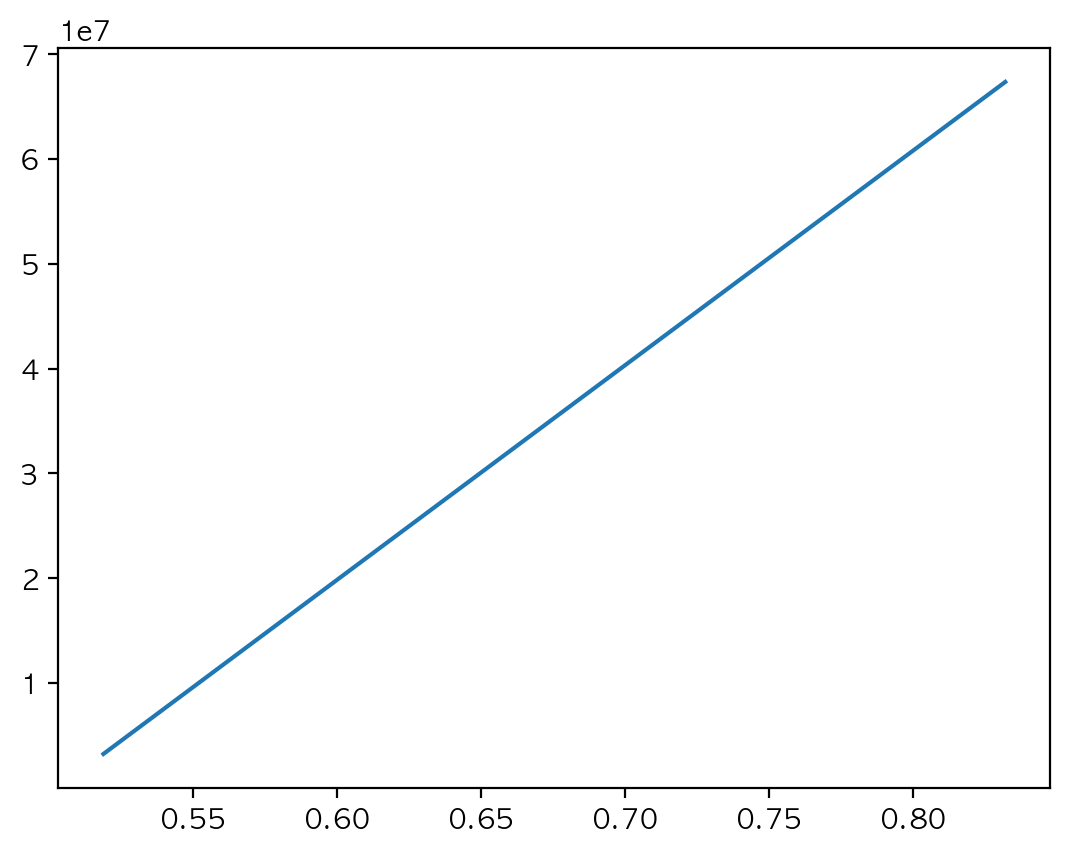

In [ ]:
plt.plot([0.519, 0.832], [3231378, 67336899])

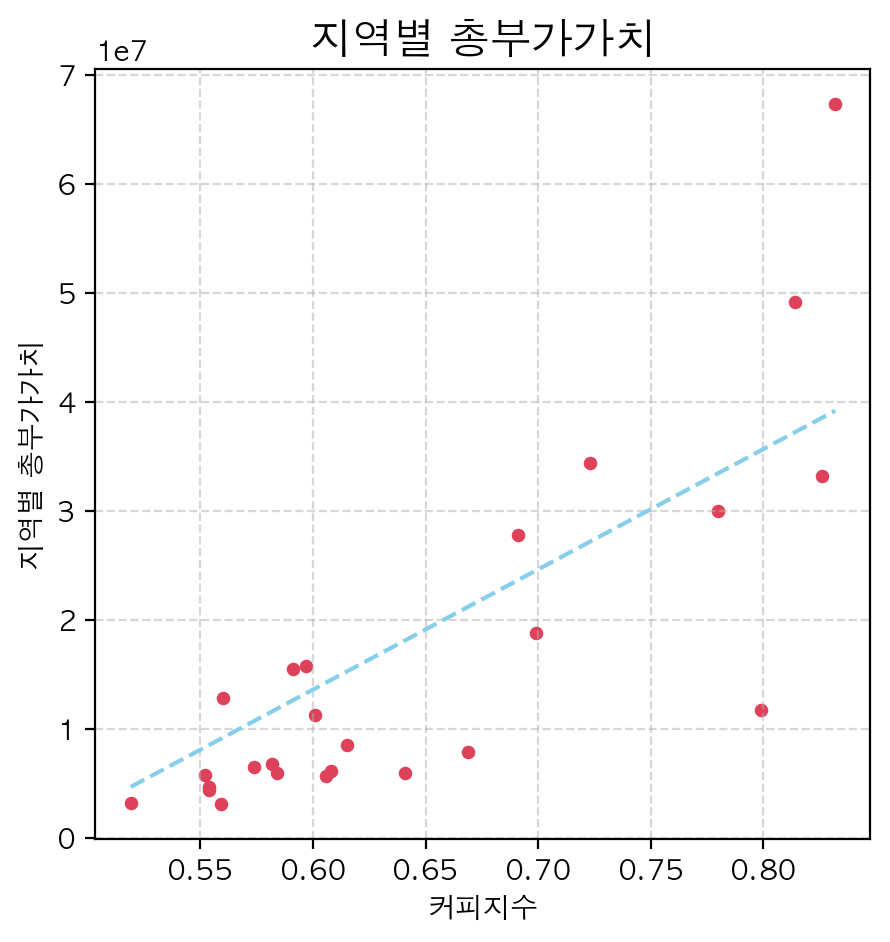

In [ ]:
plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

plt.scatter(mg_2['커피지수'], mg_2['총부가가치'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [4681499, 39217070], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("지역별 총부가가치")
plt.title('지역별 총부가가치', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

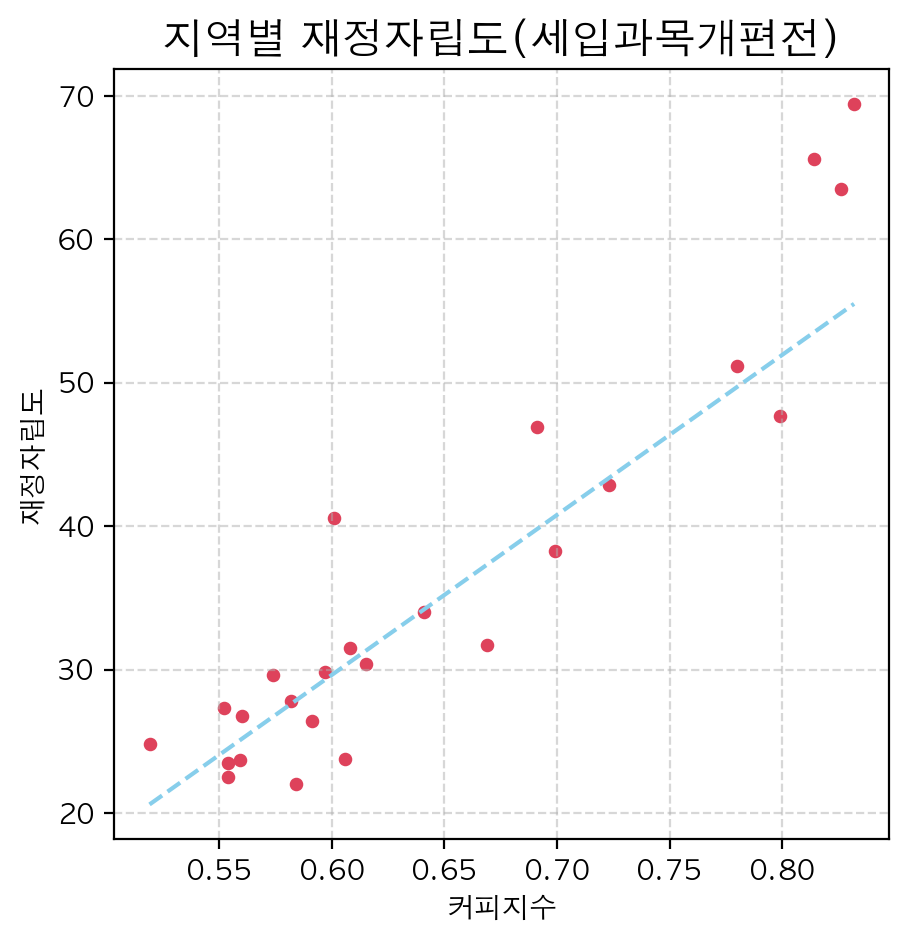

In [ ]:
plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편전)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편전)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()

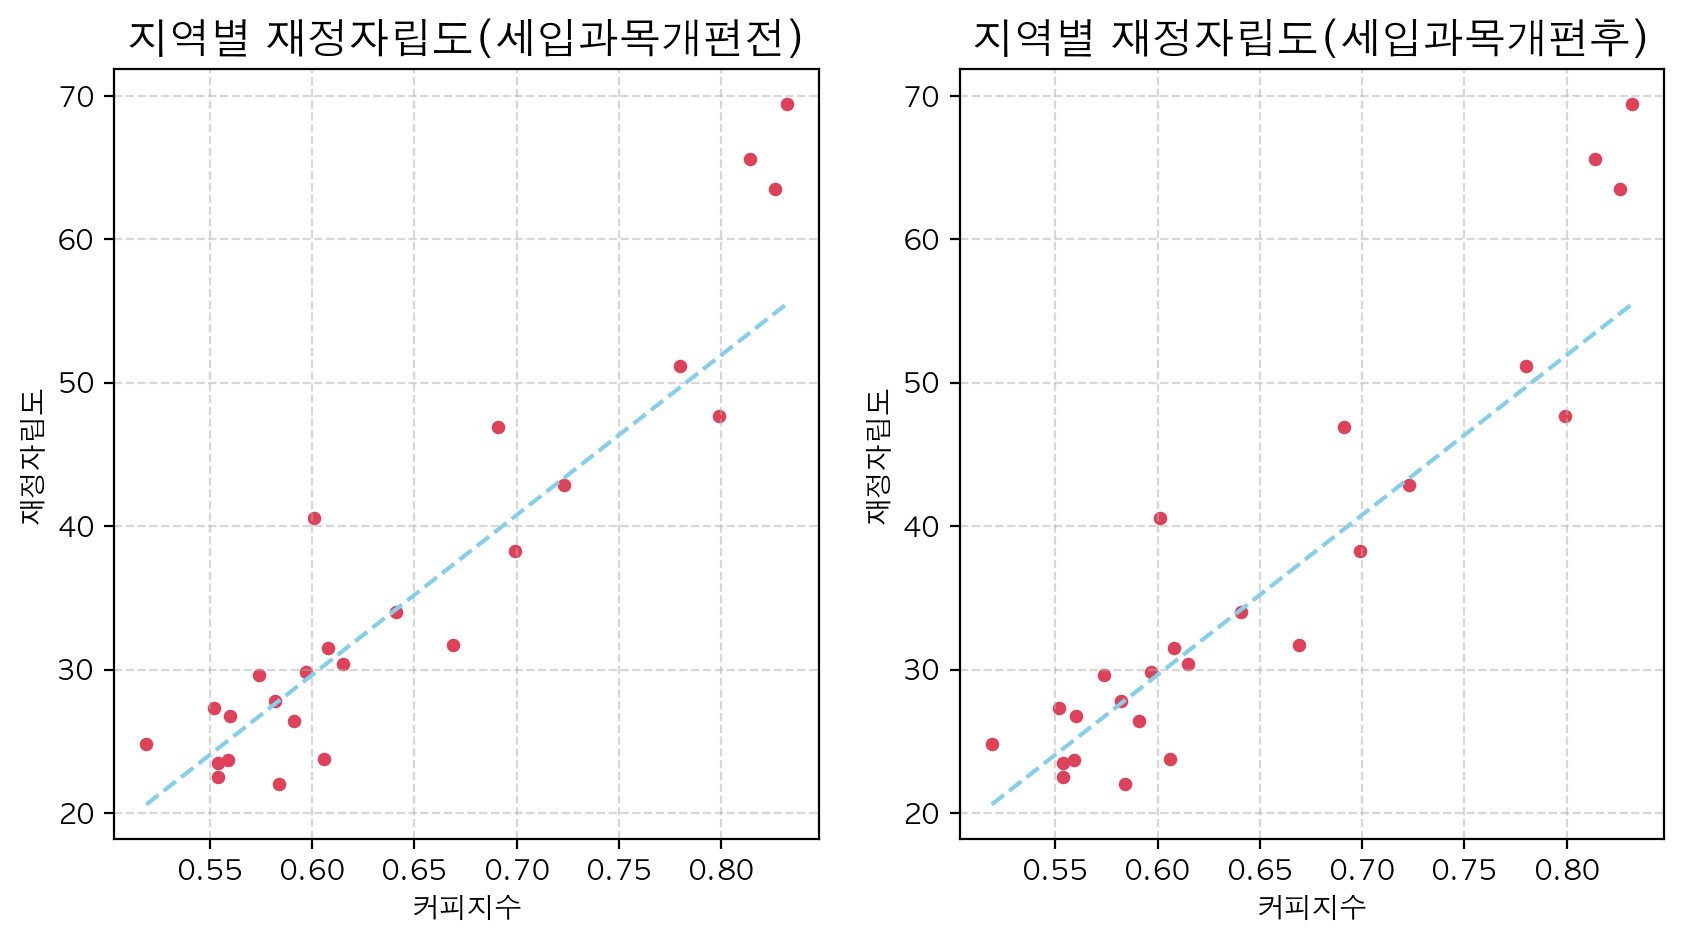

In [ ]:
plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
ax.patch.set_facecolor('#F2F3F3')

#왼쪽에 그리기
plt.subplot(1, 2, 1) 
plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편전)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편전)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')

#오른쪽에 그리기
plt.subplot(1, 2, 2) 
plt.scatter(mg_2['커피지수'], mg_2['재정자립도(세입과목개편후)'], s=15, c='#de425b')
plt.plot([0.519, 0.832], [20.6, 55.5], color='skyblue', ls='--')

plt.xlabel("커피지수")
plt.ylabel("재정자립도")
plt.title('지역별 재정자립도(세입과목개편후)', size = 15 , fontweight = 'bold')
plt.grid(True, alpha=0.5, linestyle='--')

plt.show()

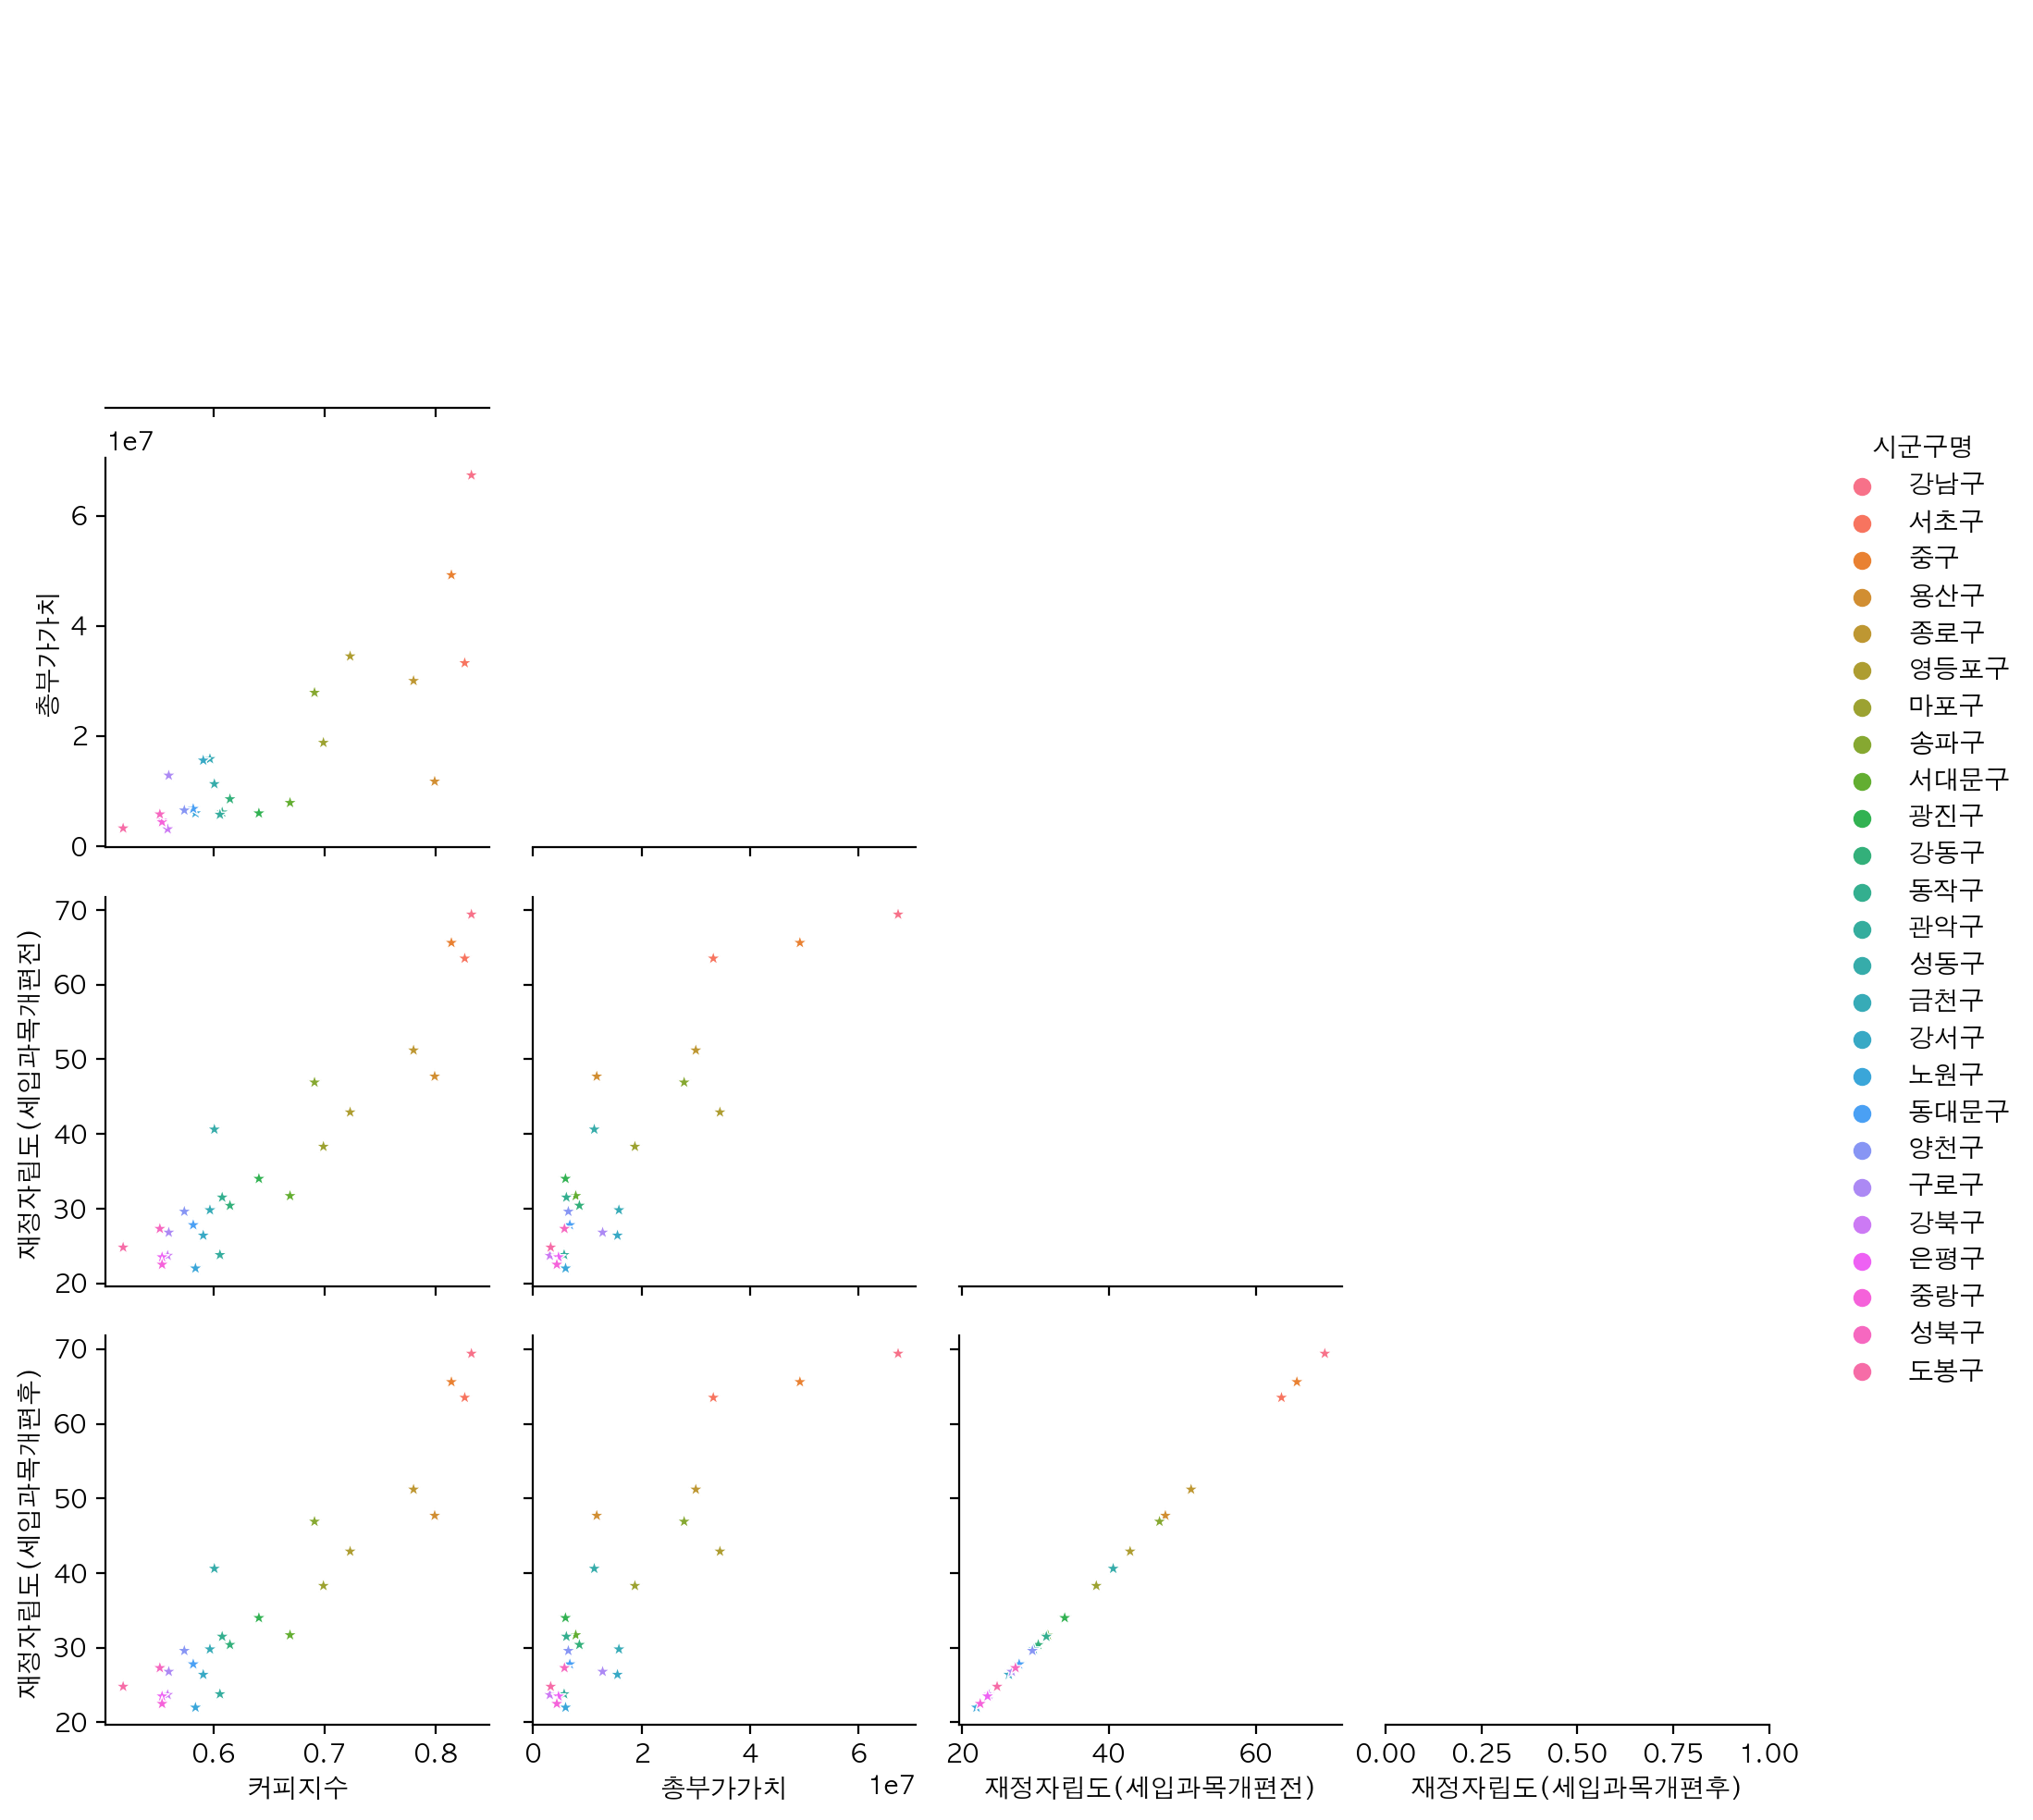

In [ ]:
sns.pairplot(data=mg_2, corner=True, hue='시군구명', markers='*');

In [ ]:
mg_2.corr()

커피지수     총부가가치  재정자립도(세입과목개편전)  재정자립도(세입과목개편후)
커피지수            1.000000  0.815374        0.934691        0.934691
총부가가치           0.815374  1.000000        0.895328        0.895328
재정자립도(세입과목개편전)  0.934691  0.895328        1.000000        1.000000
재정자립도(세입과목개편후)  0.934691  0.895328        1.000000        1.000000

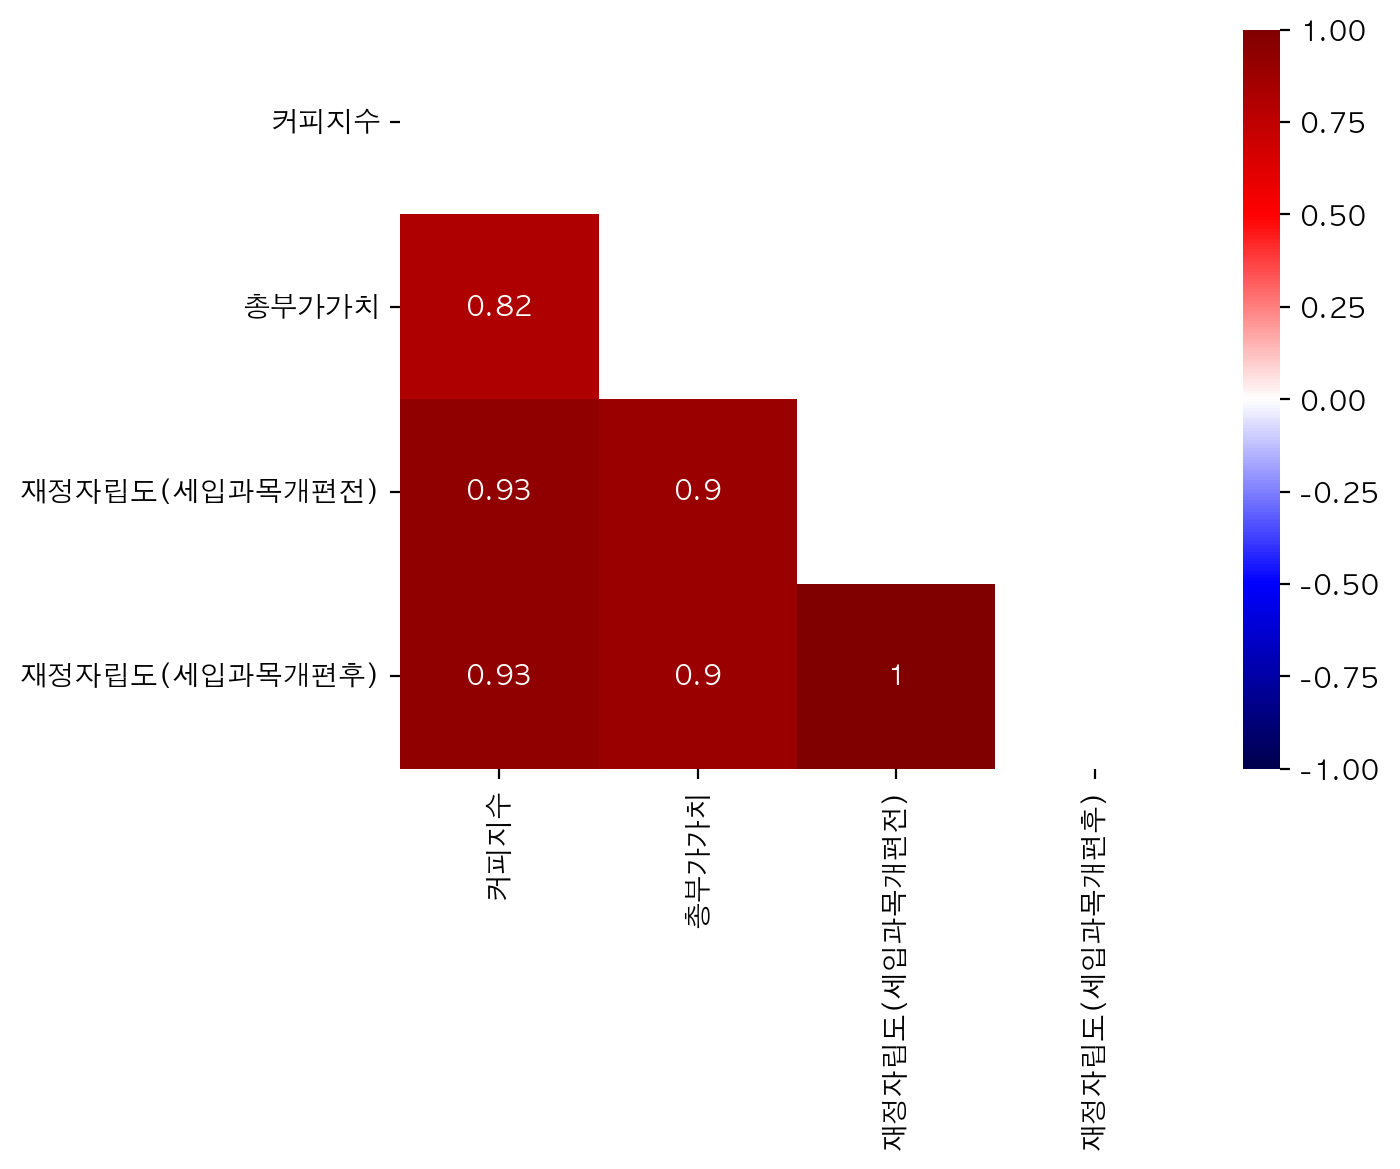

In [ ]:
seoul_corr = mg_2.corr()

#mask처리
mask = np.triu(np.ones_like(seoul_corr))

#sns.heatmap()
sns.heatmap(seoul_corr, annot=True, cmap="seismic", vmin=-1, vmax=1, mask=mask);

## 사업체수, 종사자수

In [ ]:
# 미리님 커피지수로 시각화 나타내보기
# 미리님 커피지수
mr = pd.read_excel("666\\seoul_coffee_mr.xlsx")
mr = mr.rename(columns={'커피지수':'커피지수_mr'})
mr = mr.reset_index()

In [ ]:
worker = pd.read_csv('666\\사업체_종사자수_현황_2021.csv')
worker.head()

시군구명   사업체수  전체종사자수  남자종사자수  여자종사자수
0  종로구  48361  275063  153210  121853
1   중구  70308  386564  213782  172782
2  용산구  29680  152605   84314   68291
3  성동구  41665  203221  116978   86243
4  광진구  33706  129707   71124   58583

In [ ]:
worker = pd.merge(worker, mr)
worker = worker.sort_values("커피지수_mr", ascending=False).reset_index().drop("index", axis=1)

In [ ]:
worker = worker.sort_values(by="사업체수", ascending=False)

In [ ]:
worker = worker.drop("level_0", axis=1)
worker = worker.reset_index()

In [ ]:
worker_mr = ["사업체수", "전체종사자수", "남자종사자수", "여자종사자수", "커피지수_mr"]

In [ ]:
# plt.figure(figsize=(15, 6))
# ax = sns.barplot(x="시군구명", y="사업체수", data = worker, color = "skyblue");

# ax2 = ax.twinx()
# ax2 = sns.barplot(x=worker["시군구명"], y=worker["전체종사자수"], ax=ax2, color = "salmon")
# plt.legend(['사업체수', '전체종사자수'])
# plt.show()

In [ ]:
worker = worker.set_index("시군구명")

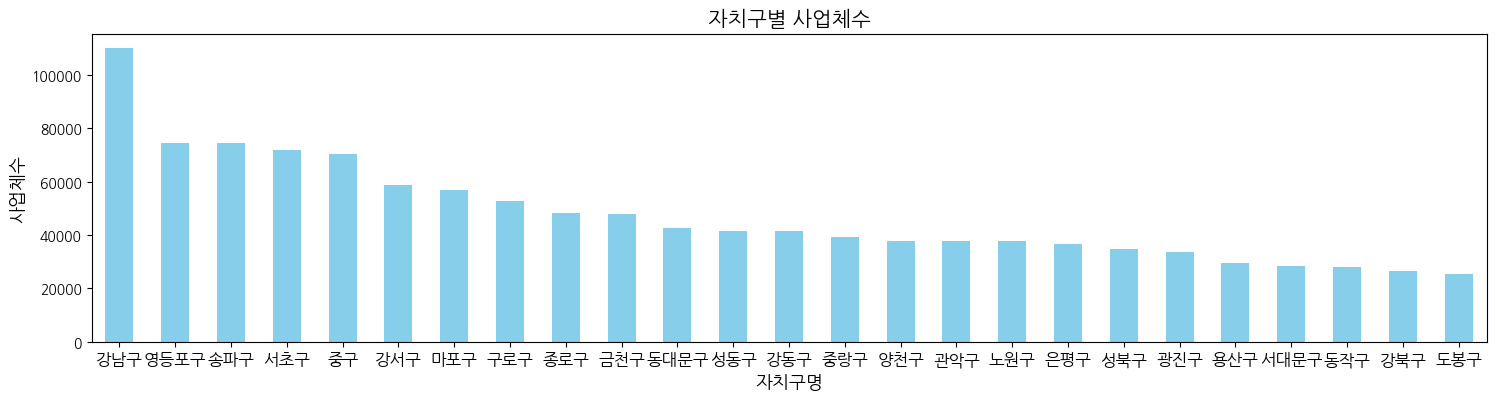

In [ ]:
plt.figure(figsize=(18, 4))
worker["사업체수"].plot.bar(x="시군구명", color="skyblue")
plt.title("자치구별 사업체수", fontsize=15)
plt.xlabel("자치구명", fontsize=13)
plt.ylabel("사업체수", fontsize=13)
plt.xticks(fontsize=12, rotation=0)
plt.show()

In [ ]:
worker = worker.sort_values(by="전체종사자수", ascending=False)

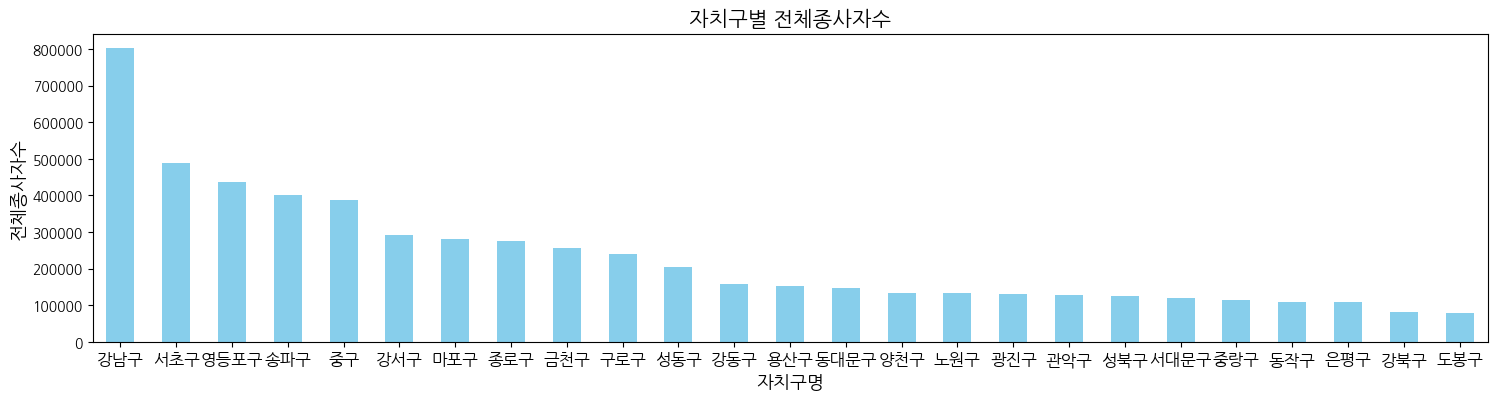

In [ ]:
plt.figure(figsize=(18, 4))
worker["전체종사자수"].plot.bar(x="시군구명", color="skyblue")
plt.title("자치구별 전체종사자수", fontsize=15)
plt.xlabel("자치구명", fontsize=13)
plt.ylabel("전체종사자수", fontsize=13)
plt.xticks(fontsize=12, rotation=0)
plt.show()

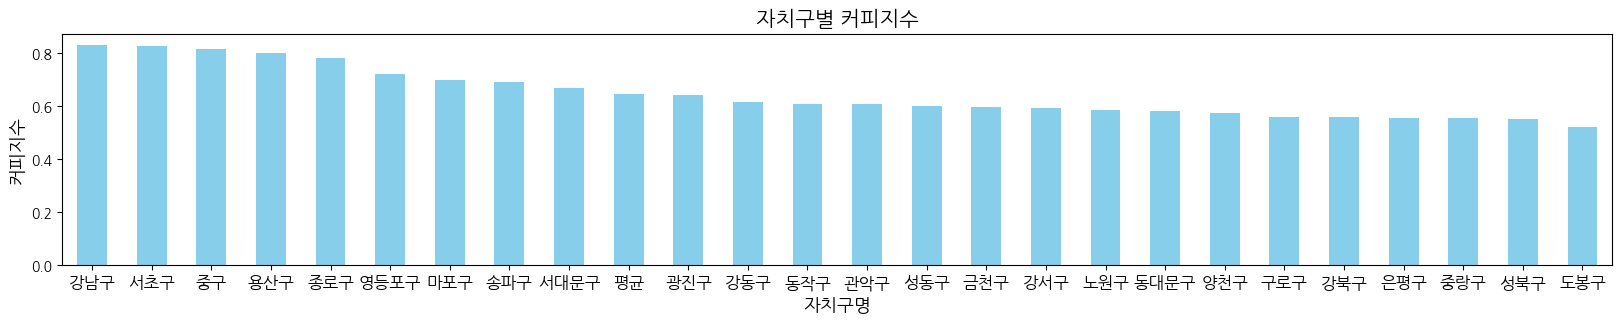

In [ ]:
plt.figure(figsize=(20,3))
mr["커피지수_mr"].plot.bar(x="시군구명", color="skyblue")
plt.title("자치구별 커피지수", fontsize=15)
plt.xlabel("자치구명", fontsize=13)
plt.ylabel("커피지수", fontsize=13)
plt.xticks(fontsize=12, rotation=0)
plt.show()

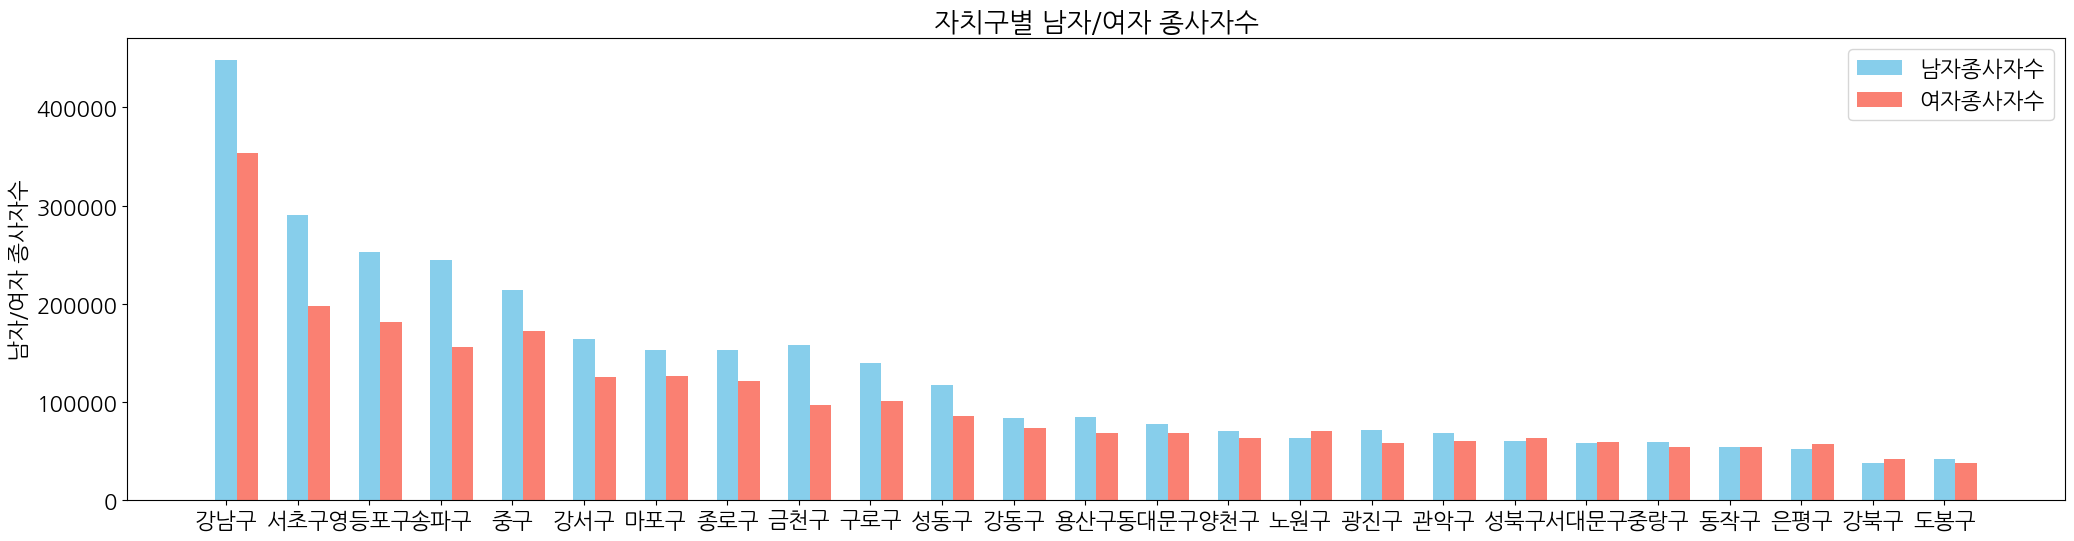

In [ ]:
plt.figure(figsize=(25,6))
plt.rcParams["font.size"]=16
x= np.arange(len(worker.index))
label = worker.index
plt.bar(x, worker["남자종사자수"], label="남자종사자수", width=0.3, color="skyblue")
plt.bar(x+0.3, worker["여자종사자수"], label="여자종사자수", width=0.3, color="salmon")
plt.xticks(x, label)

plt.legend()

plt.ylabel("남자/여자 종사자수")
plt.title("자치구별 남자/여자 종사자수")
plt.show()

사업체수    전체종사자수    남자종사자수    여자종사자수   커피지수_mr
사업체수     1.000000  0.975154  0.973738  0.968839  0.645494
전체종사자수   0.975154  1.000000  0.997499  0.995005  0.731552
남자종사자수   0.973738  0.997499  1.000000  0.985460  0.726742
여자종사자수   0.968839  0.995005  0.985460  1.000000  0.732107
커피지수_mr  0.645494  0.731552  0.726742  0.732107  1.000000

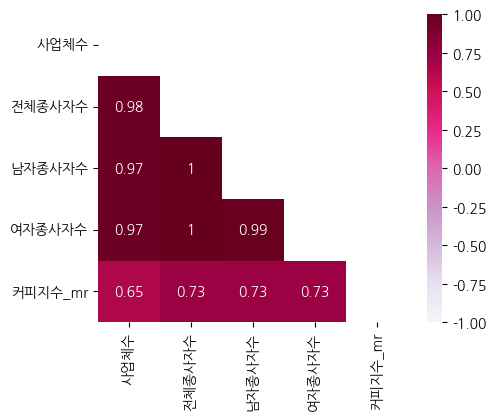

In [ ]:
# 커피지수와 사업체수/종사자수 상관 관계
display(worker[worker_mr].corr())


masku = np.triu(np.ones(worker[worker_mr].corr().shape))
plt.figure(figsize=(5, 4))
sns.heatmap(worker[worker_mr].corr(), cmap="PuRd", 
            annot=True, vmin=-1, vmax=1 , mask=masku);

# 커피지수에 따른 사업체수, 전체 종사자수 모두 강한 양적 선형관계를 이루었다.
# 커피지수가 높을수록 해당 지역의 부가가치 창출이 높다고 해석을 한다. 
# 사업체수나 종사자수가 많은 지역은 그 지역 안에서의 생산활동이 활발.
# 따라서 커피지수와 사업체/종사자수와 서로 양적 선형관계를 생성했다고 추측.
# 다만 용산구의 경우 사업체수가 하위권에 속하는데 커피지수는 크게 나왔다.. 왜일까?


<Figure size 100x100 with 0 Axes>

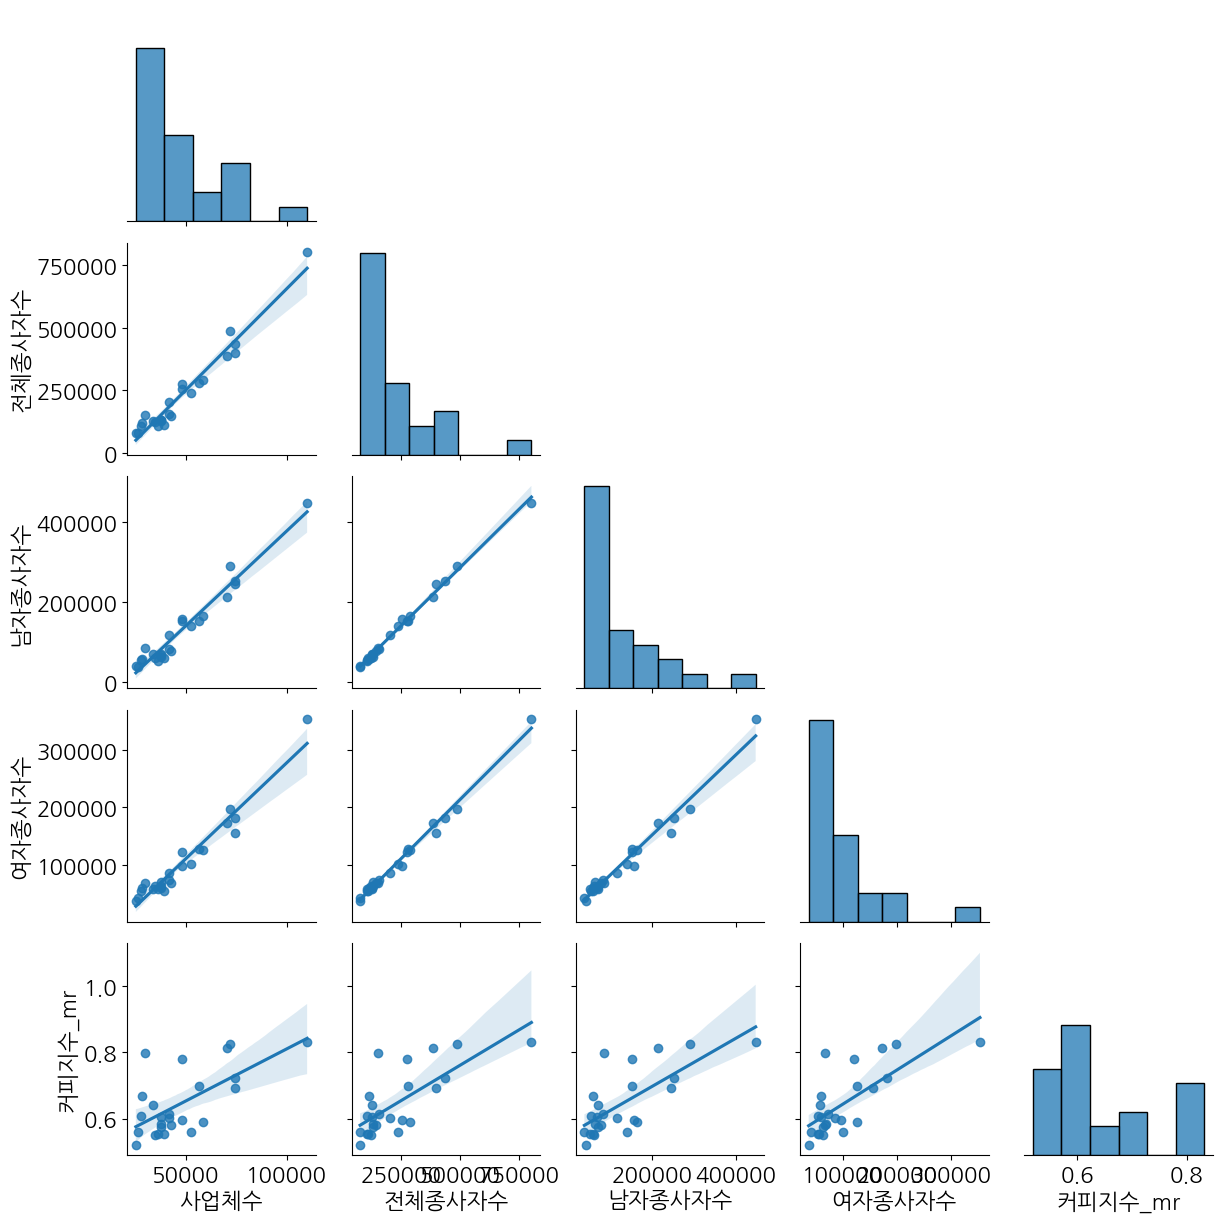

In [ ]:
plt.figure(figsize=(1,1))
sns.pairplot(worker[worker_mr], corner=True, kind="reg")

## 생활인구 관련하여 커피지수 시각화

In [ ]:
seoul = pd.read_csv("666\\서울생활인구.csv")
seoul.columns

Index(['내국인생활인구수', '단기체류외국인인구수', '동일자치구행정동간이동인구수', '서울외유입인구수', '시군구명',
       '야간인구수(19~08)', '일최대이동인구수', '일최대인구수', '일최소인구수', '자치구간이동인구수',
       '장기체류외국인인구수', '주간인구수(09~18)', '총생활인구수'],
      dtype='object')

In [ ]:
seoul = seoul.reset_index()

In [ ]:
seoul = seoul.set_index(["시군구명"])

In [ ]:
seoul = seoul.drop("index", axis=1)
seoul

시군구명      내국인생활인구수   단기체류외국인인구수  동일자치구행정동간이동인구수      서울외유입인구수  \
0    서울시  1.049373e+07  142220.7039    2.028706e+06  1.519685e+06   
1    종로구  2.952944e+05    9800.4689    3.141458e+04  7.087107e+04   
2     중구  2.944152e+05   29914.4163    3.041326e+04  9.501220e+04   
3    용산구  2.863970e+05    6314.3007    4.381241e+04  5.321226e+04   
4    성동구  3.502608e+05    3722.9048    5.848175e+04  4.461970e+04   
5    광진구  3.576323e+05    3790.8945    7.581552e+04  3.329506e+04   
6   동대문구  3.541640e+05    3472.4257    7.238109e+04  3.213576e+04   
7    중랑구  3.402847e+05     729.5944    8.412260e+04  2.359098e+04   
8    성북구  4.230127e+05    2613.2166    8.293807e+04  2.382924e+04   
9    강북구  2.786972e+05     637.9692    1.124535e+05  1.152117e+04   
10   도봉구  2.608839e+05     502.3798    6.368904e+04  1.619906e+04   
11   노원구  4.892915e+05     779.8233    1.061466e+05  3.577923e+04   
12   은평구  4.151456e+05    1252.6856    9.411773e+04  2.720523e+04   
13  서대문구  3.733293e+05    9500.1945    6.556711e+04  5.005034e+04   
14   마포구  4.528307e+05   13181.5526    7.793280e+04  7.487275e+04   
15   양천구  3.577547e+05     794.0051    7.038074e+04  2.424582e+04   
16   강서구  5.387984e+05    6811.0392    1.114653e+05  7.209580e+04   
17   구로구  3.901195e+05    4920.3987    7.762077e+04  6.789961e+04   
18   금천구  2.274279e+05    1781.2657    4.208740e+04  6.191866e+04   
19  영등포구  4.852227e+05    7980.8677    9.197993e+04  1.029046e+05   
20   동작구  3.838089e+05    1760.0602    6.765954e+04  3.197174e+04   
21   관악구  4.567325e+05    3029.1273    9.816242e+04  3.230151e+04   
22   서초구  5.856479e+05    6137.5939    7.590853e+04  1.481735e+05   
23   강남구  8.653051e+05   17521.7457    1.294960e+05  2.271134e+05   
24   송파구  7.354599e+05    4072.4517    1.500880e+05  1.154156e+05   
25   강동구  4.958093e+05    1199.3220    1.445810e+05  4.723048e+04   

    야간인구수(19~08)      일최대이동인구수        일최대인구수        일최소인구수     자치구간이동인구수  \
0   1.081284e+07  6.162669e+06  1.139891e+07  1.067543e+07  2.614278e+06   
1   2.648282e+05  2.750918e+05  4.353437e+05  2.346647e+05  1.728061e+05   
2   2.616953e+05  3.429648e+05  4.942753e+05  2.200687e+05  2.175393e+05   
3   2.904741e+05  1.934431e+05  3.392370e+05  2.765431e+05  9.641840e+04   
4   3.564460e+05  2.225381e+05  3.953874e+05  3.443025e+05  1.194367e+05   
5   3.969010e+05  1.755511e+05  4.017630e+05  3.568178e+05  6.644051e+04   
6   3.888891e+05  1.873871e+05  3.969960e+05  3.729846e+05  8.287029e+04   
7   3.709701e+05  1.442914e+05  3.853374e+05  3.031409e+05  3.657781e+04   
8   4.608473e+05  1.870927e+05  4.709902e+05  4.114417e+05  8.032543e+04   
9   3.008731e+05  1.689590e+05  3.114456e+05  2.550250e+05  4.498425e+04   
10  2.800439e+05  1.163639e+05  2.888814e+05  2.343221e+05  3.647581e+04   
11  5.177986e+05  1.986076e+05  5.311073e+05  4.583169e+05  5.668178e+04   
12  4.562924e+05  1.535028e+05  4.744596e+05  3.608855e+05  3.217982e+04   
13  3.937826e+05  2.341997e+05  4.355228e+05  3.887572e+05  1.185823e+05   
14  4.661855e+05  2.917734e+05  5.286172e+05  4.458160e+05  1.389679e+05   
15  3.837800e+05  1.486337e+05  3.929092e+05  3.229800e+05  5.400719e+04   
16  5.650350e+05  2.564888e+05  5.758187e+05  5.342837e+05  7.292780e+04   
17  4.288676e+05  2.181781e+05  4.333048e+05  4.128400e+05  7.265767e+04   
18  2.294858e+05  1.614700e+05  2.718550e+05  2.221002e+05  5.746390e+04   
19  4.854658e+05  3.734201e+05  6.060523e+05  4.563891e+05  1.785355e+05   
20  4.223364e+05  1.721496e+05  4.319374e+05  3.669452e+05  7.251829e+04   
21  5.174616e+05  1.907508e+05  5.386842e+05  4.140050e+05  6.028687e+04   
22  5.288300e+05  4.456887e+05  7.323165e+05  4.760553e+05  2.216067e+05   
23  7.628130e+05  7.155593e+05  1.145598e+06  6.903132e+05  3.589499e+05   
24  7.508536e+05  3.872433e+05  7.686122e+05  7.431475e+05  1.217397e+05   
25  5.318850e+05  2.381871e+05  5.464849e+05  4.587421e+05  4.637562e+04   

     장기체류외국인인구수  주간인구수(09~18)        총생활인구수  
0   396219.5290  1.133922e+07  1.103217e+

In [ ]:
mr.reset_index()

시군구명  커피지수_mr
0    강남구    0.832
1    서초구    0.826
2     중구    0.814
3    용산구    0.799
4    종로구    0.780
5   영등포구    0.723
6    마포구    0.699
7    송파구    0.691
8   서대문구    0.669
9     평균    0.644
10   광진구    0.641
11   강동구    0.615
12   동작구    0.608
13   관악구    0.606
14   성동구    0.601
15   금천구    0.597
16   강서구    0.591
17   노원구    0.584
18  동대문구    0.582
19   양천구    0.574
20   구로구    0.560
21   강북구    0.559
22   은평구    0.554
23   중랑구    0.554
24   성북구    0.552
25   도봉구    0.519

In [ ]:
seoul

내국인생활인구수  단기체류외국인인구수  동일자치구행정동간이동인구수     서울외유입인구수  야간인구수(19~08)  \
시군구명                                                                       
종로구   295294.3694   9800.4689      31414.5803   70871.0740   264828.2152   
중구    294415.2393  29914.4163      30413.2590   95012.2028   261695.2857   
용산구   286396.9814   6314.3007      43812.4067   53212.2646   290474.1144   
성동구   350260.7835   3722.9048      58481.7459   44619.6995   356446.0441   
광진구   357632.2915   3790.8945      75815.5237   33295.0646   396901.0245   
동대문구  354164.0047   3472.4257      72381.0922   32135.7618   388889.0766   
중랑구   340284.7357    729.5944      84122.6041   23590.9760   370970.0615   
성북구   423012.6507   2613.2166      82938.0700   23829.2408   460847.3084   
강북구   278697.2391    637.9692     112453.5423   11521.1668   300873.1338   
도봉구   260883.9250    502.3798      63689.0384   16199.0623   280043.9137   
노원구   489291.4747    779.8233     106146.5508   35779.2297   517798.6217   
은평구   415145.6213   1252.6856      94117.7318   27205.2312   456292.4034   
서대문구  373329.2887   9500.1945      65567.1125   50050.3426   393782.6193   
마포구   452830.7158  13181.5526      77932.7954   74872.7524   466185.4634   
양천구   357754.7415    794.0051      70380.7390   24245.8176   383779.9773   
강서구   538798.4173   6811.0392     111465.2505   72095.7959   565034.9583   
구로구   390119.5178   4920.3987      77620.7697   67899.6136   428867.5969   
금천구   227427.8641   1781.2657      42087.4012   61918.6625   229485.8239   
영등포구  485222.6954   7980.8677      91979.9320  102904.6381   485465.8153   
동작구   383808.9401   1760.0602      67659.5447   31971.7365   422336.3982   
관악구   456732.4534   3029.1273      98162.4211   32301.5076   517461.6236   
서초구   585647.9072   6137.5939      75908.5327  148173.4867   528829.9611   
강남구   865305.1145  17521.7457     129495.9615  227113.4177   762813.0247   
송파구   735459.9304   4072.4517     150088.0041  115415.5743   750853.5924   
강동구   495809.3473   1199.3220     144580.9886   47230.4753   531885.0499   

         일최대이동인구수        일최대인구수       일최소인구수    자치구간이동인구수  장기체류외국인인구수  \
시군구명                                                                    
종로구   275091.7708  4.353437e+05  234664.6776  172806.1165  19204.5016   
중구    342964.8113  4.942753e+05  220068.7299  217539.3495  20494.3788   
용산구   193443.0714  3.392370e+05  276543.0916   96418.4001  15853.6815   
성동구   222538.1258  3.953874e+05  344302.5319  119436.6804  17087.5947   
광진구   175551.0973  4.017630e+05  356817.8435   66440.5090  22133.8828   
동대문구  187387.1412  3.969960e+05  372984.5888   82870.2872  28240.6499   
중랑구   144291.3873  3.853374e+05  303140.8802   36577.8072   5555.0565   
성북구   187092.7446  4.709902e+05  411441.7258   80325.4338  17142.3691   
강북구   168958.9615  3.114456e+05  255025.0313   44984.2524   5180.5596   
도봉구   116363.9115  2.888814e+05  234322.1344   36475.8108   2613.0349   
노원구   198607.5599  5.311073e+05  458316.9452   56681.7794   5617.2979   
은평구   153502.7847  4.744596e+05  360885.4604   32179.8217   5327.3387   
서대문구  234199.7367  4.355228e+05  388757.2342  118582.2816  23414.7106   
마포구   291773.4053  5.286172e+05  445815.9775  138967.8575  20338.4611   
양천구   148633.7432  3.929092e+05  322980.0031   54007.1866   4555.1719   
강서구   256488.8438  5.758187e+05  534283.6833   72927.7974   8753.2660   
구로구   218178.0572  4.333048e+05  412840.0315   72657.6739  29652.9836   
금천구   161469.9613  2.718550e+05  222100.2289   57463.8976  16130.4151   
영등포구  373420.0818  6.060523e+05  456389.0717  178535.5117  37896.3593   
동작구   172149.5693  4.319374e+05  366945.2005   72518.2881  16560.3484   
관악구   190750.7947  5.386842e+05  414004.9739   60286.8660  19543.2435   
서초구   445688.7436  7.323165e+05  476055.3429  221606.7242  13128.9561   
강남구   715559.3270  1.145598e+06  690313.2064  358949.9478  20655.2731   
송파구   387243.2714  7.686122e+05  743147.4928  121739.6930  12662.9282   
강동구   238187.0837  5.464849e+05  458742.0969   46375.6198 

In [ ]:
mr

커피지수_mr
시군구명         
강남구     0.832
서초구     0.826
중구      0.814
용산구     0.799
종로구     0.780
영등포구    0.723
마포구     0.699
송파구     0.691
서대문구    0.669
광진구     0.641
강동구     0.615
동작구     0.608
관악구     0.606
성동구     0.601
금천구     0.597
강서구     0.591
노원구     0.584
동대문구    0.582
양천구     0.574
구로구     0.560
강북구     0.559
은평구     0.554
중랑구     0.554
성북구     0.552
도봉구     0.519

In [ ]:
seoul_mr = pd.merge(seoul, mr,  left_index=True, right_index=True)

In [ ]:
seoul_mr = seoul_mr.drop(['단기체류외국인인구수', '동일자치구행정동간이동인구수', '일최대이동인구수', '일최대인구수', '일최소인구수', 
            '자치구간이동인구수','장기체류외국인인구수'], axis = 1)

In [ ]:
seoul_mr = seoul_mr.set_index("시군구명")

In [ ]:
seoul_mr_col=['내국인생활인구수', '서울외유입인구수', '야간인구수(19~08)', '주간인구수(09~18)', '총생활인구수', '커피지수_mr']

내국인생활인구수  서울외유입인구수  야간인구수(19~08)  주간인구수(09~18)    총생활인구수  \
내국인생활인구수      1.000000  0.749539      0.971129      0.936092  0.996238   
서울외유입인구수      0.749539  1.000000      0.585233      0.921193  0.783448   
야간인구수(19~08)  0.971129  0.585233      1.000000      0.833673  0.959072   
주간인구수(09~18)  0.936092  0.921193      0.833673      1.000000  0.955931   
총생활인구수        0.996238  0.783448      0.959072      0.955931  1.000000   
커피지수_mr       0.363858  0.769031      0.182899      0.615037  0.412583   

               커피지수_mr  
내국인생활인구수      0.363858  
서울외유입인구수      0.769031  
야간인구수(19~08)  0.182899  
주간인구수(09~18)  0.615037  
총생활인구수        0.412583  
커피지수_mr       1.000000

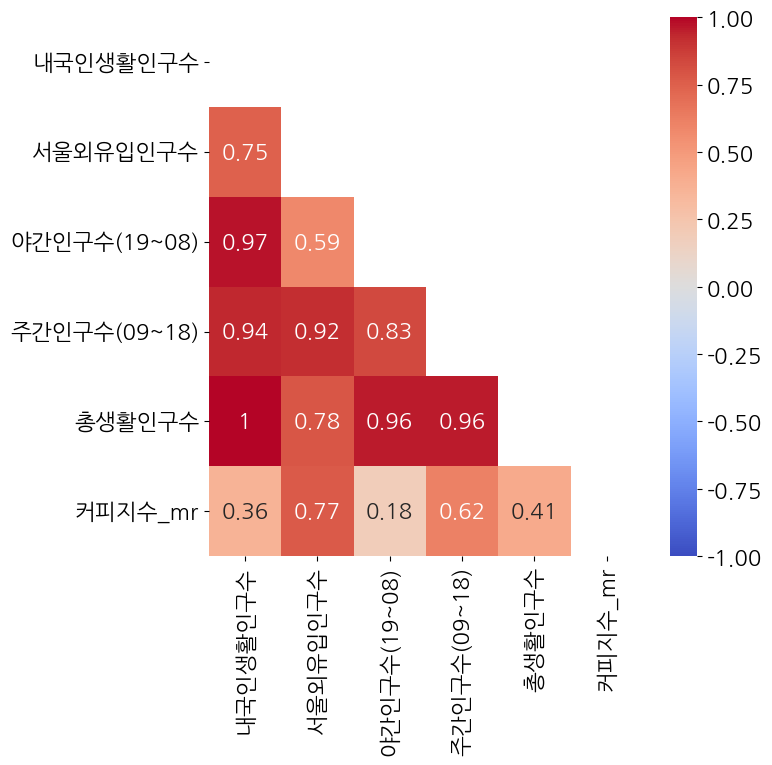

In [ ]:
display(seoul_mr[seoul_mr_col].corr())

masku = np.triu(np.ones(seoul_mr[seoul_mr_col].corr().shape))
plt.figure(figsize=(7,7))
sns.heatmap(seoul_mr[seoul_mr_col].corr(), cmap="coolwarm", 
            annot=True, vmin=-1, vmax=1 , mask=masku); 

# 생활인구와 커피지수 사이의 상관 관계
# 야간인구수와는 약한 양적 선형 관계를 가지며,
# 내국인생활인구수, 서울외유입인구수, 주간인구수, 총생활인구수는뚜렷한 양적 선형 관계를 가진다.
# 그 중에서도 서울외유입인구수는 강한 양적 선형관계를 가진다.

In [ ]:
seoul_not_mr = seoul_mr.drop(["커피지수_mr"], axis=1)

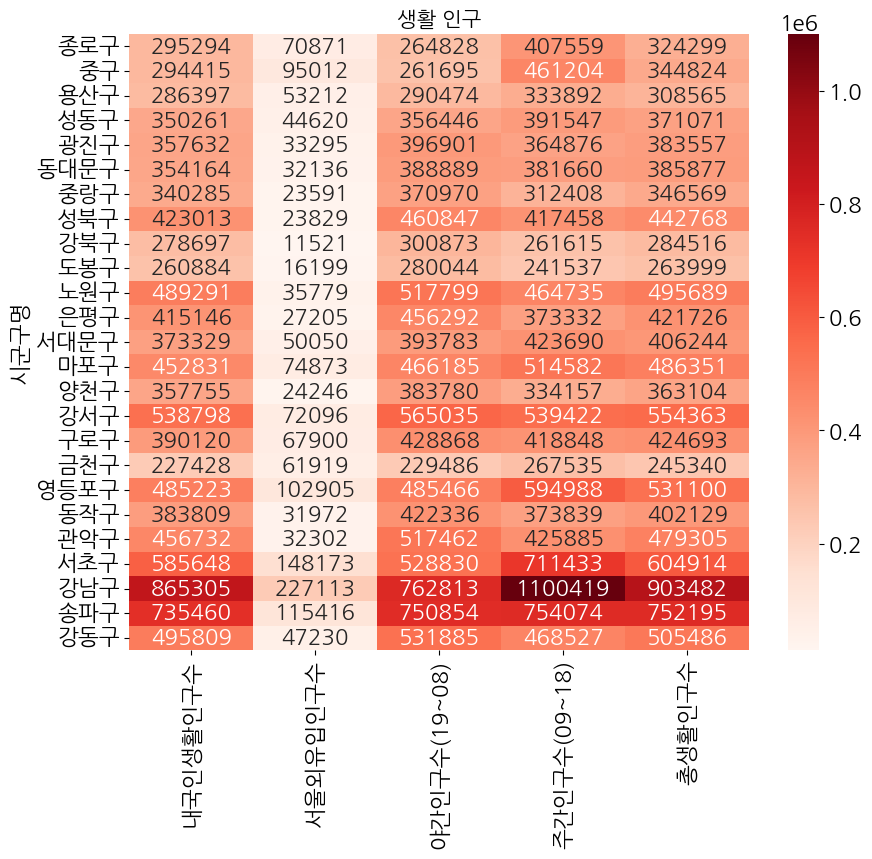

In [ ]:
plt.figure(figsize=(10,8))
plt.title("생활 인구", fontsize=15)
sns.heatmap(seoul_not_mr, annot=True, fmt=".0f", cmap="Reds");

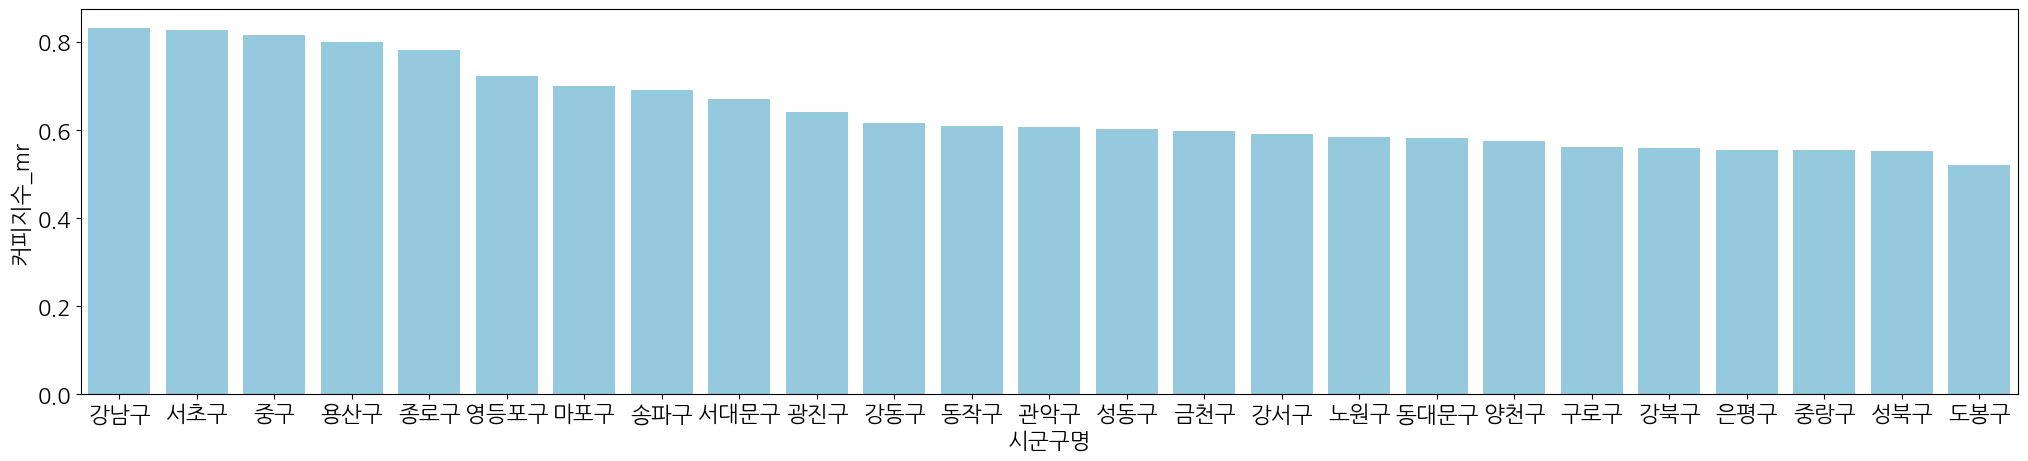

In [ ]:
plt.figure(figsize=(25, 5))
sns.barplot(x=mr.index, y="커피지수_mr", data = mr , color = "skyblue");

# 2가지 커피지수 외에 만들어본 커피지수 + 시각화

## 호연님 커피지수

In [ ]:
import pandas as pd
from glob import glob
import numpy as np
import seaborn as sns
import koreanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file_names = glob("666/*.csv")
file_names = sorted(file_names)
file_names = file_names[:15]
file_names 

['666\\all_cafes_0222ver.csv',
 '666\\all_cafes_final.csv',
 '666\\angelinus_cleaning.csv',
 '666\\coffeeBean_list.csv',
 '666\\compose_cleaning.csv',
 '666\\ediya_final_ver.csv',
 '666\\ediya_seoul_add.csv',
 '666\\final_cafe.csv',
 '666\\hollys_list.csv',
 '666\\mega_cleaning.csv',
 '666\\paikscoffee.csv',
 '666\\pascucci.csv',
 '666\\paulbassett_cleaning.csv',
 '666\\population.csv',
 '666\\starbucks_final.csv']

In [ ]:
df = pd.read_csv("666\\all_cafes_0222ver.csv")
df

브랜드명       지점명    시도명  시군구명  \
0      투썸플레이스     철원동송점    강원도   철원군   
1      투썸플레이스    수지동천역점    경기도   용인시   
2      투썸플레이스     광주오치점  광주광역시    북구   
3      투썸플레이스   철원주상절리점    강원도   철원군   
4      투썸플레이스   별내별가람역점    경기도  남양주시   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                                      주소  
0                    강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242  
1      경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에...  
2                                광주광역시 북구 설죽로  328 (오치동)  
3                                  강원 철원군 갈말읍 군탄리 1226-1  
4                       경기도 남양주시 덕송1로55번길 22 (별내동) 1층,2층  
...                                                  ...  
12911                           서울 동대문구 사가정로25길 42 (장안동)  
12912                             서울 동대문구 한천로2길 53 (장안동)  
12913                              서울 동대문구 답십리로 77 (전농동)  
12914                             서울 동대문구 사가정로 132 (전농동)  
12915                             서울 동대문구 왕산로 225 (청량리동)  

[12916 rows x 5 columns]

In [ ]:
display(df.head())
display(df.tail())
df.shape

브랜드명      지점명    시도명  시군구명  \
0  투썸플레이스    철원동송점    강원도   철원군   
1  투썸플레이스   수지동천역점    경기도   용인시   
2  투썸플레이스    광주오치점  광주광역시    북구   
3  투썸플레이스  철원주상절리점    강원도   철원군   
4  투썸플레이스  별내별가람역점    경기도  남양주시   

                                                  주소  
0                강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242  
1  경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에...  
2                            광주광역시 북구 설죽로  328 (오치동)  
3                              강원 철원군 갈말읍 군탄리 1226-1  
4                   경기도 남양주시 덕송1로55번길 22 (별내동) 1층,2층

브랜드명       지점명    시도명  시군구명                        주소
12911  이디야     장안중앙점  서울특별시  동대문구  서울 동대문구 사가정로25길 42 (장안동)
12912  이디야  장한평군자초교점  서울특별시  동대문구    서울 동대문구 한천로2길 53 (장안동)
12913  이디야    전농뉴타운점  서울특별시  동대문구     서울 동대문구 답십리로 77 (전농동)
12914  이디야    전농사거리점  서울특별시  동대문구    서울 동대문구 사가정로 132 (전농동)
12915  이디야      청량리점  서울특별시  동대문구    서울 동대문구 왕산로 225 (청량리동)

(12916, 5)

### 전국 커피 브랜드 수

In [ ]:
df_korea = pd.crosstab(df["시도명"], df["브랜드명"])
df_korea["합계"] = df_korea.sum(axis=1)
df_korea

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계
시도명                                                                           
강원도        72   33    31      4  128    1     51      60    14    0   15   409
경기도       725  335   422     42  636   44    465     367    84   33  121  3274
경상남도       63   36    70     21  141    3    205      66    25    3   25   658
경상북도       39   37    54     19   70    0     50      62    38    1   16   386
광주광역시      99   22    62     25   77    3    111      46    27    3   15   490
대구광역시      30   57    79     21   71    1     34      92    42    5   25   457
대전광역시      45   77    61     12   45    1     17      66    26    4   20   374
부산광역시      95   24   134     33  130    8    253      81    28    6   34   826
서울특별시     512  260   601     60  708  167    308     366    58   62  128  3230
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4    93
울산광역시       8   11    34     11   81    0     39      31    30    1   15   261
인천광역시     215  109    70      7   90    8    189      91    24    4   19   826
전라남도       81   48    29     11   85    0     46      45    28    0   11   384
전라북도       44   56    32      9   70    0     20      42    19    3   29   324
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   193
충청남도       64   73    43     11   83    1     34      58    22    0   22   411
충청북도       68   36    27      9   63    1     16      51    29    2   18   320

In [ ]:
# 전국 시군구별 카페 수
df_dist_count = df.pivot_table(index=["시도명", "시군구명"], 
                                 columns=["브랜드명"], 
                                 values="지점명", 
                                 aggfunc="count", 
                                 fill_value=0, 
                                 margins=True, margins_name="합계")
df_dist_count

브랜드명       메가커피   빽다방  스타벅스  엔제리너스   이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명  시군구명                                                                      
강원도  강릉시     14     6     6      0    22    0      7       5     2    0    1   
     고성군      0     0     1      0     1    0      0       4     1    0    0   
     동해시      4     1     2      0     4    0      2       3     1    0    2   
     삼척시      2     1     0      0     5    0      1       5     1    0    0   
     속초시      4     2     4      1    10    0      5       5     3    0    3   
...         ...   ...   ...    ...   ...  ...    ...     ...   ...  ...  ...   
충청북도 증평군      2     1     1      0     3    0      0       2     1    0    0   
     진천군      3     2     0      0     4    0      0       3     0    0    1   
     청주시     41    27    19      3    39    1      8      31    21    2   13   
     충주시     10     2     5      3     0    0      5       5     3    0    0   
합계         2206  1263  1787    305  2519  240   1866    1560   521  129  520   

브랜드명          합계  
시도명  시군구명         
강원도  강릉시      63  
     고성군       7  
     동해시      19  
     삼척시      15  
     속초시      37  
...          ...  
충청북도 증평군      10  
     진천군      13  
     청주시     205  
     충주시      33  
합계         12916  

[229 rows x 12 columns]

### 서울 커피 브랜드 수

In [ ]:
df_seoul_gu = df_dist_count.loc["서울특별시"]
df_seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계
시군구명                                                                      
강남구     21   17    88      1   44   50     19      42    12   12   16  322
강동구     22   10    17      1   26    4     12      12     1    2    3  110
강북구     20    9     6      2   20    1      2       7     0    0    2   69
강서구     35   17    25      3   42    4     27      19     5    4    2  183
관악구     18   11    12      4   28    2     13       8     3    1    6  106
광진구     14   10    19      2   24    4     16      12     1    0    5  107
구로구     28   13    14      1   29    2     19      11     1    4    5  127
금천구     13    8    13      2   23    2     16      11     0    0    2   90
노원구     28   14    14      2   29    3      8      11     2    1    3  115
도봉구     16    6     4      0   24    0      9       7     1    0    0   67
동대문구    18    7    10      1   25    3     10       9     0    1    0   84
동작구     14    6    11      3   22    0      9       5     0    0    6   76
마포구     27   11    35      3   34    7     15      25     1    3   10  171
서대문구    17    6    22      2   20    2     12       9     5    0    8  103
서초구     12   12    48      1   29   20      8      28     7   10    9  184
성동구     16   12    15      0   22    0      9      11     2    0    3   90
성북구     27   16    15      0   31    2      8      10     0    0    1  110
송파구     32   17    34     10   39   14     19      30     1    4    6  206
양천구     26    6    17      0   26    2     18       9     3    0    5  112
영등포구    26   10    41      4   41   11     14      21     3    6    8  185
용산구      6    8    25      1   14    4      1       9     4    2    4   78
은평구     24   10    13      5   26    1     15       6     0    1    3  104
종로구     16    8    40      5   31   15      8      12     3    3   11  152
중구      17    6    55      6   30   13     11      32     3    8    9  190
중랑구     19   10     8      1   29    1     10      10     0    0    1   89

### 커피지수 구하기

- 매장별 점포수의 증감 현황을 파악해본다면 프랜차이즈 카페를 열고 싶은 창업자에게 도움이 될 수 있을 것이다!
- 톱 10 매장 증감 현황을 보니, 커피빈, 엔제리너스, 할리스(총 3개)의 매장수가 감소 추세를 보인다(2017~2021)
- 매장들의 증감 크기에 따라 각각의 상수를 곱하여 인자를 준비.
- (증가 추세 매장의 합 / 감소 추세 매장의 합) 식으로..? 또는 덧셈 뺄셈으로..?

![image.png](attachment:image.png)

- 증감 변화율의 추이를 평균을 낸 후,  각 매장별 개수로 나눈다(매장별 개수의 차이가 많이 나므로 이를 줄이기 위해서?)
- 이를 가중치로 두고, 각 자치구 매장마다 곱하여 커피지수를 계산
- 이렇게 구할 경우, 커피지수는.. 뭔가 '발전된 정도를 보여준다'라기 보다는 조금더 창업과 관련되어 표시될 수 있는 지수가 아닌가 싶다.


커피지수는.. 의미를 어떻게 부여하여 지수를 만드냐에 따라 다르게 적용할 수 있을까요? 예를 들면.. 저는 지금 톱 10 매장 점포수 증감 차이를 이용해서 커피지수를 만들어보려하는데,  (할리스, 엔제리너스, 커피빈 이 3개가 매장수 감소 추세길래 분모로 넣거나, 마이너스로 가중치를 두어서 만들어볼까해요.) 만약 창업에서 커피지수를 사용하려 한다면 감소추세가 아닌 증가하고 있는 추세인 프랜차이즈 카페를 여는 게 아무래도 창업자에게 도움이 될 테니 

In [ ]:
df_seoul_gu["커피지수"] = (df_seoul_gu["스타벅스"]*0.07 + df_seoul_gu["빽다방"]*0.11 - df_seoul_gu["엔제리너스"]*0.55 - df_seoul_gu["커피빈"]*0.02
             + df_seoul_gu["파스쿠찌"]*0.18 + df_seoul_gu["투썸플레이스"]*0.08 + df_seoul_gu["폴바셋"]*0.07 + df_seoul_gu["할리스"]*0.03
                      + df_seoul_gu["메가커피"]*0.22 + df_seoul_gu["이디야"]*0.07 + df_seoul_gu["컴포즈커피"]*0.22).round(2)

In [ ]:
df_seoul_gu.sort_values(by="커피지수", ascending = False)

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스   합계  \
시군구명                                                                         
강남구     21   17    88      1   44   50     19      42    12   12   16  322   
강서구     35   17    25      3   42    4     27      19     5    4    2  183   
마포구     27   11    35      3   34    7     15      25     1    3   10  171   
영등포구    26   10    41      4   41   11     14      21     3    6    8  185   
구로구     28   13    14      1   29    2     19      11     1    4    5  127   
송파구     32   17    34     10   39   14     19      30     1    4    6  206   
양천구     26    6    17      0   26    2     18       9     3    0    5  112   
서초구     12   12    48      1   29   20      8      28     7   10    9  184   
성북구     27   16    15      0   31    2      8      10     0    0    1  110   
중구      17    6    55      6   30   13     11      32     3    8    9  190   
노원구     28   14    14      2   29    3      8      11     2    1    3  115   
강동구     22   10    17      1   26    4     12      12     1    2    3  110   
광진구     14   10    19      2   24    4     16      12     1    0    5  107   
성동구     16   12    15      0   22    0      9      11     2    0    3   90   
서대문구    17    6    22      2   20    2     12       9     5    0    8  103   
중랑구     19   10     8      1   29    1     10      10     0    0    1   89   
은평구     24   10    13      5   26    1     15       6     0    1    3  104   
종로구     16    8    40      5   31   15      8      12     3    3   11  152   
관악구     18   11    12      4   28    2     13       8     3    1    6  106   
금천구     13    8    13      2   23    2     16      11     0    0    2   90   
동대문구    18    7    10      1   25    3     10       9     0    1    0   84   
도봉구     16    6     4      0   24    0      9       7     1    0    0   67   
강북구     20    9     6      2   20    1      2       7     0    0    2   69   
동작구     14    6    11      3   22    0      9       5     0    0    6   76   
용산구      6    8    25      1   14    4      1       9     4    2    4   78   

브랜드명   커피지수  
시군구명         
강남구   25.20  
강서구   21.23  
마포구   16.18  
영등포구  16.10  
구로구   15.68  
송파구   15.46  
양천구   14.72  
서초구   14.63  
성북구   13.47  
중구    13.14  
노원구   12.71  
강동구   12.33  
광진구   10.82  
성동구   10.74  
서대문구  10.70  
중랑구   10.33  
은평구   10.28  
종로구   10.12  
관악구   10.02  
금천구    9.58  
동대문구   9.56  
도봉구    8.86  
강북구    7.15  
동작구    6.96  
용산구    6.22

In [ ]:
# 전국 커피지수
df_korea["커피지수"] = (df_korea["스타벅스"]*0.07 + df_korea["빽다방"]*0.11 - df_korea["엔제리너스"]*0.55 - df_korea["커피빈"]*0.02
             + df_korea["파스쿠찌"]*0.18 + df_korea["투썸플레이스"]*0.08 + df_korea["폴바셋"]*0.07 + df_korea["할리스"]*0.03
                      + df_korea["메가커피"]*0.22 + df_korea["이디야"]*0.07 + df_korea["컴포즈커피"]*0.22).round(2)

In [ ]:
df_korea.sort_values(by="커피지수", ascending = False)

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
경기도       725  335   422     42  636   44    465     367    84   33  121   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
강원도        72   33    31      4  128    1     51      60    14    0   15   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
충청북도       68   36    27      9   63    1     16      51    29    2   18   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   

브랜드명       합계    커피지수  
시도명                    
경기도      3274  399.15  
서울특별시    3230  312.19  
인천광역시     826  120.51  
부산광역시     826   92.33  
경상남도      658   76.82  
광주광역시     490   53.74  
강원도       409   47.37  
전라남도      384   44.12  
충청남도      411   41.60  
대구광역시     457   35.30  
경상북도      386   34.23  
대전광역시     374   33.75  
충청북도      320   33.75  
전라북도      324   30.29  
울산광역시     261   21.95  
제주특별자치도   193   20.65  
세종특별자치시    93    9.10

## 강섭님 커피지수

### 단순히 매장 수에 정비례하는 값이 아닌 새로운 커피 지수를 구해보자
- 1ml당 가격이 가장 낮은 브랜드를 1로 하여 그 비율에 맞게 가중치를 둔다
- 고가형 브랜드 / 저가형 브랜드 형태를 유지하며 각 브랜드에 가중치를 곱한다
![image.png](attachment:image.png)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('all_cafes.csv')
df

브랜드명       지점명    시도명  시군구명  \
0      투썸플레이스     철원동송점    강원도   철원군   
1      투썸플레이스    수지동천역점    경기도   용인시   
2      투썸플레이스     광주오치점  광주광역시    북구   
3      투썸플레이스   철원주상절리점    강원도   철원군   
4      투썸플레이스   별내별가람역점    경기도  남양주시   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                                      주소  
0                    강원도 철원군 동송읍 금학로 242 (새마을금고) 금학로 242  
1      경기도 용인시 수지구 신수로 767 (동천동,분당수지U-TOWER) 에이동 1층 에...  
2                                광주광역시 북구 설죽로  328 (오치동)  
3                                  강원 철원군 갈말읍 군탄리 1226-1  
4                       경기도 남양주시 덕송1로55번길 22 (별내동) 1층,2층  
...                                                  ...  
12911                           서울 동대문구 사가정로25길 42 (장안동)  
12912                             서울 동대문구 한천로2길 53 (장안동)  
12913                              서울 동대문구 답십리로 77 (전농동)  
12914                             서울 동대문구 사가정로 132 (전농동)  
12915                             서울 동대문구 왕산로 225 (청량리동)  

[12916 rows x 5 columns]

### 전국 시도별 커피지수

In [ ]:
df_sido = df.groupby(['시도명', '브랜드명'])['지점명'].count().unstack().fillna(0).astype(int)
df_sido['합계'] = df_sido.sum(axis=1)
df_sido

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스    합계
시도명                                                                           
강원도        72   33    31      4  128    1     51      60    14    0   15   409
경기도       725  335   422     42  636   44    465     367    84   33  121  3274
경상남도       63   36    70     21  141    3    205      66    25    3   25   658
경상북도       39   37    54     19   70    0     50      62    38    1   16   386
광주광역시      99   22    62     25   77    3    111      46    27    3   15   490
대구광역시      30   57    79     21   71    1     34      92    42    5   25   457
대전광역시      45   77    61     12   45    1     17      66    26    4   20   374
부산광역시      95   24   134     33  130    8    253      81    28    6   34   826
서울특별시     512  260   601     60  708  167    308     366    58   62  128  3230
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4    93
울산광역시       8   11    34     11   81    0     39      31    30    1   15   261
인천광역시     215  109    70      7   90    8    189      91    24    4   19   826
전라남도       81   48    29     11   85    0     46      45    28    0   11   384
전라북도       44   56    32      9   70    0     20      42    19    3   29   324
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   193
충청남도       64   73    43     11   83    1     34      58    22    0   22   411
충청북도       68   36    27      9   63    1     16      51    29    2   18   320

In [ ]:
high_price = (df_sido['커피빈'] * 5.32 + df_sido['폴바셋'] * 4.94 + df_sido['할리스'] * 4.81
              + (df_sido['스타벅스'] + df_sido['투썸플레이스'] + df_sido['엔제리너스']) * 4.79 + df_sido['파스쿠찌'] * 4.42)
low_price = df_sido['컴포즈커피'] + df_sido['메가커피'] + df_sido['빽다방'] * 1.42 + df_sido['이디야'] * 3.15

df_sido['커피지수'] = high_price / low_price

In [ ]:
# 서울이 제일 높을 것이란 예상과 달리 5위가 된다
df_sido.sort_values('커피지수', ascending=False)

브랜드명     메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시도명                                                                        
대구광역시      30   57    79     21   71    1     34      92    42    5   25   
대전광역시      45   77    61     12   45    1     17      66    26    4   20   
경상북도       39   37    54     19   70    0     50      62    38    1   16   
제주특별자치도    33   32    26      8   20    2     25      22    20    2    3   
서울특별시     512  260   601     60  708  167    308     366    58   62  128   
부산광역시      95   24   134     33  130    8    253      81    28    6   34   
충청북도       68   36    27      9   63    1     16      51    29    2   18   
울산광역시       8   11    34     11   81    0     39      31    30    1   15   
광주광역시      99   22    62     25   77    3    111      46    27    3   15   
전라북도       44   56    32      9   70    0     20      42    19    3   29   
세종특별자치시    13   17    12      2   21    0      3      14     7    0    4   
충청남도       64   73    43     11   83    1     34      58    22    0   22   
경기도       725  335   422     42  636   44    465     367    84   33  121   
경상남도       63   36    70     21  141    3    205      66    25    3   25   
인천광역시     215  109    70      7   90    8    189      91    24    4   19   
전라남도       81   48    29     11   85    0     46      45    28    0   11   
강원도        72   33    31      4  128    1     51      60    14    0   15   

브랜드명       합계      커피지수  
시도명                      
대구광역시     457  3.406468  
대전광역시     374  2.880993  
경상북도      386  2.476273  
제주특별자치도   193  2.352740  
서울특별시    3230  2.043075  
부산광역시     826  1.954850  
충청북도      320  1.938694  
울산광역시     261  1.805488  
광주광역시     490  1.776267  
전라북도      324  1.746772  
세종특별자치시    93  1.733935  
충청남도      411  1.608387  
경기도      3274  1.452912  
경상남도      658  1.327918  
인천광역시     826  1.263843  
전라남도      384  1.261195  
강원도       409  1.037239

### 서울시 구별 커피지수

In [ ]:
seoul = df[df['시도명']=='서울특별시']
seoul

브랜드명       지점명    시도명  시군구명  \
5      투썸플레이스   용산트윈시티점  서울특별시   용산구   
22     투썸플레이스    종로3가역점  서울특별시   종로구   
24     투썸플레이스     순화타워점  서울특별시    중구   
30     투썸플레이스  여의도광복회관점  서울특별시  영등포구   
38     투썸플레이스    송파장지역점  서울특별시   송파구   
...       ...       ...    ...   ...   
12911     이디야     장안중앙점  서울특별시  동대문구   
12912     이디야  장한평군자초교점  서울특별시  동대문구   
12913     이디야    전농뉴타운점  서울특별시  동대문구   
12914     이디야    전농사거리점  서울특별시  동대문구   
12915     이디야      청량리점  서울특별시  동대문구   

                                              주소  
5             서울특별시 용산구 한강대로 366 (동자동,트윈시티남산) 1층  
22                                서울 종로구 수표로 106  
24     서울특별시 중구 세종대로7길 43 (순화동, 순화타워) 43 순화타워 1층  
30          서울특별시 영등포구 국회대로62길 15 (여의도동) 광복회관 1층  
38                             서울 송파구 충민로 66, B1  
...                                          ...  
12911                   서울 동대문구 사가정로25길 42 (장안동)  
12912                     서울 동대문구 한천로2길 53 (장안동)  
12913                      서울 동대문구 답십리로 77 (전농동)  
12914                     서울 동대문구 사가정로 132 (전농동)  
12915                     서울 동대문구 왕산로 225 (청량리동)  

[3230 rows x 5 columns]

In [ ]:
seoul_gu = seoul.groupby(['시군구명','브랜드명'])['지점명'].count().unstack().fillna(0).astype(int)
seoul_gu

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스
시군구명                                                                 
강남구     21   17    88      1   44   50     19      42    12   12   16
강동구     22   10    17      1   26    4     12      12     1    2    3
강북구     20    9     6      2   20    1      2       7     0    0    2
강서구     35   17    25      3   42    4     27      19     5    4    2
관악구     18   11    12      4   28    2     13       8     3    1    6
광진구     14   10    19      2   24    4     16      12     1    0    5
구로구     28   13    14      1   29    2     19      11     1    4    5
금천구     13    8    13      2   23    2     16      11     0    0    2
노원구     28   14    14      2   29    3      8      11     2    1    3
도봉구     16    6     4      0   24    0      9       7     1    0    0
동대문구    18    7    10      1   25    3     10       9     0    1    0
동작구     14    6    11      3   22    0      9       5     0    0    6
마포구     27   11    35      3   34    7     15      25     1    3   10
서대문구    17    6    22      2   20    2     12       9     5    0    8
서초구     12   12    48      1   29   20      8      28     7   10    9
성동구     16   12    15      0   22    0      9      11     2    0    3
성북구     27   16    15      0   31    2      8      10     0    0    1
송파구     32   17    34     10   39   14     19      30     1    4    6
양천구     26    6    17      0   26    2     18       9     3    0    5
영등포구    26   10    41      4   41   11     14      21     3    6    8
용산구      6    8    25      1   14    4      1       9     4    2    4
은평구     24   10    13      5   26    1     15       6     0    1    3
종로구     16    8    40      5   31   15      8      12     3    3   11
중구      17    6    55      6   30   13     11      32     3    8    9
중랑구     19   10     8      1   29    1     10      10     0    0    1

In [ ]:
seoul_high_price = (seoul_gu['커피빈'] * 5.32 + seoul_gu['폴바셋'] * 4.94 + seoul_gu['할리스'] * 4.81
                    + (seoul_gu['스타벅스'] + seoul_gu['투썸플레이스'] + seoul_gu['엔제리너스']) * 4.79 + seoul_gu['파스쿠찌'] * 4.42)
seoul_low_price = seoul_gu['컴포즈커피'] + seoul_gu['메가커피'] + seoul_gu['빽다방'] * 1.42 + seoul_gu['이디야'] * 3.15

seoul_gu['커피지수'] = seoul_high_price / seoul_low_price

In [ ]:
# 서울시 안에선 발전수준, 경제력 등의 지표를 보여줄 수 있는 순위가 된 것 같다
seoul_gu.sort_values('커피지수', ascending=False)

브랜드명  메가커피  빽다방  스타벅스  엔제리너스  이디야  커피빈  컴포즈커피  투썸플레이스  파스쿠찌  폴바셋  할리스  \
시군구명                                                                    
강남구     21   17    88      1   44   50     19      42    12   12   16   
서초구     12   12    48      1   29   20      8      28     7   10    9   
중구      17    6    55      6   30   13     11      32     3    8    9   
용산구      6    8    25      1   14    4      1       9     4    2    4   
종로구     16    8    40      5   31   15      8      12     3    3   11   
영등포구    26   10    41      4   41   11     14      21     3    6    8   
마포구     27   11    35      3   34    7     15      25     1    3   10   
송파구     32   17    34     10   39   14     19      30     1    4    6   
서대문구    17    6    22      2   20    2     12       9     5    0    8   
광진구     14   10    19      2   24    4     16      12     1    0    5   
강동구     22   10    17      1   26    4     12      12     1    2    3   
강서구     35   17    25      3   42    4     27      19     5    4    2   
성동구     16   12    15      0   22    0      9      11     2    0    3   
금천구     13    8    13      2   23    2     16      11     0    0    2   
양천구     26    6    17      0   26    2     18       9     3    0    5   
관악구     18   11    12      4   28    2     13       8     3    1    6   
동작구     14    6    11      3   22    0      9       5     0    0    6   
노원구     28   14    14      2   29    3      8      11     2    1    3   
구로구     28   13    14      1   29    2     19      11     1    4    5   
은평구     24   10    13      5   26    1     15       6     0    1    3   
동대문구    18    7    10      1   25    3     10       9     0    1    0   
강북구     20    9     6      2   20    1      2       7     0    0    2   
성북구     27   16    15      0   31    2      8      10     0    0    1   
중랑구     19   10     8      1   29    1     10      10     0    0    1   
도봉구     16    6     4      0   24    0      9       7     1    0    0   

브랜드명      커피지수  
시군구명            
강남구   5.340683  
서초구   4.664382  
중구    4.661120  
용산구   3.774095  
종로구   3.261559  
영등포구  2.487265  
마포구   2.466914  
송파구   2.434365  
서대문구  2.281039  
광진구   1.734725  
강동구   1.488932  
강서구   1.363715  
성동구   1.327555  
금천구   1.283574  
양천구   1.283217  
관악구   1.280671  
동작구   1.188951  
노원구   1.178428  
구로구   1.169632  
은평구   1.033679  
동대문구  1.000086  
강북구   0.887605  
성북구   0.870181  
중랑구   0.751691  
도봉구   0.523369